# KNN Modeling 

## Pull & Clean Datasets

In [2]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [3]:
df_train = pd.read_csv('Data/hate_speech_training.csv')
df_train_2 = pd.read_csv('Data/hate_speech_training_2.csv')
df_train_3 = pd.read_csv('Data/hate_speech_training_3.csv')
df_train_4 = pd.read_csv('Data/hate_speech_training_4.tsv', sep = '\t')
df_train_5 = pd.read_csv('Data/hate_speech_training_5.csv')
df_test = pd.read_csv('Data/hate_speech_test.csv')

In [4]:
df_train = df_train.drop('id', axis = 1) #0 = Not Hate Speech, 1 = Hate Speech

In [5]:
df_train_2 = df_train_2[['tweet', 'class']]
df_train_2['class'] = df_train_2['class'].replace([0], 'hate speech')
df_train_2['class'] = df_train_2['class'].replace([1, 2], 'not hate speech')
df_train_2['class'] = df_train_2['class'].replace(['hate speech'], 1)
df_train_2['class'] = df_train_2['class'].replace(['not hate speech'], 0)
df_train_2.rename(columns = {'class': 'label'}, inplace = True) #0 = Not Hate Speech, 1 = Hate Speech

In [6]:
df_train_3 = df_train_3.drop('index', axis = 1) 
df_train_3.rename(columns = {'post': 'tweet'}, inplace = True) #0 = Not Hate Speech, 1 = Hate Speech

In [7]:
df_train_4 = df_train_4[['text', 'HS']] 
df_train_4.rename(columns = {'text': 'tweet', 'HS': 'label'}, inplace = True) #0 = Not Hate Speech, 1 = Hate Speech

In [8]:
df_train_5['Label'] = df_train_5['Label'].replace(['Hate', 'Non-Asian Aggression'], 1)
df_train_5['Label'] = df_train_5['Label'].replace(['Neutral', 'Counterhate'], 0) 
df_train_5.rename(columns = {'Text': 'tweet', 'Label': 'label'}, inplace = True) #0 = Not Hate Speech, 1 = Hate Speech

In [9]:
dfs = [df_train, df_train_2, df_train_3, df_train_4, df_train_5]
df = pd.concat(dfs)

## Train, Test, Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df['tweet']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=3,
                                                    test_size=0.20) #80/20 split

## Natural Language Processing (NLP)

The goal here will actually to be to not only use grid searches but to also test both TF-IDF (Term Frequency - Inverse Document Frequency) and Count Vectorizers to see which performs better with each model

### TF-IDF

In [14]:
import nltk
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [15]:
sw = stopwords.words('english')

In [17]:
def get_wordnet_pos(treebank_tag):
    
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [20]:
def doc_preparer(doc, stop_words=sw):
 
    regex_token = RegexpTokenizer(r"([a-zA-Z]+(?:’[a-z]+)?)")
    doc = regex_token.tokenize(doc)
    doc = [word.lower() for word in doc]
    doc = [word for word in doc if word not in sw]
    doc = pos_tag(doc)
    doc = [(word[0], get_wordnet_pos(word[1])) for word in doc]
    lemmatizer = WordNetLemmatizer() 
    doc = [lemmatizer.lemmatize(word[0], word[1]) for word in doc]
    return ' '.join(doc)

In [21]:
token_docs = [doc_preparer(doc, sw) for doc in X_train]

['barbara', 'hepwoh', 'works', 'raise', 'old', 'school', 'hepwoh', 'sculpture']
['im', 'thirst', 'randies', 'fags']
['updated', 'book', 'wattpad', 'poetry', 'verse', 'poem', 'poems', 'smile', 'love', 'prose']
['tried', 'get', 'rob', 'wop', 'bitch', 'critical']
['watching', 'recent', 'presentation', 'occurred', 'engineers', 'dont', 'understand', 'humans', 'apple', 'fallen', 'love']
['dont', 'know', 'heritage', 'ever']
['rendlesham', 'bentwaters', 'noshow', 'badmanners', 'apologies', 'everyone', 'bothered', 'tune', 'apparently']
['flyyimpact', 'yo', 'follow', 'back', 'nigguh']
['quoteoftheday', 'bull', 'dominate', 'bull', 'direct', 'whatever', 'want', 'whe']
['niggaimtatted', 'bitches', 'really', 'wave', 'shaq', 'got', 'hoes']
['negro', 'task', 'master']
['rt', 'vodkapapixo', 'weed', 'cloudz', 'god', 'drake', 'trash', 'thank']
['night', 'club', 'paytime', 'weekend', 'lifestyle', 'lalala', 'club']
['caught', 'americanhorrorstory', 'wait', 'new', 'season', 'next', 'editing', 'spree', 'show

['rt', 'rtnba', 'love', 'hoes', 'http', 'co', 'nfxnhhw', 'dj']
['surething', 'mark', 'even', 'pass', 'esl', 'yet', 'bitch', 'lmao']
['user', 'look', 'arrived', 'thanks', 'john', 'hunters', 'glastonburyfestival']
['aint', 'shit', 'without', 'scale', 'bitch', 'live', 'bag', 'life']
['hispanic', 'negro', 'populations', 'increase', 'test', 'score', 'averages', 'decrease']
['lmao', 'rt', 'breesindacut', 'sean', 'payton', 'hoes', 'rt', 'mrpoonsoaker', 'lol', 'http', 'co', 'ptd', 'rapztd']
['user', 'working', 'blog', 'enjoying', 'bottle', 'user', 'evening', 'splendid', 'sta', 'blogging', 'digital']
['lil', 'stupid', 'ass', 'bitch']
['music', 'right', 'art', 'go', 'perfect', 'opinion']
['quenten', 'demps', 'arrested', 'saturday', 'first', 'degree', 'murder', 'charge', 'killing', 'elizabeth', 'clemente']
['user', 'whole', 'russia', 'trump', 'tiesto', 'whiteamerica', 'stupid', 'realise', 'young', 'progressive', 'country', 'gop', 'communism']
['anyone', 'else', 'heard']
['day', 'blessedmonday']
[

['user', 'n', 'healthy', 'past', 'history', 'game', 'richest', 'people', 'would', 'librarians', 'warren', 'buff']
['rt', 'sos', 'best', 'thing', 'ever', 'driving', 'past', 'crowds', 'people', 'shows', 'seeing', 'bandannas', 'coloured', 'hair', 'sos', 'shirts', 'made']
['comedianspank', 'hoes', 'shit', 'u', 'got', 'em']
['rt', 'tonycranshaw', 'almightyvinny', 'richhomiemeezy', 'oo', 'mauri', 'bitch', 'stop', 'lien']
['rt', 'lettybro', 'yall', 'hoes', 'super', 'weakkkkkkkk']
['ooooohhhhh', 'brand', 'new', 'user', 'brochure', 'landing', 'desk', 'near', 'hotels', 'choice']
['please', 'excuse', 'bitch', 'ass', 'phone', 'hoe', 'lately']
['world', 'looks', 'better', 'eyes', 'julboeyewear', 'julbo', 'maisonduski']
['ever', 'slim', 'u', 'look', 'like', 'cotton', 'picker', 'tho', 'rt', 'kb', 'three', 'put', 'field', 'work', 'damn', 'dee', 'got', 'jokes']
['saved', 'site']
['adding', 'experience', 'backpack', 'life', 'adventures', 'aging', 'better', 'research', 'says', 'purpose']
['denzie', 'bout

['best', 'gig', 'ever', 'tonight', 'user', 'user', 'user', 'user', 'hikevin', 'treacherousgig']
['feel', 'great', 'appreciation', 'admiration', 'polish', 'people', 'get', 'sad', 'hear', 'white', 'brothers', 'speaking', 'ill', 'poles']
['ahaha', 'pussy', 'king']
['rt', 'alicia', 'enz', 'person', 'likes', 'yellow', 'starburst', 'feel']
['got', 'tickets', 'findingdory', 'findingnemo', 'movie', 'premier', 'ellen', 'exciting']
['one', 'unpregnant', 'bitch', 'world', 'anymore', 'smh']
['rt', 'amys', 'cents', 'need', 'hit', 'lottery', 'yo', 'work', 'shit', 'fucking', 'birds']
['user', 'always', 'hope', 'one', 'day', 'get', 'hug', 'think', 'gonna', 'happen', 'anytime', 'soon']
['user', 'user', 'user', 'really', 'looking', 'forward', 'coming', 'along', 'coming', 'user']
['brexit', 'interpreting', 'opinion', 'polls', 'commerzbank', 'blog', 'silver', 'gold', 'forex']
['strictly', 'goyim', 'friends']
['user', 'pay', 'bucks', 'internet', 'get', 'halodedication', 'grownassman', 'hashtag']
['fitnessa

['saddest', 'moment', 'day', 'wait', 'beau', 'get', 'bus', 'never', 'busbuddies']
['rt', 'steadmanterri', 'wheeler', 'kashhh', 'mann', 'fuckk', 'dat', 'shit', 'fuckk', 'dat', 'bitch']
['rt', 'ugiycutie', 'one', 'two', 'three', 'four', 'many', 'niggers', 'store']
['wine', 'wed', 'user', 'wine', 'cellar', 'vineyard', 'family', 'heritage', 'wed', 'drinks', 'hunter']
['girl', 'teens', 'poems', 'ness', 'quotes', 'hu', 'alone', 'lost', 'brokenquotes']
['phishlicia', 'got', 'weed', 'come', 'faggot']
['oliviagobert', 'lmao', 'yes', 'kind', 'like', 'ghetto', 'yet', 'amp', 'says', 'u', 'feel']
['idk', 'like', 'heres', 'selfie', 'selfie', 'flowercrown', 'dt', 'like', 'follow', 'summer']
['netflix', 'whilst', 'grateful', 'given', 'season', 'oitnb', 'today', 'longer', 'oitnb', 'watch', 'binge']
['user', 'almost', 'friday', 'euro']
['check', 'new', 'trending', 'funny', 'gif', 'caoon', 'crying', 'eating', 'adventure', 'time', 'caoon', 'network', 'sandwich']
['game', 'preview', 'houston', 'astros', 'n

['st', 'time', 'since', 'im', 'playing', 'omaha', 'metro', 'summer', 'league', 'stas', 'tonight', 'body', 'health', 'issues', 'wont', 'allow']
['rt', 'uncledaddy', 'weakenednachos', 'california', 'biggest', 'retards', 'forget', 'holy', 'released', 'amazing', 'ep']
['rt', 'hypebeastaustin', 'love', 'one', 'bucket', 'headed', 'hoes', 'noway']
['huaweiceifiedspecialist', 'pre', 'sales', 'accessnetwork', 'delivered', 'yes', 'stress', 'sno']
['angelo', 'gl', 'oh', 'yea', 'lo', 'aka', 'mr', 'bitches', 'lmao']
['finally', 'found', 'way', 'delete', 'old', 'tweets', 'might', 'find', 'useful', 'well', 'deletetweets']
['msm', 'gives', 'disinfectants', 'may', 'kill', 'virus', 'disinfectant', 'kills', 'virus', 'virkon', 'used', 'many', 'asian', 'countries', 'governments', 'including', 'china', 'ask', 'virkon', 'list', 'coronavirus', 'https', 'co', 'sengnw', 'vpw']
['guess', 'would', 'destined', 'gas', 'chambers']
['soon', 'repay', 'generations', 'welfare', 'majestic', 'peoples', 'consumed']
['beach

['ill', 'shave', 'head', 'finally', 'get', 'gcse', 'grades', 'c']
['ever', 'dog', 'hoes', 'really', 'bad', 'end', 'w', 'girlfriend']
['called', 'bitch', 'prolly', 'hate', 'called', 'bad', 'bitch', 'prolly', 'thank']
['heck', 'mean', 'please', 'silence', 'racism', 'bully']
['goes', 'goes', 'odong', 'holiday', 'latepost', 'pic']
['happy', 'monday', 'everyone', 'lets', 'make', 'good', 'week', 'mondaymotivation', 'freshsta', 'healthy']
['racist', 'acts', 'asian', 'americans', 'persist', 'agency', 'aims', 'washthehate', 'https', 'co', 'stpqhnskuf']
['user', 'late', 'work', 'bc', 'ur', 'workers', 'rude', 'ass']
['user', 'week', 'bngu', 'episode', 'find', 'thoughts']
['study', 'face', 'pizza', 'stole', 'roommate', 'idea', 'taking', 'pic']
['rt', 'bcniggas', 'know', 'plenty', 'hoes', 'love', 'niggas', 'bitch', 'fuckin', 'niggas']
['via', 'paleo', 'diet', 'lifestyle', 'health', 'amp', 'fitness', 'trousers', 'cdn', 'pants', 'abdominal']
['user', 'user', 'seen']
['change', 'wish', 'see', 'world',

['thekushzombie', 'aww', 'u', 'mad', 'tho', 'successful', 'man', 'lmfao', 'hut', 'hugging', 'faggot']
['blueeyebeaner', 'lesbian', 'pussy', 'taste', 'like', 'rainbow', 'trout', 'lezzzbehonest']
['buffalo', 'school', 'board', 'demanding', 'resignation', 'remarks', 'made', 'obamas', 'pc', 'carlpaladino', 'newyork']
['wonderful', 'jade', 'shadow', 'amazing', 'ship', 'put', 'hans', 'shame', 'funny', 'family', 'hansolo', 'leia', 'jadeshadow']
['mj', 'bcarter', 'eating', 'cuz', 'women', 'cook', 'u', 'gotta', 'get', 'rid', 'hoe']
['rt', 'thefakeespn', 'red', 'hot', 'chili', 'peppers', 'longest', 'nip', 'slip', 'super', 'bowl', 'half', 'time', 'show', 'history']
['rather', 'free', 'man', 'grave', 'living', 'puppet', 'slave', 'shit', 'options', 'bitch', 'would', 'free', 'alive', 'rich']
['better', 'way', 'one', 'hu', 'teens', 'poems', 'ness', 'quotes', 'hu']
['disgusting', 'perverted']
['user', 'sums', 'voted', 'brexit', 'littleenglander', 'syndrome', 'sovereignty', 'democracy']
['huge', 'crowd

['love', 'firefox']
['wonder', 'retaliation', 'loyalist', 'mobs', 'attacking', 'catholic', 'homes', 'little', 'interference', 'psni', 'last', 'week']
['get', 'info', 'pu', 'like', 'big', 'stuff', 'also', 'want', 'get', 'better', 'info', 'natiocracy', 'social', 'nationalism']
['foreign', 'bad', 'bitch', 'n', 'said', 'name', 'trinaaa', 'trap', 'house', 'look', 'like', 'got', 'hit', 'hurricane', 'katrinaaaa']
['u', 'see', 'ur', 'first', 'love', 'bowling', 'alley', 'hide', 'bathroom', 'whole', 'time', 'fathers', 'day']
['user', 'user', 'user', 'user', 'user', 'user', 'user', 'well', 'done', 'everyone', 'fantastic', 'lovec']
['hey', 'remember', 'japanese', 'good', 'side', 'ww', 'light', 'note', 'ya', 'idolized', 'coworkers', 'heroes', 'ready', 'build', 'next', 'rail', 'gun', 'cannons', 'power', 'ww']
['rt', 'spam', 'bitch', 'ass', 'nigga', 'rt', 'hellondascale', 'migos', 'http', 'co', 'kzqxf', 'zg']
['straighten', 'hair', 'gonna', 'long', 'hoes', 'gonna', 'hate']
['weekend', 'go', 'far', 'w

['dalton', 'ryann', 'parkatie', 'blakeanderson', 'guess', 'dumb', 'bitch', 'need', 'drink', 'time', 'place', 'fuck', 'someone', 'haha']
['stupid', 'lil', 'bitch', 'really', 'think', 'trippen', 'outttta', 'pocket', 'pimpinnn']
['user', 'day', 'one', 'thing', 'make', 'sad', 'people', 'taiwan', 'hu', 'jimin', 'members', 'bad', 'jimin', 'bts']
['happy', 'bihday', 'best', 'dad', 'grandad', 'world', 'bihday', 'dad', 'smile']
['bihday', 'amazing', 'user', 'keep', 'steong', 'keep', 'amazing']
['fathersday', 'father', 'day', 'buy', 'things', 'happy', 'fathers', 'day']
['letsmakeitspecial', 'georgemichael', 'bihday']
['user', 'user', 'beginning', 'end', 'see', 'coming', 'end', 'way']
['everybody', 'swears', 'lives', 'busy', 'actually', 'lazy']
['jawshoeeahhh', 'bitch', 'even', 'say', 'lol']
['loving', 'product', 'get', 'white', 'smile', 'ready', 'summer', 'message', 'details', 'white', 'teeth', 'smile', 'buy']
['rt', 'thenudesgod', 'kills', 'bitches', 'think', 'bc', 'got', 'low', 'body', 'count'

['clev', 'fans', 'think', 'winnin', 'staged', 'lebron', 'double', 'digit', 'points', 'mrchoke', 'nbafinals']
['like', 'mauricio', 'rua']
['definition', 'success', 'motivation', 'inspiration']
['jennahnorberg', 'always', 'call', 'away', 'ya', 'need', 'nigs']
['black', 'angelo', 'first', 'time', 'lol', 'http', 'co', 'mitmfpvvlw', 'yuhhhh', 'hit', 'hoe']
['rt', 'itscoleharmon', 'girls', 'curled', 'ball', 'bed', 'waiting', 'goodnight', 'text', 'go', 'sleep', 'bitch']
['time', 'panera', 'bitch']
['ive', 'got', 'nothing', 'prefer', 'one']
['becksuk', 'tissot', 'young', 'f', 'f', 'rss', 'tissot', 'young']
['gonna', 'lot', 'trash', 'talk', 'today', 'worldcup']
['pray', 'christina', 'grimmie', 'love', 'cry', 'still', 'belive', 'love', 'christina', 'grimmie']
['real', 'dedication', 'arigold', 'bitch', 'got', 'diarrhea', 'still', 'shitting', 'bathroom']
['user', 'days', 'estuaryfringefestival', 'kicks', 'southend', 'music', 'culture', 'user']
['rt', 'taratalksmoney', 'tuh', 'rt', 'vsamone', 'u', 

['tips', 'attract', 'good', 'positive', 'energy', 'via', 'user', 'energy', 'user']
['beautiful', 'sister', 'ana', 'felizlunes', 'bueniniciodesemana', 'exelentelunes', 'beautiful']
['today', 'tragic', 'day', 'world', 'lgbt', 'community', 'via', 'user']
['beedontcare', 'pussy', 'still', 'fresh', 'lt', 'something', 'stank', 'girls', 'say']
['user', 'black', 'walnut', 'wooden', 'picture', 'horsehour', 'woodcutwednesday', 'wooden', 'giftideas', 'horse', 'mythos', 'craftshout']
['rt', 'gorgeous', 'gab', 'people', 'person', 'know', 'lil', 'gabby', 'got', 'hoes']
['user', 'yay', 'exhibitor', 'day', 'goldsmithsfair', 'weektwo']
['really', 'quite', 'frustrated', 'group']
['true', 'essence', 'divinity']
['repost', 'two', 'years', 'ago', 'made', 'decision', 'come', 'back', 'ceremonial', 'lebrondecision', 'user']
['panic', 'china', 'send', 'shit', 'load', 'ducks']
['user', 'really', 'telling', 'microaggressions', 'race', 'whiteprivilege', 'antiblackness']
['rt', 'peidroh', 'tell', 'chick', 'fil', '

['user', 'harrypotterworld', 'yesterday', 'bihday', 'fun', 'friends']
['good', 'tuckercarlson', 'going', 'dr', 'fauci', 'far', 'much', 'power', 'person', 'elected', 'people', 'could', 'give', 'fuck', 'tanking', 'economy', 'exposehim', 'chinesevirus', 'covid', 'pandemic', 'covid', 'https', 'co', 'hfc', 'hd', 'mzf']
['let', 'go', 'victory', 'sunday', 'wecanbeheroes', 'spfc']
['going', 'home', 'today', 'shit', 'ass', 'hospital', 'food', 'hourly', 'obs']
['willhart', 'xenodwarf', 'whataboutnowpod', 'happened', 'trump', 'called', 'racist', 'stopping', 'air', 'travel', 'china', 'people', 'hate', 'told', 'dedicated', 'everyone’s', 'racist', 'democrat', 'followers', 'whatever', 'wanted', 'many', 'infected', 'people', 'https', 'co', 'mbnpwgiw']
['find', 'funny', 'blacks', 'find', 'women', 'disgusting', 'find', 'even', 'disgusting', 'go', 'white', 'women', 'usually', 'successful', 'good', 'see', 'white', 'girl', 'tell', 'one']
['manner', 'black', 'folk', 'take', 'kids', 'riding', 'ghetto', 'poin

['think', 'done', 'new', 'pcbuild', 'bar', 'gpu', 'waiting', 'upcoming', 'rd', 'pay', 'releases']
['rt', 'craziestsex', 'sex', 'st', 'date', 'dont', 'mean', 'hoe', 'waiting', 'days', 'wont', 'make', 'wife', 'cute', 'pics', 'dont', 'mean', 'happy', 'title']
['mitt']
['putin', 'making', 'barackobama', 'look', 'like', 'bitch', 'foreign', 'policy']
['rt', 'xbrandi', 'real', 'bitches', 'suck', 'dick']
['rt', 'elchavaloko', 'whiteponyjr', 'buckm', 'se', 'eric', 'mariners', 'see', 'guys', 'kicked', 'long', 'haired', 'faggot', 'lil', 'video', 'game', 'team']
['keeping', 'chickens', 'consumers', 'happy', 'die', 'want', 'come', 'back', 'organic', 'chicken', 'okay']
['rt', 'sam', 'james', 'william', 'haydenhill', 'aknadnrye', 'khalilreed', 'care', 'tho', 'cracker']
['we’re', 'chinese', 'covid', 'coronavirus', 'racismisavirus', 'trumpdemic', 'xenophobia', 'https', 'co', 'roqlm', 'ayn']
['thankful', 'fall', 'thankful', 'positive']
['wedding', 'day', 'new', 'mrandmrs', 'rooney', 'thankyou', 'letting

['africans', 'anyway']
['user', 'allahsoil', 'muslims', 'ones', 'displaced', 'uncle', 'sam', 'words']
['twylytegrl', 'live', 'sb', 'almost', 'went', 'faire', 'send', 'pm']
['one', 'word', 'coward', 'thoughts', 'victims', 'families', 'orlando', 'orlandoshooting']
['going', 'bitch', 'nigga', 'neck', 'cause', 'nigga', 'rollin']
['bigots', 'demand', 'recount', 'idaho', 'gay', 'rights', 'ordinance', 'referendum', 'http', 'co', 'toryexxmwi', 'tcot', 'teaparty', 'teabaggers', 'lgbt']
['bitchdicknigga', 'fucking', 'nigger']
['allahsoil', 'jews', 'christians', 'muslims', 'believe', 'good', 'prevail', 'cnn', 'bbc', 'msnbc', 'words']
['user', 'mxm', 'igazi', 'boring', 'gets', 'intense', 'show', 'ends', 'nou', 'one', 'must', 'wait', 'another', 'daes', 'igazi']
['took', 'bro', 'know', 'civil', 'rt', 'lilmissstoney', 'vikkinosecrets', 'wait', 'minute', 'lol', 'get', 'ghetto', 'v']
['pussy', 'ride', 'dick', 'like', 'jamaican', 'gt', 'amp']
['rt', 'broski', 'bitches', 'look', 'wen', 'hear', 'song', 'd

['flights', 'liberia', 'rerouted', 'ferguson', 'birds', 'stone']
['simpson', 'anton', 'skynews', 'chunkymark', 'yeah', 'good', 'old', 'boris', 'taking', 'advice', 'scientific', 'advisors', 'hes', 'fucking', 'expert', 'good', 'ol', 'boris', 'realising', 'chinese', 'hid', 'virus', 'long', 'literally', 'cant', 'make', 'shit', 'real', 'fuck', 'mate', 'use', 'discretion']
['rt', 'roach', 'nigga', 'yall', 'niggas', 'think', 'hang', 'around', 'crib', 'nothing', 'bitch', 'getting', 'bread', 'http', 'co', 'jo', 'sayr']
['raining', 'coimbatore', 'nothing', 'comes', 'close', 'city', 'climate', 'cool']
['finally', 'reached', 'followers', 'twitch', 'follower', 'hypu', 'stream', 'tomorrow']
['http', 'www', 'abc', 'com', 'global', 'story', 'asp', 'non', 'whites', 'commit', 'far', 'crimes', 'whites', 'year', 'never', 'considered', 'hate', 'crime', 'alot', 'never', 'spend', 'time', 'jail']
['keitholbermann', 'feel', 'way', 'bigotry', 'racism', 'using', 'word', 'redskins']
['perhaps', 'walk', 'back', 'h

['healing', 'self', 'porait', 'healing', 'hu', 'cut', 'beard', 'eyes', 'big', 'nose', 'man', 'guy', 'bisexual']
['sagarikaghose', 'fuck', 'contrarian', 'view', 'want', 'make', 'living', 'politicising', 'chinese', 'virus', 'worse', 'red', 'light', 'worker']
['rt', 'bayleebork', 'rahshauna', 'keep', 'avi', 'hoe']
['trash', 'rt', 'vibemagazine', 'notorious', 'b', 'g', 'son', 'cj', 'wallace', 'rap', 'watch', 'amp', 'vote', 'http', 'co', 'kzjj', 'nqpp', 'http', 'co', 'wownc', 'p']
['love', 'around', 'love', 'girls', 'dadysgirls', 'fun', 'beauties', 'girls', 'marialaura', 'user']
['waste', 'space', 'filthy', 'tax', 'payer', 'robbing', 'mentally', 'challenged', 'primitive', 'unintelligent', 'cultural', 'trash']
['first', 'person', 'wanted', 'run', 'cause', 'ness', 'longer', 'runtoyou', 'anymore']
['user', 'dog']
['another', 'costumer', 'acura', 'full', 'wash', 'wax', 'shampoo', 'vacuum']
['user', 'ideas', 'opening', 'date', 'new', 'mission', 'ks', 'location', 'tripleorder', 'stix', 'nomnomnom

['daisy', 'user', 'daisy', 'flower', 'green', 'garden', 'sunny', 'candy', 'ribbon']
['olathe', 'polar', 'bear', 'climb', 'racing', 'angry', 'polar', 'bear', 'climb', 'racing', 'polar', 'bear', 'living', 'cold', 'places', 'looki']
['hello', 'brothers', 'sisters', 'wanted', 'let', 'know', 'ask', 'user', 'name', 'change', 'approved']
['time', 'jesus', 'called', 'jew', 'jews', 'mocking', 'trail']
['officialefcc', 'mbuhari', 'well', 'done', 'sir']
['lostb', 'meant', 'bitch', 'scum']
['precisely', 'frustration', 'brings', 'white', 'person', 'round', 'white', 'nationalism', 'obviously', 'exactly', 'right', 'place']
['talk', 'behind', 'back', 'hate', 'pussy', 'shit']
['rt', 'runeshashamia', 'drunk', 'inlove', 'gun', 'bae', 'bitch', 'beyonc']
['dope', 'nah', 'like', 'like', 'f', 'f', 'child', 'goofingaround', 'oou']
['finally', 'found', 'way', 'delete', 'old', 'tweets', 'might', 'find', 'useful', 'well', 'deletetweets']
['covid', 'pandemic', 'declared', 'national', 'emergency', 'united', 'state

['rt', 'thefakeespn', 'rutgers', 'terminated', 'mike', 'rice', 'contract', 'repeatedly', 'calling', 'cunt', 'hurling', 'balls', 'finally', 'kill']
['ride', 'die', 'love', 'haley', 'marier', 'nationalbestfriendsday', 'bestie', 'smile', 'love']
['niggas', 'bitches', 'hoes', 'bitches', 'ion', 'see', 'difference']
['miss', 'niggah', 'leo']
['pj', 'footie', 'prosecco', 'chilling', 'waiting', 'user', 'pizza', 'kids', 'possibly', 'bed', 'fridayfeeling', 'bliss', 'family']
['senseless', 'act', 'violence', 'happen', 'r', 'p', 'lost', 'lives', 'tragic', 'event', 'orlando']
['people', 'know', 'respect', 'relationship', 'anymore']
['nyc', 'paid', 'retches', 'th', 'bihday', 'celebrations', 'weeks']
['type', 'shit', 'makes', 'sense', 'lady', 'church', 'practitioners', 'got', 'sick', 'yet', 'people', 'infected', 'flying', 'canada', 'america', 'europe', 'hour', 'flights', 'extremely', 'close', 'contact', 'aren’t', 'spreading', 'virus', 'everyone', 'board', 'hmmmmm']
['jayreidofficial', 'nicca', 'anxio

['thankful', 'love', 'thankful', 'positive']
['sparkling', 'positive', 'affirmation']
['wish', 'faggots', 'like', 'tyga', 'would', 'stop', 'making', 'music', 'rack', 'city', 'fucking', 'awful', 'get', 'fuck', 'outta', 'michigan']
['rt', 'navy', 'r', 'sierra', 'hey', 'barackobama', 'jig', 'even', 'democrats', 'reasontoexitanobamaspeech', 'dems', 'raci']
['top', 'ten', 'movies', 'banned', 'ireland', 'ten', 'movies', 'irish', 'censors', 'blocked', 'ireland', 'cinemas', 'top', 'ten', 'movies', 'banned', 'ireland', 'irishcentral']
['user', 'user', 'user', 'user', 'user', 'fingers', 'crossed', 'paranormal']
['keep', 'face', 'sunshine', 'cannot', 'see', 'shadow', 'helen', 'keller', 'outside']
['user', 'user', 'user', 'mm', 'mm', 'washout', 'flooding', 'good', 'take', 'set', 'another', 'days', 'golf']
['chasebasford', 'justinbieber', 'bitch']
['anyone', 'teach', 'discuss', 'past', 'events', 'leaving', 'race', 'people', 'responsible', 'majority', 'strife', 'amongst', 'europeans']
['adorable', '

['watch', 'video', 'end', 'lol']
['jobbe', 'pandaenchilada', 'bitch', 'carlton', 'lucky', 'fathers', 'judge']
['gave', 'aunt', 'tupac', 'greatest', 'hits', 'cd', 'bitch', 'lucky', 'love', 'tupac', 'cd']
['hey', 'aside', 'graduation', 'cap', 'like', 'fuck', 'bitch', 'detroit', 'http', 'co', 'fvnpe', 'ukn']
['pulse', 'nightclub', 'orlando', 'siege', 'yet', 'another', 'mass', 'shooting', 'least', 'suspect', 'barricaded', 'inside', 'ere', 'go']
['rt', 'ghettoviine', 'bitch', 'came', 'club', 'broken', 'neck', 'bitch', 'serious', 'https', 'co', 'ynuopyvy']
['tattoosleeves', 'gorilla', 'simulator', 'need', 'adapt', 'environment', 'need', 'tear', 'city']
['say', 'better', 'strict', 'kid', 'homeshcool', 'possible', 'hope', 'best']
['video', 'charlie', 'baker', 'campaign', 'team', 'denies', 'contacting', 'gov', 'patrick', 'meeting', 'http', 'co', 'qhra', 'oalrr']
['amazing', 'stupid', 'liberals', 'even', 'nearly', 'murdered', 'white', 'mr', 'begley', 'still', 'ridiculous', 'loving', 'fool']
['rt

['taken', 'dance', 'classes', 'various', 'times', 'enjoy']
['hard', 'scaling', 'user', 'devops']
['user', 'sleep', 'night', 'terrible', 'person', 'sir', 'represent', 'everything', 'wrong', 'country', 'gfy']
['happiness', 'comes', 'within', 'control', 'lovelife', 'loveyourself', 'love']
['user', 'happiest', 'people', 'usually', 'fancy', 'formula', 'many', 'care', 'helping', 'others']
['rt', 'chadmatz', 'rachelcoursey', 'alexamees', 'lol', 'turn', 'early', 'bunch', 'pussies']
['loving', 'break', 'right']
['rt', 'yaremisxo', 'donquixtote', 'yaremisxo', 'yall', 'got', 'b', 'stfu', 'negro']
['playing', 'john', 'r', 'burr', 'asking', 'music', 'song']
['user', 'undoubtedly', 'islamist', 'post', 'trolling', 'muslims', 'mark', 'offensive', 'ratty', 'facebook', 'succumbed', 'ht']
['drinking', 'folie', 'deux', 'wine', 'playing', 'fall', 'bird', 'hahaha']
['feeling', 'hungry', 'science', 'says', 'normal', 'tipsforlife', 'health']
['fathers', 'everyone', 'haykrico']
['user', 'cool', 'shopping', 'so

['mrs', 'kwateh', 'sisterhood', 'surabaya', 'hangout', 'sundayvibes', 'instalike', 'liketeam', 'zara']
['www', 'christendom', 'edu', 'claremont', 'mckenna', 'college', 'claremont', 'calif']
['hoe', 'tripppped', 'people', 'wildin']
['yeskala', 'wonderful', 'meet', 'dude', 'bitch', 'ass', 'nigga', 'days']
['rt', 'therealhoneymoe', 'care', 'bitches', 'hoes', 'damn', 'self']
['hair', 'growing', 'look', 'baby', 'hairs', 'blessed', 'thankful']
['night', 'recargando', 'fun', 'friends', 'drinks', 'beach', 'user']
['days', 'see', 'user', 'woohoo', 'yay', 'thehighlight', 'derrickhoh', 'conce']
['user', 'user', 'watching', 'return', 'user', 'welcomehome']
['thankful', 'thankful', 'positive']
['fallin', 'love', 'pay', 'time', 'quintino', 'love', 'espos', 'rzkgaming', 'competitive']
['someone', 'calm']
['youtube', 'l', 'nrysg', 'youtube', 'youtube', 'ky', 'zdhmnfnm', 'youtube']
['period', 'basket', 'stamped', 'full', 'top', 'flap', 'holster']
['rt', 'finlife', 'vontey', 'isa', 'boss', 'bitch', 'lol

['dad', 'talking', 'dogs', 'fetching', 'skills', 'seen', 'nigga', 'mad', 'shit', 'air', 'bud', 'ass', 'air', 'pussy']
['abbie', 'nike', 'blacks', 'writes', 'americas', 'pornhub', 'click', 'watch']
['user', 'nah', 'jewish', 'dig', 'swine']
['user', 'maybe', 'u', 'stop', 'talking', 'nations', 'leaders', 'happens', 'house', 'daily']
['love', 'sorry', 'quotestags', 'quote', 'nofilter', 'quotestags', 'app']
['told', 'said', 'bri', 'get', 'tweef', 'anyone', 'trash', 'goes', 'tweefs', 'like', 'freshman']
['msoltan', 'koredeb', 'suck', 'tho', 'mad', 'trash', 'carried', 'always', 'points']
['sukasuiti', 'uce', 'ina', 'nawwww', 'hoe', 'sittin', 'floor', 'damn', 'couuuuuch', 'birthday', 'feb', 'naa', 'nope']
['user', 'amp', 'go', 'victims', 'amp', 'families', 'horrible', 'attack', 'orlando', 'ur', 'user', 'voter', 'think', 'twice', 'sa']
['thankful', 'school', 'thankful', 'positive']
['many', 'tribes', 'local', 'gods', 'spirits', 'demons', 'creatures', 'etc', 'yes', 'usually', 'lesser', 'gods', '

['early', 'bitch', 'driving', 'denton', 'omg', 'move', 'already']
['people', 'world', 'baffle', 'put', 'someone', 'else', 'number', 'online', 'wrong']
['user', 'big', 'hugs']
['babies', 'brought', 'born', 'wrong', 'generation', 'smdh']
['user', 'fall', 'going', 'thing', 'wonder', 'resist', 'narcissist', 'psychopath', 'mysoginist', 'clown', 'happynewyear']
['take', 'back', 'tb', 'throwback', 'seoul', 'korea', 'holiday', 'love', 'gloww', 'asia']
['nig', 'darion', 'help', 'act', 'like', 'camera', 'keep', 'composure', 'eattin', 'crawfish', 'hahaha']
['happy', 'bihday', 'lucy', 'user', 'bihday', 'lucy']
['rt', 'priceless', 'kp', 'nun', 'cut', 'dat', 'bitch', 'awf', 'verizon']
['onthiscloud', 'fuck', 'bitch']
['looking', 'forward', 'day', 'snapchat', 'gets', 'rid', 'dog', 'filter']
['cavycorners', 'hooded', 'cavy', 'f', 'f', 'rss', 'hooded', 'cavy']
['user', 'user', 'maddy', 'thank', 'much', 'video', 'music', 'truly', 'beautiful', 'feel', 'sad', 'today', 'well', 'loss']
['rt', 'chiefkeef', '

['greatest', 'ever', 'user', 'days', 'pete', 'dragon', 'premiere', 'day', 'ahhhh']
['rt', 'anointed', 'mouf', 'would', 'happy', 'many', 'bitches', 'would', 'humbled', 'rt', 'djdmt', 'would', 'feel', 'discontinued', 'sale', 'weave']
['man', 'bitches', 'love', 'beyonce', 'punch', 'line']
['bay', 'rooster', 'simulation', 'want', 'climb', 'vast', 'expanse', 'mountains', 'reached', 'leakage', 'cock', 'wants']
['well', 'scared', 'still']
['rt', 'geezzzus', 'woman', 'want', 'man', 'acts', 'like', 'bitch']
['user', 'check', 'mentioned', 'org', 'back', 'april', 'founder', 'girl', 'nyc', 'happy', 'new', 'yea']
['niggas', 'bitches']
['user', 'akalis', 'bjp', 'distance', 'udta', 'punjab', 'row', 'vineetjoshi', 'india', 'punjab', 'akalidalbjp']
['thanks', 'maroc', 'ivaromanska', 'postcard', 'maroc', 'forme', 'love', 'thanks', 'siater', 'iloveyou']
['user', 'whether', 'going', 'sleep', 'waking', 'hope', 'amp', 'smiling', 'good', 'news', 'awaits', 'happy', 'day']
['rt', 'koniikonn', 'weezy', 'wee', '

['gossipcop', 'julie', 'tell', 'crybaby', 'blacks', 'get', 'someone', 'blk', 'dress', 'white', 'faced', 'niggers', 'always', 'whining']
['excellent', 'idea', 'dig', 'deep', 'amp', 'hang', 'em', 'high', 'treason', 'aidingenemies', 'fraud', 'coverups', 'benghazi', 'extoion']
['aww', 'yeah', 'good', 'bing', 'bong', 'bing', 'bong']
['da', 'white', 'folk', 'twitter', 'yet', 'da', 'colored', 'tweet', 'night', 'sleep', 'cuz', 'gotta', 'woyke', 'tomorrow']
['laurenlablue', 'basically', 'got', 'room', 'basic', 'bitches']
['drtedros', 'chinese', 'bitch', 'every', 'blood', 'hand', 'hell', 'eternity', 'v', 'chinese', 'virus']
['jackblair', 'na', 'wet', 'snapshot', 'shy', 'hot', 'kinky', 'horny', 'naughty', 'xxx', 'nasty', 'nude', 'sexy', 'porn', 'slut', 'young']
['pajamas', 'amp', 'ice', 'cream', 'cake', 'bihday', 'bihday', 'bihdaytome', 'belatedbihday']
['relaxing', 'time', 'bed', 'relax', 'time', 'mytime', 'sleepybeauty', 'happiness', 'peaceful', 'like', 'like']
['bitches', 'complain', 'baby', '

['rt', 'lowcountry', 'luv', 'attack', 'animals', 'last', 'house', 'left', 'lake', 'got', 'colored', 'eyes', 'known', 'lol']
['seems', 'little', 'uncertain', 'ask', 'questions', 'nose']
['broken', 'buffalo', 'simulation', 'buffalo', 'take', 'vicinity', 'homes', 'way']
['likely', 'putin', 'behind', 'killings', 'certain', 'criminal', 'gangs', 'caucasus', 'corrupt', 'members', 'russian', 'military', 'security', 'agencies']
['user', 'much', 'happiest', 'place', 'eah']
['moshpit', 'physics', 'york', 'physics', 'day', 'sound', 'like', 'average', 'cpd', 'week', 'cern', 'gang', 'reunited']
['sykescharlie', 'well', 'read', 'pile', 'crap', 'also', 'expounds', 'probably', 'escaped', 'chinese', 'bioweapon', 'fentanyl', 'really', 'dangerous', 'inhale', 'little', 'dust', 'coronavirus', 'claims', 'aren’t', 'even', 'close', 'idiotic', 'thing']
['allowed', 'play', 'flappy', 'bird', 'around', 'grandma', 'swears', 'stop', 'swearing', 'lol']
['eta', 'shaved', 'head', 'time', 'p']
['ta', 'ra', 'aye']
['rt',

['want', 'say', 'miss', 'little', 'boy', 'king', 'every', 'day', 'today', 'missing', 'one', 'son', 'today', 'king']
['link', 'bio', 'mind', 'body', 'spirit', 'personaldevelopment']
['rt', 'tylerreactions', 'someone', 'retweets', 'bitch', 'hate', 'onto', 'timeline', 'http', 'co', 'p', 'lznmjklp']
['emergency', 'team', 'emergency', 'team', 'friend', 'family', 'like', 'love', 'smile', 'together']
['inside', 'jumpingjacks', 'booked', 'another', 'voiceover', 'yay', 'super']
['infidelpamelalc', 'allah', 'kiss', 'ass', 'yes', 'muhammed', 'bitch', 'like', 'osama', 'binladen']
['therapeutic', 'look', 'groomed', 'cat', 'pictures', 'internet', 'user', 'laughed', 'much']
['christian', 'anyway', 'use', 'christian', 'identity', 'excuse']
['caption', 'needed', 'pa', 'da', 'duoalfin', 'habib', 'alfinahooy', 'bedering', 'bederup']
['reason', 'suppo', 'modern', 'day', 'feminism', 'longer', 'women', 'rights', 'america']
['rt', 'funnypicsdepot', 'bitches', 'like', 'virgin', 'http', 'co', 'mfdwxmg', 'ic']


['yall', 'animals', 'cool', 'lack', 'sympathy', 'baby', 'child', 'attacked', 'gator', 'walking', 'along', 'disney', 'reso', 'beach']
['moods', 'aim', 'cut']
['rt', 'callmerenee', 'inkkofrosess', 'hey', 'hoe']
['today', 'spy', 'ops', 'soles', 'need', 'cleaning', 'lick', 'lick', 'bet', 'cuties', 'sneaks', 'smell', 'good', 'http', 'co', 'c', 'hj', 'dvngp']
['rt', 'gresham', 'major', 'u', 'tell', 'us', 'fuckin', 'barbarian', 'rt', 'typogawd', 'pussy', 'juice', 'really', 'help', 'ya', 'beard', 'grow']
['whoops', 'bought', 'snuggly', 'hideous', 'fuzzy', 'boots', 'cold', 'balls', 'sudden']
['crazy', 'story', 'https', 'co', 'sxt', 'gsaxlw']
['allot', 'hdyf', 'ebone', 'indiegogo', 'innocentface', 'click', 'watch']
['inde', 'jus', 'got', 'hype', 'work', 'knew', 'bitch', 'candace', 'die']
['bihday', 'mike', 'morse', 'owner', 'lucid', 'adveising', 'user']
['make', 'today', 'positive', 'one', 'feelfabulousproject', 'empiremovement', 'andhealthy', 'positive']
['parodies', 'jihadi', 'songs', 'effecti

['ever', 'decide', 'make', 'sure', 'makes', 'ecuador']
['user', 'choir', 'opening', 'school', 'fare', 'tomorrow', 'night', 'lalala', 'singing', 'even', 'dance', 'moves', 'going', 'glee']
['lol', 'happened', 'neighborhood', 'moved']
['silly', 'scammer', 'trump', 'deal', 'w', 'formidable', 'foe', 'speak', 'nd', 'grade', 'speech', 'let', 'watch', 'top', 'blow']
['holder', 'justice', 'department', 'interested', 'facts', 'ferguson', 'http', 'co', 'vh', 'typmht', 'race', 'hustling', 'bitches', 'disgraceful']
['word', 'problems', 'used', 'motivate', 'teaching', 'high', 'school', 'college', 'algebra', 'simple', 'simultaneous', 'quadratic', 'equations', 'disappeared', 'syllabus', 'decades', 'ago']
['feels', 'like', 'lose', 'donald', 'trump']
['thought', 'factory', 'left', 'right', 'polarisation', 'trump', 'uselections', 'leadership', 'politics', 'brexit', 'blm']
['n', 'backed', 'miles', 'idiot', 'decided', 'jump', 'overpass', 'near', 'westminster', 'traffic', 'crazy', 'california']
['whites', '

['monday', 'nights', 'pm', 'channel', 'finally', 'get', 'see', 'fuss']
['father', 'day', 'daddybeto', 'mari', 'nats', 'cuties', 'pretties', 'user', 'user']
['user', 'real', 'sweet', 'successful']
['taz', 'napping', 'squirrel', 'sleepyhead', 'sleepy', 'aww', 'dog', 'tocute']
['lol', 'bitch', 'u']
['empress', 'regnant', 'distant', 'prospect', 'japan', 'despite', 'gender', 'equality', 'law', 'feminism', 'equality', 'asia', 'news']
['user', 'thank', 'enthusiasm', 'hard', 'work', 'toby', 'awesome', 'time', 'stinkyclothes', 'exhausted']
['tired', 'damn', 'job', 'man', 'wanna', 'blow', 'bitch', 'lol']
['theellemac', 'essence', 'fest', 'anyone', 'main', 'stage', 'stepping', 'uncle', 'charlie']
['wonder', 'anything', 'continue', 'sucking', 'sweet', 'china', 'dick']
['rt', 'dhoopin', 'bitches', 'call', 'daddy']
['tax', 'money', 'went', 'jk', 'user', 'vividsydney']
['let', 'month', 'long', 'spectacle', 'begin', 'vivaespana', 'euro']
['bring', 'along', 'slowly', 'likely', 'see', 'light']
['ayria',

['love', 'mexico']
['gulf', 'war', 'waged', 'great', 'times', 'transformation', 'taking', 'place', 'soviet', 'union']
['boy', 'yung', 'thug', 'fag']
['love', 'saves', 'day', 'eastville', 'park', 'bristol', 'may', 'bank', 'holiday', 'lovesavestheday', 'lstd', 'bristol', 'pay']
['molly', 'ellie', 'need', 'teas', 'cafeshaw', 'bound', 'go', 'everyone', 'else', 'amsterdam', 'get', 'time', 'hey', 'ho']
['skyereyes', 'oreo', 'cookie']
['tuesday', 'rolling', 'stones', 'paint', 'black', 'via', 'user']
['wonder', 'matt', 'angry', 'high', 'composed', 'muse', 'awesome', 'fuckingmotherfucker', 'motherfucker']
['lot', 'dumb', 'bitches']
['appropriate', 'tonight', 'user', 'amp', 'user', 'brussels', 'show']
['user', 'user', 'looking', 'great']
['tubbytoons', 'xoxoorlando', 'tubbytoons', 'orlando', 'orlandoshooting', 'orlandounited', 'rainbow']
['rt', 'ortiz', 'jaylene', 'loud', 'outgoing', 'bitch', 'lol']
['wait', 'day', 'get', 'probation', 'know', 'bitch', 'gonna', 'moon', 'im', 'gonna', 'come', 'bac

['daveswerve', 'lmaoooo', 'middle', 'school', 'knocking', 'pussy', 'earrings', 'shirt', 'french', 'toast']
['told', 'little', 'bitch', 'ass', 'nigga', 'look', 'like', 'eat', 'gun', 'charge', 'slap', 'hoe', 'ass', 'lawyer']
['really', 'care', 'fighters', 'black', 'white', 'yellow', 'dalmatian', 'good', 'good']
['hea', 'goes', 'affected', 'act', 'terrorism', 'yyc', 'orlandoshooting', 'orlandonightclubshooting', 'terrorattack', 'love']
['bitchdicknigga', 'yeah', 'cum', 'itch', 'slit', 'baby', 'cakes']
['got', 'first', 'aim', 'shi', 'today', 'lt', 'intotheam', 'smiles', 'xoxo', 'twitch']
['today', 'sobbing', 'much', 'hate', 'human', 'love', 'thy', 'brothers', 'sisters', 'love', 'prayfororlando']
['photo', 'accepted', 'user', 'amp', 'sale', 'user', 'photography']
['cnn', 'bad', 'msnbc', 'playing', 'role', 'islamic', 'terrorism', 'media', 'donlemon']
['every', 'hispanic', 'known', 'terrified', 'dogs', 'n', 'like', 'cats', 'either']
['wen', 'u', 'see', 'something', 'surprises', 'fuck', 'outta

['user', 'user', 'pfft', 'ready', 'bed', 'stayed', 'actual', 'date', 'committed']
['youre', 'lovely', 'bunch', 'people', 'thank', 'concern', 'moment', 'insisting', 'driven']
['user', 'bantu', 'knot', 'came', 'still', 'need', 'practise', 'though', 'blackgirlmagic']
['since', 'im', 'gino', 'marley', 'bitch', 'flew', 'japan']
['jayreidofficial', 'nicca']
['music', 'jazz', 'music', 'jazzmusic', 'jazzchillout', 'tune', 'guitarjazz', 'pianojazz', 'inspire', 'friday']
['fathersday', 'raddads', 'ones', 'us', 'today', 'thanks', 'freestuff']
['pinkchocolatebk', 'thought', 'beyond', 'retarded', 'scary']
['user', 'things', 'grateful', 'instantly', 'make', 'read', 'mondayblogs', 'user']
['hope', 'addresses', 'attempts', 'contain', 'nutty', 'conspiracies', 'gaslighting', 'suppoers']
['sunny', 'tuesday', 'cute', 'nice', 'laugh', 'love', 'glam', 'model', 'outdoors', 'adventure', 'fun']
['user', 'sounds', 'like', 'never', 'seen', 'pitch', 'read', 'business', 'plan']
['father', 'day', 'wonderful', 'dadd

['jay', 'qi', 'china', 'enzomazak', 'eille', 'andrewbogut', 'country', 'ruins', 'world', 'heard', 'corona', 'virus', 'hope', 'wipes', 'u', 'shit', 'cunts']
['rt', 'perarl', 'bitch', 'guessed', 'vsamone', 'perarl', 'pussy', 'cuteness', 'always', 'sets', 'good', 'day', 'u', 'need', 'dick', 'wooooh']
['user', 'always', 'big', 'fan', 'always', 'told', 'son', 'user', 'would', 'love', 'play', 'bros']
['little', 'footballer', 'stokenchurchkites', 'sfootball', 'fun', 'son', 'proud', 'jamie']
['phone', 'fml', 'still', 'gotta', 'get', 'yellow', 'sign', 'lol', 'motivation', 'lol', 'btw', 'zoomed', 'x', 'lol', 'http', 'co', 'layvbieiml']
['think', 'shit', 'can’t', 'get', 'fucked', 'chinese', 'virus', 'got', 'joe', 'exotic', 'https', 'co', 'r', 'cpemjkl']
['nhalegood', 'hoes', 'feel', 'like', 'photo', 'didnt', 'get', 'enough', 'favorites', 'http', 'co', 'zdf', 'bpf']
['rt', 'norrisdagod', 'hoes']
['birthday', 'today', 'bitches', 'gotta', 'work']
['nationalist', 'ages', 'days', 'ago', 'decided', 'pu

['standard', 'american', 'diet', 'really', 'sad', 'facing', 'truth', 'even', 'sadder']
['anyone', 'know', 'date', 'doj', 'fbi', 'became', 'corrupted', 'emailgate', 'hillary', 'shameful', 'disgraceful', 'ridiculous']
['model', 'love', 'u', 'take', 'u', 'time', 'ur']
['http', 'www', 'kaapeli', 'fi', 'muutosv', 'http', 'www', 'perussuomalaiset', 'fi', 'http', 'snky', 'cjb', 'net', 'http', 'www', 'kolumbus', 'fi', 'sinivalkoiset']
['looks', 'like', 'jews', 'good', 'broken', 'car', 'garage', 'laugh', 'saw']
['lmaoooo', 'rt', 'comedytruth', 'girls', 'let', 'guy', 'treat', 'like', 'yellow', 'starburst', 'pink', 'starburst']
['user', 'still']
['awesome', 'basement', 'transformation', 'love', 'paint', 'color', 'decor', 'choices', 'user']
['user', 'play', 'maison', 'johnny', 'user', 'w', 'user', 'user', 'user']
['user', 'clips', 'last', 'night', 'looked', 'sounded', 'great', 'looking', 'forward', 'show', 'birmingham', 'saturday']
['user', 'evergreen', 'college', 'police', 'park', 'properly', 'op

['using', 'event', 'milk', 'voters', 'typical', 'electionfraud', 'election']
['alabama', 'tho', 'roll', 'tide', 'bitch']
['going', 'creek', 'bitches', 'tomorrow']
['know', 'like', 'cause', 'bitch', 'likely']
['beating', 'bitch', 'jay', 'jay', 'ass', 'see', 'nigga', 'really', 'ova', 'dead', 'tho']
['yep', 'noone', 'wants', 'hear', 'truth', 'america', 'dumbingdown', 'emotional', 'brainwashed', 'drones']
['bbcbreaking', 'even', 'today', 'countries', 'infected', 'china', 'wuhan', 'coronavirus', 'exports', 'amp', 'people', 'dying', 'every', 'day', 'still', 'refuses', 'call', 'travel', 'bans', 'major', 'infected', 'countries', 'call', 'pandemic', 'entire', 'leadership', 'prosecued', 'criminal', 'negligence', 'humanity']
['user', 'user', 'waiting', 'sultan']
['crave', 'attention', 'wo', 'n', 'hesitate', 'cause', 'scene', 'expense', 'someone', 'reputation']
['many', 'things', 'want', 'see', 'want', 'live', 'life', 'fullest']
['like', 'like', 'beer', 'feeling', 'drinking', 'coffee', 'house']
['

['klejdys', 'may', 'hustlin', 'studied', 'critical', 'race', 'theory', 'people', 'holder', 'getting', 'revenge', 'hate', 'whitey']
['user', 'blessedt', 'iconic', 'lovebeingalegend']
['gatsby', 'coram', 'stoney', 'westmoreland', 'fedex', 'commercial', 'vacation', 'home', 'youtube']
['requested', 'link', 'usa', 'today', 'coverage', 'mystery', 'stinky', 'suitcase']
['officers', 'took', 'year', 'old', 'charlie', 'cason', 'custody', 'violent', 'exchange']
['gotta', 'give', 'chance', 'least', 'move', 'cleveland', 'well', 'talk', 'lol', 'always', 'looking', 'wp', 'girl']
['user', 'loaded', 'car', 'last', 'night', 'sad', 'newadventure']
['simple', 'minded', 'hoe']
['repost', 'user', 'repostapp', 'prayfororlando']
['mikeydjaro', 'haha', 'would', 'go', 'fag', 'colors', 'reserved', 'joeytaormina']
['sold', 'weeks', 'event']
['even', 'darkest', 'night', 'end', 'sun', 'rise', 'thanksmahal']
['get', 'drunk', 'get', 'awesome', 'sober', 'soberlife', 'sobergirls', 'lifechanges']
['love', 'religious', '

['books']
['sold', 'first', 'game', 'website', 'pretty', 'happy', 'firsttimeforeverything', 'nolife', 'whydoihavesomanyhashtags', 'ihavewaytomany']
['really', 'hopeless']
['user', 'day', 'lab', 'refurbishment', 'info', 'info']
['hoes', 'http', 'co', 'xmfcv', 'rmv']
['lhghkg', 'ryanafournier', 'aloha', 'true', 'shit', 'boicoteachina', 'chinazi', 'standwithhongkong', 'chinesewuhanvirus', 'chinaliedandpeopledied', 'chinaliedpeopledied', 'chineseviruscorona', 'chinavirusmadeinchina', 'chinamustpay', 'chinawuhanvirus']
['user', 'lokiday', 'dears', 'friends']
['morals']
['tweet', 'won’t', 'age', 'well', 'let’s', 'see', 'president', 'worldwide', 'pandemic', 'cockroaches', 'like', 'media', 'democratic', 'party', 'cuming', 'pants', 'watching', 'america', 'suffer', 'fuck', 'chinesevirus', 'glennkesslerwp', 'trump']
['youtube', 'black', 'guy', 'throws', 'baby', 'traffic', 'youtube', 'white', 'girl', 'gets', 'beat', 'black', 'girls', 'front', 'bar', 'youtube', 'african', 'american', 'flash', 'mobs

['team', 'darrion', 'night', 'jigaboo', 'http', 'co', 'vxkcg', 'ygxf']
['possible']
['user', 'ok', 'im', 'going']
['user', 'nearly', 'sweethea', 'inspiration', 'nevergiveup', 'youwilldothis', 'comeonerin', 'youramazing', 'loveandhugs']
['rt', 'carmeelacuuh', 'like', 'wassup', 'bitch', 'huh', 'nothing', 'thought', 'hoe', 'lt']
['real', 'life', 'hoes', 'ig', 'crazy']
['kevinkevmooney', 'lellerbe', 'bet', 'make', 'sure', 'bitch', 'involved', 'thing', 'floyd', 'pac', 'agree', 'screwed', 'em']
['user', 'guys', 'favour', 'amp', 'check', 'hot', 'new', 'track', 'frm', 'friend', 'user', 'guy', 'talented']
['user', 'user', 'know', 'chancery', 'lane', 'satnav', 'send', 'lake', 'poorservice', 'infuriated']
['hope', 'goes', 'well', 'everyone', 'goes', 'home', 'thinking', 'bout', 'honey', 'babe', 'heaven', 'user']
['funnypicsdepot', 'realist', 'bitch', 'ever', 'step', 'foot', 'soccer', 'field', 'http', 'co', 'csfigyqut', 'every', 'team', 'bitch', 'like']
['rt', 'itscoleharmon', 'top', 'lies', 'girls

['user', 'today', 'new', 'day', 'days', 'goodmood', 'sohappy', 'feelgood', 'bestday']
['fathers', 'day', 'fathers', 'step', 'amp', 'grand', 'uncles', 'big', 'brothers', 'god', 'fathers', 'every', 'male', 'role']
['delaney', 'guinan', 'good', 'job', 'texting', 'back', 'faggot']
['sure', 'many', 'people', 'age', 'still', 'countdown', 'bihday', 'like', 'andwhynot', 'cake', 'getmypayon']
['changshacity', 'fucking', 'chinesevirus']
['set', 'moroc', 'gbp', 'get', 'shop', 'cool', 'home', 'fun']
['time', 'oitnb', 'cantbelieveiveheldoffallday']
['would', 'love', 'ancient', 'greek', 'pagan', 'name']
['missing', 'comes', 'waves', 'today', 'drowning', 'daddy', 'nofathersday', 'hate', 'strokes', 'loveyourparents']
['lord', 'fredrik', 'leighton']
['agree', 'definition', 'homeland', 'however']
['happy', 'work', 'conference', 'rig', 'ht', 'mindset', 'leads', 'culture', 'development', 'organizations', 'work', 'mindset']
['seems', 'precipitous', 'decline']
['user', 'user', 'well', 'jel', 'night', 'town'

['tonight', 'user', 'presents', 'outdeh', 'rootsandchallis', 'user', 'user', 'nairobi', 'kenya']
['believe', 'friend', 'actually', 'first', 'bar', 'trivia', 'night', 'tonight', 'woohoo', 'bariviarules']
['first', 'performance', 'went', 'great', 'imthestar']
['user', 'perfect', 'timing', 'tweet', 'staup']
['gotta', 'stay', 'humble', 'sy', 'sike', 'kidding', 'fuck', 'warriors']
['iu', 'straight', 'nation', 'college', 'soccer', 'champions', 'wow', 'hoosiernation', 'hoosiers']
['rt', 'mabelsay', 'ratchet', 'bitches', 'like', 'name', 'shaniqua', 'asssofathairsoreal', 'brown', 'get', 'claps', 'claps', 'right', 'claps']
['gold', 'money', 'cars', 'sex', 'good', 'body', 'perfect', 'contour', 'big', 'ass', 'black', 'skin', 'wonderful', 'hair', 'new', 'fashion']
['user', 'mine', 'middle', 'middle', 'school', 'yesterday', 'growingup', 'movingon']
['happy', 'saturday', 'lovers', 'shohairdontcare', 'realyogaselfie', 'yogaoffthemat', 'nomakeupselfie']
['th', 'coldplaywembley', 'gig', 'best', 'positio

['zero', 'hoes', 'still', 'go', 'like', 'degrees', 'plus', 'tax']
['finally', 'best', 'friend', 'going', 'umrah', 'user']
['snow', 'princess', 'disney', 'cute']
['jmellor', 'fag']
['least', 'someone', 'would', 'lifted', 'weapon', 'towards', 'terrorist', 'commies', 'would', 'hurt', 'hehe']
['bitch', 'lagging', 'lol', 'jawshoeeahhh']
['year', 'training', 'lads', 'got', 'summer', 'get', 'ready', 'first', 'season', 'borounitedu', 'user', 'oneboro']
['illness', 'asked']
['wide', 'awake', 'much', 'gaming', 'news', 'keep', 'plus', 'pretty', 'ill', 'atm', 'feel', 'tons', 'better', 'morning', 'tho', 'tired', 'awake', 'e']
['brand', 'new', 'training', 'centre', 'staing', 'come', 'together', 'norwich', 'training']
['foods', 'healing', 'body', 'doplants', 'healthy']
['user', 'new', 'year']
['actually', 'stopped', 'raining', 'bike', 'ride', 'cycling', 'mtb']
['user', 'loaded', 'car', 'last', 'night', 'excited', 'newadventure']
['yay', 'passpo', 'interview', 'successful', 'python', 'mobile', 'worldw

['rt', 'cuhcuhcuh', 'idk', 'skinny', 'bitches', 'think', 'got', 'ass', 'cuh']
['assalam', 'alaikum', 'everyone', 'month', 'ramadan', 'blessing', 'month', 'ramadan']
['rt', 'dan', 'danovskis', 'theory', 'say', 'ratchet', 'pussy', 'juicy', 'j', 'proven']
['noturavurage', 'roll', 'got', 'eat', 'barter', 'system', 'nig']
['user', 'meet', 'semi', 'finalists', 'casfactor', 'show']
['solid', 'investment', 'mins', 'cue', 'frank', 'yankees', 'wow']
['entmagazine', 'magisto', 'digitalskeptic', 'project', 'could', 'lead', 'military', 'program', 'requires', 'full', 'op', 'mock', 'testing']
['user', 'jimmy', 'sam', 'way', 'cheaper', 'better', 'greed', 'may', 'make', 'sho', 'term', 'success', 'long', 'term', 'failures']
['massive', 'spectacle', 'ndcoslo', 'taking', 'shape', 'tomorrow', 'opening']
['user', 'top', 'pops', 'last', 'night', 'bihday']
['michigannews', 'wow', 'thats', 'great', 'language', 'coming', 'hs', 'coach', 'sure', 'role', 'model', 'trash', 'like', 'account']
['playing', 'helen', 'j

['tgif', 'ff', 'squad', 'friends', 'user', 'user', 'user', 'user', 'user', 'user', 'user']
['user', 'back', 'open', 'misogyny', 'bigotry', 'childlabor']
['user', 'proud', 'senator', 'dick', 'gordon', 'user']
['jihadi', 'john', 'struck', 'prayers', 'victims', 'families', 'bounty', 'head', 'time', 'meet', 'allah']
['bae', 'say', 'goin', 'club', 'girls', 'outside', 'bitch', 'like', 'http', 'co', 'yjowfmzikf']
['friends', 'know', 'well', 'cake', 'bihay', 'critic', 'samba', 'batman', 'honeycake', 'friends']
['aoc', 'evil', 'white', 'mans', 'fault', 'don’t', 'call', 'chinese', 'virus', 'would', 'racist']
['soundtracktoky', 'hoe', 'ass', 'niggas', 'get', 'nobody', 'free', 'agency']
['life', 'complicated']
['kalamzoo', 'us', 'odinists', 'town']
['tag', 'someone', 'quotes', 'beautiful', 'beach', 'lifestyle', 'blue', 'instasize', 'f', 'f', 'fashion']
['poor', 'kikes', 'cant', 'even', 'escape', 'antisemetism', 'country', 'punishable', 'death', 'talking', 'palestinians']
['adel', 'favourite', 'pla

['guys', 'fucking', 'rich', 'business', 'man', 'continue', 'eyes', 'watch', 'guys', 'stand', 'hell', 'cityofadelaide', 'chinese', 'corona', 'virus', 'age']
['everyone', 'unfollowing', 'stop', 'dididosomething']
['kieffer', 'jason', 'bye', 'bitch']
['bitch', 'nasty']
['rt', 'maniac', 'x', 'lmaooo', 'cleveland', 'g', 'n', 'sent', 'drose', 'hell', 'last', 'night', 'home', 'faggot', 'notoriousbm', 'disappeared']
['salute', 'real', 'nicca', 'http', 'co', 'foyaywlws']
['rt', 'thelittlefella', 'thereal', 'emandm', 'shitty', 'fuzzy', 'hat', 'made', 'sure', 'getting', 'laid', 'lmfao']
['step', 'outside', 'enjoy', 'sun', 'summerisnotyetover', 'companyouting', 'sun', 'enjoylife']
['last', 'day', 'farewell', 'goodbye']
['user', 'son', 'first', 'hero', 'amp', 'daughter', 'first', 'love', 'fathers', 'day', 'fathersdaycelebration', 'owc']
['beach', 'place']
['bucks', 'gear', 'enough', 'hour']
['rt', 'missmollylo', 'charlie', 'wears', 'women', 'clothing']
['rt', 'femshaveballz', 'looters', 'ferguson',

['user', 'great', 'testimonial', 'weightloss', 'patient', 'transformation', 'gastricsleep', 'motivation']
['cheer']
['song', 'may', 'basic', 'bitches', 'mood', 'boost']
['hey', 'j', 'p', 'called', 'number', 'left', 'mail', 'couple', 'weeks', 'ago', 'said', 'never', 'heard', 'ya', 'e', 'mailed', 'back', 'havent', 'heard', 'back', 'shoot', 'yopur']
['user', 'petitsfilousfirsts', 'user', 'britmumspics', 'snaphappybritmums', 'blog', 'blogger', 'instamood']
['heungheu', 'like', 'asian', 'american', 'lady', 'must', 'call', 'chink', 'behaviors', 'make', 'everyone', 'nauseating', 'mother', 'fucker']
['sikh', 'temple', 'vandalised', 'calgary', 'wso', 'condemns', 'act']
['pussy', 'come', 'head', 'want']
['right']
['didnt', 'know']
['every', 'time', 'posted', 'using', 'phone', 'macy', 'employee', 'wanna', 'scare', 'bitches']
['tlc', 'chilli', 'bullied', 'son', 'moustache', 'seem', 'share', 'clothes', 'yer', 'public', 'eye', 'stop', 'crying', 'ya', 'flaky', 'bitch']
['id', 'recommend', 'woman', 'u

['rt', 'zach', 'dorsey', 'trash', 'worth']
['fuckchina', 'eating', 'dogs', 'boiling', 'alive', 'hope', 'comes', 'day', 'legal', 'kill', 'way', 'kill', 'animals', 'hope', 'end', 'tested', 'boiled', 'alive', 'reality', 'people', 'want', 'live', 'filthy', 'country']
['back', 'studio', 'recording', 'second', 'single', 'coming', 'newsingle']
['rt', 'suckdisdpiece', 'gonna', 'rock', 'cock', 'gonna', 'jam', 'clam']
['nba', 'made', 'shooters', 'amp', 'space', 'longer', 'power', 'around', 'rim', 'going', 'call', 'anything', 'better', 'j', 'oldschool']
['every', 'thirst', 'dog', 'lies', 'thirsty', 'bitch']
['usn', 'rifle', 'day', 'snowed', 'ar', 'closest', 'ever', 'got', 'user', 'user', 'user', 'navy']
['user', 'user', 'sure', 'going', 'amazing', 'xxx']
['perspective', 'refresher', 'whitesupremacy', 'resist']
['hate', 'females', 'try', 'sound', 'like', 'bird', 'heads']
['rt', 'irepfrisco', 'lost', 'carolina', 'houston', 'amp', 'tonight', 'st', 'louis', 'lucky', 'seahawks', 'complete', 'trash']
[

['user', 'let', 'one', 'loves', 'unhappy', 'alchemist', 'gift', 'sharethelove', 'authors', 'reader', 'goodreads', 'ki']
['packed', 'despatch', 'first', 'order', 'newzealand', 'across', 'oceans', 'fingers']
['floralelephants', 'pom', 'poms', 'make', 'shit', 'yeahhhh']
['pakis', 'forcing', 'culture', 'us']
['rick', 'james', 'bitch']
['juicygenie', 'quote', 'tag', 'bitch']
['ink', 'body', 'good', 'lovemylife', 'lovedandhated', 'tattoolife', 'inkedandproud']
['rt', 'iamdjsituation', 'got', 'time', 'hold', 'phone', 'whole', 'time', 'sex', 'yo', 'pussy', 'trash']
['bitch', 'got', 'k', 'followers', 'drive', 'honda']
['rt', 'joebudden', 'women', 'america', 'overstating', 'value', 'pussy']
['creative', 'time', 'management', 'fathers', 'day', 'via', 'user']
['lornalovesmatt', 'delon', 'aaryneliza', 'poor', 'poor', 'parker', 'nothing', 'without', 'aaryn', 'bitch', 'would', 'even', 'know', 'around', 'looser']
['wolfcat', 'chink', 'coronavirus', 'speader']
['user', 'stephen', 'colbe', 'contributes'

['thats', 'hoe', 'shit', 'doe']
['make', 'overweight', 'dog', 'dog', 'health', 'problem']
['always', 'never', 'sad', 'sign', 'mad']
['gives', 'everyone', 'great', 'confidence', 'clamping', 'information', 'sounds', 'like', 'rd', 'world', 'commie', 'regime']
['sup', 'bitches']
['typical', 'poor', 'sentiment', 'gop', 'suppoing', 'decades', 'makes']
['think', 'anything', 'worse', 'dating', 'guy', 'interest', 'football', 'flowerman', 'eurosbitches']
['baes', 'together', 'studying', 'damn', 'fine']
['today', 'user', 'ctu', 'specialists', 'emphasise', 'actionable', 'threat', 'intelligence', 'special', 'user', 'event']
['rt', 'takeyaah', 'hoes', 'thought', 'http', 'co', 'jhaocx', 'mtd']
['rt', 'breddifferent', 'niggas', 'fuck', 'yah', 'good', 'eat', 'ya', 'pussy', 'go', 'home', 'bitch', 'like', 'shit', 'happen']
['techn', 'ne', 'add', 'name', 'ghetto', 'like', 'looks', 'like', 'used', 'label', 'maker', 'lol']
['friends', 'become', 'foes', 'girlfriends', 'become', 'hoes']
['kenya', 'nothing', '

['rt', 'liveanduncut', 'lot', 'easier', 'let', 'go', 'girl', 'find', 'giving', 'pussy', 'like', 'goodie', 'bags', 'birthday', 'bash']
['incredible', 'content', 'user', 'user', 'user', 'beforesex', 'user', 'user']
['dp', 'bitch', 'yu', 'safe', 'http', 'co', 'hinvxbup']
['preach', 'diversity', 'professor', 'jobs', 'government', 'jobs', 'makes', 'white', 'liberal', 'neighborhoods', 'gated', 'communities', 'white', 'need', 'black', 'flavor', 'home', 'joy', 'diversity', 'right', 'white', 'daughter', 'bedroom']
['nice', 'morning', 'airsoft', 'exciting', 'airsoft', 'guns', 'team', 'laugh', 'tried', 'fun', 'painful']
['life', 'sailing', 'melges', 'melges', 'garda', 'lakegarda', 'italy', 'fragliavelariva', 'melgesworlds']
['nice', 'meeting', 'lunch']
['online', 'chaturbate', 'come', 'see', 'cumshow', 'topless', 'porn', 'camgirl', 'sexy']
['breakfast', 'holiday', 'pougal', 'irish', 'rover']
['user', 'fyi', 'since', 'guys', 'list', 'air', 'paper', 'today', 'saturdays', 'race']
['user', 'great', '

['rt', 'moccabitchx', 'text', 'bitches', 'make', 'wish', 'come', 'true']
['user', 'tickets', 'bought', 'user', 'also', 'got', 'vipee', 'ticket', 'actually', 'contain', 'user', 'ts']
['getting', 'noo', 'message', 'izz', 'alsoo', 'message', 'silent']
['listening', 'sad', 'songs', 'monday', 'morning', 'otw', 'work', 'sad']
['think', 'beauty', 'still', 'left', 'around', 'happy', 'anne', 'frank', 'quote', 'beauty']
['rt', 'traplordhoe', 'main', 'bitch', 'friends', 'see', 'party', 'http', 'co', 'dw', 'fu', 'l']
['rt', 'irelatesgirl', 'one', 'stupid', 'bitch', 'pops', 'timeline', 'http', 'co', 'ai', 'uoleez']
['lol', 'get', 'business', 'woman', 'tomorrow', 'day']
['living', 'life']
['superman', 'ho', 'eyyyy']
['happy', 'dog', 'smiles', 'ursa', 'camper', 'adogsway', 'dog', 'smile', 'lab', 'shepherd', 'rottweiler']
['put', 'vote', 'yet', 'havent', 'share', 'see', 'makes', 'smile', 'poll']
['mfw', 'pick', 'huge', 'nug', 'inside', 'cannabis', 'marijuana', 'dank', 'ganja', 'ilovemj']
['eyebrows', 

['hope', 'austria', 'normal', 'greece', 'know', 'one', 'guy', 'post', 'news', 'monday']
['two', 'weeks', 'raping', 'killing', 'holly', 'raped', 'college', 'student']
['rt', 'wake', 'like', 'fuck', 'life', 'life', 'bitch', 'better', 'fuck', 'right']
['new', 'remix', 'lightyear', 'let', 'music', 'play', 'peter', 'tanico', 'e', 'nyc', 'productions', 'user']
['ate', 'hashtag', 'po', 'sa', 'happy', 'thanks', 'happy', 'months', 'zeuskodawn']
['love', 'beer', 'maybe', 'drinking', 'liquor', 'always', 'get', 'crazy', 'gave', 'everything', 'fine']
['bitch', 'ass', 'way', 'matter']
['time', 'order', 'bathing', 'suits']
['user', 'weeks', 'till', 'thebigclash', 'final', 'oh', 'oh', 'myyyyyyy']
['nigga', 'magic', 'johnson', 'got', 'grade', 'faggot', 'son', 'done', 'terrible', 'shit', 'growin', 'lol']
['swear', 'people', 'professional', 'haters']
['twat']
['rt', 'realerik', 'worry', 'old', 'bitch', 'next', 'bitch']
['beenlame', 'fucktravonn', 'faggot']
['retarded', 'bitch', 'really', 'stupid']
['see'

['mrmooncricket', 'fuckthemallcops', 'jimtalbot', 'theharris', 'work', 'something', 'adults', 'money', 'borrow', 'money', 'broke', 'bitch']
['craziestpeoples', 'motivation']
['fuck', 'courts', 'fine', 'add', 'mf', 'dollars', 'bitch']
['thinking', 'logo', 'small', 'riff', 'title', 'sequence', 'themetalgentleman']
['latest', 'obsidian', 'radio', 'daily', 'thanks', 'user', 'user', 'user', 'latesnews']
['uk', 'government', 'new', 'anti', 'semitism', 'definition', 'conflates', 'racism', 'valid', 'criticism', 'israel', 'open']
['papi', 'sez', 'everyone', 'thinks', 'unfunny', 'pandering', 'jizzbag', 'automatically', 'troll', 'thatupsdude', 'hate', 'colored', 'folk']
['everyone', 'everything', 'sad', 'together', 'alone', 'fine', 'dandy', 'lonely', 'exuberant', 'depressed', 'halffull', 'halfempty']
['school', 'begins', 'week', 'answering', 'question']
['dreadheadari', 'really', 'asked', 'dead', 'ass', 'serious', 'tho', 'could', 'say', 'bitch', 'wheet', 'lol']
['somebody', 'please', 'buy', 'user

['hoes', 'smash', 'one', 'yo', 'niggas', 'proud']
['aymtracklist', 'seasoned', 'aist', 'vocals', 'kahik', 'chimayi', 'shakthishreegopalan']
['calm', 'sta', 'save', 'insure', 'invest', 'future', 'visit', 'new', 'site']
['people', 'home', 'right', 'nurses', 'hoes', 'amp', 'niggas', 'tryna', 'hit', 'hoes']
['fam', 'got', 'pay', 'raise']
['recorded', 'bitches', 'running', 'tough', 'onna', 'gram']
['took', 'post', 'expanded', 'new', 'thread', 'n', 'want', 'derail', 'music', 'thread']
['rt', 'unapologetiicb', 'like', 'cold', 'hearted', 'cunt']
['colored', 'denim', 'makes', 'puke']
['rouse', 'redpilled', 'blues', 'youtube', 'rouse', 'youtube', 'pale', 'white', 'skin', 'hey', 'europa', 'youtube', 'sir', 'antiblack', 'race', 'war', 'youtube', 'amazon', 'echoes', 'youtube']
['user', 'sway', 'bihday', 'th', 'love']
['hoes', 'loyal']
['god', 'bless', 'usa', 'flagday', 'thestarspangledbanner', 'usa', 'june']
['grizzboadams', 'wyattnuckels', 'bitch', 'make', 'plans', 'pussy', 'fart', 'charge', 'foll

['rt', 'stblock', 'rody', 'bitch', 'always', 'pocket']
['also', 'hope', 'thing', 'like', 'gonna', 'happen', 'brothers', 'belarus', 'ukraine', 'also', 'working', 'illegaly', 'construction', 'jobs']
['user', 'june', 'th', 'putting', 'every', 'episode', 'netflix', 'episode', 'week', 'something', 'june', 'oitnb', 'netflix']
['life', 'sho', 'makes']
['black', 'bitches', 'boisterous', 'belligerent', 'buffaloes', 'alliterationtuesday', 'damnismartallofasudden']
['rt', 'unt', 'unnnnn', 'moment', 'truth', 'hoes', 'truth']
['user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'sunday', 'hugs']
['team', 'friday', 'friday', 'tgif', 'fridayfun', 'friends', 'fridaynights', 'fridaynightshenanigans', 'user']
['pump', 'action', 'long', 'rifle', 'fun', 'mosin', 'nagant', 'hunting', 'semi', 'automatic', 'gauge', 'home', 'defense', 'buck', 'shots', 'browning', 'personal', 'side', 'arm', 'mauser', 'k', 'k', 'scoped', 'hunting']
['photographer', 'beirut', 'captured', 'day', 'life', 'stray', 'cat'

['atspace', 'nigga', 'hoes', 'suck', 'wayans', 'brothers', 'funny', 'jamie', 'foxx', 'number']
['find', 'doug', 'bob', 'mckenzie', 'tell', 'memberships', 'past', 'due', 'https', 'youtube', 'com', 'watch', 'v', 'oje', 'egtgg', 'k']
['put', 'b', 'tch', 'pussy', 'first']
['miss', 'flip', 'phone', 'bitch', 'never', 'died']
['looking', 'howe', 'sound']
['high', 'tech', 'personalised', 'vomitorium', 'sadly', 'joke', 'omfg', 'wtf', 'false', 'legend']
['lessthanhalf', 'woh', 'linstening']
['keep', 'calm', 'think', 'beach', 'sunday', 'beach', 'ocean', 'fun', 'instadaily', 'instalike', 'instamood', 'instacool']
['user', 'fathers', 'day']
['rt', 'paigelebeau', 'unfortunate', 'everyone', 'thinks', 'bitch', 'even', 'meet', 'chronicbitchface', 'sorryimscary']
['woman', 'brutally', 'attacked', 'men', 'home', 'police', 'arrest', 'year', 'old', 'year', 'old', 'posted', 'wednesday', 'november', 'updated', 'pm', 'est', 'november', 'michael', 'galan', 'jarve', 'green', 'arrested', 'palatka', 'police']
['h

['hairdresser', 'newhaircut', 'selfmade', 'sidecut', 'freetheears', 'cool', 'proud']
['sad', 'see', 'wn', 'ns', 'movement', 'class', 'divide', 'race', 'therefore', 'band', 'together', 'reat']
['cannot', 'comprehend', 'europeans', 'live', 'daily', 'lives']
['rt', 'cornerboyp', 'hoes', 'b', 'soo', 'lost', 'dey', 'forget', 'dey', 'hoes']
['seems', 'like', 'jewtube', 'hours']
['feel', 'sorry', 'nice', 'people', 'world', 'actually', 'solution', 'hoes', 'assholes', 'thats', 'problem']
['model', 'love', 'u', 'take', 'u', 'time', 'ur']
['warning', 'keep', 'picoftheday', 'bogota', 'colombia', 'sinfiltro', 'nofilter', 'smile']
['adorezoey', 'u', 'gone', 'bring', 'ur', 'side', 'bitch', 'game', 'know', 'ya', 'gf', 'friends', 'swear']
['ootn', 'nightout', 'lincoln', 'student', 'nurse', 'brunette', 'smile']
['kbqgfgxuzi', 'dooo', 'fuck', 'mouth', 'shut', 'chinesevirus']
['view', 'user', 'park', 'graduation']
['gooooooood', 'morning', 'wednesday', 'fnu', 'make', 'great', 'one', 'wednesdaywisdom', 'my

['grateful', 'affirmations']
['fransis', 'derelle', 'x', 'crystalize', 'x', 'convex', 'feel', 'subscribe', 'us', 'youtube', 'feel', 'trap', 'music', 'remix', 'mix']
['order', 'happy', 'meal', 'mcdonald', 'instead', 'box', 'give', 'bag', 'howcouldthey', 'imstillcryingoverit']
['theoretically', 'know', 'emotionally', 'sure']
['wowie', 'mean', 'trump', 'secret', 'room', 'wh', 'makes', 'chinese', 'virus', 'wearing', 'baseball', 'hat', 'grabs', 'pussy']
['video', 'blowjob', 'handjob', 'close', 'doggy', 'first', 'time', 'ffm', 'hand', 'geek', 'ending', 'girl', 'top']
['kppublichealth', 'bellhooks', 'devisridhar', 'jeremyfarrar', 'washingtonpost', 'thanks', 'share', 'iamnotavirus', 'hugachinese']
['think', 'unsold', 'items', 'thrift', 'stores', 'go', 'garbage', 'think', 'great', 'games', 'trash', 'dumps', 'speak']
['get', 'easily', 'risk', 'help', 'health', 'letting', 'negative', 'emotions', 'get', 'best', 'health']
['binge', 'weekend', 'oitnb', 'binge', 'tv', 'weekend', 'relax', 'season', 'p

['prayer', 'changes', 'things', 'remember', 'good', 'morning', 'bless', 'fathers', 'day']
['video', 'old', 'postcards', 'upper', 'silesian', 'city', 'bytom', 'beuthen']
['fracus', 'mirage', 'ng', 'web', 'ukhx', 'int', 'next', 'generation', 'web', 'hardcore', 'gabba', 'vk']
['rt', 'anisa', 'thick', 'let', 'write', 'mom', 'since', 'address', 'amp', 'let', 'know', 'daughter', 'miami', 'selling', 'pussy']
['rt', 'domworldpeace', 'teixeira', 'point', 'tonight', 'yankees']
['rt', 'ipreferariplz', 'every', 'time', 'black', 'woman', 'says', 'oh', 'bitch', 'smile']
['rt', 'mygotti', 'girlfriend', 'stop', 'asking', 'hoes', 'bestfriend']
['rt', 'omgitsbabyjoe', 'fucked', 'bitch', 'hunned', 'times', 'fuck', 'bitch', 'got', 'mind', 'fuckin', 'dick']
['play', 'emotions', 'rt', 'bjayblast', 'gotta', 'make', 'bla', 'plash', 'get', 'back', 'hoe', 'gone']
['lover', 'stop', 'angry', 'visit', 'us', 'gt', 'gt', 'gt', 'lover', 'friend', 'astrologer', 'love']
['happy', 'living', 'ppt', 'powerpoint', 'slides'

['happy', 'piano', 'star', 'piano', 'star', 'music', 'lessons', 'harmonyyogaandmusicstudio']
['hello', 'tubbytoons', 'fun', 'bekindalways', 'animation', 'bekindtoanimals', 'recycling', 'forests']
['almost', 'makes', 'wish', 'end', 'world']
['lemme', 'find', 'put', 'boiler', 'month', 'june']
['rt', 'cjayytaughther', 'eat', 'pussy', 'mad', 'sad', 'stressed', 'mad', 'whatever', 'shit', 'lay', 'eat', 'pussy']
['lawofattraction', 'healing', 'loa', 'healthy', 'well', 'idwp']
['warm', 'welcome', 'us', 'sf', 'britain']
['bitch', 'i’ll', 'hit', 'itbso', 'hard', 'gone', 'wish', 'thst', 'coronavirus']
['blending', 'nature', 'gt', 'gt', 'link', 'bio', 'shoot', 'kill', 'illgrammers', 'nature', 'fashion', 'outdoors']
['denim', 'pet', 'jacket', 'gbp', 'get', 'shop', 'cool', 'home', 'fun']
['national', 'iced', 'tea', 'day', 'love', 'user', 'user', 'user', 'user']
['l', 'n', 'g', 'w', 'e', 'e', 'k', 'e', 'n', 'work', 'eastcoast', 'melbourne', 'mua', 'wednesday', 'actress', 'actor']
['maybe', 'repeated'

['user', 'user', 'called']
['paddling', 'molokai', 'sunday', 'th', 'july', 'maui', 'jim', 'maui', 'jim', 'sic', 'maui', 'sic', 'maui']
['bed', 'yoga', 'routine', 'help', 'sleep', 'like', 'baby', 'wohasu', 'sleep']
['playing', 'suzanne', 'ciani', 'clock', 'morning', 'melancholy', 'melancholymusic']
['tend', 'expose', 'moods', 'aists', 'name', 'song', 'titles', 'music']
['happy', 'family', 'family', 'photos', 'beautiful', 'chennai', 'payshop', 'pinkroom', 'twinkles', 'payplanners']
['news', 'gives', 'nightmares', 'bombs', 'terror', 'sadness', 'everywhere', 'let', 'thoughts', 'anyone', 'positivethoughts']
['darrenburton', 'take', 'trash', 'separate', 'recyclables']
['entertained', 'bitch', 'az', 'niggas', 'hitting', 'women', 'smh', 'raised']
['could', 'dramatically', 'curtailed', 'happened', 'china', 'happening', 'across', 'world', 'nsagov', 'robert', 'brien', 'says', 'coronavirus', 'https', 'co', 'dcnzvufh', 'g', 'via', 'fredlucaswh', 'dailysignal', 'going', 'anything', 'chian', 'stop', 

['euro', 'countdown', 'opening', 'game', 'fra', 'rou', 'hide', 'think', 'losing', 'controle', 'like']
['user', 'todays', 'date', 'hours', 'would', 'good', 'spiritshapers', 'announcement', 'looks', 'fancy', 'waiting', 'gs']
['lopezbrittaney', 'beautiful', 'female', 'still', 'find', 'way', 'fuck', 'w', 'ratchet', 'hoes', 'get']
['mom', 'says', 'ca', 'n', 'play', 'jewish']
['b', 'stewart', 'quit', 'bein', 'little', 'bitch', 'b']
['rt', 'callmerenee', 'think', 'im', 'high', 'naaa', 'maddd', 'toe', 'im', 'diein', 'hear', 'naa', 'damn', 'dawg', 'ol', 'bitch', 'ass', 'toe']
['remember', 'nyc', 'somewhere']
['loosing', 'glitteattoo', 'tomorrow', 'even', 'held', 'arm', 'shower', 'today', 'save', 'mylittlepony']
['user', 'user', 'user', 'user', 'user', 'google', 'expanding', 'censorship', 'operations']
['lessismore', 'polar', 'bear', 'climb', 'racing', 'angry', 'polar', 'bear', 'climb', 'racing', 'polar', 'bear', 'living', 'cold', 'places', 'l']
['user', 'woh', 'wait', 'user', 'doubledown', 'wif

['slammin', 'jammin', 'icecube', 'weekend', 'hiphop']
['pistol', 'pete', 'zp', 'max', 'byers', 'lj', 'hoes']
['pretty', 'staer', 'vegan', 'diet', 'food', 'flowers', 'motivation', 'health', 'healthy', 'love']
['muted', 'comes', 'back', 'say', 'something', 'sma', 'inconsiderate', 'learn', 'love']
['crazy', 'day', 'residents', 'loved', 'cake', 'made']
['user', 'user', 'heaven']
['rt', 'amediting', 'responsible', 'story', 'inside', 'let', 'self', 'doubt', 'cripple', 'creativity', 'amediting', 'amwriting', 'writetip']
['user', 'beep', 'beep', 'go', 'pug', 'pugsofvine', 'dogs', 'dogsofvine', 'rangerover', 'bu', 'vine', 'user']
['one', 'good', 'back', 'years', 'precise', 'cello', 'inmemoriam']
['foods', 'healing', 'body', 'altwaystoheal', 'healthy']
['iscoutgirls', 'verbally', 'abrupt', 'bitch', 'u', 'around', 'world', 'back']
['user', 'boring', 'looks', 'like', 'want']
['rest', 'peace', 'legends', 'mohammedali', 'gordiehowe', 'thegreatest']
['twitter', 'bitch']
['special', 'spring', 'snack',

['anc', 'complained', 'pap', 'white', 'according', 'affirmativeaction', 'bee', 'quotas', 'law']
['nowplaying', 'new', 'year', 'konkani', 'radiogoa', 'goa']
['user', 'needlefelted', 'taylor', 'cervivintage', 'via', 'etsy', 'tailor', 'seamtress', 'sew', 'needleandthread']
['love', 'race', 'want', 'see', 'thrive', 'well', 'future', 'racist']
['fucking', 'stupid', 'virus', 'china', 'communist', 'regime', 'linking', 'market', 'sell', 'upcoming', 'recession', 'virus', 'trump', 'pathetic']
['corona', 'virus', 'aint', 'stopping', 'yall', 'bitches', 'getting', 'yall', 'nails', 'done', 'ling', 'ling']
['like', 'said', 'definitely', 'learn', 'use', 'properly', 'even', 'practicing', 'injure', 'neck', 'wrong']
['foods', 'healing', 'body', 'altwaystoheal', 'healthy']
['user', 'father', 'man', 'expects', 'children', 'good', 'meant', 'fathers', 'day']
['thankful', 'movies', 'thankful', 'positive']
['world', 'turned', 'hell', 'already', 'christinagrimmie', 'taken', 'away', 'going', 'next']
['thankful',

['summer', 'lovin', 'havin', 'blast', 'lovemylife', 'busymom', 'keepinitreal', 'blessed']
['bradley', 'cooper', 'wins', 'oscar', 'ryan', 'gosling', 'imma', 'cut', 'bitch']
['bihday', 'love', 'little', 'belated', 'better', 'late', 'never', 'never', 'late']
['got', 'bad', 'literally', 'sat', 'outside', 'dog', 'lead']
['mitt', 'lost', 'bloody', 'election', 'u', 'amaze', 'w', 'living', 'past', 'increase', 'yr', 'meds', 'ur', 'stuck', 'past']
['new', 'ios', 'beta', 'version', 'july', 'september', 'everyone', 'apple', 'iphone']
['user', 'thanks', 'car', 'parking', 'bill', 'user', 'neveragain']
['rt', 'lovelifeest', 'west', 'u', 'look', 'like', 'black', 'persian', 'rug', 'designs', 'bitch', 'couple', 'nut', 'stains', 'dingy', 'boy']
['model', 'love', 'u', 'take', 'u', 'time', 'ur']
['rt', 'zonedmoan', 'smh', 'rt', 'tiemyduragboo', 'henny', 'rt', 'bkraised', 'beer', 'trash', 'af', 'end', 'story']
['tied', 'right', 'shoe', 'driving', 'freeway', 'swag', 'bitch', 'know']
['china', 'leaked', 'shit

['coronavirus', 'excuse', 'racism', 'asian', 'communities', 'iamnotcovid', 'https', 'co', 'fgyp', 'iemjg']
['retweet', 'share', 'friday', 'feeling', 'fridayfeeling', 'smile']
['would', 'funny', 'even', 'one', 'discovered', 'great', 'grand', 'father', 'kkk']
['hey', 'emilypbu', 'may', 'want', 'check', 'latest', 'updates', 'bsthydepark']
['want', 'p', 'according', 'twitter', 'costs', 'k', 'gentleman', 'per', 'day', 'clothing', 'twitter']
['nips', 'cold']
['scotthech', 'whole', 'damn', 'president', 'racist', 'party', 'calls', 'covid', 'chinavirus', 'republicans', 'stole', 'georgia', 'gov', 'role', 'black', 'woman', 'stacy', 'abrams', 'etc']
['plain', 'hatred', 'whatever', 'terrible', 'thing']
['remember', 'private', 'citizen', 'donald', 'trump', 'accused', 'obama', 'lax', 'evacuated', 'americans', 'africa', 'ebola', 'crisis', 'https', 'co', 'dkjl', 'vwyg']
['rt', 'imagrumpycat', 'remembers', 'bitch', 'http', 'co', 'p', 'mmbzqmih']
['hello', 'decided', 'start', 'posting', 'thought', 'say',

['user', 'user', 'look', 'eyes', 'fucking', 'psychopath', 'get', 'anywhere', 'near']
['fuck', 'around', 'waste', 'time', 'fuck', 'bitch', 'hate', 'one', 'friend', 'love']
['aunt', 'principal', 'high', 'school', 'kicked', 'non', 'white', 'girl', 'school', 'bad', 'behavior']
['kindledeals', 'publishing', 'industry', 'tell', 'bookpublishing', 'publishing', 'kindle', 'kindledeals']
['stories', 'silly', 'stories', 'stories', 'make', 'cry', 'nonetheless', 'amwriting', 'amwrithing', 'likeifucryevrytiem']
['side', 'bitch', 'leave', 'http', 'co', 'gw', 'bnbzqr']
['alex', 'hunter', 'fifa']
['dont', 'get', 'kids', 'burden', 'white', 'people']
['little', 'genius', 'man', 'need', 'class', 'u', 'help', 'nig', 'cool', 'af', 'man']
['welcome', 'family', 'mia', 'meli', 'new', 'puppy', 'adorable', 'cute', 'fluffy', 'mutt', 'mybaby', 'girl', 'http', 'co', 'c', 'xuezp']
['pray']
['daily', 'dose', 'motivation', 'youplateit', 'staystrong', 'peh', 'pehlife', 'pehfood', 'hellopeh', 'sunday']
['rt', 'bye', 'by

['jonnvercetti', 'true', 'opinion', 'hoe', 'someone', 'goes', 'sleeps', 'everybody']
['david', 'wilcock', 'still', 'pimping', 'ccp', 'taken', 'disinfo', 'amp', 'anti', 'usa', 'videos', 'yet', 'vids', 'based', 'coreygoode', 'lies', 'amp', 'scam', 'hurt', 'morale', 'amp', 'cuck', 'americans', 'ccp', 'masters', 'fuck', 'ccp', 'whores', 'ccpvirus', 'benchasteen', 'robcounts']
['georgiathenewsa', 'look', 'like', 'welfare', 'bitch', 'compared', 'latinas', 'date', 'fuck', 'need', 'fashion', 'makeup', 'tips', 'tbh']
['user', 'assholes', 'like', 'u', 'shut', 'every', 'rape', 'prevented', 'victory', 'humanity', 'sh']
['user', 'please', 'enough', 'already', 'get', 'go', 'fishing', 'something', 'staing', 'look', 'foolish', 'grumpy', 'befuddled']
['bout', 'dub', 'dis', 'bitch']
['watching', 'user', 'boy', 'toy']
['user', 'user', 'u', 'b', 'awesome', 'robbie', 'xx']
['user', 'user', 'user', 'great', 'poster', 'printed', 'stand', 'v', 'designed', 'user', 'printed', 'user']
['high', 'school', 'curricu

['thought', 'factory', 'left', 'right', 'polarisation', 'trump', 'uselections', 'leadership', 'politics', 'brexit', 'blm', 'gt']
['explain', 'first', 'rus', 'rulers', 'kiev', 'novgorod', 'scandinavian', 'names']
['waltdisneyreso', 'ashamed', 'knew', 'alligators', 'beach', 'signs', 'user']
['post', 'arff', 'user', 'name', 'change', 'amp', 'super', 'extended', 'submission']
['dat', 'bitch', 'thot']
['bruhhhh', 'hoes', 'ass', 'laws', 'fuck', 'fun']
['warrior', 'paper', 'drawing', 'caoon', 'warriorgames', 'friends', 'lovehersomuch', 'gfriend', 'thanksdad']
['rt', 'cuhcuhcuh', 'bitches', 'brag', 'goin', 'gym', 'still', 'shaped', 'like', 'patron', 'bottle', 'cuh']
['might', 'rain', 'today', 'hmmm', 'want', 'look', 'like', 'pussy', 'carrying', 'umbrella', 'around', 'also', 'want', 'risk', 'perm', 'getting', 'wet']
['die', 'throw', 'couple', 'bad', 'bitches', 'casket']
['bookoutbj', 'ghetto', 'super', 'duper', 'current', 'generations', 'best', 'complement']
['user', 'draw', 'lot', 'guys', 'tea

['beware', 'many', 'lectures', 'hustle', 'jew', 'cults', 'globalism', 'humanism', 'social', 'collectivism']
['nowplaying', 'doors', 'wasp', 'texas', 'radio', 'big', 'beat', 'thearrow', 'http', 'co', 'r', 'wuxa', 'jb']
['memories', 'rome', 'end', 'yummy', 'cookies', 'please', 'amp', 'click', 'recipe']
['really', 'takes', 'piss', 'angry', 'goes', 'show', 'valued', 'complete', 'utter', 'moron']
['happy', 'saturday', 'summeimeflowers']
['lloyd', 'jjauthor', 'petermickley', 'approximately', 'one', 'crash', 'supposed', 'many', 'members', 'seal', 'team', 'one', 'bird']
['nice', 'unfollow', 'fag']
['playing', 'rick', 'wakeman', 'rohan', 'melancholy', 'melancholymusic']
['b', 'shiznitt', 'cum', 'thru', 'bitch']
['rbomem', 'broke', 'bitch']
['user', 'user', 'yay', 'thanks', 'letting', 'know', 'pa', 'happy', 'man']
['rt', 'kingtunchi', 'make', 'bitches', 'fly', 'like', 'peter', 'pand', 'tho']
['daniellaparella', 'wuz', 'making', 'general', 'statement', 'never', 'called', 'u', 'bitch']
['ca', 'n',

['looking', 'anything', 'among', 'people', 'please', 'pm', 'know', 'something']
['call', 'fag', 'love', 'people', 'turn', 'heads', 'look', 'cars', 'drive', 'cause', 'head', 'slumpin', 'bitches', 'love']
['completely', 'embrace', 'renewable', 'energy', 'already', 'nuclear', 'solar', 'contamination', 'fukushima', 'mothereah']
['hate', 'waking', 'reason', 'hate', 'angry', 'period', 'bpd']
['allyssasss', 'fag', 'back']
['play', 'hoes', 'like', 'lottery']
['deserve', 'happy', 'via', 'user', 'fathersday', 'family']
['kieffer', 'jason', 'umm', 'sure', 'hoes', 'talk', 'ugly']
['hope', 'kochi', 'would', 'one', 'venue', 'series', 'nz', 'aus', 'zim', 'user']
['monday', 'like', 'saturday', 'bitch', 'turnup']
['progress', 'amwriting', 'amediting', 'booksthatmatter', 'authorinsight', 'revisions', 'giddy', 'staytuned', 'indieauthor']
['rt', 'freecev', 'love', 'hoes', 'http', 'co', 'vwt', 'poc']
['date', 'nights', 'user', 'ballet', 'sleepingbeauty']
['user', 'end', 'career', 'least', 'number', 'champi

['truth', 'white', 'power', 'white', 'victory', 'white', 'pride']
['rt', 'postprettypussy', 'eat', 'milk', 'rt', 'sbaby', 'life', 'gotta', 'shape', 'pussy', 'lips', 'tho', 'postprettypussy', 'whole', 'wheat', 'organic', 'pussy']
['meditation', 'gorilla', 'simulator', 'need', 'adapt', 'environment', 'need', 'tear', 'city', 'mate']
['tim', 'hortons', 'staffed', 'nast', 'filipinos', 'every', 'single', 'town', 'full', 'indians', 'asians']
['madamecrystalb', 'yes', 'bitch']
['ridiculous', 'surely', 'un', 'every', 'bloody', 'country', 'world', 'needs', 'asking', 'fuck', 'thinking', 'china']
['mad', 'live', 'world', 'whitey', 'go', 'jail', 'word', 'folks', 'wear', 'right', 'hats', 'amp', 'tshirts', 'wore', 'shirt']
['music', 'therapy', 'tool', 'healing', 'altwaystoheal', 'healthy']
['amazing', 'st', 'week', 'new', 'client', 'amp', 'project', 'peeps', 'user', 'awesome', 'consultantlife', 'projectmanagement', 'transformation']
['gotta', 'watch', 'hoes']
['shit', 'seth', 'says', 'fatter', 'cunt'

['ironic', 'would', 'consider', 'iceland', 'germanic', 'people', 'iceland', 'blood', 'link', 'ireland', 'due', 'viking', 'slave', 'trade']
['user', 'students', 'graduating', 'bookends', 'sta', 'amp', 'end', 'schooling', 'sandy', 'hook', 'freshman', 'pride', 'orlan']
['happy', 'columbus', 'day', 'glad', 'usin', 'weavetrip', 'rope', 'sails', 'seriously', 'tho', 'gt', 'shit', 'would', 'wigger', 'gt']
['user', 'college', 'coaches', 'turned', 'satellite', 'camps', 'media', 'spectacle', 'lost', 'sight', 'athlete', 'amp', 'selfish']
['jergucci', 'luck', 'bitch', 'gonna', 'drug', 'even', 'kno', 'happened', 'lmao']
['u', 'bitch', 'doe']
['want', 'stop', 'smoking', 'shed', 'weight', 'build', 'confidence', 'smash', 'phobia', 'contact', 'gt']
['rt', 'zakkmcdaniel', 'need', 'least', 'bitch', 'date']
['guz', 'multiple', 'classes', 'really', 'rare', 'also', 'call', 'teacher', 'bitch', 'twitter']
['http', 'www', 'nola', 'com', 'crime', 'index', 'ssf', 'post', 'html', 'joy', 'lynn', 'aikens', 'arrested

['igersbnw', 'attack', 'bull', 'game', 'really', 'think', 'head', 'empty', 'around', 'city', 'side']
['suspected', 'people']
['show', 'william', 'pierce', 'videos', 'tell', 'inheritance', 'become', 'race', 'traitors']
['ebola', 'great', 'metaphor', 'gop', 'teaparty', 'policies', 'eat', 'vital', 'organs', 'host', 'dies', 'tcot', 'teabaggers']
['lol', 'rt', 'mykall', 'bae', 'game', 'amp', 'unknown', 'hoe', 'screaming', 'name', 'loud', 'asfck', 'http', 'co', 'mrtqx', 'g', 'l']
['http', 'apod', 'nasa', 'gov', 'apod', 'astropix', 'html']
['reason', 'immigrants', 'n', 'bad', 'attitudes', 'us', 'blacks']
['sloppy', 'ignorance', 'pockets', 'come', 'lil', 'bitch', 'want', 'sloppy', 'toppy']
['moreeee', 'days', 'officialmbmusic', 'drops', 'user', 'user', 'user']
['wanted', 'friends']
['alexfromtarget', 'bitches', 'wet', 'lmmfao']
['cordially', 'salute', 'one', 'sacrifices', 'everything', 'happiness', 'child', 'real', 'hero', 'world', 'call', 'papa', 'father', 'day']
['sydney', 'hoe', 'asking', '

['sick', 'week', 'lost', 'bucks', 'pay', 'take', 'time', 'work']
['nevermind', 'found', 'trash']
['steady', 'tellin', 'dis', 'bitch', 'gtfo', 'face']
['minleerice', 'see', 'america', 'upholds', 'uplift', 'wickedness', 'say', 'god', 'trust', 'mmmm']
['quan', 'welfare', 'government', 'aid', 'claimed', 'white', 'people', 'black', 'slander', 'trash']
['could', 'another', 'take', 'singingintherain', 'user', 'sleeps', 'go', 'swingingintherain']
['freshalina', 'call', 'ghetto', 'nunchucks', 'reason', 'went', 'jail', 'well']
['shepnewsteam', 'lmao', 'dude', 'said', 'would', 'get', 'commitment', 'saudi', 'arabia', 'jordan', 'crow', 'taste', 'proof', 'full']
['thankful', 'able', 'remember', 'thankful', 'positive']
['humiliating', 'great', 'country', 'ignorant', 'tacky', 'lying', 'president', 'notmypresident', 'theresista']
['broke', 'bitch', 'blessed']
['user', 'pueorico', 'environmental', 'injustice', 'inflame', 'protests', 'coal', 'ash', 'ty']
['twitter', 'say', 'ridin', 'niggah', 'really', 'f

['rt', 'cp', 'reports', 'say', 'female', 'victim', 'shot', 'waiting', 'oreo', 'mcflurry']
['excellent', 'rambling', 'alt', 'right', 'tcot', 'tlot', 'altright', 'blacklivesmatter', 'user']
['shy', 'glizzy', 'sound', 'dumb', 'shit', 'know', 'nothing', 'bout', 'medellin']
['sports', 'watch', 'white', 'leagues', 'white', 'grandchildren', 'play']
['rt', 'heisnotallowed', 'boyfriend', 'allowed', 'give', 'girl', 'jacket', 'hoe', 'knows', 'damn', 'well', 'channel', 'weather', 'cou']
['like', 'father', 'like', 'son', 'big', 'man', 'fathersday', 'imageofthefather', 'iamtheimageofhim', 'fathersday', 'fathers']
['value', 'money', 'value', 'dick', 'buy', 'trash', 'fuck', 'trash']
['mom', 'really', 'came', 'found', 'anything', 'possible', 'bitch']
['custom', 'carbine', 'ar', 'one', 'mine']
['seattlepd', 'nigger', 'spic', 'kike', 'chink', 'it’s', 'called', 'freedom', 'speech', 'st', 'amendment', 'assholes']
['time', 'funny']
['cheetahbluntz', 'hoe', 'hoe', 'shhhhh']
['user', 'f', 'government', 'delib

['everytime', 'phone', 'stas', 'ring', 'freak', 'get', 'ampallaccess', 'user', 'user']
['mrcatloverx', 'text', 'bitch']
['milwaukee', 'wisconsin', 'third', 'weekend', 'july', 'every', 'year']
['get', 'father', 'gift', 'time', 'fathers', 'day', 'father', 'fathersday', 'gift', 'love', 'temodeler']
['user', 'think', 'people', 'recognize', 'orlando', 'happiest', 'places', 'eah', 'home', 'largest', 'us', 'mass', 'killing']
['bitch']
['every', 'minute', 'lose', 'sixty', 'seconds', 'happiness']
['user', 'allahsoil', 'reagan', 'convinced', 'ksa', 'flood', 'market', 'drive', 'oil', 'prices', 'historic', 'lows']
['raunchy', 'ass', 'pussy', 'action', 'sakurako', 'offering', 'holes', 'use', 'http', 'co', 'elp', 'xye']
['hong', 'kong', 'owner', 'happy', 'pdf', 'ebook', 'hong', 'kong', 'owner']
['happy', 'friday', 'everyone', 'friday', 'summer', 'toronto']
['goodbye', 'x', 'young', 'dolph', 'featuring', 'trinidad', 'james', 'amp', 'shy', 'glizzy']
['girls', 'night', 'friends', 'fun', 'pay', 'picofth

['tried', 'calling', 'sorry', 'ass', 'cousin', 'msparka', 'th', 'bday', 'hoe', 'answer', 'like', 'always', 'big', 'time', 'days', 'lol']
['father', 'day', 'son', 'user']
['notoriousbm', 'whiteponyjr', 'ariza', 'snake', 'coward', 'least', 'cripple', 'like', 'hero', 'roach', 'lmaoo']
['plus', 'side', 'get', 'first', 'pair', 'ears', 'adult', 'got', 'name', 'tag', 'disney', 'traditions']
['thats', 'stupid', 'say', 'probably', 'heard', 'maybe', 'artists', 'tv', 'stuff', 'tons', 'white', 'non', 'wigerish', 'rappers', 'dont', 'scream', 'something']
['rt', 'headsyoulose', 'write', 'poem', 'u', 'hoe', 'http', 'co', 'jqpzfti', 'w']
['happy', 'fathers', 'day', 'dad', 'fashionforacause', 'fathersday', 'love']
['watched', 'behind', 'scenes', 'look', 'user', 'wait', 'premiere', 'next', 'week', 'user', 'user', 'greenleaf']
['go', 'back', 'work', 'snapchat', 'holidayblues']
['jean', 'skirt', 'ass', 'hoe']
['ferocious', 'ghost', 'stname', 'bravo', 'aw', 'fag', 'tweet', 'aw', 'lol']
['sexwith', 'sockson

['rt', 'antijokejamal', 'dick', 'sad', 'life', 'hair', 'mess', 'family', 'nuts', 'neighbor', 'asshole', 'best', 'friend', 'pussy']
['got', 'yard', 'work', 'need', 'done', 'got', 'rt', 'midcityace', 'control', 'excitement', 'sir', 'wdnick', 'lets', 'gooooo', 'teena', 'bitch']
['suppoing', 'trump', 'makes', 'conservatives', 'act', 'like', 'liberals']
['many', 'upsides', 'cto', 'going', 'away', 'business', 'sunday', 'father', 'days', 'kids', 'steam', 'train', 'ride', 'one']
['rt', 'atlassmugged', 'women', 'play', 'casual', 'game', 'like', 'kim', 'k', 'game', 'amp', 'anger', 'bird', 'play', 'real', 'games', 'like', 'male', 'power', 'fantasy', 'jingoi']
['ye', 'heard', 'one', 'came', 'africa', 'way', 'dose', 'matter', 'answer', 'evolved', 'better']
['soap', 'making', 'student', 'last', 'night', 'learning', 'make', 'cold', 'process', 'soap', 'scratch']
['enough', 'say', 'notmypres', 'wtf', 'neverump', 'unpresidented', 'bigot']
['sike', 'naw', 'love', 'big', 'smelly', 'hoes', 'doe']
['know', 

['totally', 'agree', 'also', 'say', 'fuck', 'china', 'letting', 'filth', 'going', 'open', 'markets', 'disgrace', 'shit', 'started', 'yeah', 'wuhan', 'fucking', 'virus', 'https', 'co', 'brbaburmuk']
['every', 'time', 'bitch', 'makes', 'status', 'guys', 'texts', 'like', 'whatttt', 'loll']
['alarm', 'set', 'place']
['look', 'kitchen', 'window', 'see', 'bubbles', 'yes', 'girls', 'playing', 'sunny', 'daughters']
['coley', 'cee', 'campaign', 'papi', 'callmeshay', 'lmaooo', 'coley', 'whammmmed', 'add', 'swervee', 'bitch']
['consider', 'one', 'greatest', 'honors', 'got', 'see', 'ultrasound']
['aww', 'yeah', 'good', 'bing', 'bong', 'bing', 'bong']
['prep', 'blondilicious', 'lorealpro', 'great', 'lab', 'work', 'pascalhair', 'thankyou']
['wife', 'kids', 'absolutely', 'place', 'white', 'nation', 'disgusting', 'put', 'end', 'thousands', 'years', 'evolution', 'selfish']
['amp', 'fuck', 'bitch']
['wait', 'wait', 'wait', 'movie', 'want', 'see', 'bad', 'comes', 'nobody', 'go', 'see', 'findingdory']
['f

['user', 'allahsoil', 'victims', 'islamic', 'extremist', 'attacks', 'continue', 'muslim', 'emiratis']
['need', 'change', 'first', 'im', 'retarded', 'fuck']
['come', 'westhaven', 'potchfest', 'see', 'brother', 'user', 'play', 'pm', 'today', 'promise', 'great']
['extremely', 'reveal', 'first', 'official', 'poster', 'poalorigins', 'pa', 'coming', 'summer', 'mo']
['atrabilious', 'ah', 'truh', 'bil', 'yus', 'adj']
['fresh', 'sadegh', 'arwaib', 'still', 'convinced', 'chinese', 'developed', 'coronavirus', 'bioweapon', 'muslim', 'uighur', 'population', 'currently', 'phase', 'targeted', 'infection', 'muslim', 'country']
['okay', 'natitude', 'sooooo', 'cool', 'gt', 'come', 'bitches', 'call', 'obama', 'bo', 'jingo', 'thought', 'gobuycomb']
['bot', 'one', 'roots', 'whiteaustralianpolicy', 'aus', 'garbage', 'prisoners', 'uk', 'manifestdestiny']
['happy', 'fathers', 'day', 'l', 'v', 'e', 'roumayne', 'gt', 'gt', 'gt', 'ontbijtopbed', 'vaderdag', 'sundayfunday']
['think', 'good', 'strategy', 'start', 

['mom', 'real', 'bitch', 'lately']
['mistreat', 'finland', 'oi', 'band', 'great']
['secret', 'teacher', 'option', 'resign', 'disappointing', 'gcse', 'results', 'teacher', 'network', 'guardian']
['never', 'trust', 'hoe']
['would', 'explain', 'need', 'get', 'people', 'inside', 'every', 'organization', 'including', 'christian', 'churches', 'force', 'power', 'positions', 'matter', 'cost', 'anyone', 'else']
['love', 'getting', 'wee', 'thank', 'messaged', 'clients', 'love', 'helping', 'people', 'lovemyjob']
['montulos', 'lakers', 'trash']
['rt', 'denytheprophecy', 'noneshallpass', 'bitch', 'dick', 'yo', 'dinner']
['always', 'effluent']
['model', 'love', 'u', 'take', 'u', 'time', 'ur']
['team', 'bbq', 'shiningarcs', 'rugby', 'bbq']
['babies', 'fathersday']
['user', 'government', 'ran', 'monetary', 'system', 'destroyed', 'pic', 'first', 'look', 'looters', 'target', 'neighbors']
['user', 'please', 'expand', 'canada', 'missing', 'cantwatchrockthisboat']
['niyas', 'destani', 'burnt', 'tho', 'jus'

['carryonitems', 'bitches', 'far', 'fuck', 'us', 'got', 'el', 'gran', 'pollo', 'way', 'serves', 'us', 'well', 'lex', 'gracie']
['nobody', 'deserves', 'murdered', 'yo', 'mean', 'nobody', 'prayfororlando', 'smh']
['friends', 'siblings', 'god', 'never', 'gave', 'us', 'twin', 'friends', 'illmissyou', 'flowers']
['hit', 'tell', 'fucking', 'say', 'shit', 'bitch', 'head', 'game', 'point', 'rns']
['user', 'actually', 'though', 'gotten', 'conciliatory', 'free', 'sandwiches', 'debacle', 'user', 'still']
['personalised', 'gbp', 'get', 'shop', 'cool', 'home', 'fun']
['hope', 'family', 'made', 'arrangements', 'make', 'sure', 'bastard', 'user', 'get', 'access']
['idea', 'day', 'come']
['yeah', 'annoying', 'need', 'something', 'bitch', 'fuckfriendzones', 'play', 'shit', 'fuck', 'heart', 'make', 'wish']
['user', 'pa', 'mayo', 'oil', 'clear', 'oozing', 'gross', 'unhappytraveler']
['user', 'mine', 'done', 'hendo']
['shannondd', 'denisegundelfi', 'realjohndennis', 'erictrump', 'kyleraccio', 'say', 'said'

['difficult', 'roads', 'often', 'lead', 'beautiful', 'destinations', 'anon', 'leadership', 'inspiration', 'quote', 'inspirational']
['colorful', 'painting', 'gives', 'u', 'feeling', 'lazy', 'amp', 'lovely', 'summer', 'sunday', 'sunset', 'sundayfunday']
['busy', 'day', 'ahead', 'last', 'day', 'summer', 'show', 'bringiton', 'see', 'class', 'showtime', 'summer', 'werkit', 'goodluck']
['jew', 'alan', 'fishman', 'brooklyn', 'ny', 'arrested', 'along', 'jew', 'daniel', 'ledven', 'cresskill', 'n', 'j', 'securities', 'wire', 'fraud', 'charges', 'scheme', 'swindled', 'investors', 'million']
['rt', 'tr', 'zz', 'bout', 'bitches', 'women', 'halloween']
['rt', 'nigga', 'shad', 'visually', 'gifted', 'sound', 'like', 'soulless', 'cunts']
['user', 'user', 'user', 'user', 'user', 'best', 'yuvle', 'show', 'back', 'track', 'twiraj', 'user']
['user', 'loving', 'weight', 'loss', 'face', 'since', 'january', 'following', 'user', 'plan', 'jawline', 'feelingsvelte']
['motivationmonday', 'goals', 'impoant', 'fit

['love', 'instagood', 'photooftheday', 'user', 'tbt', 'cute', 'beautiful', 'followme', 'follow', 'fashion', 'selfietime']
['references', 'found', 'appear', 'contain', 'information', 'seek', 'seem', 'require', 'form', 'payment']
['people', 'traveling', 'going', 'conces', 'sit', 'home', 'quite', 'crying', 'bed', 'home']
['love', 'planning', 'things', 'happydays', 'day', 'payplanning', 'aliceinwonderland', 'madteapay', 'paytime', 'signs']
['intrumpsamerica', 'extending', 'hand', 'amp', 'uniting', 'merica', 'unprecedented', 'rapist', 'egomaniac', 'user']
['risk', 'aversion', 'grips', 'europe', 'dax', 'drops', 'blog', 'silver', 'gold', 'forex']
['w', 'h', 'lap', 'dog', 'xi', 'communist', 'china', 'shit', 'hole', 'country', 'world', 'maker', 'wuhan', 'virus']
['user', 'user', 'wait', 'come', 'bihday', 'weeks', 'burgers', 'cocktails']
['dannycatsteve', 'fucking', 'retarded']
['got', 'done', 'threatening', 'coworker', 'give', 'money', 'says', 'black', 'male', 'illegal', 'smh', 'really']
['one'

['palatka', 'police', 'said', 'woman', 'recovering', 'two', 'men', 'brutally', 'attacked', 'inside', 'home', 'early', 'wednesday', 'morning']
['best', 'homeopathic', 'remedies', 'anxiety', 'altwaystoheal', 'healing', 'peace']
['like', 'call', 'mcsully', 'like', 'bad', 'bitches', 'pour', 'honey', 'silky', 'body', 'even']
['bradmich', 'real', 'thats', 'shit', 'gon', 'death', 'hoes', 'ion', 'like']
['well', 'built', 'hard', 'cover', 'nice', 'thick', 'pages', 'anyone', 'interested']
['wow', 'user', 'fines', 'steve', 'kerr', 'comments', 'made', 'postgame', 'press', 'conference', 'smh']
['internet', 'gives', 'idiots', 'much', 'power', 'criticize', 'everything', 'claim', 'accept', 'everyone', 'agree', 'facts']
['tbt', 'precious', 'gook', 'baby', 'outtapocketjuju', 'http', 'co', 'qjljj', 'tk']
['ima', 'pull', 'eat', 'pussy', 'dip']
['user', 'think', 'beauty', 'still', 'left', 'around', 'happy', 'anne', 'frank', 'quote', 'beauty']
['love', 'bitch', 'racks']
['acche', 'din', 'flyers', 'cap', 'ai

['model', 'love', 'u', 'take', 'u', 'time', 'ur']
['rt', 'breely', 'recommended', 'serving', 'size', 'brownies']
['going', 'cinema', 'tonight', 'user', 'probs', 'knows', 'magicians', 'see', 'new', 'nowyouseeme', 'movie']
['sunday', 'everyone', 'enjoying', 'fashion', 'fashionconsulting', 'wardrobe', 'trendsetter', 'trendy']
['need', 'blame', 'atrocities', 'isis', 'islamicterorrist', 'nuts', 'everywhere', 'commit', 'terrorism', 'lgbtresilience']
['salt', 'lake', 'tech', 'workers', 'experience', 'least', 'racism', 'survey', 'says', 'deseret', 'news']
['rt', 'great', 'bryt', 'riff', 'raff', 'trash']
['thank', 'charlie', 'charlie', 'stacydmomof', 'cantucimblonde', 'revkahjc', 'pattism', 'kacado']
['minyoung', 'unnie', 'ig', 'post', 'moment', 'taiwan', 'raohe']
['went', 'talk', 'georgetown', 'university', 'last', 'week']
['sorry', 'say', 'england', 'kicked', 'euros', 'fan', 'trouble', 'impoantly', 'lose', 'wales']
['six', 'scientists', 'six', 'suicides', 'secret', 'dying', 'protect', 'goodre

['cotton', 'candy', 'skies', 'cottoncandy', 'monday', 'fun', 'pay', 'wecater', 'tampa', 'hydepark']
['half', 'german', 'half', 'german', 'try', 'accepting', 'people', 'mixed', 'backgrounds', 'like']
['think', 'supposed', 'get', 'married', 'fact', 'life', 'datemyfamily']
['meowfiesta', 'k', 'bitch']
['many', 'show', 'catch']
['crooked', 'man', 'walked', 'crooked', 'mile', 'kept', 'crooked', 'cat', 'crooked', 'house', 'style', 'gave', 'crooked', 'smile', 'crooked', 'minded', 'way', 'anyone', 'suffered', 'atrabilious', 'day']
['pathetic', 'loser', 'new', 'reality', 'tv', 'show', 'wants', 'ruin', 'political', 'career']
['mirrorofthewitch', 'ep', 'time']
['matters', 'matter', 'inspiration', 'quotes']
['user', 'wow', 'mtn', 'u', 'best', 'father', 'day', 'best', 'ever']
['telling', 'would', 'gladly', 'give', 'united', 'states', 'back', 'native', 'americans', 'long', 'white', 'people', 'got', 'europe', 'back']
['rt', 'jeffgallardo', 'sonali', 'guys', 'colored', 'eyes', 'http', 'co', 'hwiplpuxp

['thread', 'started', 'july', 'feeling', 'better']
['ants']
['tayisbae', 'stiligucci', 'spxrklybubbles', 'means', 'shes', 'fat', 'bitch']
['godaddy', 'hope', 'guys', 'get', 'attacked', 'supporting', 'sopa', 'bunch', 'dirty', 'snake', 'faggots']
['believe', 'presence', 'country', 'led', 'legislative', 'inception', 'permits']
['saw', 'man', 'actual', 'conversation', 'bird', 'haha']
['dream', 'mine', 'visit', 'iceland', 'years']
['atherapy', 'musictherapy', 'heal', 'life', 'altwaystoheal', 'healthy', 'healing']
['pussy', 'get']
['rt', 'allieperalta', 'pushaxrocca', 'smh', 'http', 'co', 'mceh', 'g', 'rmu', 'hoes', 'like', 'fucking', 'actual', 'loyal', 'girls', 'smh']
['rt', 'herman', 'nyrblog', 'yankees', 'even', 'bother', 'show', 'boston', 'man', 'fold', 'franchise', 'cancel', 'baseball']
['wear', 'making', 'best', 'mask', 'book', 'shares', 'path', 'pre', 'orders', 'avail']
['oh', 'yea', 'feel', 'much', 'better', 'love', 'feeling', 'breeze', 'fresh', 'cut', 'content']
['lilreese', 'right'

['today', 'national', 'smile', 'power', 'day', 'show', 'pearly', 'whites', 'someone', 'deserving', 'make', 'day', 'one']
['love', 'chudaily', 'selfie', 'tflers', 'cute', 'cutegirl', 'photooftheday', 'beauty', 'smile']
['course', 'isis', 'going', 'say', 'one', 'strengthens', 'cause', 'orlando', 'one', 'many', 'happen']
['user', 'bihday', 'dapper']
['rt', 'sneakbo', 'man', 'like', 'stormzy', 'hella', 'things', 'gotta', 'take', 'hat', 'nig']
['another', 'hand', 'born', 'also', 'pretty', 'stupid', 'thing', 'hope', 'try', 'correct', 'well']
['professor', 'bet', 'starbucks', 'queer']
['user', 'message', 'hate', 'god', 'loves', 'people', 'color', 'hate', 'amp', 'preach', 'hate']
['bitch', 'looks', 'like', 'tranny', 'tho']
['user', 'work', 'attorneys', 'white', 'officer', 'shot', 'philandocastile', 'remove', 'black', 'judge', 'presiding', 'trial', 'ht']
['com', 'watch', 'v', 'ok', 'ks', 'bsoy', 'free', 'informative', 'booklet', 'video', 'zionist', 'engineered', 'intentional', 'destruction', 'w

['price', 'wrong', 'bitch']
['itsmander', 'kfc', 'always', 'gets', 'da', 'colored', 'folk', 'back', 'da', 'cage', 'wit', 'da', 'kfc']
['rt', 'hoes', 'loveme', 'hoes', 'like', 'niggas', 'spend', 'money', 'talk']
['thanks', 'recent', 'follow', 'user', 'user', 'grateful', 'connect', 'saturday']
['bitch', 'face', 'bitch', 'voice', 'match', 'kinda', 'hard', 'making', 'friends']
['rt', 'realist', 'illest', 'mine', 'rt', 'xo', 'niggah', 'trigga', 'tre']
['something', 'exciting', 'works', 'theoutlets', 'july', 'could', 'soon']
['lmao', 'slow', 'new', 'day', 'madonna', 'fans', 'huh', 'collaborating', 'siri', 'haha', 'sounds', 'retarded', 'may', 'oray', 'use', 'sound', 'sample']
['people', 'actually', 'think', 'coronavirus', 'bioweapon', 'considering', 'fatality', 'rate', 'people', 'generally', 'recover', 'matter', 'weeks', 'yeah', 'suuuuch', 'good', 'bioweapon', 'effective', 'rubbish', 'scaremonger', 'theory', 'feck']
['mercedes', 'us', 'tomorrow', 'corporategolf', 'hope', 'sun', 'stays']
['rt'

['zlj', 'mother', 'fucker', 'china', 'virus', 'sars', 'first', 'time', 'fuck', 'ccp', 'china', 'communist', 'pig', 'xi', 'winnie', 'poop', 'xinpig', 'cgtn', 'fuck', 'u', 'guys', 'continu', 'lick', 'balls', 'leader', 'china', 'virus', 'xi', 'xinpig', 'need', 'bow', 'apologize', 'world', 'chinavirus']
['well', 'wwi', 'armenian', 'genocide', 'following', 'video', 'says', 'instigated', 'international', 'jewish', 'cabal', 'http', 'www', 'youtube', 'com', 'watch', 'v', 'ttjnz', 'eature', 'related']
['rt', 'dipset', 'kenn', 'rt', 'tonethaman', 'rt', 'paper', 'chaysin', 'love', 'money', 'fuc', 'bitch', 'stress', 'keep', 'mouth', 'closed', 'cuz']
['acts', 'racism', 'ireland', 'show', 'short', 'memories', 'irish', 'everywhere', 'read', 'acts', 'racism', 'ireland', 'show', 'short', 'memories', 'irish', 'everywhere', 'irish', 'news', 'irishcentral', 'follow', 'us', 'irishcentral', 'twitter', 'irishcentral', 'facebook']
['idk', 'worse', 'broke', 'hoe', 'potential']
['apparently', 'warriors', 'forgo

['since', 'girl', 'like', 'argue', 'sent', 'bitch', 'law', 'school']
['hoe', 'social', 'media', 'hoe', 'real', 'life']
['user', 'thanks', 'sharing', 'great', 'sunday', 'via', 'grow', 'followers']
['devil', 'grows', 'inside', 'hearts', 'selfish', 'wicked', 'white', 'brown', 'yellow', 'black', 'color', 'restricted']
['lover', 'stop', 'angry', 'visit', 'us', 'gt', 'gt', 'gt', 'lover', 'friend', 'astrologer', 'love']
['fathers', 'day', 'dads', 'tue', 'world']
['emmigration', 'around', 'per', 'year']
['rt', 'shabbacranks', 'running', 'train', 'fucking', 'bitch', 'finish', 'somebody', 'else', 'come', 'fuck', 'bitch', 'gangbang', 'speak']
['bring', 'another', 'bitch', 'nah']
['wait', 'till', 'first', 'white', 'causality', 'corona', 'virus', 'crying', 'bioweapon', 'white', 'people', 'despite', 'hundred', 'thousands', 'non', 'white', 'causalities', 'fact']
['user', 'user', 'argentine', 'women', 'protest', 'facebook', 'sexist', 'censorship', 'rules', 'eg', 'censorship', 'freethenipple']
['bin', 

['terrific', 'sunset', 'green', 'valley', 'roadtrip', 'weekend', 'fun', 'calilife', 'calilove']
['gotta', 'go', 'get', 'haircut', 'asap', 'tomorrow', 'bitches', 'looking', 'right', 'today', 'frustration']
['always', 'nice', 'finish', 'work', 'amp', 'get', 'thanked', 'hard', 'work', 'put', 'far', 'feeling', 'goooooooooood']
['user', 'bihday', 'next', 'potus', 'welcome', 'greensboro', 'aka', 'queensboro', 'ia', 'vast', 'array', 'many', 'good', 'people', 'n', 'g', 'boro']
['user', 'basically', 'incompetent', 'mental', 'retardo', 'losing', 'user', 'seasoned', 'criminal']
['worldoceansday', 'dorice', 'peaceful', 'times', 'hard', 'work', 'marking', 'exams', 'amp', 'fightingpoveythrougheducation']
['factory', 'nickel', 'carved', 'pearl', 'grip', 'scales']
['user', 'totally', 'epic']
['watched', 'single', 'episode', 'lhhny', 'however', 'watching', 'reunion', 'coon', 'shit', 'mean', 'levels', 'ratcheticity']
['user', 'well', 'said', 'staywoke']
[]
['yaya', 'ho', 'cute', 'avi', 'tho', 'rt', 'viv

['user', 'playing', 'closest', 'pin', 'challenge', 'lighted', 'balls', 'playing', 'two', 'scratch', 'players', 'holding']
['rt', 'decider', 'field', 'hearts', 'yankees', 'star', 'derek', 'jeter', 'starred', 'back', 'school', 'http', 'co', 'nsz', 'xgjklv', 'yank']
['even', 'want', 'boyfriend', 'want', 'nigga', 'take', 'pick', 'work']
['trump', 'lds', 'church', 'stands', 'knew', 'adultery', 'misogyny', 'bigotry', 'incest', 'pedophilia', 'rape', 'user']
['caymarieee', 'bitch', 'ion', 'got', 'attitude', 'sorry', 'hoe', 'shaded', 'rn']
['never', 'fully', 'dressed', 'without', 'smile', 'behappy', 'believe', 'loa', 'selfie', 'newyork']
['dis', 'morgan', 'hoe', 'da', 'middle', 'erything']
['omg', 'ikea', 'duvetcovers', 'zips', 'ikearocks']
['swear', 'needa', 'go', 'n', 'go', 'back', 'old', 'bitches', 'think', 'game', 'apparently', 'let', 'real']
['solyybee', 'hahahah', 'reals', 'like', 'bitch', 'crazy', 'lol']
['know', 'karma', 'real', 'hope', 'doin', 'cool', 'still', 'stupid', 'ass', 'bitch',

['bitch', 'takes', 'bitch', 'another', 'level']
['largest', 'age', 'demographic', 'users', 'site', 'early']
['freedom', 'speech', 'worship', 'dissent', 'rewarded', 'un', 'fucking', 'joke', 'fuckchina', 'downwiththeccp', 'unhrc', 'soldoutun']
['taught', 'question', 'everything', 'teach']
['porn', 'android', 'iphone', 'ipad', 'sex', 'xxx', 'latina', 'latina', 'mature', 'big', 'pussy', 'http', 'co', 'icvcz', 'bk']
['next', 'show', 'monday', 'fiddler', 'elbow', 'camden', 'looking', 'like', 'going', 'huge', 'night']
['rt', 'krisdarebel', 'aye', 'benny', 'searching', 'hoes', 'got', 'http', 'co', 'dsdfeji', 'u', 'one', 'bruh', 'http', 'co', 'c', 'r', 'wrcpk']
['great', 'germanic', 'youth', 'want', 'include', 'youth', 'thats', 'cutting', 'bit', 'short', 'n']
['user', 'today', 'good', 'day', 'got', 'see', 'little', 'user']
['officially', 'corrupted', 'sexpes', 'applying', 'global', 'health', 'doctoral', 'programs', 'study', 'reproductive', 'policy']
['haha', 'mean', 'last', 'months', 'ok', 'sad

['user', 'feel', 'leaving', 'ces', 'watching', 'match', 'today', 'irish', 'biology', 'books', 'front', 'lc', 'wors']
['feel', 'like', 'athletic', 'whites', 'enough', 'kids', 'lot', 'brothers', 'forces', 'fight', 'way', 'top']
['love', 'foreverbless', 'grateful']
['rt', 'mzs', 'fibadazz', 'j', 'rellz', 'bitch', 'round', 'one', 'tweet', 'n']
['rt', 'omadoee', 'feel', 'like', 'mean', 'girls', 'really', 'really', 'loyal', 'ones', 'lemme', 'find', 'bitch', 'hurt', 'feelings', 'lol']
['viruses', 'know', 'borders', 'political', 'affiliation', 'making', 'decision', 'use', 'crisis', 'opportunity', 'appoint', 'xia', 'baolong', 'notorious', 'ideological', 'hardliner', 'hk', 'macau', 'affairs', 'office', 'perplexing', 'reptedyoho', 'hongkongfp', 'https', 'co', 'udm', 'tw']
['dress', 'like', 'hoe', 'goin', 'like', 'hoe', 'like', 'nite', 'forget', 'halloween']
['rt', 'induztriouz', 'neo', 'strong', 'believer', 'birds', 'feather', 'flock', 'together']
['yeah', 'hoe']
['jhannahhh', 'oh', 'mean', 'noah

['user', 'user', 'user', 'wanted', 'spnd', 'father', 'day', 'wknd', 'w', 'boy', 'grilln', 'n', 'chilln']
['reganpate', 'dis', 'dumb', 'hoe']
['dragoneducation', 'sunmer', 'eating', 'yummy', 'experience', 'aupair', 'aupairlife', 'aupair', 'china', 'travel', 'sunny', 'love', 'educate']
['drunk', 'cbs', 'lions', 'club', 'yyt', 'nfld']
['meenaharris', 'honor', 'asian', 'friends', 'washthehate']
['lol', 'talking', 'monkey', 'live', 'internet', 'wonders', 'never', 'cease']
['rt', 'papaspaid', 'monday', 'bitch', 'keep', 'ass', 'face']
['virtually', 'rapes', 'committed', 'non', 'whites']
['civilization', 'contemporary', 'yet', 'pc', 'free', 'history', 'western', 'europe']
['nigs', 'like', 'saying', 'miss', 'old', 'vice']
['home', 'school', 'children', 'fast']
['international', 'drug', 'cartels', 'causing', 'much', 'death', 'destruction', 'mexico', 'allow', 'walk', 'across', 'border']
['oldest', 'operating', 'hockey', 'arena', 'world', 'galt', 'unveiling', 'awork', 'gordiehowe', 'hornets', 'mem

['worlds', 'age', 'old', 'colourful', 'cultures', 'r', 'replaced', 'drab', 'culture', 'less', 'colourless', 'newage', 'islam']
['peace', 'friend', 'peace', 'enemy', 'dont', 'say', 'word', 'look', 'facebook', 'wall', 'one', 'best', 'friends', 'ever', 'moor']
['meanwhile', 'white', 'boy', 'centered', 'behind', 'looks', 'clueless']
['asagiraffes', 'pussy', 'http', 'co', 'yaatsf', 'tu']
['hardcore', 'anthems', 'naked', 'german', 'sluts']
['avicii', 'last', 'tour', 'asia', 'paylife', 'umf', 'umfkorea', 'seoul', 'korea', 'user']
['thankful', 'able', 'walk', 'thankful', 'positive']
['subtweet', 'name', 'real', 'ugly', 'bitch']
['yes', 'today', 'feel']
['lmfaoo', 'somebody', 'commented', 'book', 'saying', 'need', 'medical', 'attention', 'bitch', 'one', 'reading']
['according', 'user', 'user', 'best', 'iphone', 'app', 'page']
['bored', 'hungry', 'keep', 'calm', 'ele', 'think', 'something', 'good', 'gt', 'lt']
['wait', 'minute', 'bowyer', 'causing', 'yellow', 'chase', 'race', 'rt', 'knighter', '

['user', 'booked', 'come', 'see', 'user', 'october', 'xxx']
['user', 'staing', 'new', 'job', 'next', 'wednesday', 'moving', 'london', 'nd', 'july', 'grownupgally']
['happy', 'birthday', 'national', 'socialism', 'thread']
['jews', 'represent', 'everything', 'vile', 'deviant', 'unnatural', 'everything', 'anything', 'abomination', 'lord', 'jesus', 'christ', 'hope', 'burning', 'father', 'hell']
['make', 'gardening', 'healthy']
['itsjaylaaa', 'fight', 'bitchez', 'bitch', 'much']
['ok', 'night', 'night', 'bitches']
['rt', 'sbnation', 'reds', 'fan', 'snags', 'foul', 'ball', 'gets', 'shoved', 'player', 'flips', 'bird', 'becomes', 'true', 'american', 'hero', 'http', 'co', 'ydu', 'pr', 'r', 'http', 'co']
['kelseyhison', 'jodyhighroller', 'see', 'bitch', 'friends']
['bihday', 'year', 'anny', 'coming', 'july', 'best', 'month', 'year']
['aint', 'mad', 'thats', 'hoes']
['large', 'areas', 'evacuated', 'people', 'moved', 'shelters', 'wait', 'waters', 'subside', 'https', 'co', 'bk', 'yibqpps']
['round'

['bad', 'bitches', 'good', 'weed']
['ok', 'social', 'media', 'detox', 'drink', 'take', 'fb', 'twitter', 'tumblr', 'patch', 'checking', 'tired']
['user', 'user', 'still', 'answer', 'evidence', 'cliams', 'assume', 'making', 'things']
['forgot', 'add', 'earlier', 'comment']
['damn', 'bird', 'nearly', 'gave', 'heart', 'attack', 'said', 'oh', 'bitch', 'oh']
['breaking', 'iraq', 'suspends', 'flights', 'iran', 'due', 'coronavirus', 'outbreak', 'country', 'killed', 'people', 'https', 'co', 'ewsojzljcx']
['user', 'busy', 'amp', 'exciting', 'times', 'user', 'kingstreet', 'today', 'productlaunch', 'minioti', 'noaddedsugar']
['user', 'father', 'day', 'thalaivaa', 'vijay', 'bdayspl', 'week']
['user', 'user', 'user', 'user', 'user', 'user', 'indeed', 'typical', 'scumbag', 'riding', 'trumphate', 'machine', 'sic']
['fucking', 'haveto', 'lock', 'bathroom', 'getaway', 'constant', 'nagging', 'bitching', 'whining', 'complaining']
['user', 'ed', 'dancing', 'edsheeran', 'dancing', 'love', 'music', 'singer',

['uh', 'long', 'till', 'apple', 'comes', 'newest', 'incarnation', 'iphone', 'ready', 'two', 'years', 'bitch', 'still', 'goes']
['thoughts', 'prayers', 'go', 'victims', 'florida', 'someone', 'much', 'hate', 'heas']
['rt', 'samafuckinga', 'wish', 'bird', 'could', 'constantly', 'shit', 'people', 'hate']
['user', 'sunflowers', 'nature', 'garden', 'photograpy', 'quality', 'prints', 'amp', 'cards']
['ladysofchoice', 'r', 'u', 'ugly', 'ur', 'avi', 'bitch']
['white', 'trash', 'morons', 'offended', 'redskins', 'team', 'name', 'liberalism']
['madashell', 'join']
['explore', 'pussy', 'austin', 'http', 'co', 'ger', 'ipabpa']
['knew', 'would', 'used', 'sent', 'would', 'problem', 'giving', 'money', 'trust', 'main', 'key']
['wtf', 'watching', 'bgc', 'hat', 'watching', 'ugly', 'ass', 'ghetto', 'hoes', 'put', 'family', 'name', 'shame']
['user', 'pleased', 'announce', 'joining', 'user', 'parents', 'receiving', 'registration', 'texts', 'emails', 'ver']
['user', 'utterly', 'loved', 'seeing', 'team', 'user

['go', 'like', 'subscribe', 'trying', 'get', 'youtube', 'hairbundles', 'hair']
['show', 'support', 'golden', 'dawn', 'sign', 'petition', 'https', 'secure', 'avaaz', 'org', 'en', 'petition', 'free', 'country']
['wrestler', 'invited', 'punjabi', 'kudi', 'shocking', 'viral', 'woman', 'wt']
['rt', 'damoniwantyou', 'tvd', 'theoriginals', 'shows', 'bad', 'ass', 'vampires', 'turn', 'spineless', 'pussy', 'little', 'ooc', 'bitches']
['happy', 'father', 'day', 'goon', 'fathersday', 'father', 'dad', 'daddysgirl', 'sunday', 'family', 'dads']
['porn', 'android', 'iphone', 'ipad', 'sex', 'xxx', 'closeup', 'amateur', 'pussy', 'player', 'milf', 'close', 'http', 'co', 'uhl', 'dhhu']
['rt', 'libra', 'dtf', 'baeelectronica', 'bitch', 'bye', 'rt', 'weare', 'xci', 'dawg', 'look', 'shit', 'http', 'co', 'qvqfto', 'vut']
['way', 'much', 'going', 'world', 'end', 'really', 'near']
['alex', 'smith', 'wears', 'red', 'yellow', 'quit', 'psycho', 'ex', 'boyfriends', 'get', 'past']
['user', 'seeing', 'vegas']
['excep

['like', 'said', 'last', 'night', 'guy', 'breaks', 'hea', 'god', 'hope', 'heals', 'pray', 'amp', 'everyone', 'room', 'hannity']
['user', 'well', 'creeper', 'send', 'screenshots', 'people', 'tweets', 'even', 'lol']
['rt', 'bdha', 'http', 'co', 'zprnmy', 'kqr', 'shit', 'heel']
['thanks', 'lady', 'look', 'like', 'got', 'white', 'trash', 'train', 'rather', 'catch', 'disease', 'kthxbai']
['limits', 'man', 'limit', 'god', 'vlicobs', 'xoxo', 'love', 'grace', 'amen', 'share', 'passion']
['inediblefood', 'quickscoping', 'trash', 'take', 'tony', 'hawk', 'setup', 'play', 'normally', 'snipers']
['jameis', 'tweet', 'rt', 'mrcook', 'fuck', 'right', 'pussy']
['agree', 'nofilter', 'crazywoman', 'silly', 'authenticself']
['rt', 'funnyquotees', 'halloween', 'use', 'holiday', 'kids', 'national', 'dress', 'like', 'inner', 'hoe', 'day']
['remember', 'lots', 'people', 'hear', 'say', 'parents', 'would', 'kick', 'brought', 'back', 'non', 'white', 'home', 'introduce', 'partner']
['highlight', 'europe', 'trip',

['http', 'www', 'thepost', 'ie', 'post', 'pages', 'p', 'qqqx', 'asp']
['math', 'help', 'defeat', 'math', 'literacy', 'adultedu']
['gotta', 'say', 'dont', 'like', 'ashley', 'brooks', 'omfg', 'creepy', 'psycho', 'bitch']
['user', 'excited', 'line', 'shop', 'coming', 'soon', 'vintagehour', 'frenchvintage']
['rt', 'rhythmixx', 'weyheymariam', 'jaymcnuggets', 'drive', 'bitch', 'http', 'co', 'drk', 'c', 'txtq']
['education', 'demand', 'anymora']
['nothing', 'funnier', 'watching', 'woman', 'try', 'hide', 'inner', 'hoe', 'know', 'like', 'get', 'hit', 'back', 'finger', 'nvm']
['fathersday', 'al', 'dads', 'tobedads', 'sunday', 'dadsday']
['serenity', 'assume', 'tranny', 'went', 'morning', 'maxima']
['changes', 'sheboutit', 'bout', 'take', 'turn', 'summer', 'expansion', 'underway', 'sheboutit', 'still']
['great', 'got', 'tell', 'funny', 'jokes', 'get', 'reaction']
['weddings', 'impoant', 'celebrate', 'life', 'possibility', 'anne', 'hathaway', 'wedding', 'love']
['nutshell']
['watching', 'anti', '

['kayliefarmer', 'bbluedreamm', 'dare', 'slay', 'ass', 'fruity', 'quaffing', 'tranny']
['rt', 'iam', 'kandiraven', 'gotta', 'able', 'keep', 'bitch', 'feet', 'knees', 'next', 'nigga']
['took', 'first', 'step', 'learning', 'family', 'heritage', 'ordering', 'ancestrydna', 'test']
['rt', 'nochillscottyd', 'fat', 'bitches', 'small', 'titties', 'look', 'like', 'teddy', 'grahams']
['earth', 'getting', 'bigger', 'people']
['passion', 'purpose', 'people', 'process', 'profit', 'smallbiz', 'entrepreneur']
['wizards', 'dnd', 'jimzub', 'tranny', 'dragons', 'eh', 'know', 'people', 'love']
['user', 'people', 'want', 'sound', 'woke', 'outraged', 'sooo', 'bad', 'w', 'idea', 'talking', 'repeating', 'tweets', 'popu']
['pray', 'orlando', 'prayfororlando', 'love', 'amor', 'orlando', 'usa', 'pray', 'nohate', 'paz', 'peace']
['fuck', 'coon', 'ass', 'girl', 'bruh']
['irish', 'boyfriend', 'years', 'used', 'laugh', 'ireland', 'never', 'saw', 'black', 'people', 'guess', 'things', 'changed', 'lot', 'odd', 'years'

['definitely', 'needs', 'vacation', 'soon']
['rt', 'millz', 'xdsmooth', 'bookieg', 'bitch', 'rmp', 'fuck', 'like', 'like']
['bitch', 'fuss', 'amp', 'amp', 'fight', 'niggah', 'thats', 'hugged', 'amp', 'amp', 'boo', 'w', 'next', 'bitch', 'clearly', 'doesnt', 'gaf', 'bout', 'u']
['rt', 'cobenotkobe', 'hoes', 'lie']
['user', 'getting', 'mood', 'ready', 'user', 'performance', 'pippin', 'pippin']
['well', 'looks', 'like', 'add', 'another', 'instance', 'million', 'pile', 'amount', 'times', 'told', 'story']
['trudeau', 'sneaking', 'like']
['wonder', 'list', 'hates', 'jews']
['white', 'bitch', 'tried', 'set', 'racial', 'war', 'lol', 'bitch', 'impossible', 'smarter']
['user', 'ban', 'ecigs', 'save', 'teenhealth', 'moms', 'kids', 'vapers', 'amp', 'ecig', 'users', 'matter', 'live', 'addiction', 'free', 'healthylife']
['user', 'user', 'mgaenp', 'episodes', 'thought', 'sho', 'stand', 'corrected', 'kahani', 'hamari']
['rt', 'mcbaybeh', 'keep', 'ur', 'bitch', 'leash']
['rt', 'funnyorfact', 'stranded',

['n', 'contradicting']
['rt', 'weirdstyle', 'hoes', 'lmfao']
['wait', 'carowinds', 'ready', 'see', 'user', 'user', 'time', 'rockthepark', 'timetogetmyjesuson']
['happyness', 'ness', 'newbike', 'training', 'cruising', 'pornobike', 'bemeckis', 'meckis', 'meck']
['jsadass', 'loud', 'bitches', 'annoy']
['user', 'deep', 'thought', 'oops', 'hellyshah', 'hellytweets', 'happy', 'reellifers']
['thereal', 'emandm', 'whenever', 'feel', 'like', 'til', 'monday', 'put', 'two', 'weeks', 'flip', 'bird', 'mannn']
['triple', 'em', 'hunglikerobby', 'bbluedreamm', 'look', 'like', 'white', 'trash', 'pregnant', 'gtfo', 'hella', 'gas', 'say', 'something']
['bihday', 'leaser', 'user']
['waiting', 'user', 'favourite', 'tweet', 'like', 'waiting', 'rain', 'dese']
['rt', 'vinehumor', 'flappy', 'bird', 'taking', 'life', 'hear', 'bird', 'crashing', 'every', 'time', 'something', 'goes', 'wrong', 'https', 'co', 'kuldr', 'mabp']
['yaoooooooo', 'yea', 'im', 'jamaican', 'mawnin', 'yardies']
['osnapitzthorne', 'acaciabri

['rt', 'dankychan', 'dumb', 'bitches', 'broke', 'tv', 'went', 'wal', 'mart', 'fucked', 'wokeup', 'smart', 'tv', 'lol']
['uvitabound', 'foxnews', 'hahahahaha', 'fucking', 'joke', 'right', 'fakenewsmedia', 'alll', 'day', 'video', 'foxnews', 'seanhannity', 'tuckercarlson', 'ingrahamangle', 'jessebwatters', 'dbongino', 'foxandfriends', 'etc', 'trump', 'nowmorethanever', 'trump', 'landslidevictory', 'chinaliedpeopledied', 'https', 'co', 'sj', 'mvsefbe']
['half', 'n', 'half', 'available', 'sorry', 'whole', 'milk', 'dumps', 'coffee', 'front', 'us', 'seriously']
['upset', 'take', 'shower', 'cause', 'power']
['wuhan', 'wet', 'markets', 'reopened', 'single', 'fucking', 'lesson', 'learnt', 'chinesevirus']
['mother', 'b', 'bitch']
['user', 'user', 'announced', 'nz', 'show', 'sure', 'think', 'breathing', 'anymore', 'ptx']
['million', 'whites', 'left', 'south', 'africa', 'since', 'communist', 'anc', 'government', 'came', 'power']
['rt', 'lmao', 'make', 'paper', 'ball', 'trash', 'http', 'co', 'vjegtj

['user', 'user', 'bet', 'ugly', 'outside', 'inside', 'tweet', 'shit', 'proving']
['mother', 'nature', 'drunk', 'bitch', 'knows', 'party']
['b', 'davis', 'smdh', 'eagles', 'fans', 'bitch', 'rt', 'mikemiss', 'hey', 'giants', 'fans', 'victor', 'cruz', 'dance', 'hey', 'watch']
['hoe', 'fa', 'rt', 'ac', 'hussle', 'incredible', 'vagina', 'rarely', 'ever', 'attached', 'incredible', 'woman', 'god', 'weird', 'sense', 'humor']
['ac', 'hussle', 'bitches', 'hoes', 'surprised']
['bodybymalone', 'lesson', 'pass', 'like', 'lil', 'bitch']
['ticket', 'booked', 'house', 'piervld', 'wait', 'marrakech']
['jamesdajewison', 'lt', 'lt', 'best', 'name', 'twitter', 'ever', 'aka', 'jewbacca', 'lt', 'lt', 'second', 'best', 'name', 'twitter']
['model', 'love', 'u', 'take', 'u', 'time', 'ur']
['love', 'heas', 'change', 'world', 'saying', 'goes', 'love', 'makes', 'world', 'go', 'round']
['rfalmonte', 'thanks', 'friend', 'sharing', 'lt', 'much', 'appreciated', 'since', 'hateisavirus', 'work', 'washthehate', 'savechi

['takes', 'mid', 'best', 'midlaner', 'na', 'fuckin', 'solo', 'q', 'fags']
['best', 'asian', 'massage', 'brooklyn', 'park', 'slope', 'top', 'rated', 'spa', 'http', 'co', 'zuxaqeavl']
['rt', 'markb', 'lifestyle', 'trash', 'rt', 'b', 'dot', 'conto', 'pointless', 'bitches', 'club', 'rt', 'rooseveltchaun', 'smfh', 'http', 'co', 'x', 'wmatws']
['pa', 'mil', 'rejected', 'putinschoice', 'boycott', 'business', 'amp', 'hatred', 'must', 'stoppe']
['perfect', 'positive', 'affirmation', 'c']
['thankful', 'pillows', 'thankful', 'positive']
['kj', 'amp', 'mello', 'rt', 'midcityace', 'daddy', 'fuck', 'nicca']
['happiness', 'awesome', 'love', 'greatday', 'america', 'dontbelazy', 'findhappiness', 'fun', 'havefaith', 'woh', 'perfect']
['casually', 'dancing', 'like', 'dick', 'sorry', 'justin', 'bieber', 'sad', 'know', 'moves', 'hea', 'mood']
['lol', 'brothers', 'said', 'pussy', 'ass', 'niga', 'well', 'words', 'wizdom', 'second', 'dat', 'lmaoo', 'leave', 'u', 'hurt']
['killers', 'pillow', 'talk', 'wit', 'd

['got', 'bitches', 'stand', 'nigga', 'ion', 'even', 'gaf', 'anymore']
['cant', 'expect', 'poor', 'underprivilidged', 'blacks', 'put', 'cold', 'weather']
['rt', 'jogonzalez', 'shinglewarf', 'single', 'http', 'co', 'zlzg', 'sjbbh', 'nooo', 'nuts', 'bitch']
['model', 'love', 'u', 'take', 'u', 'time', 'ur']
['would', 'look']
['beautiful', 'flowers', 'leaving', 'work', 'flowers', 'theparlour', 'amazingpeople', 'thankyou']
['user', 'yes', 'beeeeeb', 'waaaaaaa', 'mahirapkumalma']
['user', 'tuesday', 'jackie', 'quote', 'taketime', 'makes', 'soul', 'enjoylife', 'smile', 'believe', 'dream', 'havefun']
['never', 'argue', 'bitch', 'bottom', 'food', 'chain']
['watch', 'pass', 'honesty', 'commercial', 'kid', 'returns', 'purse', 'values', 'com', 'white', 'kid', 'suspiciously', 'returns', 'black', 'lady', 'purse', 'white', 'cops', 'reward', 'donuts']
['aud', 'usd', 'regains', 'poise', 'set', 'test', 'ahead', 'fed', 'blog', 'silver', 'gold', 'forex']
['datexehmm', 'bad', 'bitches', 'intimidate', 'words

['user', 'ever', 'understand', 'adam', 'sandler', 'ever', 'appealed', 'ever']
['sweetkixx', 'u', 'see', 'lame', 'pic', 'ofmine', 'due', 'infatuation', 'niggers', 'im', 'hebrew', 'fite', 'children', 'satan', 'streets']
['even', 'shown', 'n', 'bad', 'light', 'would', 'hope', 'would', 'bring', 'lots', 'new', 'members', 'time', 'come', 'show', 'non', 'white', 'races', 'take', 'much', 'raise']
['bernard', 'goetz', 'need']
['posted', 'happenings', 'today', 'really', 'feel', 'like', 'pieces', 'glass', 'head', 'hea']
['young', 'stupid', 'ass', 'hoes', 'days', 'gotdayum']
['reason', 'persecution']
['one', 'hoes', 'downloaded', 'jailmail', 'app']
['user', 'relax', 'sunday', 'lifestyle', 'design', 'designer', 'fun', 'time', 'pool', 'sexy', 'freunde', 'summer', 'user']
['user', 'double', 'screen', 'setup', 'gaming', 'setup', 'led', 'roccat', 'desksetup', 'tbt', 'l', 'l', 'user']
['grimace', 'photo', 'session', 'grimace', 'mcdonalds', 'littlefamily', 'felixyosua', 'love']
['rt', 'askwhy', 'hat', 'p

['user', 'way', 'man', 'allowed', 'become', 'attorney', 'general', 'liar', 'asshat']
['alexadelsanter', 'awkward', 'u', 'fag', 'corleyhuff', 'vitchhhh', 'http', 'co', 'hudoha', 'yqe', 'wonder', 'awesome', 'tank']
['chinesevirus', 'trending', 'twitter', 'wish', 'y’all', 'clung', 'common', 'sense', 'hard', 'cling', 'racism', 'racismisavirus']
['rt', 'mnicolee', 'got', 'bitch', 'work', 'mad', 'bc', 'ex', 'bitch', 'dick']
['fuck', 'bitches', 'better', 'watch', 'yah', 'hoe']
['never', 'late', 'never', 'late', 'sta', 'never', 'late']
['bitchsides', 'bitch', 'ihy']
['user', 'hashtag', 'lol']
['bald', 'thoughts', 'vlog', 'summer', 'gun', 'prayforoakland']
['user', 'wait', 'back', 'london']
['elennamichelle', 'ur', 'around', 'gotta', 'keep', 'dat', 'scent', 'keep', 'filthy', 'niggers', 'away']
['find', 'simple', 'things', 'appreciating', 'blessings', 'god', 'gave']
['crank', 'little', 'hank', 'sit', 'hood', 'drink', 'get', 'redneck']
['friends', 'friendshipneverends', 'nicaragua', 'joe', 'joepa

['love', 'video', 'much']
['good', 'good', 'friends']
['rt', 'imdiketurner', 'bj', 'yall', 'beatin', 'meat', 'facetime', 'wit', 'bad', 'bitch', 'http', 'co', 'dwdg', 'dnwxw']
['ay', 'good', 'bars', 'clubs', 'hit', 'denver', 'saturday', 'night', 'coon']
['people', 'shooting', 'guns', 'around', 'late', 'fuck', 'got', 'thinking', 'tryna', 'shoot', 'black', 'ass', 'jammin', 'jiggaboo', 'music']
['never', 'mind', 'post']
['site', 'transcript', 'offers', 'major', 'hitler', 'speeches', 'directives', 'historical', 'reference', 'endorsed', 'earlier']
['wish', 'bitches', 'would', 'straight', 'wit', 'friends', 'tell', 'em', 'look', 'ugly', 'really', 'say', 'cute', 'smh']
['binko', 'ima', 'act', 'like', 'hit', 'hoe', 'pass', 'like', 'earlier']
['user', 'fathers', 'day', 'user', 'hollywoodsexyfornia']
['thanks', 'pass']
['people', 'make', 'smile', 'smile', 'happy', 'man', 'hiphop', 'cute', 'cool', 'butterfly', 'omani']
['official', 'arseholes', 'eu', 'brits', 'leave', 'us', 'brexit', 'euro']
['thin

['stupid', 'people', 'talking', 'smack', 'uncle', 'tim', 'tom', 'ghetto', 'fools', 'w', 'future', 'surprised', 'u', 'ignorant', 'niggaz', 'even', 'read', 'write']
['fuck', 'chinese', 'government']
['really', 'warms', 'klan', 'members', 'coming', 'stormfront']
['happening', 'stopcoronaracism', 'cath', 'goulding', 'miseducasian', 'washthehate', 'https', 'co', 'el', 'vstygg']
['sing', 'along', 'little', 'goddamn', 'louder', 'bmth']
['customer', 'appreciation', 'key', 'day', 'consumer', 'marketing', 'sense', 'customer']
['noble', 'idea', 'would', 'rather', 'stay', 'mostly', 'white', 'missouri', 'move', 'black', 'south', 'carolina']
['bitches', 'cheat', 'bitch', 'soooooo', 'hurt', 'bitch', 'cheat', 'back']
['damned', 'thing']
['rt', 'rudeassninja', 'yung', 'n', 'gettinit', 'carleycarllz', 'bro', 'argue', 'rejected', 'ass', 'disney', 'models', 'bitches', 'better', 'go', 'play', 'food']
['tell', 'ryan', 'tannehill', 'better', 'dogshit', 'alex', 'smith', 'trash', 'ass', 'fuck']
['niggas', 'goo

['music', 'therapy', 'tool', 'healing', 'altwaystoheal', 'healthy']
['sainsbury', 'bruce', 'springsteen', 'river', 'instore', 'muzac', 'remembering', 'heard', 'sing', 'live', 'wonderfully', 'weeks', 'ago']
['hot', 'new', 'release', 'swiftly', 'sharpens', 'fang', 'radicalisation', 'revenge', 'preorder', 'c']
['user', 'true', 'redemptionthroughcreativity']
['hey', 'everyone', 'would', 'like', 'get', 'together', 'people', 'state', 'like']
['sexmatical', 'kids', 'call', 'nigger', 'xbox', 'http', 'co', 'wgvceponh']
['somebody', 'please', 'give', 'kid', 'quick', 'lesson', 'history', 'geography', 'irony', 'throw', 'ipad', 'nearest', 'wall']
['rt', 'semper', 'fiibitch', 'farra', 'teen', 'mom', 'sex', 'tapes', 'pornhub', 'lmao', 'hoe', 'ass']
['customer', 'iambami', 'leaving', 'deltaamexperks', 'lunch', 'shakeshack', 'contest', 'nyc']
['got', 'friday', 'refusing', 'give', 'phone', 'bitches', 'kiss', 'ass', 'cause', 'getting']
['lycurgus', 'moderation', 'forever', 'let']
['user', 'thank', 'encou

['let', 'nips', 'ahoy', 'spank', 'maybe']
['aww', 'tube', 'read', 'service', 'dog', 'worked', 'surving', 'dog', 'time', 'burst', 'tears']
['rt', 'rudeboi', 'drew', 'paper', 'chaysin', 'condom', 'invent', 'sole', 'purpose']
['hate', 'see', 'thick', 'bitch', 'instagram', 'show', 'looking', 'like', 'teddy', 'graham']
['user', 'loveyou', 'great', 'weekeend', 'bihdaysurprise', 'funny', 'love']
['believe', 'nigga', 'told', 'put', 'nutella', 'bitch', 'eat', 'wildnigga']
['today', 'stories', 'confirm', 'anxiety', 'disorder']
['secure', 'positive', 'affirmation']
['stand', 'yankees', 'jeter', 'hitting', 'home', 'run', 'final', 'bat', 'nyc', 'would', 'cool', 'getting', 'beaned', 'would', 'better']
['user', 'euro', 'launch', 'user', 'user', 'user', 'user']
['deuce', 'lakers', 'kobe', 'trash']
['smoke', 'good', 'weed', 'bad', 'bitch']
['user', 'thank', 'much', 'singing', 'still', 'found', 'looking', 'soundtrack', 'life', 'fave']
['let', 'hoe', 'stopping']
['better', 'nip', 'shit', 'bud', 'early']


['want', 'yo', 'bitch', 'go', 'get', 'smashed', 'er', 'let']
['booked', 'days', 'bbc', 'drama', 'ahh', 'extra', 'backgroundaist']
['pretty', 'excited', 'may', 'found', 'local', 'volunteer', 'oppounity', 'perfect', 'hectic', 'schedule', 'amp', 'love', 'volunteer']
['captain', 'felix', 'rutland', 'water', 'little', 'boat', 'behind', 'go', 'grand', 'adventure']
['michael', 'sam', 'cut', 'proves', 'fags', 'belong', 'football', 'nfl', 'heterosexual', 'sport', 'heterosexuals']
['help', 'friends', 'please', 'homeless', 'florida', 'tampa', 'riverview', 'anxiety', 'user', 'user', 'user', 'user']
['archives', 'thoughts', 'happiness', 'happiness', 'contentment', 'want', 'blog', 'grateful']
['aunt', 'teaches', 'black', 'inner', 'city', 'school', 'kent', 'oh']
['femalelogic', 'worse', 'jig', 'convinced']
['mean']
['free', 'shipping', 'worldwide', 'shop', 'link', 'bio', 'fashion', 'hot']
['love', 'nights', 'drinks', 'lovelife', 'longhair', 'wherearealltheguysat']
['rt', 'tlmothyy', 'hoe', 'bust', 'h

['eh', 'bitch', 'worry', 'psychotic', 'ass', 'looks', 'like', 'need', 'saved', 'noisy', 'bitch', 'cantstanducunt']
['whites', 'supposed', 'ignore']
['rt', 'acidlacedbong', 'jealous', 'bitches', 'squirt']
['waiting', 'user', 'official', 'pre', 'ordered', 'lywc', 'cd', 'arrive', 'listen', 'keep', 'checking', 'mailbox']
['matt', 'got', 'shades', 'tryin', 'scope', 'bitch', 'http', 'co', 'ywaq', 'hg', 'wf']
['newstar', 'bull', 'dominate', 'bull', 'direct', 'whatever', 'want']
['n', 'know', 'rather', 'fight', 'swedish', 'male', 'asian', 'kung', 'fu', 'expert']
['moms', 'hoes', 'morals', 'surprised']
['winterfashion', 'bull', 'dominate', 'bull', 'direct', 'whatever', 'want', 'whe']
['user', 'competition', 'music', 'amazing']
['place', 'side', 'everyday', 'blessed', 'face', 'friendship', 'love']
['porn', 'android', 'iphone', 'ipad', 'sex', 'xxx', 'closeup', 'squirting', 'pussy', 'fingered', 'asshole', 'http', 'co', 'bkyeouwwv']
['like', 'extra', 'hotchick', 'dies', 'uglychick', 'dies', 'like',

['imsoooomad', 'guess', 'eating', 'cracker', 'b', 'without']
['gum', 'get', 'soft', 'sons', 'bitches']
['monday', 'afternoon', 'group', 'protesters', 'took', 'field', 'th', 'minute', 'campus', 'rugby', 'match']
['spanish', 'teacher', 'told', 'us', 'hispanic', 'means', 'spanish', 'speaking', 'white', 'dont', 'know', 'would', 'lie']
['user', 'comments', 'reflections', 'ignorance', 'user', 'user', 'user']
['old', 'twitter', 'crying', 'like', 'bitch']
['hoes', 'broke', 'stealing', 'mall', 'flexing']
['porn', 'android', 'iphone', 'ipad', 'sex', 'xxx', 'bbw', 'brazilian', 'bbw', 'babe', 'drilled', 'pussy', 'ass', 'http', 'co', 'z', 'ksrfpmz']
['user', 'guitar', 'life', 'music', 'life', 'life', 'note', 'love', 'like', 'music', 'guitar', 'girls']
['video', 'men', 'womenmalayalam', 'ameture', 'porn', 'video']
['hey', 'whats', 'new', 'would', 'like', 'someone', 'talk', 'hit', 'back', 'whatever']
['user', 'watch', 'chatting', 'preparing', 'user', 'greendays', 'weekend', 'ht']
[]
['cannot', 'wait'

['ask', 'around', 'find', 'info']
['lumberton', 'texas', 'hardin', 'county']
['norman', 'gorilla', 'simulator', 'need', 'adapt', 'environment', 'need', 'tear', 'city', 'material']
['new', 'tune', 'listen', 'user', 'newmusic', 'tunes', 'kidinacandystore']
['user', 'finishing', 'week', 'positive', 'attitude', 'even', 'fake', 'positivevibes', 'happiness']
['tomorrow', 'first', 'day', 'back', 'training', 'ep', 'canfeeltheburnalreadytbh']
['lol', 'hoe', 'shit']
['uk', 'increased', 'gb', 'politicians', 'impo', 'immigrants', 'infidel', 'childabuse', 'cultures', 'coffee', 'backhanders']
['government', 'wolves', 'emerging', 'american', 'police', 'state', 'government', 'wolves', 'emerging', 'american', 'police', 'state']
['dude', 'chicago', 'w', 'fuzzy', 'mustache', 'bangs', 'johnny', 'love', 'whack', 'memoriesofidots']
['jalenrose', 'rich', 'dave', 'chappelle', 'voice', 'signed', 'mlb', 'ped', 'users', 'say', 'bitch', 'pussy']
['mornings', 'like', 'painting', 'scream', 'triumphant', 'shout']
['

['user', 'hosting', 'user', 'user', 'today', 'wait', 'meet']
['flipping', 'thru', 'tv', 'saw', 'bachelor', 'stooped', 'second', 'say', 'hoes', 'garbage']
['rt', 'hollywoood', 'ty', 'rt', 'hotphillyboi', 'lawd', 'jesus', 'real', 'http', 'co', 'zcjlhvshoz', 'shit', 'ghetto', 'real', 'lol']
['well', 'hockey', 'officially', 'idk']
['rt', 'imcnasty', 'heat', 'lost', 'medical', 'marijuana', 'got', 'rejected', 'rick', 'scott', 'got', 'reelected', 'still', 'hoes', 'today', 'bad', 'day']
['new', 'house', 'looking', 'amaze']
['welligtalea', 'divulga', 'oeparceria', 'inshot', 'girls', 'cute', 'summer', 'blur', 'sun', 'fun', 'dog']
['real', 'liam', 'payne', 'pussy', 'cat']
['wish', 'could', 'go', 'dat', 'bitch', 'rt']
['user', 'stop', 'perpetuating', 'false', 'racism', 'leftist', 'subversive', 'politically', 'correct', 'propaganda', 'america', 'racist', 'w']
['best', 'lee', 'bongkeun', 'miss', 'farewell', 'boss', 'cheilmalaysia', 'fun']
['rt', 'b', 'kolinskyy', 'drop', 'bitch', 'j', 'hikes', 'atom

['user', 'step', 'history', 'holding', 'back', 'step', 'new', 'story', 'willing', 'create', 'oprah', 'winfrey', 'lo']
['sympathize', 'family', 'little', 'boy', 'fell', 'gorilla', 'pit', 'wanted', 'mother', 'condemned', 'everybodytalks']
['got', 'first', 'new', 'laptop', 'dell', 'inspiro', 'windows', 'feeling']
['travis', 'bechtel', 'bitches', 'shit', 'hoes', 'tricks', 'thuglife']
['comin', 'fat', 'bitch']
['used', 'think', 'bitch', 'bad', 'moe']
['son', 'flipping', 'adorable', 'momma', 'lt']
['personalised', 'da', 'gbp', 'get', 'shop', 'cool', 'home', 'fun']
['please', 'stop', 'bullshit', 'people', 'stop', 'calling', 'chinese', 'virus', 'asian', 'virus', 'stupid', 'bitches', 'help', 'instead', 'hurting']
['rt', 'thedrunkstory', 'girlfriend', 'cheated', 'dumped', 'dating', 'mom', 'bitch', 'step', 'daughter', 'texas', 'tec']
['rt', 'killsheredon', 'nigga', 'high', 'school', 'got', 'shoved', 'lockers', 'thrown', 'trash', 'cans', 'tvvitterroasts']
['caesar', 'home', 'rt', 'naewoodster', 'm

['celebrations', 'sets', 'baalveer', 'user', 'family', 'members', 'pay']
['wifey', 'hoes', 'back']
['tomorrow', 'day', 'proud', 'city', 'honouring', 'ordinary', 'women', 'extraordinary', 'things', 'womenofsteel', 'statue', 'sheffield']
['tattoosleeves', 'gorilla', 'simulator', 'need', 'adapt', 'environment', 'need', 'tear', 'city']
['date', 'bambi', 'bambi', 'deer', 'instaanimal', 'love', 'nature', 'naturelovers', 'outdoors', 'lifestyle']
['kaylynkitz', 'yep', 'asshole', 'oh', 'well', 'little', 'bitch', 'sure', 'hears', 'worse', 'daily', 'basis']
['happy', 'fathers', 'day', 'navy', 'dads', 'navy', 'fathersday', 'navydad']
['happened', 'onions', 'please', 'get', 'onions', 'user']
['factsguide', 'sad', 'truth', 'motivation']
['lady', 'came', 'convenience', 'store', 'got', 'stare', 'glared', 'right', 'spat', 'ground', 'stormed']
['knw', 'bitch', 'niggas', 'frm', 'way', 'back', 'u', 'ah', 'pussy', 'u', 'ah', 'pussy']
['pay', 'special', 'attention', 'concepts', 'mean', 'variance']
['ok', 'n

['childhood', 'memory', 'panda', 'pandahaluha', 'hongkong', 'follow', 'cute', 'character', 'design', 'hk', 'childhood']
['taughtme', 'pussy', 'feels']
['whites', 'following', 'many', 'abortions', 'many', 'mixed', 'marriages', 'many', 'kids', 'marriages', 'many', 'liberals']
['sangriatime', 'nyc', 'wife', 'newyork', 'newyorkcity', 'yummy', 'foodie', 'barraca']
['rt', 'much', 'u', 'messy', 'bitch', 'hell', 'nawl', 'cant', 'rock', 'w']
['oh', 'bluehand', 'people', 'wankpuffins']
['rt', 'nunub', 'cracking', 'jokes', 'friend', 'bitch', 'take', 'far', 'http', 'co', 'vxuf', 'w']
['talofabreeze', 'uce', 'ina', 'snoleezey', 'damn', 'always', 'tweeting', 'halfassed', 'tweets', 'meant', 'say', 'hoes', 'still', 'dont', 'make', 'sense']
['huntermoore', 'fuck', 'wet', 'pussy', 'ur', 'huge', 'cock']
['today', 'joints', 'joints', 'joints', 'reserve', 'wit', 'niggah', 'blakkhoodie', 'smokindrankin']
['noon', 'hour', 'hour', 'monday', 'friday', 'p', 'get', 'ice', 'cold', 'draft', 'oz', 'liquor']
['warni

['user', 'user', 'user', 'like', 'middle', 'east', 'destabilizes', 'tribal', 'war', 'centuries']
['inside', 'kremlin', 'walls', 'moscow', 'nofilter', 'russia', 'sunny', 'goodtimes', 'travel']
['user', 'user', 'user', 'user', 'past', 'yrs', 'despite', 'demagoguery', 'obstruction', 'fear']
['tragic', 'mass', 'shooting', 'orlando', 'everybody', 'nightclub', 'armed', 'much', 'better', 'outcome', 'many', 'news', 'cycles', 'lost']
['jaaaaaade', 'shut', 'miss', 'fag']
['worthless', 'white']
['drdenagrayson', 'dumb', 'ugly', 'ass', 'realdonaldtrump', 'closed', 'flights', 'china', 'stop', 'spread', 'chinesevirus', 'called', 'racist']
['black', 'amp', 'feel', 'like', 'listen', 'retweet', 'tampa', 'miami', 'newyork']
['guess', 'none', 'deez', 'rappin', 'ass', 'niggas', 'wanna', 'throw', 'dem', 'bitches', 'wit', 'da', 'big', 'homie', 'gucci']
['females', 'always', 'tryna', 'make', 'nigga', 'feel', 'bad', 'shit', 'like', 'bitch', 'smoke', 'weed', 'happy', 'day']
['hertrumetier', 'evaittakes', 'bout

['pissed', 'forgot', 'saiyan', 'bitches', 'infio', 'gave', 'ne', 'ig', 'tioo', 'fuck']
['yo', 'pussy', 'scrapehouse', 'visits']
['anybody', 'team', 'permission', 'fuck', 'bitch', 'royals']
['want', 'wish', 'monday', 'eastridge']
['pick', 'city', 'buy', 'condo', 'find', 'fine', 'hoe', 'let', 'time', 'go', 'chea']
['buffalo', 'bull', 'dominate', 'bull', 'direct', 'whatever', 'want']
['fact', 'gt', 'girls', 'ignore', 'nice', 'guys', 'chase', 'assholes', 'complain']
['user', 'really', 'need', 'list', 'lol', 'forget', 'races']
['pissrs', 'tf', 'call', 'back', 'half', 'second', 'later', 'nd', 'dont', 'answer', 'bitch', 'ass', 'nigga']
['teecakessss', 'hoe', 'wanna', 'fight', 'sierrasamone', 'right']
['launched', 'pride', 'collection', 'website', 'go', 'get', 'gay', 'gaypride', 'lgbtq', 'retweet', 'shop']
['volunteer', 'create', 'pro', 'white', 'audio', 'books']
['disgusted', 'hear', 'donalddrumpf', 'repeating', 'baseless', 'lie', 'slander', 'believable', 'loveislove', 'ramadan']
['outlast', 

['rt', 'friendlyassh', 'le', 'girl', 'would', 'amp', 'single', 'bc', 'dnt', 'fuck', 'broke', 'bitches', 'get', 'money']
['letting', 'creatures', 'flow', 'openly', 'air', 'sea', 'ports', 'performing', 'much', 'background', 'test']
['bitch', 'http', 'co', 'v', 'vspamru']
['user', 'user', 'absolutely', 'smashed', 'rolling', 'home', 'healthy', 'vegan']
['one', 'sad', 'moment', 'concentrate', 'aayat', 'close']
['gingerdemoness', 'den', 'enjoy', 'da', 'nite', 'wit', 'colored', 'man', 'weeks', 'lets', 'needs', 'ta', 'bring', 'da', 'magnums']
['rt', 'tittyflex', 'lol', 'need', 'halloween', 'dress', 'like', 'ho', 'know', 'everyday', 'another', 'opportunity']
['done', 'top', 'done', 'sipped', 'juice', 'said', 'bird', 'crumbs', 'never']
['people', 'like', 'fox', 'news', 'anchor', 'supports', 'trump', 'amp', 'know', 'trump', 'bigot', 'racist', 'amp', 'xenophobe', 'anyone', 'puts', 'bigot', 'pedestal', 'bigot', 'reason', 'identify', 'coronavirus', 'labeling', 'chinese', 'human', 'get', 'sick', 'amp

['brunch', 'balconyview', 'brunch', 'sundaybrunch', 'sunday', 'istanbul', 'love', 'girl', 'instalike']
['wating', 'new', 'journey', 'diva']
['missed', 'sunglasses', 'selfie', 'sunny', 'makeup', 'urbandecay', 'sma', 'blonde', 'brunette']
['user', 'early', 'amp', 'getting', 'ready', 'travel', 'day', 'user']
['user', 'two', 'words', 'billy', 'bob']
['fellow', 'white', 'man', 'rapes', 'daughter', 'kills', 'brother', 'let', 'go', 'white']
['got', 'b']
['first', 'photoshoot', 'week', 'new', 'collection', 'user']
['wishing', 'everyone', 'peaceful', 'happy', 'weekend', 'weekend', 'enjoy']
['wodaeeex', 'keonamoore', 'nun', 'ya', 'bidness', 'bitch']
['user', 'world', 'love']
['disrespect', 'ass', 'bitches']
['hey', 'user', 'lt', 'tuesday', 'gt', 'user', 'user', 'user']
['joke']
['brisk', 'vagabond', 'vs', 'uraken', 'tokyo', 'rush', 'back', 'town', 'ng', 'web', 'ukhx', 'int', 'next', 'generation', 'web', 'har']
['graduated', 'alwayssmiling']
['rt', 'mirah', 'look', 'every', 'bitch', 'ass', 'walk'

['waiting', 'game', 'ship', 'next', 'aaaaah', 'want', 'know', 'please', 'eager']
['pm', 'email', 'gets', 'actual', 'planning', 'stage', 'please']
['user', 'disgusting', 'thing', 'say', 'u', 'user', 'totally', 'unacceptable', 'parents', 'must', 'proud']
['son', 'bitch', 'moment', 'open', 'fridge', 'food']
['lovelyatotheb', 'guy', 'said', 'slept', 'girls', 'oh', 'ok', 'let', 'puke', 'know', 'girl', 'dudes', 'slut', 'whore', 'hoe']
['thinkbigsundaywithmarsha', 'let', 'spread', 'leadership', 'quotes', 'like', 'minded', 'people', 'k', 'people', 'sunday', 'staup']
['lgbtqhatestrumppay', 'luvs', 'homophobic', 'misogynist', 'antisemitic', 'death', 'cult', 'masquerading', 'religion']
['italian', 'alpine', 'finnish', 'nordic']
['rameentweets', 'grow', 'fuck', 'stop', 'baby', 'chinese', 'virus', 'racists', 'fine', 'calling', 'chinese', 'food', 'chinese', 'food', 'brainwashed', 'idiot']
['user', 'haley', 'gonna', 'become', 'famous', 'know', 'check', 'pink', 'lies', 'july', 'awesome', 'personality'

['know', 'knights', 'party', 'goes', 'along', 'line', 'white', 'separatist', 'black', 'separatist', 'peaceful', 'manner']
['well', 'tried', 'make', 'thier', 'housemade', 'wrong', 'cause', 'storm', 'come', 'better', 'whatchout', 'hatethemall']
['told', 'ya', 'months', 'ago', 'charlie', 'bullshittin', 'bevo', 'next']
['paperback', 'future', 'value', 'generation', 'available', 'strategy', 'book']
['aint', 'hoe', 'blood']
['judge', 'lets', 'rapist', 'johnrkhoward', 'wlk', 'aftr', 'rape', 'special', 'needs', 'blk', 'teen', 'ddnt', 'wnt', 'tht', 'record', 'wud', 'nevr', 'work', 'n', 'reverse']
['git', 'prototype', 'new', 'usb', 'today', 'think', 'new', 'product', 'doncasterphotographer', 'special']
['michellemcaffey', 'show', 'much', 'fag']
['real', 'shocking', 'realy', 'upset', 'afterwards']
['rt', 'zednanreh', 'inmyzoneeee', 'think', 'wish', 'came', 'true', 'hating', 'ass', 'bitches', 'http', 'co', 'copppu', 'oh', 'nahhhhh']
['question', 'day', 'excited', 'moto', 'tech', 'announcements', '

['rt', 'bidenshairplugs', 'number', 'women', 'denied', 'birth', 'control', 'hobby', 'lobby', 'number', 'democrat', 'retards', 'butthurt', 'verdict']
['wanna', 'buy', 'bitch', 'every', 'bag']
['user', 'trumpette', 'collective', 'iq']
['caught', 'youtube', 'sure', 'someone', 'posted', 'point', 'deserves', 'reiteration']
['fiendtips', 'visit', 'gt', 'aniversarioinfantil', 'cockerspanielsofinstagram']
['rt', 'villagebae', 'block', 'think', 'post', 'ask', 'like', 'boss', 'employee', 'ass', 'bitch']
['justarrived', 'statenisland', 'statenislandny', 'statenislandnewyork', 'newyork', 'amp', 'stoked', 'visit']
['math', 'forever', 'confusing', 'retard']
['shawnachor', 'sarahmagarey', 'thanks', 'much']
['wonder', 'end', 'people', 'enough', 'well']
['rt', 'yungralphmaejor', 'idoclyfe', 'worst', 'movie', 'think', 'fan', 'fucking', 'trash', 'netflix', 'posting', 'shit', 'looks', 'like', 'porno']
['everybody', 'everybody', 'everybody', 'everybody', 'sit', 'yo', 'bitch', 'ass', 'listen', 'true', 'moth

['maccabeez', 'one', 'knows', 'words', 'song', 'know', 'sexy', 'saxophone', 'george', 'michael', 'pussy']
['one', 'reason', 'cause', 'bitch', 'wont', 'go', 'gay', 'name', 'nt', 'smurf', 'see', 'noone']
['fake', 'ass', 'hoe', 'gone', 'fought', 'today', 'gimme', 'nigga', 'hand', 'back']
['user', 'wish', 'wonderful', 'friday', 'friday', 'city', 'nyc', 'newyork', 'interior', 'design', 'wellness', 'health', 'space']
['paulydeez', 'wgnnews', 'drinking', 'orange', 'koolaid', 'dude', 'cadet', 'bone', 'spurs', 'calling', 'democrat', 'hoax', 'chinese', 'virus', 'pompeo', 'giving', 'away', 'tons', 'ppe', 'could', 'saving', 'health', 'care', 'workers', 'lives', 'america', 'first', 'ass', 'https', 'co', 'sfrbkrwoqg']
['bitch', 'filthy', 'http', 'co', 'paajzu', 'um']
['get', 'bitches', 'tinder']
['kissme', 'faith', 'bitch', 'comes', 'right', 'amp', 'gets', 'tooo', 'comfortable', 'http', 'co', 'u', 'duc', 'iws', 'never', 'saw', 'yo', 'gut', 'hate', 'u']
['rt', 'savenohoes', 'nigga', 'kanye', 'looking

['like', 'mock', 'apple', 'legitimately', 'interested', 'see', 'wearable', 'looks', 'like']
['rt', 'johnniegoings', 'money', 'clothes', 'hoes', 'cars', 'merica']
['rt', 'kushdahgodd', 'five', 'things', 'never', 'give', 'bitch', 'heart', 'weed', 'money', 'twitter', 'netflix', 'password']
['seeks', 'probe', 'udtapunjab', 'leak', 'points', 'finger', 'amarinder', 'aap']
['leetreble', 'quit', 'bitching', 'faggot', 'happy', 'cant', 'see', 'faggot', 'family', 'cry', 'baby', 'little', 'girl', 'crying', 'parking', 'lot', 'aint', 'man', 'sissy']
['thank', 'god', 'n', 'everyone', 'facebook', 'obsessed', 'much', 'began', 'hate', 'colour', 'pink']
['guess', 'something', 'like', 'would', 'happened', 'would', 'fault', 'right']
['omg', 'kill', 'liking', 'pic', 'swear', 'bitch']
['best', 'homeopathic', 'remedies', 'anxiety', 'altwaystoheal', 'healing', 'peace']
['know', 'something', 'really', 'turn', 'absolutely', 'love', 'useful', 'shutting']
['sheer', 'disrespect', 'standing', 'making', 'clean', 'mes

['seeing', 'good', 'reviews', 'feedback', 'timeline', 'people', 'na', 'nakapanood', 'na', 'ng', 'conjuring', 'today', 'wannnn', 'watchhhh', 'pero', 'wala', 'upod']
['rt', 'vainhumility', 'naming', 'son', 'caesar', 'dawn', 'apes', 'absolute', 'best', 'movie', 'ever', 'seen', 'entire', 'life']
['lawsuit', 'filed', 'los', 'angeles', 'county', 'superior', 'court', 'last', 'week', 'latest', 'string', 'cases', 'company', 'jew', 'charney', 'including', 'five', 'sexual', 'harassment', 'cases', 'settled', 'dismissed', 'placed', 'arbitration']
['friendly']
['life', 'great', 'one', 'truly', 'grateful', 'thank', 'thank', 'thank', 'goodthings', 'goodtimes', 'loa', 'blessed', 'believeinmagic']
['nah', 'nicca', 'light', 'dark', 'ass', 'lol', 'rt', 'swiper', 'vonshayeb', 'knowww', 'thats', 'baby', 'picture', 'lol']
['bear', 'rapacious', 'hunger', 'oil', 'also', 'sealed', 'doom', 'allahsoil', 'teambts']
['got', 'like', 'fuck', 'bitch']
['model', 'love', 'u', 'take', 'u', 'time', 'ur']
['hope', 'day', '

['inked', 'polar', 'bear', 'climb', 'racing', 'angry', 'polar', 'bear', 'climb', 'racing', 'polar', 'bear', 'living', 'cold', 'places', 'lookin']
['ice', 'jj', 'fish', 'gets', 'looks', 'really', 'trash']
['goofy', 'ass', 'lmfaoo', 'make', 'niggah', 'laugh']
['fihdeiah', 'shut', 'chink']
['sunday', 'dwc', 'class', 'please', 'one', 'week', 'left', 'comingsoon', 'danceworldcup', 'jersey', 'work', 'wecandothis']
['rt', 'humor', 'plus', 'rt', 'u', 'remember', 'steve', 'blue', 'clues', 'left', 'us', 'bitch', 'ass', 'nigga', 'joe', 'http', 'co', 'vsy', 'ejfzhf']
['wish', 'joederosacomedy', 'didnt', 'block', 'long', 'ago', 'calling', 'pussy', 'could', 'call', 'pussy', 'get', 'blocked', 'second', 'time']
['aint', 'talkin', 'talking', 'cus', 'know', 'bitches', 'cant', 'stop', 'talking', 'trustissues']
['mskeekee', 'yh', 'niggah', 'yh', 'shyt', 'dope', 'trust', 'fam']
['oh', 'yes', 'rude', 'nasty', 'behavior', 'user', 'brought', 'main', 'stream', 'nevermypresident']
['user', 'newyear', 'wish', 'l

['fresh', 'like', 'came', 'farm', 'japan', 'yummy', 'nagoya', 'day', 'greentea']
['tf', 'girls', 'still', 'virgins', 'got', 'months', 'live', 'bitch', 'better', 'throw', 'ass', 'back']
['user', 'bihday']
['rt', 'krislisisms', 'hot', 'trash']
['user', 'dawg', 'bihday']
['right', 'think', 'wasp', 'think', 'new', 'england', 'liberals', 'never', 'taste', 'diversity', 'life']
['user', 'loving', 'new', 'menu', 'thanks', 'stopping', 'shop', 'soinoodlebar', 'canberra', 'yum']
['rt', 'slllick', 'trey', 'songz', 'reply', 'nicki', 'minaj', 'gt', 'gt', 'gt', 'gt', 'nigga', 'spoke', 'truth', 'looking', 'ass', 'bitches', 'lmao', 'knew', 'someone', 'gonna']
['saint', 'lucia', 'purpose']
['owe', 'shit', 'trust', 'niccas']
['nice', 'fps', 'horror', 'game', 'play', 'making', 'video', 'game', 'horror', 'game', 'videogames', 'youtuber', 'fresh', 'beginner']
['always', 'nice', 'dressing', 'fashion', 'like', 'like', 'smile']
['iamkrause', 'need', 'thank', 'killing', 'niggers', 'reward', 'dis', 'pal', 'gradu

['ofay', 'got', 'left', 'da', 'oscars', 'better', 'enjoy', 'dat', 'us', 'colored', 'folk', 'get', 'dat']
['fab', 'encouraging', 'planning', 'meeting', 'grow', 'w', 'michael', 'user', 'user', 'amp', 'home', 'team']
['alex', 'smith', 'got', 'damn', 'bitch', 'man']
['get', 'level', 'bitch', 'im', 'careful', 'kick', 'wit']
['hello', 'norfolk']
['looking', 'back', 'people', 'middle', 'school', 'vs']
['rt', 'freemolly', 'voiceofdstreetz', 'bouta', 'grab', 'dem', 'hoes', 'yeterday', 'outta', 'hook', 'ups']
['michaelragen', 'somesuchandco', 'whatupag', 'guys', 'pussies']
['user', 'bad', 'enough', 'christopher', 'robin', 'left', 'friends', 'acre', 'wood', 'andy', 'davis', 'toy', 'story', 'gave', 'away']
['racist', 'acts', 'asian', 'americans', 'persist', 'agency', 'aims', 'washthehate', 'https', 'co', 'buylpyxo', 'via', 'adweek', 'https', 'co', 'sixws', 'bg']
['cats', 'put', 'pet', 'cemetary', 'interred', 'plot', 'naturally', 'probably', 'pass', 'time', 'sharing', 'plot']
['rt', 'thebloodshow',

['eah', 'strong', 'bro', 'may', 'almighty', 'allah', 'bless', 'new', 'age', 'new', 'month', 'ramadan']
['family', 'affair', 'private', 'soap', 'making', 'pay', 'soap', 'making', 'student', 'last', 'night', 'learning']
['prince', 'williamb', 'mixyarts', 'nothing', 'shoes', 'ignorant', 'twat']
['happy', 'positive', 'affirmation']
['rt', 'iamlekan', 'lmaoo', 'nigger', 'scared', 'damolabond', 'results', 'supposed', 'today', 'lol', 'lol']
['rt', 'kevinhart', 'reai', 'bitches', 'love', 'body', 'party', 'time', 'take', 'da', 'dick', 'party', 'canceled', 'false', 'advertising', 'ass', 'bitches']
['time', 'favorite', 'princess', 'outfit', 'user', 'user', 'user', 'camgirl']
['tell', 'bitch', 'followback', 'rts', 'saying', 'followback', 'followback', 'blocked', 'like', 'fuck']
['america', 'buy', 'america', 'makechinapay', 'chinaisasshoe']
['eyes', 'linger']
['lot', 'dope', 'bitch', 'high', 'af']
['rt', 'prvncesssss', 'lilnas', 'niggas', 'bitches', 'getting', 'exposed']
['lt', 'gov', 'cox', 'user'

['rt', 'averyrondinelli', 'tneut', 'going', 'host', 'baddest', 'bitch', 'competition']
['hotel', 'rooster', 'simulation', 'want', 'climb', 'vast', 'expanse', 'mountains', 'reached', 'leakage', 'cock', 'want']
['johnwells', 'fuck', 'hoes', 'hoes']
['miscegenation', 'genocide', 'desires', 'seeks', 'slaughtering', 'blacks', 'well', 'user', 'user', 'user', 'user']
['ok', 'russia', 'officially', 'quarantine', 'random', 'chinese', 'bastard', 'ate', 'fucking', 'bat', 'month', 'ago', 'awesome', 'fuckchina']
['love', 'big', 'dog']
['dealer', 'messing']
['menachemdreyfus', 'natlfascist', 'waspnse', 'shit', 'ass', 'shabbat', 'moms', 'pussy', 'u', 'jew', 'bastard', 'ur', 'times', 'coming', 'heil', 'hitler']
['tech', 'update', 'yu', 'yuphoria', 'cyanogen', 'os', 'android', 'lollipop', 'wi']
['like', 'true', 'false', 'stephen', 'keshi', 'die', 'na', 'waoh', 'life', 'eh', 'one', 'thing', 'dey', 'rememba', 'abt', 'say', 'dey', 'alwaz', 'chew', 'gum', 'ripkeshi']
['user', 'would', 'think', 'people', 'w

['team', 'phit', 'panda', 'would', 'like', 'wish', 'fathers', 'fathersday']
['years', 'making', 'issue', 'suddenly', 'sexuality', 'impoant', 'user', 'orlando']
['check', 'link', 'sig', 'brother']
['taurus', 'judge', 'buckshot', 'ammo', 'test', 'federal', 'handgun', 'vs', 'buck', 'ballistic', 'gel', 'youtube', 'barrel', 'pretty', 'devestating']
['awwwww', 'alex', 'smith', 'broke', 'pussy']
['rt', 'djzeeti', 'bitch', 'choosy', 'lover']
['jcash', 'freemolly', 'voiceofdstreetz', 'bitch', 'fukkin', 'wicha', 'fuck', 'nigga', 'square', 'fucking']
['time', 'drinks', 'holiday', 'cocktails', 'corfu', 'greece', 'corfu']
['germanyhetalia', 'bull', 'dominate', 'bull', 'direct', 'whatever', 'want', 'wh']
['trust', 'every', 'face', 'bitch', 'gotta', 'watch', 'em']
['user', 'ordered', 'new', 'phone', 'shiny']
['none', 'chantel', 'lol', 'rt', 'tellyjellybelly', 'got', 'hoes', 'water', 'edge', 'big']
['sunny', 'positive', 'affirmation']
['good', 'god', 'small', 'minded', 'people']
['trudeau', 'saluteunk

['user', 'user', 'america', 'pay', 'attention', 'story', 'true']
['photography', 'secrets', 'one', 'world', 'top', 'shooters', 'justmarried', 'feeling']
['dese', 'niggas', 'show', 'dese', 'otha', 'bitches', 'fb', 'snap', 'nd', 'twitter', 'attention', 'dey', 'girl', 'true']
['super', 'positive', 'affirmation']
['http', 'www', 'azcentral', 'com', 'news', 'articl', 'glary', 'html', 'p', 'dec', 'police', 'called', 'ed', 'fish', 'chips', 'n', 'central', 'ave', 'reported', 'armed', 'robbery', 'police', 'said']
['rt', 'augustalsina', 'sharaplus', 'askaugust', 'tall', 'keep', 'getting', 'different', 'answers', 'different', 'people', 'augustalsina', 'lt', 'abo']
['hpd', 'officers', 'parked', 'sidewalk', 'target', 'front', 'door', 'bwy', 'monroe', 'feel', 'relieved', 'safer', 'secure', 'comfoable']
['fathersday']
['rt', 'kinglekan', 'forgive', 'u', 'hoes', 'girls']
['let', 'hoes', 'hoes', 'thats', 'know']
['may', 'survive', 'june', 'end', 'mental', 'institution', 'someone', 'finish', 'stories', 

['know', 'bitches', 'sell', 'pussy']
['rt', 'moisessp', 'look', 'u', 'u', 'pregnant', 'stupid', 'bitch', 'lol']
['another', 'face', 'bitch', 'face', 'http', 'co', 'lwhzwbqbzk']
['user', 'got', 'prototype', 'new', 'usb', 'today', 'think', 'new', 'product', 'doncasterphotographer', 'special']
['sudden', 'craving', 'hell', 'oreo', 'cookies']
['cannot', 'wait', 'week', 'scan', 'tomorrow', 'even', 'excited', 'alfie', 'coming', 'us', 'hurry', 'pm', 'tomorrow', 'scan']
['said', 'like']
['sad', 'people', 'pets', 'get', 'loose', 'end', 'missing', 'really', 'wish', 'pets', 'end', 'go', 'missing', 'easily']
['morning', 'hope', 'everyone', 'wonderful', 'fun', 'filled', 'day', 'health', 'wealth', 'fitness', 'fitcoachclaire', 'nutrition']
['days', 'til', 'marbs', 'marbs', 'marbella']
['rt', 'pachino', 'dick', 'riding', 'praising', 'hoes', 'half', 'miami', 'feel', 'like', 'celebs', 'social', 'media', 'shit']
['http', 'www', 'limerickblogger', 'org', 'blog', 'p', 'funny', 'consider', 'stormfront', 'ne

['wodaeeex', 'bitch', 'juss', 'askd', 'yu', 'uh', 'question', 'yo', 'ole', 'choppa', 'bullet', 'head', 'ahh']
['even', 'pretty', 'bitches', 'mad', 'self', 'conscious', 'instagram', 'pic', 'get', 'enuff', 'love', 'gets', 'takendown']
['date', 'thug', 'know', 'pussy', 'comes', 'defending', 'felonsplease']
['user', 'pizza', 'tonights', 'stream', 'bout', 'favorite', 'pizza', 'food', 'gamer', 'fun', 'hungry']
['hoes', 'beefing', 'bout', 'important', 'hoes', 'queefing', 'blowing', 'vaginal', 'wind', 'back', 'amp', 'forth', 'stfu', 'amp', 'get', 'money']
['telling', 'truth', 'usual', 'filthy', 'jews', 'need', 'clamp', 'soon', 'possible']
['hell', 'pebblecore', 'pebble', 'cant', 'wait', 'till', 'device', 'comes', 'home', 'pebble']
['nicca', 'tip', 'act', 'shit', 'takers']
['say', 'imma', 'make', 'way', 'farther', 'want', 'aye', 'gonna', 'fun', 'bitch', 'suck', 'diiiccckkk']
['looking', 'forward', 'weekend', 'going', 'flamingo', 'land', 'little', 'family']
['go', 'high', 'school', 'nine', 'year

['rt', 'thottyglo', 'quick', 'bitch', 'text', 'another', 'nigga', 'whens', 'shes', 'mad', 'http', 'co', 'ursi', 'ajump']
['rt', 'thewhite', 'gucci', 'bitch', 'blew', 'high', 'high', 'drugs']
['time', 'tune', 'wwdc']
['thanks', 'dead', 'white', 'dudes', 'europe', 'nigga', 'da', 'list', 'blm', 'rapechucktodd']
['guess', 'doggy', 'filter', 'enough', 'since', 'parents', 'get', 'dog', 'lol']
['mass', 'shooting', 'orlando', 'gay', 'nightclub', 'know', 'unbelievable']
['user', 'nothing', 'says', 'merica', 'like', 'user', 'tweet']
['opinion', 'every', 'bitch', 'gay']
['yes', 'asian', 'people', 'us', 'arm', 'protect', 'amp', 'family', 'xenophobia', 'become', 'another', 'pandemic', 'irreversible', 'time', 'face', 'reality', 'amp', 'make', 'preparations', 'racismisavirus', 'real', 'hesitate', 'life', 'stake', 'fight', 'back']
['sex', 'stories', 'brother', 'sister', 'sex', 'free', 'video']
['maybe', 'try', 'badger', 'instead']
['night', 'cap', 'nonsense', 'birds']
['user', 'user', 'gotta', 'love',

['weird', 'shit', 'inside', 'gold', 'mine', 'undercover', 'investigation', 'indicates', 'coronavirus', 'death', 'toll', 'wuhan', 'much', 'https', 'co', 'ck', 'f', 'hcmga', 'via', 'youtube']
['tell', 'bitch', 'want', 'loveeeee']
['rt', 'driswitdacake', 'bitches', 'fwu', 'wanna', 'ha', 'na', 'bitch']
['user', 'forgot', 'small', 'hands', 'orange', 'skin', 'weird', 'hair', 'big', 'teeth', 'sociopath', 'insanity', 'misogynist', 'bigot']
['user', 'user', 'user', 'user', 'thank', 'follow', 'friday']
['bitch', 'loudly', 'cheering', 'netherlands', 'rosa', 'mexicano', 'seem', 'value', 'life']
['user', 'user', 'user', 'aftehought']
['love', 'new', 'burse', 'bursesbyammy', 'bookgirl', 'love']
['mmyar', 'dumb', 'cunts', 'like', 'make', 'sad', 'served', 'war']
['bought', 'beautiful', 'tarot', 'cards', 'mom', 'said', 'use', 'house']
['dad', 'bitch']
['forever', 'bestie', 'karaoke', 'friends', 'friendship', 'love', 'nofilter', 'instacool', 'instagood']
['got', 'hoes', 'lurkin', 'got', 'niggahs', 'talk

['girlsreallyrule', 'god', 'horse', 'shit', 'tweet', 'someone', 'staff', 'called', 'kungflu', 'can’t', 'say', 'you’re', 'lying', 'oh', 'he’s', 'racist', 'lmao']
['bitches', 'amp', 'em', 'mix']
['user', 'user', 'team', 'new', 'mc', 'user', 'amp', 'show', 'phillysuppophilly', 'amp', 'combat']
['appears', 'endemic', 'one', 'wonder', 'many', 'lost', 'confidence', 'institutions']
['quote', 'today', 'girl', 'woman', 'inspiration', 'inspirational', 'vibe', 'vibes', 'soul']
['enjoy', 'life', 'alex', 'day', 'business', 'relax', 'lifestyle', 'feliz', 'felicidad', 'life']
['thing', 'talks', 'eyebrows', 'got', 'forest', 'pussy']
['grand', 'opening', 'top', 'class', 'oriental', 'massage', 'perfect', 'http', 'co', 'hhxk', 'mkhe']
['j', 'kwest', 'cpt', 'commando', 'hoe', 'cocksucker']
['corinthians', 'holyspirit', 'god', 'still', 'share', 'secrets', 'amos', 'blessings', 'jesus']
['skinnysowhat', 'paper', 'chaysin', 'aye', 'hoes', 'start', 'coming', 'forget', 'put']
['enjoying', 'life', 'noosa', 'tea'

['still', 'really', 'confused', 'humplayproblems', 'think', 'lucricus', 'fag', 'dagger']
['user', 'great', 'sundayfunday', 'westhills', 'puppyclass', 'socializing']
['behind', 'scenes', 'photo', 'shoot', 'wait', 'finished', 'product', 'dogpark', 'mosman', 'photography', 'dog']
['bslfe', 'bitch', 'pullup', 'st', 'washington', 'space', 'http', 'co', 'h', 'hv', 'h', 'wh']
['mastered', 'front', 'others', 'able', 'master', 'stop', 'sad', 'alone']
['girl', 'code', 'even', 'exist', 'anymore', 'rant', 'helpless', 'girl', 'wishiwasbetter', 'itcouldvebeenme', 'fuck']
['person', 'puts', 'anybody', 'else', 'business', 'whatever', 'reason', 'bitch']
['drag', 'bitch', 'hair', 'captain', 'caveman', 'nnn']
['rt', 'nick', 'sodano', 'dis', 'bitch', 'jus', 'blew', 'high']
['reasons', 'images', 'may', 'slowing', 'wordpress', 'blog', 'silver', 'gold', 'forex']
['one', 'day', 'fucking', 'school', 'god', 'nansemond', 'fucking', 'retarded']
['moneyyoung', 'evn', 'hoes', 'silence', 'anymore', 'proud', 'want', 

['would', 'pretty', 'cool', 'got', 'see', 'boybandproject', 'time', 'go', 'back', 'hillbilly', 'town', 'thezacmann', 'levimitchell']
['faggot', 'shit', 'macklemore', 'actually', 'really', 'good', 'artist', 'better', 'alot', 'rappers']
['colormeprettyyy', 'xo', 'tavia', 'bitch', 'im', 'back', 'home']
['themostannoyingthingsinlife', 'people', 'never', 'happy', 'bitch', 'n', 'moan', 'time']
['rt', 'hg', 'shit', 'bookieg', 'aye', 'g', 'fucked', 'yo', 'bitch', 'mistake']
['user', 'since', 'posted', 'topless', 'pic', 'monday', 'people', 'morning', 'kcal', 'cheat', 'day', 'htt']
['always', 'screamed', 'grow']
['would', 'like', 'thank', 'theodoric', 'nice', 'stormfront', 'banner', 'put', 'regarding', 'murders', 'distribution']
['wanna', 'apologize', 'bitch', 'day', 'way', 'emotions', 'set']
['rt', 'zachthorpe', 'trash', 'generation']
['infamous', 'stackz', 'hell', 'cause', 'brad', 'still', 'walked', 'away', 'like', 'yeah', 'fucked', 'niggas', 'bitch']
['walrustalks', 'destiny', 'presented', 'w

['see', 'precious', 'aronia', 'berries', 'developing', 'despite', 'rain', 'still', 'look', 'fabulous']
['user', 'oh', 'way', 'going', 'new', 'jersey', 'summer', 'since', 'lives', 'summer']
['monday', 'photoshoots', 'today', 'finishing', 'moving', 'new', 'apt', 'made', 'progress', 'weekend']
['bitch', 'like', 'elevators']
['come', 'back', 'home', 'buy', 'house', 'near', 'forest', 'full', 'game']
['make', 'everyone']
['magnettherapy', 'really', 'work', 'altwaystoheal', 'healing', 'healthy']
['gonna', 'scream', 'head', 'rollercoasters', 'today']
['seen', 'things', 'popping', 'youtube', 'like']
['time', 'user', 'kickingoff']
['derek', 'gatewood', 'got', 'kenwood', 'amp', 'probably', 'ghetto', 'right']
['happy', 'bihday', 'karl', 'bihday', 'vlog']
['whits', 'ajalapilgrim', 'yankee']
['rt', 'fck', 'witcho', 'mans', 'fuck', 'michigan', 'many', 'wanna', 'thugs', 'ask', 'pussy', 'bitch', 'next', 'year']
['good', 'morning', 'cantik', 'morning', 'smiling', 'lovetoday', 'snapchat', 'like', 'likes'

['week', 'since', 'best', 'night', 'gotten', 'better', 'since', 'makesmesmile']
['happiness', 'committee', 'store', 'us', 'today', 'ready', 'staytuned']
['everyone', 'talking', 'lebron', 'james', 'voice', 'eating', 'cream', 'filling', 'oreos']
['know', 'uskkk', 'gb', 'msm', 'media', 'amp', 'user', 'less', 'racist', 'user', 'crazybengiefbps', 'wog', 'say', 'nut']
['place', 'sos', 'afternoon', 'totally', 'blessed', 'company', 'gorgeous']
['making', 'bombs', 'ready', 'busy', 'friday', 'bombs', 'cookie', 'love', 'smile', 'days', 'getin']
['ileny', 'gisellemaryy', 'fuck', 'hoes', 'meaning', 'stfu', 'hoes', 'lol']
['worry', 'happy', 'via', 'user', 'archiveday', 'weekendblogshare', 'happiness', 'quotes', 'tshis']
['helpful', 'momentum', 'studios']
['judge', 'less', 'appreciate', 'staypositive', 'projecthappiness']
['jrise', 'shut', 'stupid', 'bitch']
['user', 'says', 'mike', 'jessica', 'bitch', 'lmfao', 'shahs']
['ill', 'kill', 'bitch', 'chloe', 'home', 'idgaf', 'you’re', 'kidding', 'bitch', 

['half', 'day', 'work', 'finalising', 'packing', 'user', 'first', 'one', 'team']
['summer', 'pedicure', 'summer', 'pedicure', 'toes', 'selfcare']
['current', 'mood', 'user', 'web', 'developer', 'meet', 'amp', 'hire']
['dear', 'farhard']
['kensuttling', 'mr', 'cox', 'chase', 'charlie', 'day', 'bend', 'boy', 'conjugate', 'e']
['wishing', 'queenat', 'glorious', 'bihday', 'soroptimist', 'sisters', 'worldwide']
['hoes', 'say', 'much', 'think', 'much']
['scrappy', 'got', 'hoes', 'em', 'stage', 'wonder', 'many', 'audience']
['rt', 'myjim', 'aintslim', 'chris', 'brown', 'reached', 'maximum', 'level', 'icy', 'hoe', 'http', 'co', 'sahge', 'wgas']
['till', 'world', 'ends', 'friends', 'best', 'friendship', 'forever', 'girls', 'smile', 'bihday']
['lots', 'resistance', 'challenges', 'favorite', 'thoughtleaders', 'mentors', 'energy']
['user', 'might', 'libtard', 'libtard', 'sjw', 'liberal', 'politics']
['thankful', 'cats', 'thankful', 'positive']
['rt', 'blacknerdjade', 'rt', 'fivefifths', 'hell', 'w

['rt', 'loxodonta', 'news', 'democrats', 'antisemitism', 'jewish', 'group', 'condemns', 'vp', 'joe', 'biden', 'offensive', 'reference', 'shylocks', 'http', 'co']
['thank', 'ley', 'de', 'vida', 'follow']
['flops', 'row', 'kajal']
['happier', 'long', 'time', 'finally', 'yay']
['thankful', 'paner', 'thankful', 'positive']
['fourth', 'suspect', 'charged', 'murder']
['two', 'days', 'ago', 'break', 'want', 'hu']
['policeman', 'cheats', 'wife', 'mistress', 'kills', 'wife', 'mistress', 'gets', 'life', 'prison', 'husband', 'goes', 'merry', 'way', 'consequences', 'beyond']
['peace', 'last', 'yay', 'woo', 'relaxing']
['cheated', 'bitches', 'tf', 'lol', 'nobody', 'even', 'wanted', 'committed', 'shit']
['ive', 'went', 'fags', 'days', 'happy', 'sad']
['fridayfeeling', 'fridaythoughts', 'realtalk', 'user', 'shideism', 'blessed', 'day', 'teamshide']
['user', 'people', 'called', 'parents']
['long', 'hair', 'cover', 'redneck']
['user', 'saturday', 'friends', 'albercada', 'patinaje', 'friends']
['kapela'

['bad', 'bitches', 'http', 'co', 'ceyb', 'b', 'rf']
['dont', 'hate', 'watz', 'hate', 'wats', 'sauce', 'saucegod', 'fathers', 'day']
['raining', 'offer', 'pantaloons', 'shop']
['user', 'ordered', 'mine', 'soon', 'got', 'email', 'ilovegin']
['reality', 'lame', 'niggas', 'corny', 'niggas', 'get', 'bitches', 'bc', 'sooo', 'many', 'dem', 'niggas', 'nbs', 'lol']
['bitch', 'winning', 'http', 'co', 'k', 'l', 'zobgz']
['peace', 'mind', 'serenity']
['stunt', 'hoes', 'like', 'https', 'co', 'e', 'igelt', 'w']
['waiting', 'new', 'computer', 'scan', 'next', 'week', 'photoshop', 'reisntalled']
['imagine', 'painfully', 'stupid', 'uneducated', 'spanish', 'found', 'never', 'came', 'spain', 'beyond', 'small', 'deluded', 'minority', 'americans', 'mind', 'looking', 'stupid', 'fuck', 'nobody', 'would', 'even', 'know', 'mean', 'said', 'chinese', 'virus']
['thankful', 'getting', 'encouragement', 'thankful', 'positive']
['rt', 'jimnorton', 'gift', 'shop', 'museum', 'charge', 'admission', 'mass', 'grave', 'fuck

['tolerant', 'nation', 'world', 'india', 'tolerated', 'corruption', 'rapes', 'justice', 'blackmagic', 'blindfaith', 'scammers', 'criminals']
['rt', 'khariz', 'kim', 'k', 'lil', 'sisters', 'hoes']
['tell', 'triumphs', 'crowds', 'heas', 'sole', 'confidants', 'sorrows', 'edward', 'g', 'bulwer', 'lytton']
['iayanna', 'young', 'thug', 'earn', 'strips', 'yet', 'lol', 'k', 'bangers', 'wiz', 'dat', 'cuz', 'lil', 'nigguh', 'rap', 'game', 'lol']
['know', 'bitches', 'mad', 'shit', 'friends', 'borrow', 'clothes', 'amp', 'bunch', 'girls', 'ig', 'comments', 'sayin', 'cute', 'outfit']
['user', 'kind', 'sunday', 'pealla', 'playingwithkids', 'mallorcaopen', 'sunday']
['think', 'tag', 'team', 'trolling']
['damn', 'bitch', 'thnx', 'http', 'co', 'twdkckktaz']
['rt', 'youngmiddleeric', 'niggas', 'killas', 'niggaz', 'hoes']
['nyjusdntgaf', 'like', 'nig', 'come', 'home', 'ever', 'want']
['dont', 'call', 'nigguh', 'unless', 'u', 'call', 'nigguh']
['user', 'let', 'door', 'hit', 'way', 'sorry', 'ass', 'mofo', '

['u', 'love', 'dat', 'nigga', 'even', 'lose', 'u', 'dip', 'like', 'groupie', 'hoes', 'searching', 'another']
['racist', 'incidents', 'ireland', 'percent', 'says', 'immigrant', 'council', 'irish', 'news', 'irishcentral', 'racist', 'incidents', 'ireland', 'percent', 'says', 'immigrant', 'council', 'read', 'racist', 'incidents', 'ireland', 'percent', 'says', 'immigrant', 'council', 'irish', 'news', 'irishcentral', 'follow', 'us', 'irishcentral', 'twitter', 'irishcentral', 'facebook']
['ramdan', 'muslims']
['grateful', 'father', 'day']
['rt', 'gmb', 'ace', 'lame', 'bitches', 'always', 'wanna', 'try', 'play', 'real', 'nigga', 'like', 'lame', 'bitch', 'das', 'u', 'get', 'treated', 'n', 'cut', 'loose']
['user', 'another', 'client', 'great', 'feedback', 'sale', 'completed', 'birmingham', 'propey', 'jq']
['model', 'love', 'u', 'take', 'u', 'time', 'ur']
['user', 'nine', 'things', 'happy', 'people']
['look', 'like', 'ho', 'look', 'like', 'yes', 'look', 'like', 'nickiminaj']
['vernon', 'female', 

['might', 'enjoy', 'dark', 'amp', 'roadmovies', 'horror', 'subgenres', 'emotions']
['user', 'father', 'day', 'wonderful', 'men']
['happy', 'family', 'tanjucalimli', 'family', 'via']
['sadly', 'france', 'germany', 'illegal', 'homeschool', 'like', 'lady', 'said']
['rockin', 'user', 'lapride', 'myall', 'fantasy']
['racist', 'old', 'woman', 'america', 'oldwoman']
['last', 'walk', 'beach', 'heading', 'home', 'tomorrow', 'sanibelisland', 'paradise', 'sanibel']
['russia', 'said', 'within', 'coming', 'months', 'nearly', 'syrian', 'refugees', 'able', 'go', 'home', 'https', 'co', 'lhdkiidfjk', 'https', 'co', 'jif', 'mqq', 'n']
['usa', 'eu', 'russia', 'close', 'borders', 'illegal', 'migration', 'fake', 'refugees', 'migrants', 'assimilate', 'work', 'go', 'home', 'also', 'expecting', 'deislamisation', 'europe', 'work', 'way']
['revolution', 'way', 'stay', 'tuned', 'amp', 'keep', 'wakow', 'enteainment', 'buddy', 'pay', 'event', 'ale', 'fun']
['rt', 'datingtrick', 'girlfriend', 'accept', 'fact', 'hoe

['rt', 'bigmick', 'today', 'told', 'woman', 'quintessential', 'embodiment', 'sexual', 'femininity', 'drowning', 'pussy']
['discharge', 'soldiers', 'military', 'get', 'stds', 'letting', 'stay', 'allowing', 'put', 'comrades', 'risk']
['see', 'niggas', 'mad', 'hoes', 'go']
['stupid', 'cunts']
['free', 'positive', 'affirmation']
['rt', 'billmanoussakis', 'damn', 'fuck', 'bitches', 'guess']
['faz', 'sinal', 'da', 'hang', 'loose', 'like', 'like', 'follow', 'follow', 'girl', 'beautiful', 'vibe']
['user', 'user', 'user', 'view', 'user', 'seem', 'campaigning', 'across', 'country', 'today', 'rememberi']
['tracieeeeee', 'wha', 'waiting', 'showtime', 'bring', 'back', 'queer', 'folk']
['user', 'user', 'user', 'user', 'user', 'many', 'surrogates', 'doj', 'make', 'case', 'go', 'away']
['take', 'back', 'said', 'report']
['get', 'ridiculed', 'injury', 'radio', 'negro', 'talk', 'show', 'host', 'sings', 'little', 'songs', 'sharks', 'eat', 'white', 'people', 'sure']
['n', 'buy', 'regret', 'bill', 'like', 

['lmaoo', 'seen', 'coming', 'rt', 'datboyrayt', 'alaaz', 'fat', 'bitches', 'need', 'love', 'craig']
['vineforthebyrd', 'way', 'fuck', 'bitch', 'https', 'co', 'lmtfnl', 'iy', 'lmfao', 'kittycopter']
['debsflpx', 'lucky', 'sensible', 'never', 'fag', 'drug', 'pleased', 'statistic', 'yes', 'beer']
['hedley', 'life', 'inshot', 'girls', 'cute', 'summer', 'blur', 'sun', 'fun', 'dog', 'hair', 'beach', 'hot']
['rt', 'callmerenee', 'inkkofrosess', 'callmerenee', 'wussup', 'bitch', 'nun', 'finna', 'take']
['last', 'nite', 'ne', 'n', 'puebla', 'pay', 'viernes', 'goodtimes', 'frens', 'pink', 'yellow', 'green']
['fathersday', 'heros', 'let', 'us', 'celebrate']
['user', 'sun', 'back', 'please', 'let', 'stay', 'glasgow']
['feeling', 'hu', 'frustrated', 'mad']
['victory', 'without', 'sacrifice', 'selfie', 'smile', 'moment', 'moment', 'victory']
['moment', 'truly', 'believe', 'ur', 'fucking', 'pice', 'trash', 'lovely', 'felling']
['say', 'sentences', 'swear', 'word', 'word', 'except', 'music', 'go', 'ja

['happy', 'day', 'water', 'summer', 'miami', 'oceanlife', 'florida', 'ocean', 'livingthedream']
['user', 'nearly', 'time', 'lunch', 'time', 'run', 'run', 'going', 'runlikeyourobbedit', 'user']
['rt', 'ebs', 'jimmy', 'fallon', 'prank', 'getting', 'ny', 'yankees', 'fans', 'boo', 'robinson', 'cano', 'amazing', 'http', 'co', 'xnzkzlly', 'g', 'via']
['apparently', 'warriors', 'impoant', 'jesus', 'sf', 'church', 'warriors']
['sweet', 'picked', 'appointment', 'near', 'sorbonne', 'final', 'night', 'grab']
['miley', 'turn', 'ghetto']
['rt', 'lamessican', 'love', 'bitches', 'throw', 'shade', 'confirms', 'something', 'right']
['get', 'posts', 'seen', 'make', 'others', 'happy', 'come', 'join', 'nowlinkup', 'bloggers', 'via', 'user']
['flappy', 'bird', 'stresses']
['lucky', 'birds', 'weekend']
['bounced', 'many', 'times', 'today', 'nasty', 'close', 'calls', 'always', 'came', 'smiling', 'brain', 'damage', 'weed', 'pipe']
['carl', 'try', 'eat', 'pussy', 'big', 'ass', 'nose', 'fucking', 'shit']
['user

['thedark', 'romance', 'dian', 'fossey', 'harold', 'tp', 'hayes', 'mentorship', 'noted', 'anthropologist', 'louis', 'leakey', 'dian', 'fosse', 'spent', 'years', 'africa', 'researching', 'last', 'remaining', 'mountain', 'gorillas']
['royalty', 'makeup', 'user', 'aso', 'oke', 'user', 'beads', 'user', 'iludioweddings', 'iludio']
['rt', 'lesamonroe', 'fellas', 'guess', 'like', 'asked', 'looking', 'mean', 'called', 'resting', 'bitch', 'face', 'look', 'w']
['rt', 'kyle', 'lippert', 'buy', 'tickets', 'transformers', 'lock', 'aluminum', 'trash', 'toss', 'overpass', 'rus']
['rt', 'single', 'bear', 'accidentally', 'ate', 'fireflies', 'last', 'night', 'chewing', 'leaves', 'found', 'shameful', 'yellow', 'glow', 'mouth', 'wa']
['shit', 'know', 'real', 'article', 'makahilak', 'ko', 'knowing', 'coronavirus', 'used', 'biological', 'warfare', 'millions', 'na', 'daw', 'diay', 'ang', 'namatay', 'sa', 'china', 'fkkkkk']
['best', 'asian', 'massage', 'park', 'slope', 'top', 'rated', 'spa', 'http', 'co', 'br

['way', 'support', 'claim', 'made', 'another', 'thread', 'native', 'americans', 'first', 'human', 'inhabitants', 'americas', 'since', 'longer', 'defend', 'claims', 'thread']
['rt', 'sweetalliee', 'loyal', 'girl', 'really', 'truly', 'come', 'smart', 'mouth', 'arguments', 'hoe', 'let', 'please', 'cause', 'g']
['eyes', 'lie', 'say', 'instapic', 'instamoment', 'today', 'wednesday']
['heaven', 'tiny', 'glass', 'shots', 'liquor', 'blueberries', 'booze']
['simonenicole', 'follow', 'u', 'sexy', 'bitch']
['motherhood', 'unscripted', 'new', 'post', 'happy', 'new', 'year', 'seriously', 'celebritydeath', 'trump', 'misogyny', 'hate']
['birds', 'bees']
['new', 'york', 'city', 'aborted', 'black', 'babies', 'outnumber', 'live', 'birth', 'black', 'babies', 'according', 'city', 'health', 'department', 'saw', 'abortions', 'performed', 'new', 'york', 'city', 'seven', 'every', 'live', 'births']
['detoxdiet', 'altwaystoheal', 'healthy']
['coosie', 'bitch', 'phones', 'gonna', 'die', 'serious', 'got', 'hot', 

['lucioxnava', 'darkskin', 'dykes']
['black', 'married', 'kids', 'owner', 'lamar', 'tyler']
['minkyu', 'know', 'u', 'put', 'loon', 'mention', 'chink']
['mailonline', 'oleightnumbers', 'god', 'save', 'us', 'vile', 'disgusting', 'fucking', 'country', 'fuckchina', 'chinamustpay']
['user', 'know', 'people', 'may', 'want', 'admit', 'essential', 'tool', 'making', 'lives', 'better', 'user', 'bihday']
['hi', 'guys', 'want', 'fuck', 'kneel', 'wichita', 'falls', 'maturemilf', 'coronavirus', 'https', 'co', 'lsiioyteax']
['user', 'lt', 'jk', 'b', 'day', 'gt', 'jungkookday', 'day', 'years', 'yet', 'come', 'stand', 'user']
['stay', 'home', 'bitch', 'fuck', 'u']
['maga', 'let', 'go']
['rt', 'shadyladyhh', 'rose', 'colored', 'glasses', 'come', 'still', 'want', 'true', 'love', 'happens']
['guys', 'days', 'act', 'like', 'care', 'pussy', 'easy', 'thing', 'matters']
['user', 'wow', 'followers', 'thank', 'everyone', 'doglover', 'onwardsandupwards']
['father', 'hold', 'daughters', 'hand', 'sho', 'holds', 'h

['state', 'sysadmin', 'age', 'containers', 'devops', 'datacenter']
['backdoor', 'open', 'hoes', 'let', 'fuck', 'em', 'ass', 'usually', 'extra', 'charge', 'plus', 'rate', 'agreed', 'upon']
['punk', 'ass', 'cop', 'jus', 'bulldogged', 'bitch', 'https', 'co', 'sceoqiqbme']
['fathersday', 'breakfast', 'mr', 'tacos']
['would', 'especially', 'urge', 'fellow', 'jewish', 'friends', 'us', 'patronise', 'local', 'chinese', 'restaurants', 'takeouts', 'extra', 'atm', 'american', 'jews', 'historic', 'special', 'bond', 'american', 'chinese', 'food', 'places', 'need', 'help', 'counteract', 'racist', 'amp', 'ignorant', 'paranoia', 'coronavirus']
['would', 'actually', 'go', 'bolt', 'action', 'lr', 'decent', 'scope']
['articulate', 'aura', 'bitches', 'know', 'wanna', 'play', 'basketball', 'look', 'sexy', 'bro']
['difference', 'could', 'done', 'without', 'blacks']
['get', 'trick', 'treaters', 'giving', 'android', 'advice', 'stop', 'faggots']
['user', 'minutes', 'go', 'week', 'millionairesholidayclub']
['rt

['user', 'user', 'user', 'user', 'thats', 'standard', 'home', 'minister']
['avocado', 'shoage', 'leads', 'crime', 'spike', 'new', 'zealand', 'first', 'limes', 'avocados', 'guacamole']
['techjunkiejh', 'daily', 'show', 'unpacks', 'blackwomen', 'asianmen', 'datingapps']
['sma', 'baby', 'socks', 'gbp', 'get', 'shop', 'cool', 'home', 'fun']
['schoolfession', 'hung', 'boys', 'bathroom', 'st', 'dominic', 'http', 'co', 'oeralv', 'gi', 'outlawdipper', 'silly', 'bitches']
['user', 'praised', 'cleveland', 'police', 'rnc', 'police', 'consent', 'decree', 'white', 'tamirrice', 'rip']
['rt', 'iam', 'kandiraven', 'fuck', 'ur', 'wcw', 'let', 'see', 'wat', 'ur', 'current', 'bitch', 'look', 'like', 'oowe']
['become', 'cool', 'ne', 'stupid', 'teabagger', 'debate', 'slim', 'facts', 'best']
['hawaii', 'going', 'rock', 'training', 'talented', 'passionate', 'group', 'terminix', 'nation', 'family']
['ashleyrike', 'sick', 'bitch']
['therealjohn', 'doe', 'dude', 'fucking', 'mono', 'sucks', 'bed', 'trash']
['egg

['itsyahboiray', 'anelylove', 'get', 'dick', 'sucked', 'yo', 'party', 'bad', 'bitch', 'fr', 'gone', 'set', 'anelylove']
['genesis', 'tna', 'watching', 'bad', 'even', 'mock', 'live', 'tweet']
['persecution']
['audeldavid', 'rt', 'elleszczepanski', 'hoes', 'loyal', 'bjames']
['expendable', 'player', 'put', 'sole', 'objective', 'breaking', 'beverley', 'jaw']
['might', 'libtard', 'libtard', 'sjw', 'liberal', 'politics']
['user', 'user', 'user', 'user', 'come', 'talent', 'nation', 'let']
['user', 'come', 'tomorrow', 'bet', 'bottom', 'tomorrow']
['user', 'theduchessofcambridge', 'attends', 'royalascot', 'ascot', 'cute', 'love', 'beautiful', 'sweet', 'pretty', 'hat']
['model', 'love', 'u', 'take', 'u', 'time', 'ur']
['really', 'pretending', 'truthseekers', 'empowerment', 'selfimprovement', 'healing', 'ihearadio']
['user', 'choose', 'happy', 'today', 'quotes', 'motivation', 'inspiration', 'life', 'choose', 'today']
['sheer', 'size', 'land', 'made', 'possible', 'move', 'production', 'facilities

['gd', 'day', 'tdy', 'wonder', 'rain', 'day', 'emo']
['nigga', 'u', 'cunt', 'yo', 'fendi', 'clutch']
['days', 'hoes', 'twerkin', 'new', 'weave']
['user', 'user', 'user', 'pls', 'suffers', 'schadenfreude', 'freudenschade', 'bitter', 'man', 'club', 'chairm']
['life', 'better', 'beach', 'happy', 'place', 'beach', 'place']
['user', 'isis', 'wh']
['know', 'much', 'event', 'crowd', 'day']
['jungle', 'fever', 'favorite', 'movie', 'dat', 'white', 'girl', 'love', 'dat', 'colored', 'mans', 'thang', 'take', 'hard', 'deep', 'drive', 'dat', 'girls', 'daddy', 'wild', 'crazy']
['user', 'shocker', 'wannabe', 'jihadist', 'also', 'closet', 'angry', 'gay', 'man', 'bc', 'religion', 'mentalillness', 'weareorlando']
['someone', 'find', 'man', 'stopracism']
['let', 'say', 'love']
['need', 'pile', 'hoes', 'back', 'ross', 'car']
['white', 'black', 'pink', 'ski', 'used', 'vintage', 'lathe', 'instadaily']
['sure', 'strawbale', 'house', 'would', 'harsh', 'new', 'england', 'winter', 'weather']
['country', 'despera

['grabbed', 'last', 'bottle', 'amazing', 'red', 'euros', 'vinotinto', 'tuesday', 'wine', 'vino', 'travel', 'barcelona', 'washington']
['dear', 'white', 'boys', 'big', 'trucks', 'know', 'compensating', 'small', 'dicks', 'tailgating', 'help', 'amp', 'small']
['brownies', 'brownies', 'brownies']
['innocent', 'whites', 'including', 'white', 'children', 'murdered', 'heartless', 'groid', 'savages']
['hey', 'jason', 'rodriques', 'may', 'want', 'check', 'latest', 'updates', 'glastofest']
['chief', 'keef', 'said', 'aint', 'done', 'turning', 'bitch', 'http', 'co', 'bx', 'mxv', 'oso']
['saw', 'vid', 'dude', 'spoke', 'arabic', 'cell', 'delta', 'amp', 'got', 'thrown', 'idiots', 'screaming']
['bitches', 'swear', 'pussy', 'best']
['hahahahah', 'curry', 'picks', 'second', 'foul', 'lessthanamin']
['wolves', 'lions']
['finally', 'got', 'tickets', 'see', 'december', 'friday']
['user', 'looking', 'forward', 'overnight', 'episodes', 'next']
['funnypicsdepot', 'fucking', 'white', 'people', 'http', 'co', 'uy

['anyone', 'remember', 'old', 'greyhound', 'track', 'since', 'closed', 'london', 'called', 'white', 'city']
['rt', 'bigshaadswerver', 'yo', 'freezing', 'cold', 'shit', 'lel', 'n', 'birds', 'crazy']
['back', 'back', 'back', 'back', 'events', 'thursday', 'sunday', 'supremeemcee', 'blessed', 'grateful', 'productive']
['watch', 'demo', 'video', 'product', 'user', 'development', 'team', 'feeling', 'saasy', 'grateful', 'shedwool', 'shiftwork']
['rt', 'ogtreez', 'steve', 'found', 'call', 'taiquaniesha', 'stupid', 'fuckin', 'cunt', 'like', 'w', 'becky', 'http', 'co', 'qgki', 'b']
['safe', 'ways', 'heal', 'acne', 'altwaystoheal', 'healthy', 'healing']
['black', 'student', 'protesters', 'beaten', 'white', 'students', 'south', 'african', 'university', 'rugby', 'match', 'okayafrica']
['never', 'forget', 'asian', 'teen', 'gay', 'boy', 'love', 'smile', 'blessed']
['love', 'sign', 'toronto', 'last', 'night', 'walk', 'back', 'conce', 'place']
['finished', 'yankeeography', 'still', 'hate', 'arizona', '

['choose', 'happy', 'inspiration', 'quote', 'inspirational']
['face', 'following', 'successful', 'completion', 'first', 'vo', 'session', 'voiceover', 'aist']
['dropped', 'cuz', 'airpo', 'iwillmissyou']
['user', 'true', 'home', 'food', 'considered', 'cheap', 'meal', 'impressions', 'made', 'restaurants']
['sister', 'bitch', 'get', 'way']
['user', 'finally', 'arrived', 'got', 'programme', 'celebration', 'hope', 'u', 'got', 'gift', 'left', 'stage', 'door']
['user', 'look', 'like', 'couple', 'congratulations']
['heard', 'youth', 'corps', 'really', 'amazing', 'one', 'large', 'groups', 'accept', 'younger', 'people']
['rt', 'ooo', 'mr', 'perfect', 'ima', 'keep', 'fuckn', 'like', 'love', 'bitch']
['user', 'days', 'perform', 'trojan', 'women', 'user', 'andromache', 'gotoyourfathercolin']
['thankful', 'inspiration', 'thankful', 'positive']
['firemunky', 'said', 'vagina', 'fag', 'seen', 'movie']
['yankees', 'royals', 'fire', 'sale', 'want', 'whole', 'team', 'leave', 'gardner', 'tanaka', 'rest', 'p

['joerenois', 'seanhannity', 'wasn’t', 'called', 'racist', 'shutting', 'travel', 'right', 'thing', 'called', 'racist', 'calling', 'covid', 'chinese', 'virus', 'put', 'chinese', 'people', 'harms', 'way', 'shouldn’t', 'played', 'virus', 'beginning', 'making', 'political']
['user', 'return', 'bones', 'thursday', 'user']
['jessespector', 'bird', 'hat', 'hats', 'hats', 'beat']
['goal', 'ger', 'gervsukr', 'user', 'user', 'lead', 'great', 'sunday', 'suitelife']
['happy', 'bihday', 'last', 'friday', 'night', 'g', 'f', 'last', 'friday', 'night', 'tgif', 'f', 'f', 'l', 'l']
['know', 'say', 'england', 'team', 'guys', 'beat', 'russia', 'even', 'star', 'players', 'demn', 'lost']
['one', 'night', 'tripping', 'brownies', 'put', 'running', 'shoes', 'still', 'pjs', 'http', 'co', 'uwmbpcomne']
['user', 'wait', 'ncisla']
['bihday', 'lunch', 'dear', 'friend', 'sammaki', 'lovely', 'afternoon', 'bihday']
['scapelliti', 'progresverebel', 'ha', 'good', 'riddance', 'blacklivesmatter']
['trust', 'nobody', 'smh'

['lauren', 'deserves', 'best', 'angel', 'always', 'best', 'make', 'others', 'happy', 'people', 'understand']
['check', 'user', 'client', 'shopphg', 'virginhair', 'hair', 'hairextensions', 'buyhairhere', 'sale', 'se']
['rt', 'lmao', 'eat', 'food', 'hot', 'start', 'breathing', 'like', 'retarded', 'dragon']
['ambiance', 'though', 'yaaaaaaaay', 'super', 'nice', 'mountain', 'unwind', 'ambiance', 'nature']
['n', 'get', 'wrong', 'nice', 'platform']
['thriving', 'positive', 'affirmation']
['user', 'today', 'celebrate', 'lulybtips', 'affirmations']
['way', 'office', 'get', 'call', 'somebody', 'building', 'rmz', 'ecoworld', 'got', 'swine', 'flu', 'fear', 'coronavirus', 'everyone', 'vacating', 'campus', 'bother', 'hell', 'shit', 'comes', 'india', 'gonna', 'nightmare', 'beyond', 'imagination']
['user', 'reaction', 'getting', 'ga', 'spot', 'marauder', 'strength', 'official', 'bleedblue']
['rt', 'clintswiftness', 'hate', 'bees', 'man', 'like', 'buzz', 'buzz', 'bitch', 'like', 'nah', 'man', 'done', '

['never', 'buy', 'stores', 'hire', 'minorities', 'whites', 'possible']
['word', 'doe', 'gm', 'rt', 'shik', 'good', 'morning', 'celebration', 'bitches']
['thankful', 'happiness', 'thankful', 'positive']
['chris', 'paul', 'trash', 'lmfao']
['user', 'user', 'user', 'user', 'lucy', 'national', 'disgrace', 'harming', 'women', 'truthfully', 'suffer', 'sexual', 'assault']
['americans', 'dragged', 'kicking', 'amp', 'screaming', 'amp', 'whining', 'right', 'thing', 'guns', 'rip']
['vinniepolitan', 'kill', 'coons']
['wonder', 'bitches', 'got']
['user', 'days', 'due', 'date', 'babydaddy', 'scared', 'pregnancy']
['rt', 'coley', 'cee', 'lil', 'aerii', 'bitch', 'tf', 'think', 'going']
['user', 'user', 'thats', 'problem', 'one', 'police', 'officer', 'need', 'bigger', 'guns', 'perhaps', 'one', 'tank', 'soldiers']
['jealousy', 'make', 'bitch', 'anything', 'thirst', 'make', 'nigga', 'anything']
['get', 'posts', 'seen', 'make', 'others', 'happy', 'come', 'join', 'nowlinkup', 'bloggers', 'via', 'user']
['h

['think', 'older', 'asianamerican', 'parents', 'often', 'top', 'everything', 'covid', 'pretty', 'terrible', 'feeling', 'increased', 'cases', 'xenophobic', 'attacks', 'reason', 'calling', 'every', 'evening', 'yes', 'please', 'watch', 'one', 'another', 'iamnotavirus']
['office', 'fuzzy', 'socks', 'favorite', 'blanket', 'literally', 'need', 'life', 'rn']
['model', 'love', 'u', 'take', 'u', 'time', 'ur']
['user', 'new', 'post', 'self', 'love', 'impoant', 'user', 'user', 'mumlife', 'socialanxiety', 'blog']
['video', 'record', 'charlie', 'baker', 'http', 'co', 'lxk', 'yycvr']
['ar', 'heavy']
['weeks', 'till', 'interrailing']
['bradleyc', 'skate', 'trash', 'skate', 'goat', 'dlc']
['neontreezz', 'pocbeauty', 'white', 'people', 'selling', 'african', 'art', 'cool', 'okay', 'blackish', 'redskins', 'doublestandard']
['good', 'know', 'living', 'san', 'fran', 'n', 'mean', 'give', 'nd', 'amendment', 'right', 'anymore']
['rt', 'amoreshonta', 'westdontcare', 'big', 'bird', 'spoken', 'http', 'co', 'txcc

['let', 'start', 'spreading', 'croatian', 'lies', 'serbs', 'mixed', 'gypsy', 'turks', 'look', 'christian', 'white', 'slavs']
['say', 'friday', 'user', 'user', 'user', 'user', 'cute', 'koala', 'amazing']
['one', 'quaer', 'basketball', 'left', 'olympics']
['man', 'swear', 'today', 'like', 'nation', 'hit', 'tony', 'driving', 'day', 'chink', 'almost', 'smashed']
['rt', 'jasminee', 'gamboa', 'hoes', 'hoes']
['rt', 'collegefession', 'need', 'life', 'bottles', 'bitches', 'life', 'lessons', 'sam', 'houston', 'state']
['anybody', 'else', 'notice', 'lot', 'asians', 'showing', 'lately', 'wanting', 'share', 'thoughts']
['niwa', 'years', 'old', 'coyote', 'dog', 'animal', 'goodlife', 'relax']
['even', 'stitches', 'still', 'breathing', 'blackandwhite', 'night']
['shine', 'weoutchea', 'inthestreets', 'weloveatlanta', 'justrhee', 'user']
['chancellor', 'iv', 'naw', 'bryan', 'said', 'trash', 'hotel', 'staying', 'somewhere', 'else']
['alatrice', 'beautiful', 'bride', 'tell', 'erica', 'congrats', 'remembe

['peoria', 'bull', 'dominate', 'bull', 'direct', 'whatever', 'want']
['anyone', 'thinks', 'welcome', 'refugees', 'read', 'ilctr', 'tylercowen', 'iirgmu', 'https', 'co', 'ilgt', 'nwdm']
['would', 'settle', 'boredom', 'aleviated', 'chatting', 'white', 'woman', 'via', 'instant', 'messenger', 'service']
['user', 'annefrank', 'quote']
['user', 'user', 'bigot', 'brigade', 'still', 'pumping', 'klanservative', 'racebait']
['taking', 'time', 'move', 'house', 'returning', 'new', 'logo', 'user', 'logodesign', 'websitedesigner']
['learn', 'everything', 'someone', 'learn', 'something', 'everyone', 'longhair', 'friends']
['cds', 'gave', 'away', 'let', 'see', 'get', 'copy']
['unpacked', 'opened', 'windows', 'sweater']
['bitches', 'talking', 'shit', 'whisper']
['happy', 'enjoy', 'music', 'understand', 'lyrics', 'musicisthefoodoflove']
['cannot', 'al', 'perfect', 'photo', 'accepted', 'user', 'amp', 'sale', 'user']
['bitch', 'say', 'dog', 'house', 'fuck', 'mean']
['asap', 'rocki', 'huhwhatsacondom', 'si

['user', 'home', 'suffolk', 'blueskies']
['holyspirit', 'joshua', 'every', 'place', 'sole', 'foot', 'shall', 'tread', 'upon', 'given', 'unto', 'said', 'unto', 'moses']
['hood', 'bitch', 'gucci', 'voice', 'euphoric']
['need', 'switch', 'competition', 'tumbler', 'vimeo', 'fuck', 'google']
['think', 'conyers', 'students', 'relate', 'beinvolved', 'fancydress', 'goodenoughforeurosgoodenoughforpe']
['hubby', 'always', 'slamming', 'doors', 'yelling', 'stomping', 'feet', 'want', 'kids', 'walk', 'eggshells', 'sadly', 'already']
['abandoned', 'military', 'base', 'experimentation', 'room', 'blog', 'silver', 'gold', 'forex']
['would', 'yall', 'would', 'act', 'like', 'one', 'nd', 'act', 'like', 'lookin', 'bitch', 'lmao', 'http', 'co', 'jeamuvf']
['juice', 'instagood', 'manami', 'instagram', 'instagram', 'juice', 'yummy']
['secrets', 'marriage', 'family']
['go', 'go', 'aldub', 'maichard', 'nation', 'lapit', 'natin', 'sa', 'yr', 'aldub', 'thmonthsary']
['u', 'stupid', 'bitch']
['bitch', 'lil', 'bitch

['playing', 'moon', 'ate', 'dark', 'capsules', 'melancholy', 'melancholymusic']
['morning', 'fighting', 'fashionblogger', 'fashionillustrator', 'fashionillustration']
['whites', 'built', 'grappling']
['weekend', 'followers', 'hourheels']
['mxn', 'de', 'correlated', 'latam', 'currencies', 'intervention', 'risks', 'rising', 'tds', 'blog', 'silver', 'gold', 'forex']
['art', 'shit', 'lives', 'forever', 'bitch', 'keep', 'change']
['nicca', 'got', 'crazy', 'head', 'last', 'night']
['user', 'thankful', 'inspiration', 'thankful', 'positive']
['munafal', 'karma', 'bitch']
['user', 'leads', 'violence']
['user', 'got', 'new', 'house', 'officially', 'living', 'together', 'roommates', 'nextstep', 'brookside']
['highhhhh', 'watching', 'dawn', 'planet', 'apes', 'stonernation', 'lifecomplete']
['falling', 'laughing']
['welcome', 'stormfront', 'eldritch']
['spending', 'week', 'bed', 'sick', 'finally', 'get', 'leave', 'house', 'que', 'energyoverload']
['nothing', 'going', 'dissapointed', 'lost']
['fucki

['listen', 'noise', 'made', 'remind', 'anything']
['user', 'periscope', 'friday', 'doyle', 'ryder']
['scrapping', 'find', 'money', 'heard', 'ice', 'cream', 'van', 'find', 'tele', 'waste']
['stayed', 'ballina', 'saw', 'almost', 'foreigners']
['user', 'wondering', 'next', 'book', 'series', 'bestbooksever']
['cute', 'sleep', 'dog', 'puppy', 'cute', 'tummy']
['rt', 'tanajiamonay', 'hate', 'hype', 'ass', 'bitches', 'like', 'early', 'loud', 'sit', 'tf', 'somewhere']
['wait', 'give', 'beauty', 'try', 'becca', 'makeup', 'beauty', 'beccaxjaclynhill']
['theboondocks', 'nicca']
['rt', 'armaun', 'hoes', 'get', 'boyfriend', 'swear', 'hoe', 'anymore', 'bitch', 'boyfriend', 'erase', 'happened']
['kyle', 'monahan', 'fuck', 'bitch']
['brent', 'nude', 'makes', 'happy', 'christmas', 'kerry', 'adrienne', 'nude', 'makes', 'brent', 'christmas']
['millions', 'coming', 'push', 'already', 'struggling', 'infrastructure', 'past', 'breaking', 'point']
['user', 'user', 'miband', 'make', 'india', 'wanna', 'buy', 'o

['user', 'braves', 'ashamed', 'putting', 'field', 'interest', 'winning', 'til', 'move']
['lil', 'man', 'fullofenergy']
['exciting', 'times', 'ahead', 'greatplacetowork', 'nextchapter', 'roydsllp', 'withking']
['user', 'missed', 'finalfreebies', 'last', 'year', 'osu', 'dang', 'osugrad']
['suit', 'love', 'instagood', 'tbt', 'follow', 'photooftheday', 'followme', 'boy', 'picoftheday']
['hoponthebeast', 'found', 'right', 'good', 'job', 'unfollowing', 'btw', 'faggot', 'http', 'co', 'kd', 'iseiold']
['sure', 'result', 'discrimination']
['new', 'spring', 'prints', 'colorful', 'flowers', 'flower', 'instaspring', 'pretty', 'spring', 'season', 'seasons', 'tree']
['oh', 'shit', 'still', 'light', 'bitch', 'long']
['dinolich', 'yell', 'love', 'evolutionary', 'lines', 'claudiavice', 'despises', 'trash', 'buddies']
['literally', 'got', 'shit', 'seagull', 'gonna', 'fuckin', 'die', 'bird']
['watching', 'user', 'snaptraveler', 'stories', 'user', 'makes', 'hope', 'fun', 'barcelona']
['burgerking', 'going

['current', 'mood', 'alone', 'anxiety', 'rain', 'thistooshallpass']
['real', 'issue', 'user', 'seen', 'pa', 'problem', 'rejecting', 'pa', 'solution', 'user']
['apparently', 'pathetic', 'trash', 'alright']
['directly', 'descended', 'european', 'royalty', 'upper', 'nobility', 'fully', 'human', 'common', 'gutter', 'trash']
['rt', 'ispeak', 'sarcasms', 'niggas', 'expect', 'pull', 'ask', 'hoes', 'http', 'co', 'kmne', 'r']
['rt', 'officialcnote', 'coolin', 'hoes', 'http', 'co', 'vcme', 'ismg']
['done', 'wit', 'cheer', 'team', 'bitches', 'literally', 'brain', 'dead']
['new', 'york', 'brownstones', 'designed', 'european', 'whites']
['anyone', 'notice', 'least', 'diverse', 'college', 'list', 'jewish', 'one']
['alammus', 'small', 'man', 'syndrome', 'usually', 'deep', 'huge', 'pussies', 'join', 'authority', 'compensate', 'weak', 'ego']
['somebody', 'take', 'oreos', 'away', 'eat', 'whole', 'pack']
['everyone', 'else', 'parents', 'use', 'refer', 'power', 'puff', 'girls', 'powder', 'puff', 'girls', 

['mariapetrova', 'markkelly', 'missstef', 'samharrisorg', 'ok', 'right', 'wing', 'teabaggers', 'gun', 'nuts', 'like', 'harris', 'hell', 'even', 'fucking', 'cops']
['lovely', 'message', 'love', 'help', 'aejazsaiyed', 'ahmadabad']
['lillivonschtupp', 'damage', 'brazenmodels', 'likes', 'dat', 'magazine', 'da', 'black', 'folk', 'look', 'like', 'dey', 'one', 'chromeasome', 'away', 'da', 'ape']
['goddessangelxo', 'chink', 'slave']
['bad', 'day', 'everywhere', 'shit', 'stop', 'unbelievable']
['latest', 'african', 'american', 'turmoil', 'thanks', 'user', 'user', 'user', 'blacktwitter']
['shit', 'come', 'straight', 'china']
['much', 'stupid', 'black', 'white', 'posts']
['play', 'games', 'bitch']
['rt', 'garylopez', 'gonna', 'make', 'math', 'test', 'bitch', 'tomorrow']
['rt', 'madflyentist', 'look', 'fake', 'ass', 'fuck', 'boy', 'ass', 'desperate', 'ring', 'ass', 'trash', 'ass', 'fake', 'ass', 'fans']
['user', 'user', 'would', 'swear', 'life', 'quote', 'user']
['loneliness', 'girlfriend', 'broke

['hajjia', 'jumat', 'muslim', 'friday', 'thingy', 'blackgirl', 'always', 'smile']
['seriously', 'going', 'go', 'hulk', 'mode', 'minute', 'tosser', 'boyfriend', 'hulksmash', 'fuckthisshit']
['luv', 'hottweets', 'like', 'venusexchange']
['rt', 'realjackneisen', 'damn', 'cold', 'ass', 'honkie']
['rt', 'hg', 'shit', 'bookieg', 'fucked', 'yo', 'bitch', 'bruh', 'tried', 'tho']
['user', 'bored', 'old', 'look', 'thought', 'needed', 'something', 'fresh', 'makeover', 'geek', 'brighton', 'coffeehouse', 'newlook', 'htt']
['rt', 'silent', 'musings', 'thinking', 'fuck', 'simplest', 'things', 'lighten', 'bitches']
['midywidey', 'rea', 'start', 'smacking', 'bitches', 'period', 'bluffin', 'best']
['rt', 'thebootycluh', 'xoxomooky', 'niggas', 'settle', 'easy', 'bitches', 'like', 'wanna', 'bitch', 'challenges', 'better', 'yoursel']
['got', 'kids', 'babydaddys', 'someone', 'gotta', 'pay', 'kids']
['sharks', 'crowd', 'cheering', 'loudly', 'simple', 'zone', 'entry']
['honestly', 'say', 'leading', 'fulfilled

['tryna', 'get', 'sleep', 'birds', 'start', 'getting', 'rowdy']
['friday', 'feeling', 'live', 'life', 'way', 'want', 'friday', 'feeling', 'live', 'life']
['rt', 'mickieemoscoto', 'really', 'bitches', 'lmfao', 'http', 'co', 'oclexcsgsp']
['trinafang', 'mins', 'america’s', 'fault', 'chinese', 'virus', 'started', 'china', 'lololololololol', 'keep', 'telling', 'chinese', 'propaganda', 'can’t', 'wait', 'start', 'producing', 'goods', 'kick', 'ass', 'curb']
['karmas', 'bitch', 'guess', 'loved', 'old']
['h', 'appy', 'work', 'conference', 'right', 'mindset', 'leads', 'culture', 'development', 'organizations', 'work', 'mindset']
['bbc', 'news', 'russia', 'lake', 'syamozero', 'children', 'die', 'storm', 'catches', 'boating', 'group', 'poorkids']
['grateful', 'light', 'shone', 'dad', 'fathers', 'day', 'bestschoolinsurat', 'education', 'cbse', 'surat']
['jew', 'represents', 'snake']
['macbook', 'pro', 'wwdc', 'apple', 'end']
['thanx', 'user', 'love', 'couple', 'cute', 'adorable', 'hugs', 'romance',

['rt', 'dubtheproducer', 'vsamone', 'dudes', 'probably', 'think', 'eating', 'pussy', 'sucking', 'pussy', 'lips', 'lmaoo']
['peter', 'green', 'book', 'pretty', 'good']
['bumpin', 'nigga', 'nigga', 'rick', 'ross', 'b', 'f', 'hoe', 'going', 'harrrrd', 'highh', 'outside', 'enjoying', 'weather']
['case', 'possible', 'good', 'anyways']
['huawei', 'warns', 'beijing', 'take', 'us', 'companies', 'trump', 'agrees', 'new', 'chip', 'sanctions', 'https', 'co', 'z', 'hgvnu', 'huawei', 'wants', 'take', 'us', 'sound', 'arrogant', 'wait', 'world', 'take', 'china', 'chinavirus', 'shit', 'china', 'slaughter', 'arrogant', 'ignorances']
['la', 'aug', 'tennessee', 'sep', 'vegas', 'oct', 'nov', 'bday', 'month', 'tbd', 'dominican', 'republic', 'xmas']
['need', 'fucked', 'order', 'chinese', 'asian', 'restaurants', 'bc', 'fear', 'corona', 'virus', 'spots', 'open', 'like', 'white', 'annoying', 'high', 'ass', 'ok', 'goodbye']
['dirty', 'girl', 'haha', 'cat', 'pussy', 'pets', 'http', 'co', 'yaydate']
['sprayinpray

['twitter', 'like', 'friend', 'sometimes', 'forget', 'visit', 'calls', 'acts', 'like', 'bitchy', 'mcbitcherson', 'side', 'bitch']
['rt', 'penguingraham', 'someone', 'claims', 'bad', 'bitch', 'get', 'offended', 'easily']
['rain', 'today', 'user', 'cute', 'love', 'nature', 'amazing', 'pretty', 'beautiful', 'beauty', 'girl']
['dingyyybritt', 'look', 'said', 'lls', 'new', 'era', 'girl', 'bye', 'kill', 'bitches', 'w', 'kindness', 'amp', 'amp', 'wht', 'cousin']
['bessie', 'mae', 'whyman', 'orange', 'county', 'grand', 'jury', 'indicted', 'anthony', 'darnell', 'wade', 'los', 'angeles', 'last', 'year', 'several', 'felony', 'counts']
['think', 'footy', 'top', 'wins', 'place', 'foto', 'shoot', 'week', 'haha', 'seemz', 'making', 'u', 'guys']
['dont', 'go', 'telling', 'members', 'run', 'come', 'us', 'ask']
['user', 'may', 'feel', 'like', 'need', 'run', 'away', 'feeling', 'control']
['happy', 'father', 'day', 'dad', 'father', 'sday']
['best', 'luck', 'user', 'user']
['rt', 'jmk', 'lmao', 'poor', 'pu

['carl', 'paladino', 'needs', 'lose', 'school', 'board', 'seat', 'disgusting', 'pig']
['hate', 'dyke']
['beachbody', 'bull', 'dominate', 'bull', 'direct', 'whatever', 'want', 'yo']
['user', 'user', 'billion', 'debt', 'lowering', 'minimum', 'wage', 'amp', 'raising', 'taxes', 'much', 'republicans', 'want', 'suck', 'pr']
['voice', 'sanity', 'speaking', 'last', 'sf']
['solar', 'lawn', 'lights', 'know', 'whats', 'inside', 'charges', 'day', 'run', 'night', 'double', 'batteries']
['rt', 'bigsean', 'suck', 'dick', 'bitch', 'rt', 'maizenblue', 'bigsean', 'terrible', 'hip', 'hop', 'dead']
['user', 'user', 'year', 'powering', 'flamingo', 'land']
['model', 'love', 'u', 'take', 'u', 'time', 'ur']
['user', 'allahsoil', 'lives', 'matter', 'emiratis', 'words']
['bro', 'hoes', 'bro', 'girlfriend']
['hi', 'imkadie', 'know', 'cause', 'fuck', 'hoes']
['anniversary', 'mainstreetbeer', 'double', 'ipa', 'brunch', 'cheers']
['user', 'user', 'user', 'follow', 'orders', 'know', 'candidate']
['think', 'get', 'co

['better', 'yet', 'make', 'poster', 'child', 'black', 'resettlement', 'spending', 'days', 'digging', 'grub', 'worm', 'dinners', 'would', 'actually', 'good']
['bitch', 'look', 'like', 'kurt', 'cobain', 'older', 'bro']
['roadtrip', 'day', 'hrs', 'little', 'rock', 'summer', 'adventure', 'selfie']
['hea', 'user', 'porsche', 'photo', 'photography', 'fun', 'love', 'racing', 'life', 'iphone', 'photographer']
['blessed', 'soul', 'christinagrimmie', 'ripchristina']
['callneeshcakey', 'bitch']
['imagine', 'albino', 'haha']
['last', 'day', 'france', 'wish', 'could', 'stay', 'longer', 'france', 'europe', 'selfie', 'reallife', 'texas']
['ruinacomedian', 'midnight', 'charlie', 'lapdance']
['always', 'genetically']
['see', 'getting', 'belted', 'robbed', 'sofia']
['great', 'tedtalks', 'user', 'storytelling', 'nye']
['beautiful', 'blonde', 'hair', 'blue', 'eyed', 'niece', 'annabella', 'turned', 'yesterday', 'duty', 'educate', 'teach', 'white', 'values', 'heritage', 'future', 'white', 'race', 'someday',

['cuz', 'trash', 'bashing', 'saying', 'need', 'go', 'back', 'jail']
['excited', 'syfy', 'wynonna', 'earp', 'via', 'giphy']
['user', 'official', 'making', 'tv', 'series', 'theyard', 'teamrainforest', 'robhardy', 'thisislife']
['user', 'mood', 'good', 'mood', 'good', 'notgood', 'burn', 'notfun', 'fun', 'funny', 'feel']
['yes', 'friend', 'must']
['rt', 'thenudesgod', 'real', 'nigga', 'rules', 'u', 'drop', 'blunt', 'u', 'gotta', 'pass', 'bitch', 'u', 'even', 'get', 'hit']
['ima', 'trash', 'forevermem', 'fantasy']
['u', 'think', 'like', 'god', 'coming', 'god', 'keeping']
['ueketta', 'chic', 'jewelry', 'saying', 'father', 'day', 'father', 'enjoyyourday']
['rt', 'sammi', 'boyden', 'savanigga', 'oh', 'know', 'dude', 'went', 'ass', 'done', 'faggot']
['miley', 'cyrus', 'new', 'ebay', 'scifi', 'ufohaslanded', 'ufos', 'aliens', 'western', 'shooter', 'cowboy']
['interesting', 'top', 'took', 'place', 'last', 'years', 'peaceandlove']
['add', 'snapchat', 'lil', 'bitch', 'trevaughn']
['true', 'inspirat

['user', 'lead', 'investigators', 'kathy', 'robb', 'team', 'member', 'penny', 'setting', 'equipment', 'ptitn']
['user', 'sad', 'news', 'mr', 'hockey', 'gordiehowe', 'died', 'yrs', 'w', 'red', 'wings', 'second', 'time', 'goals', 'newsmornings']
['happy', 'working', 'thursday', 'working', 'smile', 'blue', 'oasis', 'lounge']
['black', 'hair', 'comes', 'different', 'styles', 'slavery', 'colonialism', 'policing', 'colonialism', 'slavery', 'tie']
['user', 'nadal', 'wimbledon', 'needs', 'add', 'grand', 'slam', 'titles']
['daddy', 'young', 'lion']
['jesjosie', 'eff', 'dem', 'hos']
['netherlands', 'consumer', 'price', 'index', 'n', 'yoy', 'may', 'blog', 'silver', 'gold', 'forex']
['safe', 'ways', 'heal', 'acne', 'altwaystoheal', 'healthy', 'healing']
['therealmfast', 'hate', 'shit', 'like', 'bitches', 'think', 'cute', 'http', 'co', 'uxszexguju', 'lt', 'total', 'clothing', 'violation']
['cat', 'furry', 'persiancat', 'pixion', 'wallpapers', 'images']
['rt', 'feelinmarvelous', 'niggas', 'want', 'v

['pretend', 'assholes', 'callin', 'women', 'bitches', 'know', 'love', 'em', 'lol']
['true', 'hard', 'white', 'men', 'find', 'good', 'white', 'woman', 'hard', 'white', 'women', 'find', 'good', 'white', 'man']
['model', 'love', 'u', 'take', 'u', 'time', 'ur']
['rt', 'bigdaddytise', 'mr', 'popular', 'bald', 'headed', 'bitches', 'mad', 'look', 'like', 'blame', 'blame', 'parents', 'bmb', 'http']
['user', 'hey', 'brexit', 'leave', 'xenophobes', 'tell', 'us', 'economy', 'affected', 'growth', 'forecasts', 'etc', 'uk', 'leave', 'eu', 'less']
['good', 'thread', 'lot', 'cheap', 'white', 'places', 'live', 'u', 'already', 'drivin', 'look', 'places', 'already']
['wishing', 'happy', 'day', 'daddies', 'daddy', 'fathersday', 'celebrate', 'sweet']
['user', 'thought', 'alt', 'right', 'secretly', 'meant', 'white', 'nationalist', 'altright', 'maga']
['rt', 'joebudden', 'u', 'deal', 'w', 'go', 'thru', 'got', 'bitches', 'lined', 'got', 'ego']
['megynkelly', 'understand', 'need', 'multiple', 'autopsies', 'gue

['black', 'color', 'negroids', 'resemble', 'walking', 'pile', 'feces', 'arms', 'legs', 'even', 'stink']
['mom', 'cunt']
['rt', 'hilariousselfie', 'ugly', 'bitches', 'take', 'selfies', 'http', 'co', 'snt', 'iomhgr']
['tv', 'makes', 'hoes', 'seem', 'attractive', 'yawns']
['user', 'please', 'correct', 'universal', 'blood', 'donor', 'universal', 'donor', 'floridashootings', 'pulse', 'lgbt', 'senselessviolence']
['user', 'designing', 'innovative', 'learning', 'space', 'user', 'include', 'wateringhole', 'cave', 'mountaintop', 'campfire', 'user', 'h']
['dad', 'fuckin', 'dick', 'bitch', 'made', 'ass', 'supper', 'allowed', 'come', 'home', 'mad']
['user', 'hit', 'foot', 'cars', 'around', 'us', 'chill', 'could', 'end', 'like']
['amp', 'grateful', 'money', 'comes', 'increasing', 'quantities', 'multiple', 'sources', 'continuous', 'basis']
['user', 'amazed', 'know', 'machine', 'guns', 'firearms', 'even', 'close', 'remotely', 'regulated']
['ased', 'bull', 'dominate', 'bull', 'direct', 'whatever', 'wa

['rt', 'woridstarrrr', 'th', 'grade', 'hoes', 'loyal', 'http', 'co', 'ew', 'ozxvg']
['nigga', 'crackers', 'chase']
['people', 'aren’t', 'yelled', 'they’re', 'yelled', 'vehemence', 'virulence', 'scary', 'prof', 'russell', 'jeung', 'chair', 'sfsu', 'asian', 'american', 'studies', 'hateisavirus', 'https', 'co', 'sgt', 'fhghcy']
['bihday', 'sexy', 'girl', 'laura', 'love', 'sex']
['cbpmarkmorgan', 'https', 'co', 'jlfme', 'ulhu', 'wuhan', 'virus', 'spreads', 'rd', 'world', 'countries', 'like', 'africa', 'amp', 'india', 'riots', 'immigrants', 'try', 'flee', 'u', 'must', 'keep', 'borders', 'closed', 'immigrants', 'insane']
['riskitsa', 'coronavirus', 'report', 'published', 'first', 'time', 'results', 'extremely', 'serious', 'coronavirus', 'become', 'biggest', 'challenge', 'front', 'scientists', 'health', 'experts', 'like', 'rt', 'https', 'co', 'lkia', 'kke', 'coronavirusoutbreak', 'chinavirussesungguhnya', 'wuhanvirus', 'wuhan']
['days', 'media', 'reported', 'group', 'armed', 'russians', 'cauc

['gameshow', 'bull', 'hill', 'climb', 'reach', 'target', 'complete', 'task', 'survive', 'strong', 'excit']
['whiskeytangofoxtrot', 'really', 'really', 'put', 'name', 'isi', 'among', 'chaos', 'movie', 'tinafey', 'immature', 'move']
['deserve', 'eu', 'deserve', 'middle', 'ages', 'minds', 'live', 'moldova', 'lgbt']
['user', 'terrorist', 'constitutional', 'rights', 'another', 'excuse', 'republicans', 'appease', 'nra', 'gun', 'control', 'measures']
['rt', 'randall', 'jayy', 'got', 'hard', 'dick', 'dez', 'bitches', 'get', 'numbers', 'call', 'dez', 'bitches', 'lmao', 'rt']
['instead', 'disposing', 'test', 'animals', 'sell', 'make', 'extra', 'cash', 'one', 'beijing', 'researcher', 'made', 'million', 'dollars', 'selling', 'monkeys', 'rats', 'live', 'animal', 'market', 'eventually', 'wound', 'someone’s', 'stomach', 'covid', 'wuhanflu', 'https', 'co', 'zdctwt', 'li']
['agree', 'bernice', 'items', 'precious', 'possessions', 'sold', 'handed', 'next', 'gen']
['fact', 'gave', 'roman', 'salute', 'vict

['homo', 'neanderthalensis', 'dumb', 'negro', 'subspecies', 'negroid', 'species', 'never', 'white', 'european']
['china', 'introduced', 'covid', 'world', 'like', 'communist', 'gave', 'birth', 'secular', 'bitch', 'secularvirus', 'chinesevirus', 'chinaliedpeopledied']
['today', 'perfect', 'day', 'happiness', 'lifecoach', 'reinventimpossible']
['thankful', 'apologies', 'thankful', 'positive']
['nipple', 'banana', 'monkey']
['cotton', 'scarf', 'ditsy', 'floral', 'sage', 'gbp', 'get', 'shop', 'cool', 'home', 'fun']
['didnt', 'say', 'going', 'die', 'anyway', 'ok', 'white', 'people', 'going', 'replace', 'us']
['morning', 'bath', 'puppygram', 'puppylove', 'guy', 'love', 'inlovewithhim']
['tattoosleeves', 'gorilla', 'simulator', 'need', 'adapt', 'environment', 'need', 'tear', 'city']
['user', 'en', 'route', 'user', 'watch', 'england', 'legends', 'vs', 'user', 'user', 'gotblive']
['quick', 'scan', 'board', 'empathy', 'pinterest', 'happy', 'father', 'day', 'business', 'betterment', 'execed']
['hi

['hope', 'find']
['every', 'bitch', 'love', 'bank', 'account', 'overdraft']
['shid', 'dudes', 'dont', 'care', 'loyal', 'long', 'dip', 'different', 'hoes', 'pussy', 'time', 'time', 'good']
['may', 'always', 'love', 'way', 'loved', 'today']
['user', 'noticing', 'empty', 'prime', 'retail', 'space', 'chicago', 'trump', 'tower']
['used', 'chug', 'vodka', 'orange', 'juice', 'also', 'used', 'chug', 'vodka', 'gatorade', 'used', 'chug', 'vodka']
['getting', 'ipsy', 'bag', 'next', 'week', 'counting', 'days']
['drslaten', 'view', 'hackers', 'level', 'shoplifters', 'bitch', 'slapped', 'lake', 'held', 'drowning', 'harsh', 'yeah', 'hate']
['lol', 'niggas', 'saving', 'hoes']
['race', 'ladies', 'gentlemen', 'canadiangp', 'last', 'vettel', 'vs', 'hamilton', 'user']
['rt', 'chocgirl', 'rich', 'homie', 'bird', 'man', 'gone', 'mansion', 'lan', 'tonight']
['mile', 'wide', 'free', 'fire', 'zone', 'ought', 'trick']
['model', 'love', 'u', 'take', 'u', 'time', 'ur']
['arthur', 'kemp', 'exaggerates', 'role', 'a

['impossible', 'females', 'players', 'pimps', 'etc', 'called', 'hoes']
['dog', 'lifted', 'leg', 'pee', 'butch', 'bitch']
['kieffer', 'jason', 'heard', 'mama', 'raised', 'like', 'bitch']
['going', 'stand', 'say', 'got', 'stop', 'ridiculous', 'thing', 'ever', 'heard']
['waiting', 'beach', 'threeoaks', 'summer', 'sunnyday', 'vitmind', 'sand', 'beautiful']
['green', 'festival', 'download', 'schedule', 'follow', 'large', 'signs', 'site', 'please', 'green', 'moynaltyyogafest']
['af', 'right']
['user', 'madly', 'waiting', 'aymcuainraiser', 'rocking', 'songs', 'aym', 'user', 'user', 'user']
['thanks', 'mobile', 'free', 'share', 'say', 'much', 'thanks', 'order', 'good', 'day', 'haha', 'free', 'tmobiletuesdays', 'tmus']
['restaurant', 'summer', 'skadarlija', 'ima', 'dana', 'restaurant', 'winter', 'restaurants']
['sister', 'said', 'step', 'mom', 'cunt', 'lt', 'love', 'sister']
['make', 'show', 'called', 'buddysfoodnetwork', 'gorge', 'huge', 'amounts', 'food', 'many', 'people', 'go', 'bed', 'hungr

['thank', 'twitfox', 'follow']
['hongkong', 'amp', 'taiwan', 'low', 'ing', 'rank', 'ppl', 'believe', 'ccp', 'gov', 'keep', 'ur', 'mask', 'wash', 'ur', 'hand', 'frequently', 'stop', 'calling', 'covid', 'chinesecoronavirus', 'wuhanvirus', 'fuck', 'ccp', 'propaganda', 'like']
['rt', 'thats', 'fresh', 'lmao', 'gotta', 'chill', 'rt', 'flyoutchase', 'bitches', 'still', 'fat']
['drinking', 'wine', 'glass', 'big', 'face', 'happiness', 'wine', 'pdxpride', 'yum']
['good', 'time', 'progressive', 'libtards', 'got', 'generations', 'young', 'white', 'minds', 'perverted', 'pseudo', 'education']
['shame', 'drama', 'winneroftheheas', 'toyota', 'r', 'lemans', 'h']
['yards', 'feet', 'johnny', 'homeschool', 'math', 'assignment', 'could', 'problems', 'learned', 'field', 'day']
['rt', 'kejonasavage', 'chocgirl', 'rich', 'homie', 'bird', 'man', 'gone', 'mansion', 'lan', 'tonight', 'niggas', 'got', 'fuckd', 'bouncers', 'w']
['wellheeledking', 'old', 'raglyscrag', 'bitch', 'places']
['slogandomono', 'cause', '

['gonna', 'steal', 'shit', 'least', 'common', 'couesy', 'steal', 'right']
['hell', 'going', 'take', 'figure', 'war', 'china', 'right', 'literally', 'war', 'worried', 'calling', 'chinesevirus', 'bunch', 'pussies']
['supposed', 'alligators', 'sosad', 'heabroken']
['yessir', 'know', 'man', 'rt', 'brycehamilton', 'itsnotharold', 'u', 'got', 'pack', 'fag', 'boy', 'comin', 'thru']
['suppose', 'okay', 'everyone', 'else', 'call', 'anything', 'want']
['look', 'sums', 'user', 'im', 'boulder', 'experience', 'past', 'wkend', 'amp', 'thankful']
['reading', 'afteryou', 'trying', 'cry', 'reading', 'user']
['kaya', 'class']
['jundishes', 'block', 'mute', 'cunt']
['yo', 'bitch', 'wanna', 'fuck', 'squad']
['let', 'see', 'st', 'day', 'offer', 'user']
['brewery', 'happy', 'hour', 'continues', 'user', 'beers', 'amp', 'mini', 'apps', 'lupus']
['really', 'hard', 'goodvibes', 'weareallone']
['mrs', 'j', 'williams', 'head', 'year', 'september', 'transition']
['awaisafzal', 'yeah', 'blame', 'everyone', 'sure', 

['dream', 'catcher', 'handmade', 'first', 'attempt']
['dead', 'david', 'lane', 'fourteen', 'words', 'eyes', 'yes', 'good', 'dead']
['sikh', 'temple', 'vandalised', 'calgary', 'wso', 'condemns', 'act']
['gbp', 'jpy', 'recovery', 'remains', 'capped', 'ahead', 'uk', 'data', 'blog', 'silver', 'gold', 'forex']
['rt', 'themav', 'days', 'people', 'find', 'littlest', 'dumbest', 'things', 'bitch', 'pathetic']
['call', 'bitchassness', 'rt', 'moedeloach', 'nicca', 'tell', 'female', 'another', 'man', 'got', 'mad', 'girls', 'throwin', 'salt', 'man', 'gay', 'straight']
['best', 'kids', 'bihday', 'pay', 'entrance', 'ever', 'spiderman', 'bihday', 'spiderdad']
['best', 'essential', 'oils', 'healing', 'altwaystoheal', 'healthy']
['gold', 'white', 'yellow']
['bad', 'bitches', 'think', 'ugly', 'roach', 'bitches', 'think', 'bad']
['n', 'healthy', 'one', 'pretending', 'entire', 'body', 'revolts', 'ana', 'nin']
['x', 'report', 'well', 'let’s', 'hope', 'make', 'coronavirus', 'seems', 'like', 'great', 'time', 

['slllick', 'like', 'want', 'love', 'like', 'rashad', 'amp', 'new', 'new', 'shit', 'already', 'got', 'one', 'lying', 'ass', 'hoes', 'lmao']
['tomorrow', 'sta', 'sub', 'chapter', 'career']
['say', 'soo', 'r', 'muthaafuckin', 'j', 'hoe']
['faggot', 'rant', 'night']
['rt', 'bad', 'boy', 'six', 'damn', 'faggots', 'tcot', 'http', 'co', 'gkgam', 'aeo']
['th', 'sahri', 'ramadan', 'stay', 'blessed', 'good', 'morning', 'nice', 'user']
['would', 'drink', 'nigguh', 'smoke', 'weed']
['hate', 'people', 'terrible', 'coping', 'skills', 'complain', 'much', 'oh', 'mom', 'died', 'stop', 'pussy']
['wondrous', 'positive', 'affirmation']
['swear', 'hoe', 'b', 'trying']
['niggas', 'rather', 'love', 'hoes', 'get', 'money', 'smh', 'fuck', 'wrong', 'niggas']
['walking', 'dead', 'brainwashed', 'america', 'unhealthyobsessions']
['seems', 'trying', 'say', 'white', 'wrong', 'place', 'wrong', 'time', 'anywhere', 'world']
['latest', 'maryland', 'daily', 'thanks', 'user', 'user', 'chrismukkah']
['honeybadger', 'bitch

['rt', 'briannafbaby', 'good', 'girls', 'take', 'months', 'move', 'hoes', 'jump', 'nigga', 'nigga', 'argue', 'scien']
['user', 'people', 'care', 'shark', 'week', 'black', 'history', 'month', 'trevor', 'user', 'sharkweek', 'june']
['rt', 'mdizzle', 'dumb', 'bitch', 'said', 'rt', 'msvavavoom', 'matter', 'man', 'says', 'way', 'truly', 'respect', 'u', 'hold', 'sex']
['barbienixon', 'moment', 'silence', 'bitch', 'changes', 'name', 'everyday']
['sprayed', 'da', 'vee', 'wit', 'peppermint', 'oil', 'hopefully', 'dat', 'fuckin', 'spider', 'leaves', 'dies', 'hope', 'dat', 'bitch', 'dying', 'slow', 'right']
['broke', 'bitches', 'talk', 'shit', 'ones', 'stunt']
['user', 'sad', 'udtapunjableaked', 'happen', 'stay', 'strong', 'team', 'user', 'user', 'kareena']
['yeah', 'u', 'need', 'carry', 'gun', 'orlando', 'safe', 'inner', 'city']
['newjersey', 'polar', 'bear', 'climb', 'racing', 'angry', 'polar', 'bear', 'climb', 'racing', 'polar', 'bear', 'living', 'cold', 'places', 'lo']
['good', 'morning', 'rea

['dwd', 'wetterwarnung', 'starkes', 'gewitter', 'schwandorfchwandorf', 'warnung', 'wetter']
['change', 'something', 'simples', 'thrivetribe', 'tuesdaymotivation', 'entrepreneur']
['fucking', 'hot', 'boots', 'doesnt', 'love', 'boot', 'boy', 'lick', 'soles', 'clean', 'http', 'co', 'thnvlldut']
['join', 'theme', 'park', 'callum', 'live', 'updates', 'user', 'tomorrow', 'user', 'friday', 'awesome']
['museum', 'museum', 'guanajuato', 'casadiegorivera']
['user', 'cont', 'thought', 'fab', 'show', 'hope', 'career', 'continues', 'success', 'would', 'love', 'follow']
['best', 'essentialoils', 'anxiety', 'healthy', 'peace', 'altwaystoheal']
['bengals', 'trash', 'like', 'weeks', 'seems']
['sssso', 'even', 'laptop', 'run', 'user', 'gonna', 'play', 'next', 'month', 'lan', 'pay']
['nice', 'able', 'see', 'q', 'gpeurope', 'baku', 'sta', 'lemans', 'lm', 'race', 'doublewin']
['spirited', 'positive', 'affirmation']
['bad', 'sign', 'friend', 'hits', 'u', 'head', 'rounders', 'bat', 'inpain']
['call', 'lost',

['came', 'mind', 'would', 'never', 'gonna', 'get', 'ideal', 'kinda', 'guy', 'ever', 'depressing', 'istillbelievethough']
['new', 'listings', 'ebay', 'woohoo', 'sell', 'selling', 'buy', 'shop', 'shopping']
['growth', 'indicates', 'people', 'r', 'actually', 'liking', 'movie']
['user', 'ur', 'flight', 'delayed', 'hours', 'miss', 'connecting', 'flight', 'yay', 'lovelife']
['user', 'fitbit', 'flex', 'want', 'sync', 'app', 'anymore', 'days', 'help', 'notsofit']
['iv', 'user', 'one', 'commented', 'blog', 'nofeedback']
['today', 'great', 'day', 'first', 'ever', 'neckie']
['give', 'bitch', 'inch', 'rather']
['rt', 'thenotoriousd', 'like', 'fuccck', 'man', 'yall', 'bitches', 'wearing', 'wigs', 'school']
['addicted', 'pussy', 'poppin']
['would', 'fuck', 'bitch', 'fuck', 'jus', 'like', 'u', 'hoes', 'want', 'want', 'nigga', 'wit', 'clit', 'ticckler']
['rt', 'apthecreated', 'bellabelcastro', 'realest', 'bitch', 'know', 'lol']
['model', 'love', 'u', 'take', 'u', 'time', 'ur']
['user', 'heard', 'bbq',

['pmqs', 'user', 'dealt', 'bloody', 'beer', 'destitute', 'desperate', 'povey']
['user', 'user', 'contacted', 'customer', 'services', 'via', 'email', 'times', 'missing', 'points', 'couple', 'months', 'ag']
['omg', 'high', 'bitch']
['user', 'interested', 'linguistics', 'address', 'race', 'amp', 'racism', 'power', 'raciolinguistics', 'brings']
['beard', 'face', 'panjabies', 'jsb']
['great', 'week', 'kms', 'awarded', 'promote', 'user', 'germany', 'sunnysideoflife']
['happy', 'bihday', 'gorgeous', 'thing', 'today', 'soak', 'superstar']
['us', 'industrial', 'production', 'likely', 'print', 'may', 'wells', 'fargo', 'blog', 'silver', 'gold', 'forex']
['tuesdaymotivation', 'truth', 'back', 'success']
['user', 'b', 'day', 'bro']
['rt', 'tae', 'rhodes', 'kim', 'tae', 'rhodes', 'kim', 'patpatbush', 'uhhh', 'judged', 'happens', 'whitepower', 'hang', 'nigger', 'wo']
['http', 'www', 'eminencemo', 'com']
['fathersdayquotes', 'best', 'fathers', 'day', 'quotes', 'bihday', 'buy', 'things', 'abo']
['life'

['xdsmooth', 'bet', 'fuck', 'yo', 'bitch', 'tho']
['bitch', 'wants', 'go', 'little', 'italy', 'tonight', 'told', 'fuck', 'thot']
['gabrielaangela', 'stephyrae', 'gabby', 'ghetto']
['example', 'almost', 'year', 'olds', 'last', 'year', 'dressed', 'wiggers', 'whores', 'pimps', 'halloween']
['optimistic', 'positive', 'affirmation']
['live', 'mentions', 'user', 'user', 'excited', 'get', 'question', 'answered', 'user', 'week', 'yeti']
['omg', 'user', 'day', 'seeing', 'today', 'pm', 'else', 'going', 'today', 'warcraftmovie']
['unfair', 'representation', 'nation', 'random', 'bulgarians', 'img', 'http', 'photos', 'b', 'ak', 'fbcdn', 'net', 'hphotos', 'ak', 'snc', 'hs', 'snc', 'n', 'jpg', 'img']
['thank', 'lovely', 'ladies', 'great', 'night', 'friends', 'goodnight', 'tapas', 'tapas', 'waterloo']
['fucken', 'pussy']
['user', 'wohooo', 'pachhyyy', 'congratulations']
['luv', 'watching', 'gas', 'monkey', 'havin', 'classics']
['probably', 'slowly', 'remove', 'discipline', 'whatever', 'make', 'schools

['rt', 'oh', 'sh', 'damn', 'got', 'bitches', 'kanye', 'voice']
['live', 'life', 'way', 'want', 'bitch']
['bible', 'true', 'source', 'end', 'times', 'information', 'anything', 'else', 'human', 'speculation']
['finally', 'found', 'way', 'delete', 'old', 'tweets', 'might', 'find', 'useful', 'well', 'deletetweets']
['iamkingrico', 'nah', 'never', 'ask', 'guy', 'ride', 'chick', 'use', 'getting', 'trouble', 'trash', 'ass', 'bitch']
['user', 'stevefrancis', 'like', 'one', 'best', 'umd', 'rockets', 'beast', 'looks', 'like', 'pipe', 'g']
['cousin', 'bio', 'instagram', 'light', 'skin', 'dark', 'skin', 'brown', 'skin', 'bitches', 'holla', 'funny', 'hell']
['always', 'interests', 'least', 'one', 'person', 'pleased', 'katharine', 'hepburn', 'quote', 'truth']
['liveitupjersey', 'cassandra', 'bad', 'boy', 'six', 'lol', 'cyber', 'bitch', 'slap', 'sure']
['always', 'pick', 'diameter', 'pvc', 'poly', 'pipe', 'cap', 'ends']
['damn', 'birds', 'stay', 'shitting', 'car']
['life', 'good', 'smile', 'goodtimes

['got', 'bad', 'spanish', 'bitch']
['user', 'opening', 'soon', 'miami', 'restaurant', 'saltandsugarcafe', 'flaglerstreet']
['user', 'fathersday', 'open', 'amp', 'taking', 'walk', 'ins', 'usual', 'see', 'soon']
['new', 'floor', 'nursingfun']
['reading', 'quite', 'pleased', 'say', 'seems', 'quite', 'degree', 'support']
['young', 'ho', 'want', 'nuthin', 'old', 'bank', 'roll']
['though', 'might', 'go', 'trade', 'school', 'learn', 'basic', 'carpentry', 'skills']
['sad', 'asfk', 'idk']
['anmolshare', 'fathersday', 'gift', 'dad', 'secured', 'financial', 'future', 'save', 'insure']
['european', 'stocks', 'back', 'red', 'global', 'growth', 'woes', 'resurface', 'blog', 'silver', 'gold', 'forex']
['user', 'still', 'remember', 'every', 'word', 'song']
['user', 'weekend', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user']
['rt', 'kidd', 'bravo', 'nigga', 'wanna', 'bitch', 'party', 'know', 'address', 'knock', 'door']
['school', 'always', 'prom', 'friday', 'th', 'like', 'freddy', 'vs', '

['user', 'explains']
['still', 'waiting', 'donthugmeimscared', 'cmon', 'us', 'girls', 'boys', 'waiting', 'finale', 'like', 'nobodies', 'business']
['whoelsebutkey', 'dark', 'ie', 'nig', 'ok']
['happy', 'work', 'conference', 'right', 'mindset', 'leads', 'culture', 'development', 'organizations', 'work', 'mindset']
['user', 'user', 'nice', 'like', 'three', 'days']
['mother', 'allowed', 'make', 'brownies', 'http', 'co', 'h', 'cft', 'wcbv']
['mom', 'told', 'make', 'build', 'bear']
['jackbauer', 'addiction', 'pr', 'twait', 'libeypr']
['learn', 'pursue', 'want', 'jimrohn']
['kieffer', 'jason', 'u', 'tool', 'bet', 'u', 'want', 'shoot', 'tho', 'pussy', 'ass', 'nigga', 'u', 'dem', 'hands', 'tho']
['talleywacker', 'miss', 'ya', 'fucker', 'send', 'txt', 'every', 'like', 'ya', 'used', 'ill', 'ya', 'twat', 'p']
['bitches', 'chellyhernandez']
['obama', 'mocked', 'special', 'olympics', 'wendy', 'davis', 'mocks', 'handicapped', 'ya', 'see', 'pattern', 'democrats', 'tcot', 'uniteblue']
['build', 'far',

['white', 'men', 'women', 'many', 'white', 'children', 'teach', 'white', 'nationalist', 'cause', 'groups']
['user', 'thank', 'following', 'grateful']
['homemade', 'coleslaw', 'chicken', 'kiev', 'foodporn', 'food', 'instafood', 'follow', 'instacool', 'foodie']
['rt', 'aianhangover', 'ever', 'offended', 'im', 'sorry', 'sensitive', 'lil', 'bitch']
['ordered', 'chinese', 'food', 'bitches', 'bring', 'cat']
['thanks', 'posting']
['raepaelmunturo', 'apparently', 'many', 'bitches', 'seen']
['hoe', 'go', 'back', 'roots']
['disabled', 'baby', 'would', 'kill', 'baby', 'saying', 'sis', 'father', 'day']
['user', 'still', 'believe', 'babies', 'months', 'old', 'week', 'furriday', 'cute', 'cats', 'kitten', 'catsoftwitter']
['rt', 'mikediggem', 'treyzupzay', 'jamesynba', 'dattboiiraq', 'kkz', 'kudabrazyy', 'thatboysmurf', 'fuck', 'yaw', 'yaw', 'nigs']
['simple', 'see', 'never', 'time', 'goodmorning']
['rt', 'imneverchillin', 'text', 'ex', 'bf', 'fight', 'like', 'looked', 'cute', 'today', 'amp', 'aint',

['received', 'new', 'user', 'easy', 'mounting', 'iphone', 'mtb']
['servers', 'black', 'ops', 'acts', 'gay', 'today', 'bitch', 'fo', 'nite', 'http', 'co', 'rbdheia']
['nothing']
['rt', 'katelynbarnes', 'working', 'hoes', 'savanaharanda', 'annacoman']
['nick', 'cannon', 'speaks', 'systemic', 'user', 'via', 'user', 'alllivesmatter', 'unbornlivesmatter']
['agreement', 'anything', 'see', 'invited', 'say', 'provide', 'us', 'alternative']
['science', 'stupid', 'nat', 'geo']
['hoes', 'respect', 'niggas', 'get', 'strait', 'point', 'lead', 'bitch', 'crash', 'den', 'adressed', 'clearly', 'turn']
['hell', 'would', 'freeze', 'ever', 'let', 'bitch', 'kick', 'fuckin', 'face']
['nah', 'girl', 'gon', 'able', 'make', 'tight', 'since', 'russ', 'loss', 'job', 'back', 'like', 'damn', 'bitch', 'really']
['eeekkkk', 'paytime', 'time', 'month']
['fuckchina', 'fuck', 'chinesevirus', 'wuhan', 'doctor', 'went', 'public', 'spread', 'coronavirus', 'goes', 'missing', 'https', 'co', 'lkwsodgecr', 'via', 'mailonline'

['rt', 'guycodes', 'scientists', 'recently', 'discovered', 'bitches', 'fact', 'trippin']
['grizzboadams', 'wyattnuckels', 'friday', 'c', 'burg', 'mall', 'gettin', 'whipped', 'like', 'bitches', 'fuck']
['oh', 'bc', 'cover', 'u', 'bitches', 'wanna', 'talk', 'shit']
['black', 'girls', 'gotta', 'thots', 'nobody', 'bringing', 'fat', 'white', 'hoe', 'fucked', 'back', 'middle', 'school', 'loveourwomen']
['user', 'finally', 'listen', 'vinyl', 'vinyl', 'awesome', 'arcticmonkeys']
['rt', 'lildurk', 'fuck', 'bitch', 'niggas', 'fuck', 'niggas', 'bitches']
['rt', 'lordflaconegro', 'ion', 'even', 'ask', 'lightskin', 'bitches', 'nudes', 'nomo', 'fuck']
['racial', 'preservation', 'resistance', 'deliberate', 'calculated', 'extermination', 'white', 'race', 'destruction', 'western', 'civilization', 'members', 'site', 'concerned']
['capturing', 'good', 'days', 'today', 'smiling', 'motivation', 'goodday', 'morning', 'selfie']
['user', 'user', 'cat', 'shaking', 'friday', 'like', 'care', 'friday']
['user', '

['fathers', 'day', 'user', 'user', 'user', 'user']
['knew', 'would', 'find', 'new', 'irish', 'cultural', 'enrichers', 'behind', 'read', 'story', 'yesterday']
['must', 'something', 'soon']
['th', 'remake', 'hi', 'token', 'asian', 'chick', 'carolsbycandlelight']
['analogy', 'put', 'feces', 'soup', 'put', 'water', 'cars', 'gasoline', 'tank', 'feed', 'livestock', 'poison', 'water', 'plants', 'salty', 'water', 'giving', 'kids', 'fas', 'n', 'need', 'punish', 'people']
['user', 'user', 'user', 'come', 'back', 'corset', 'talk', 'mentions', 'got', 'cheap', 'one', 'ebay', 'costume']
['quotestags', 'app', 'heabroken', 'breakup', 'quote', 'quotestags']
['wasn’t', 'sure', 'wanted', 'speak', 'started', 'subtle', 'racism', 'people', 'asians', 'community', 'virus', 'started', 'unfortunately', 'past', 'weeks', 'hate', 'become', 'harder', 'ignore', 'covid', 'washthehate', 'https', 'co', 'eqhsugwmrn']
['ban', 'celtic', 'cross', 'hate', 'symbol', 'make', 'every', 'graveyard', 'ireland', 'shrine', 'thousan

['hate', 'like', 'family', 'really', 'born', 'big', 'ass', 'toxic', 'bomb', 'mother', 'fuckers', 'give', 'fuck', 'cuz', 'got', 'money']
['user', 'missed', 'radio', 'next', 'week', 'back', 'game', 'cover', 'shows', 'coming', 'user', 'user', 'radiolife', 'missedit']
['one', 'wishes', 'make', 'th', 'season', 'user', 'love', 'show', 'user', 'ended']
['rt', 'simplyperfectt', 'girls', 'let', 'guy', 'treat', 'like', 'yellow', 'starburst', 'pink', 'starburst']
['fuck', 'us', 'know', 'tweakin', 'hoe']
['make', 'practice']
['soon', 'seems', 'food', 'gmo', 'labelit', 'keep', 'safe', 'healthy', 'amp']
['n', 'know', 'think']
['bitch', 'said', 'pussy', 'pops', 'severely', 'thoe']
['geezuss', 'ur', 'fucken', 'lame', 'bitch']
['jessitron', 'bsilverstrim', 'fact', 'start', 'profit', 'university', 'would', 'sole', 'requirement', 'graduation']
['america', 'first', 'others', 'ashamed', 'selves']
['black', 'amp', 'white', 'photoshoot', 'modelling', 'calvinklein', 'gb', 'missworldnaturalbeauty', 'july']
['r

['user', 'user', 'user', 'think', 'person', 'tweeting']
['december', 'st', 'pst', 'booklet', 'downloaded', 'times', 'counting']
['bitch', 'cur', 'hair', 'way', 'short']
['hit', 'bitch', 'like', 'free', 'throw']
['bitch', 'crazy']
['latest', 'indigenous', 'remote', 'daily', 'thanks', 'user', 'user', 'user', 'justjustice']
['hope', 'post', 'way', 'shape', 'form']
['rt', 'erineph', 'new', 'bus', 'stop', 'guy', 'across', 'street', 'yelling', 'david', 'lee', 'roth', 'kicks', 'swooping', 'crows', 'learn', 'karate']
['rt', 'katiepavlich', 'go', 'take', 'trash', 'sdoocy', 'today', 'outnumbered', 'thankfully', 'dismembered', 'thanks', 'ladies', 'http']
['honestly', 'women', 'something', 'wrong', 'really', 'jumping', 'defend', 'guns', 'already']
['user', 'watched', 'user', 'voteremain', 'pushed', 'brexit', 'dissapointed', 'untrustwohy', 'tory']
['oh', 'stop', 'user', 'days', 'weeks', 'bestfriend', 'gbf', 'abudhabi', 'soclose', 'uae', 'thewestin']
['amount', 'armenians', 'chromosome', 'haplotypes

['know', 'would', 'stick', 'white', 'girl', 'day']
['stew', 'evaittakes', 'lol', 'bitch', 'responding', 'lol', 'cool', 'imma', 'get', 'one', 'jus', 'trusted']
['reported', 'time', 'ago', 'negroes', 'even', 'strip', 'bricks', 'home', 'away', 'work']
['bitches', 'singing', 'song', 'tho']
['figure', 'taken', 'quickresponse', 'organisation', 'sweden', 'task', 'watch', 'rascist', 'organisations', 'sweden']
['dog', 'collar', 'toddler']
['massive', 'push', 'ban', 'confederate', 'flag', 'showing', 'support', 'southern', 'brothers', 'sisters']
['im', 'westside', 'niggah', 'know', 'im', 'rockin', 'wit', 'game']
['moneydriven', 'manylouboutins', 'glad', 'uncle', 'another', 'stupid', 'faggot', 'world', 'hopefully', 'next']
['feel', 'distance', 'vscocam', 'instapic', 'vsco', 'mypic', 'like', 'trocolikes', 'plant']
['rt', 'cnnmoney', 'breathe', 'easy', 'twinkies', 'due', 'back', 'shelves', 'summer', 'http', 'co', 'pflatel', 'sx']
['getting', 'appropriate', 'response', 'justicereform', 'lovehasntwony

['americans', 'degenerate', 'enough', 'honor', 'war', 'dead', 'barbecue', 'anyone', 'grills', 'memorial', 'day', 'trash']
['ahhh', 'father', 'day', 'user', 'user']
['old', 'postcard', 'zebowice', 'zembowitz', 'fohrendorf', 'upper', 'silesia', 'town', 'largest', 'percentage', 'german', 'minority', 'poland']
['rt', 'freegeezy', 'co', 'worker', 'talking', 'twitter', 'name', 'oh', 'hoe', 'could', 'never', 'screen', 'shot', 'boss']
['aww', 'yeah', 'good', 'bing', 'bong', 'bing', 'bong']
['rt', 'zippy', 'voretaq', 'tdd', 'pov', 'linux', 'mock', 'kernel', 'gnu', 'hurd', 'system']
['white', 'girls', 'apparently', 'either', 'walk', 'quickly', 'away', 'whip', 'cell', 'phone', 'pretend', 'talk']
['slim', 'niggah', 'know', 'love', 'em', 'thick']
['claimed', 'black', 'african', 'invented', 'stick', 'lie']
['wingin', 'amp', 'hoping', 'best', 'life', 'motto', 'justwingit', 'mantra', 'lalala']
['father', 'day', 'people', 'treasure', 'daddy', 'love']
['rene', 'gadecowboy', 'course', 'bitch', 'learned',

['answer']
['first', 'walked', 'door', 'party', 'saw', 'big', 'booty', 'hoe', 'name', 'http', 'co', 'jersrswhue']
['rt', 'thegame', 'rt', 'sean', 'locs', 'game', 'beats', 'glocc', 'la', 'full', 'video', 'http', 'co', 'lf', 'hvswm', 'via', 'youtube', 'bitch', 'cop']
['trey', 'songz', 'sing', 'cant', 'actually', 'right', 'good', 'song', 'trey', 'songz', 'relevant', 'thirsty', 'black', 'bitches']
['ever', 'want', 'someone', 'love', 'deeply', 'devotedly', 'charlie', 'kelly', 'loves', 'waitress']
['picture', 'says', 'everything', 'orlandostrong', 'mickeymouse', 'lgbt', 'orlando', 'disney']
['user', 'respect', 'enough', 'walk', 'away', 'anything', 'longer', 'serves', 'grows', 'makes', 'thinkbigsun']
['another', 'promo', 'meet', 'footbridge', 'ple', 'musicman']
['rt', 'lilbthebasedgod', 'eat', 'gluton', 'free', 'pussy', 'lil', 'b']
['girl', 'pussy', 'shit', 'baby', 'girl', 'roll', 'get', 'high']
['trill', 'nicca', 'since', 'lil', 'nicca']
['user', 'allahsoil', 'thing', 'average', 'christian',

['tylercarboner', 'hey', 'leave', 'abbey', 'oh', 'get', 'job', 'slope', 'might', 'move', 'back', 'cause', 'id', 'lose', 'lots', 'money', 'buying', 'tickets']
['one', 'hell', 'system', 'designed', 'flood', 'shaft']
['lady', 'alma', 'tadema', 'dreams']
['wow', 'beautiful', 'day', 'come', 'family', 'fun', 'sun']
['rt', 'thinknmoney', 'wendys', 'tacobell', 'amp', 'mcdonalds', 'yall', 'bitches', 'needa', 'start', 'delivering']
['upset', 'got', 'faggots', 'show']
['father', 'day', 'dads', 'one', 'heaven']
['defense', 'attorney', 'amp', 'leading', 'prosecution', 'witness', 'try', 'amp', 'land', 'punch', 'amp', 'client', 'wallet', 'billable', 'hours']
['traitors', 'pathetic', 'ignorant', 'fools', 'negroes', 'fools', 'starting', 'literally', 'bite', 'hands', 'feed']
['friendly', 'positive', 'affirmation']
['found', 'perfect', 'winged', 'liner', 'eyeliner', 'makeup', 'beauty']
['ass', 'got', 'niggah', 'hypnotized']
['planet', 'apes']
['rt', 'bnasty', 'could', 'please', 'refrain', 'dumb', 'bitch'

['nigth', 'rumba', 'cdmx', 'nigthlife']
['bihday', 'user', 'pa', 'team', 'vodpass']
['poster', 'correct', 'stop', 'supporting', 'terrible', 'danger']
['carpedehope', 'standing', 'btw', 'yellow', 'lines']
['photoshoot', 'time', 'jealousbody', 'bodyscrub', 'fun', 'photo', 'love', 'jealous']
['gc', 'l', 'v', 'dis', 'bitch', 'http', 'co', 'dmxsot', 'qg']
['rt', 'oreo', 'woah', 'depth', 'ollusion', 'unreal', 'ollusions', 'http', 'co', 'fuivthvzyn']
['hypocrisy', 'left', 'calling', 'people', 'racists', 'name', 'chinese', 'virus', 'literally', 'teach', 'schools', 'white', 'man', 'brought', 'disease']
['like', 'lucky', 'leprechaun', 'charmed', 'day', 'hand', 'gemini', 'http', 'co', 'nx', 'nloxoe']
['media', 'omg', 'coronavirus', 'going', 'kill', 'us', 'two', 'months', 'disease', 'broke', 'total', 'number', 'deaths', 'outside', 'china', 'stands', 'people', 'perspective', 'common', 'flu', 'kills', 'people', 'daily', 'basis', 'enough', 'manufactured', 'hysteria', 'covid']
['rt', 'worley', 'enough

['nannie', 'bitch', 'talk', 'hoe', 'ha', 'extra', 'bs', 'ass', 'lilmenifee']
['user', 'makes', 'great', 'adveising', 'streetmarketing', 'nice', 'us']
['rt', 'lilbaddiee', 'daughter', 'think', 'yall', 'think', 'worry', 'hoes', 'naaaaaaaa']
['rt', 'mikey', 'hands', 'yankees', 'offseason', 'plan', 'sign', 'sandoval', 'move', 'rod', 'first', 'base', 'shoot', 'teixeira', 'throw', 'corpse', 'east', 'river']
['getting', 'ready', 'head', 'move', 'sf', 'romance', 'couple', 'days']
['bdoe', 'bro', 'u', 'trash', 'zombies']
['whatever', 'decide', 'make', 'sure', 'makes', 'alvieromaini', 'love', 'novit']
['movie', 'time', 'family', 'libey', 'home']
['user', 'funny', 'ha', 'ha', 'funny', 'weird', 'priebus', 'laughing', 'later', 'living', 'funny', 'farm']
['jc', 'father', 'day', 'father', 'day', 'every', 'day', 'lt']
['user', 'user', 'user', 'mean', 'guy', 'teammichaelpalage', 'teamcancer']
['eu', 'today', 'events', 'whatever', 'happens', 'referendum', 'nothing', 'ever', 'day']
['nuggas', 'obsessed',

['maybe', 'conceited', 'bitch', 'people', 'would', 'like']
['rt', 'lilbrisko', 'care', 'none', 'bitches']
['rt', 'spaceplankton', 'monkey', 'back', 'keeps', 'smearing', 'poop', 'hair']
['oseaaa', 'vids', 'anikka', 'japonesas', 'movement', 'happyend', 'click', 'watch']
['vehicle', 'gorilla', 'simulator', 'need', 'adapt', 'environment', 'need', 'tear', 'city', 'materia']
['praise', 'poet', 'sundayfunday', 'aist', 'digitala', 'rain', 'rainbow', 'words', 'design', 'prayers', 'om', 'namaste']
['believe', 'heart', 'cards', 'bitch']
['user', 'title', 'next', 'episode', 'sounds', 'epic', 'battleofthebastards', 'im', 'sure', 'gonna', 'one', 'helluva', 'battle']
['said', 'like', 'tastes', 'like', 'wolf', 'pussy', 'even', 'know', 'tastes', 'like']
['even', 'pretty', 'julisa', 'work', 'magic', 'bitches', 'lol', 'keep', 'stalking', 'ig', 'see', 'perfect', 'want', 'braids', 'hard', 'pick']
['prior', 'military', 'experience', 'desired', 'years', 'age', 'required']
['one', 'thing', 'would', 'make', 'u

['thatfalcongirl', 'love', 'hoe', 'hahahhaa', 'uglyass']
['rt', 'jaaaayr', 'pretty', 'bitch', 'always', 'comin', 'thru']
['protesting', 'funeral']
['user', 'user', 'owe', 'user', 'disappointed', 'rubdownsforbob']
['bitch', 'even', 'say', 'love', 'bitch', 'pray', 'crash', 'like', 'caroline', 'ditch']
['sykescharlie', 'rushlimbaugh', 'fly', 'fat', 'ass', 'wuhan', 'hangout', 'hours', 'coronavirus', 'common', 'cold', 'bet', 'chicken', 'ass', 'won’t', 'spreading', 'disinformation', 'like', 'russian', 'thing', 'don’t', 'fooled', 'gopbetrayedamerica', 'gopcoverup', 'coronavirius']
['seen', 'sweater', 'flashy', 'wanna', 'get', 'gotta', 'get', 'say', 'boyfriend', 'bitch', 'puppies']
['brazil', 'carnival', 'tonight', 'imagine', 'shit', 'gets', 'favela', 'coronavirus', 'wuflu']
['x', 'wall', 'home', 'decor', 'marvel', 'comics', 'avengers', 'incredible', 'hulk', 'pai', 'karmafarmers']
['kieffer', 'jason', 'would', 'care', 'bitch', 'ass', 'nigga', 'think', 'u', 'understand', 'fucking', 'scary', 'u'

['hoes', 'exposed']
['substitute', 'teacher', 'jackson', 'mississippi', 'public', 'school', 'system', 'late']
['good', 'things', 'must', 'come', 'end', 'right', 'get', 'em', 'tomorrow', 'yankees']
['user', 'user', 'user', 'believe', 'american', 'would', 'vote', 'many', 'scandals']
['eva', 'asked', 'nicca', 'dey', 'got', 'sum', 'fake', 'designer', 'frm']
['reson', 'many', 'muslims', 'might']
['little', 'photo', 'shoot', 'nikki', 'nikkibeach', 'nikkibeachmarbella', 'fashion', 'love']
['hope', 'pups', 'good', 'clobbering', 'education']
['user', 'may', 'gentle', 'soul', 'rest', 'perfect', 'peace', 'godsavesusall']
['user', 'remix', 'soundcloud', 'lovemusic']
['inked', 'polar', 'bear', 'climb', 'racing', 'angry', 'polar', 'bear', 'climb', 'racing', 'polar', 'bear', 'living', 'cold', 'places', 'lookin']
['dizzybala', 'whoa', 'calling', 'cunt']
['good', 'mood', 'flight', 'user', 'munich', 'user', 'interviews', 'pharrell']
['shout', 'bitches', 'like', 'gum', 'chewing', 'shit']
['stupid', 'fuck

['set', 'go', 'holiday', 'ibiza', 'girlsholiday', 'passpo', 'sunnglasses', 'case', 'packed']
['patriotwatch', 'projection', 'auspol', 'rwnj', 'upf', 'cult', 'cultism', 'projection', 'springst', 'straya']
['nicca', 'hungry', 'fuk']
['molly', 'bitch', 'love', 'comes', 'hate', 'goes']
['user', 'user', 'fan', 'make']
['part', 'fat', 'amy', 'goes', 'err', 'wop', 'wobn', 'wefo', 'thingspeoplesay', 'fatamypost']
['despise', 'hilary', 'sadly', 'hearing', 'speak', 'telling', 'see', 'trump', 'president', 'supposed', 'sound']
['realdonaldtrump', 'america', 'killing', 'humans', 'overseas', 'years', 'israeli', 'communist', 'jews', 'trump', 'coronavirus', 'beat', 'bomb', 'syria', 'one', 'day', 'murdered', 'humans', 'billion', 'dollars', 'damage', 'stop', 'communist', 'jewish', 'supremacist', 'cancer', 'killing', 'world', 'hitler', 'right', 'https', 'co', 'wektmfadym']
['german', 'knight', 'symbols', 'company', 'warchief', 'academy', 'unconventional', 'warfare']
['thanking', 'user', 'making', 'first'

['friday', 'bitch', 'http', 'co', 'taj', 'ouscc']
['rt', 'x', 'pac', 'thuglord', 'whatever', 'matter', 'many', 'times', 'kids', 'fuck', 'never', 'become', 'pussy', 'promise']
['knock', 'knock', 'outside', 'smiling', 'selfie', 'working', 'infrontofthedoor', 'entrepreneurlife']
['tell', 'skinny', 'hoes', 'bounce', 'bring', 'thick', 'bitches', 'back']
['alanaaaaaa', 'pussy']
['user', 'f', 'king', 'disgusting']
['need', 'something', 'else']
['females', 'smile', 'face', 'shady', 'asf', 'leave', 'room']
['stay', 'away', 'fast', 'food', 'garbage']
['msnbc', 'cnn', 'amjoy', 'joe', 'biden', 'want', 'thank', 'trump', 'unmasking', 'america']
['facebook', 'x', 'van', 'page']
['thank', 'follow', 'congressmanraja', 'pls', 'follow', 'fave', 'campaign', 'becool', 'asians', 'https', 'co', 'eijvxziv', 'w']
['oh', 'dear']
['willow', 'tree', 'pocohontas', 'bitch', 'years', 'old']
['jennydigi', 'pussy', 'put', 'yo', 'ass', 'sleep', 'calling', 'nyquil']
['vegan', 'challah', 'day', 'w', 'user', 'extra', 'vir

['user', 'happy', 'mother', 'day', 'everyone', 'pumpkintheraccoon', 'raccoon', 'instadaily', 'instagram', 'instagood', 'weeklyfluff', 'htt']
['user', 'prosecutor', 'considering', 'criminal', 'charges', 'graves', 'family', 'greggs', 'harambe', 'gt', 'black', 'life', 'white', 'li']
['film', 'like', 'smile', 'hasselblad', 'square', 'mdeaf']
['wanted', 'shoot']
['happening', 'years', 'even', 'harder', 'get', 'food', 'sad', 'food', 'people', 'help']
['bad', 'bitch', 'line', 'tryna', 'give', 'brains']
['rt', 'brickyardbeezy', 'money', 'hungry', 'man', 'bitches', 'nuffin']
['pimpbillclinton', 'tareksaadmisr', 'arabic', 'one', 'pussy', 'gettin', 'motha', 'fucka']
['asians', 'white', 'countries', 'bug']
['hoe', 'gone', 'dm', 'back']
['user', 'user', 'user', 'br', 'ssel', 'onedirection', 'oneyear', 'storyofmylife']
['rt', 'jimjefferies', 'people', 'write', 'review', 'comedy', 'starts', 'easily', 'offended', 'funny', 'cunt']
['user', 'fathersday', 'gift', 'proud', 'dads', 'available', 'day']
['an

['bitches', 'dumb']
['bihday', 'feast', 'dear', 'captain', 'kirby', 'feast', 'bihday', 'yes']
['bitches', 'love', 'soda']
['ass', 'retarted', 'belongs', 'short', 'yellow', 'bus']
['pussy', 'nigga', 'socks', 'knock']
['smiles', 'smile', 'goodsunday', 'day', 'nighttime', 'instalike', 'instafollow']
['bitch', 'mentioned', 'dr', 'ruff', 'done']
['normally', 'goatee']
['two', 'everything', 'fathersday', 'dad', 'family', 'love', 'instamood']
['dislike', 'people', 'bitch', 'people', 'relationships', 'dislike', 'people', 'bitch', 'people', 'single']
['show', 'tv', 'n', 'propaganda', 'vehicle', 'agenda', 'white', 'genocide']
['rt', 'kxngnandi', 'wish', 'bitch', 'would', 'http', 'co', 'fm', 'uigkdm']
['shamelessly', 'season', 'orangeisthenewblack', 'oops', 'got', 'trouble', 'tagging']
[]
['fucking', 'racist', 'asian', 'people', 'think', 'coronavirus', 'simple']
['check', 'let', 'us', 'forget', 'heavenly', 'father', 'father', 'day', 'papa', 'jesus', 'user']
['oreos', 'ho', 'hos', 'put', 'milk']
[

['rude', 'rt', 'anointed', 'mouf', 'wish', 'bitches', 'would', 'stop', 'calling', 'trying', 'get', 'dicked', 'nigga']
['made', 'laugh']
['thankful', 'circumstances', 'good', 'bad', 'happy', 'anniejojogreer', 'backwoods']
['many', 'amazing', 'people', 'raceforlife']
['user', 'user', 'stupid', 'mf', 'discredit', 'white', 'privilege', 'dummies', 'texas', 'law', 'allows', 'choking', 'kids', 'msnbc']
['x', 'like', 'think', 'tubular', 'bells', 'oldfield', 'symphony', 'marvellous', 'marvellous', 'genius']
['weekend', 'near', 'weekend', 'tvshows', 'see', 'coming']
['chinese', 'remain', 'country', 'good', 'become', 'illegal', 'immigrants', 'white', 'nations', 'bad']
['life', 'meaningless', 'find', 'purpose', 'fax']
['npratc', 'explains', 'waving', 'trash', 'bags', 'around', 'heads']
['rt', 'callmerenee', 'inkkofrosess', 'yasss', 'bitch']
['cody', 'reed', 'time', 'user', 'going', 'good', 'soon', 'prospects']
['almightywayne', 'jetsandaswisher', 'gook', 'bitch', 'fuck', 'u', 'http', 'co', 'pxmga'

['made', 'sweet', 'potato', 'pie']
['user', 'crusade', 'swift', 'continues', 'se', 'approved', 'another', 'proposal', 'incoming', 'swiftlang']
['idiotic', 'censorship', 'drive', 'france', 'president', 'fails', 'understand', 'empowering', 'jihadis', 'censoring', 'internet', 'wholesale', 'fail']
['woke', 'morning', 'horrific', 'news', 'fr', 'orlando', 'give', 'fuck', 'u', 'r', 'straight', 'gay', 'goblins', 'green', 'hair']
['bnightengale', 'feinsandnydn', 'time', 'ranger', 'scouts', 'head', 'watch', 'yankee', 'prospects', 'rangers']
['audio', 'happy', 'valentines', 'day', 'bitches', 'play', 'get', 'laid', 'http', 'co', 'x', 'otlh']
['user', 'h', 'p', 'p', 'qotd', 'quote', 'inspirational']
['hea', 'goes', 'people', 'lives', 'lost', 'florida', 'loved', 'ones']
['happy', 'birthday', 'anastacia', 'cole', 'love', 'faggot']
['blows', 'mind', 'guys', 'model', 'type', 'girls', 'cheat', 'ghetto', 'hoe']
['plz', 'sign', 'japan', 'bullying', 'tweet', 'taiji']
['porn', 'android', 'iphone', 'ipad', '

['hidalgoparadise', 'lol', 'hoe', 'bitch', 'ass']
['bought', 'bitch', 'mozzarella', 'sticks', 'bitches', 'love', 'mozzarella', 'sticks']
['user', 'awaiting', 'user', 'user', 'much']
['guess', 'trump', 'suppoers', 'ignorance', 'indeed', 'bliss', 'trumptaxes', 'trumplies', 'trumptaxcheat', 'trumpuniversity']
['smiles', 'simple', 'really', 'christianabuon', 'red', 'fruitypebbles', 'mightymouse']
['challenges', 'aap', 'claim', 'punjabis', 'drugaddicts', 'dares', 'prove']
['user', 'father', 'day', 'fathers', 'worldwide', 'great', 'people', 'thankyou']
['user', 'fault', 'use', 'pointscore']
['never', 'seen', 'thing', 'country']
['hate', 'bitches', 'thick', 'eyebrows']
['rt', 'nohoesnextdoor', 'make', 'beat', 'pencil', 'class', 'teacher', 'says', 'keep', 'making', 'trash', 'ass', 'beat', 'fail', 'ht']
['eventually', 'came', 'conclusion', 'jews', 'behave', 'like', 'criminal', 'syndicate', 'respectable', 'religion']
['rt', 'theplanetvenus', 'obviously', 'morello', 'oitnb', 'cause', 'crazy', 'je

['one', 'lucky', 'grandson', 'family', 'eatingout', 'lucky', 'grandson', 'grandmama', 'papa']
['corter', 'back', 'said', 'hope', 'hope', 'women', 'learn', 'place', 'sitdowninthekitchen']
['pactha', 'mac', 'imma', 'shoot', 'bitch']
['take', 'notre', 'dame', 'still', 'trash', 'http', 'co', 'frtmyhu', 'bl']
['like', 'far']
['spread', 'love', 'amp', 'happiness', 'blacklivesmatter', 'morning']
['adrian', 'knowsu', 'ghetto', 'names']
['funny', 'see', 'guy', 'make', 'fun', 'us', 'call', 'us', 'dumb', 'rednecks', 'spells', 'th', 'grade', 'level']
['feet', 'q', 'johnny', 'team', 'football', 'yard', 'line']
['smiles', 'contagious', 'smile', 'someone', 'see', 'reciprocate']
['user', 'user', 'user', 'funny', 'tragically', 'close', 'truth', 'folk', 'continue', 'persuaded']
['saturday', 'weekend', 'great', 'way', 'sta', 'weekend', 'stay', 'active', 'walk', 'hike', 'run']
['tech', 'bitcoin', 'postcards', 'send', 'fellow', 'bitcoiners']
['last', 'day', 'school', 'practice', 'today', 'game', 'tomorrow'

['invited', 'jive', 'another', 'great', 'local', 'tweet', 'ch', 'chester', 'share', 'jivemap']
['plan', 'much', 'summer', 'know']
['blackmon', 'cargo', 'plays', 'last', 'night']
['user', 'prank', 'dad', 'home', 'slapcam', 'black', 'waiting', 'bastard', 'offensive', 'memes', 'meme', 'offensivememes']
['looks', 'like', 'prayforoakland', 'tag', 'full', 'f', 'libtard', 'bot', 'comments', 'trolled', 'awhile', 'repetitive', 'word', 'word', 'complete', 'chicago', 'unawareness']
['tech', 'kncminer', 'announces', 'sale', 'jupiter', 'chips', 'directly', 'public']
['called', 'basketball', 'player', 'fade', 'twitter', 'cuz', 'dat', 'pussy', 'nigguh', 'live', 'georgia', 'come', 'get', 'bitch']
['french', 'martial', 'art', 'would', 'savate', 'something', 'heard', 'decades']
['omg', 'finally', 'months', 'waiting', 'im', 'watching', 'user', 'user', 'charmar', 'yha', 'episodic', 'lovecharmar']
['twitter', 'war', 'recorded', 'children', 'textbooks', 'deleteyouraccount']
['best', 'friend', 'boyfriend', '

['swing', 'rt', 'callherebby', 'really', 'like', 'woman', 'old', 'hag', 'ass', 'bitch']
['fact', 'looks', 'like', 'almost', 'dozen', 'black', 'bears', 'euthanized', 'western', 'montana', 'due', 'illegal', 'feeding', 'grizzly', 'bear', 'relocated', 'nw', 'montana', 'krtv', 'com', 'great', 'falls', 'montana']
['note', 'info', 'israel']
['say', 'blacks', 'arabs', 'jews', 'lies']
['rt', 'ink', 'flowz', 'thot', 'childish', 'word', 'grow', 'call', 'bitch', 'hoe']
['lord', 'hope', 'may', 'result', 'na', 'next', 'week', 'para', 'next', 'project', 'na', 'ulit', 'ako', 'thank', 'lord', 'novenatogodslove', 'answeredprayer']
['user', 'saturday', 'teamfab', 'dance', 'flashmob', 'lifestyle']
['ofcourse', 'someone', 'asks', 'else', 'eat', 'jackass', 'goes', 'brownies', 'big', 'surprise', 'dingbat']
['karma', 'worst', 'bitch', 'remember']
['gz', 'trayvon', 'would', 'alive', 'right', 'second', 'smoking', 'bowl', 'tweeting', 'bitches', 'hoes', 'nice', 'kid']
['thanks', 'interest']
['rt', 'nyrkelsmads', 

['let', 'concern', 'anti', 'gd', 'video', 'barely', 'views', 'likely', 'watched', 'anarchists']
['rt', 'terrorfranchise', 'turning', 'new', 'leaf', 'drama', 'cod', 'still', 'faggot', 'justbigethings']
['morning', 'sleepy', 'head', 'inshot', 'boys', 'cute', 'morning', 'blur', 'sleepy', 'fun', 'instagood', 'hair']
['enjoying', 'moment', 'user', 'madrid', 'friday', 'sun']
['user', 'preparations', 'underway', 'user', 'user', 'user', 'user', 'user', 'user']
['bretvondehl', 'younow', 'fucking', 'bitch', 'shit', 'load', 'hate', 'first', 'broadcast']
['user', 'santaproject', 'shop', 'user', 'long', 'suppo', 'trump', 'brands', 'hate', 'ivanka', 'macys']
['agree', 'hrc', 'popularvote', 'w', 'ca', 'much', 'way', 'trump', 'win', 'w']
['bitches', 'thirsty', 'hella', 'worried', 'ig']
['collection', 'coverage', 'women', 'related', 'issues', 'womensissues', 'gender', 'equality']
['night', 'sunset', 'city', 'night', 'saturday', 'whatever', 'evening', 'trip', 'hello']
['rt', 'thelittlefella', 'taste', '

['date', 'months', 'honour', 'user', 'bridesmaid', 'one', 'thing', 'getting', 'lt']
['user', 'user', 'made', 'song', 'fucking', 'competed', 'group', 'music', 'congratsthough']
['today', 'gods', 'thunderstorms', 'london']
['watching', 'history', 'unfold', 'user', 'lands', 'back', 'eah']
['bitch', 'real', 'heated', 'bruh']
['like', 'yankees', 'toinight', 'http', 'co', 'j', 'rhambu']
['french', 'ultras', 'wankers', 'russian', 'english', 'hooligans', 'fools', 'always', 'spoil', 'game']
['time', 'answer', 'sta', 'new', 'dreams', 'hope', 'faith', 'strength', 'better', 'change', 'freshsta']
['rt', 'tristabee', 'used', 'shit', 'shit', 'bitch']
['user', 'else', 'needed', 'happy', 'behello', 'helloexperience', 'friday', 'paradise', 'sun', 'poolday', 'caribbean']
['went', 'inner', 'city', 'high', 'school', 'feel', 'pain']
['user', 'oh', 'natalie', 'poman', 'classic', 'beauty', 'bihday']
['juicygenie', 'bad', 'bitches', 'roe', 'r', 'u', 'amp', 'flightrisk']
['good', 'weekend', 'isobelllllllllll', 

['wtf', 'end', 'oitnb', 'like', 'ican', 'teven', 'emotions', 'like', 'kill', 'bae', 'retaliation', 'hurry', 'season']
['school', 'ended']
['brittneycordova', 'blame', 'hoe', 'innocent']
['softestmuffin', 'tee', 'torahblaze', 'best', 'believe', 'aint', 'christian', 'slave', 'brainwash', 'black', 'spooks', 'miss', 'white', 'man', 'unlike', 'yoself', 'devil']
['user', 'thanks', 'user', 'making', 'clear', 'gop', 'two', 'things', 'recognize', 'racism', 'stand']
['fuck', 'ya', 'commies']
['thinks', 'genesis', 'negro', 'thinks', 'line', 'adam', 'troll', 'confused', 'black', 'prowling', 'stormfront', 'make', 'revelation', 'genesis', 'really']
['good', 'luck', 'user']
['user', 'big', 'school', 'board', 'meeting', 'tuesday', 'changes', 'coming', 'wchs', 'amp', 'mbm']
['go', 'non', 'denominational', 'private', 'schools']
['spark', 'bitches', 'interests']
['marclamonthill', 'nfl', 'stadiums', 'play', 'music', 'jay', 'z', 'former', 'drug', 'dealer', 'whose', 'diaphragm', 'wouldnt', 'work', 'w', 'sa

['looks', 'like', 'moving', 'student', 'halls', 'masters', 'degree', 'next', 'year', 'something', 'never', 'experienced', 'uni']
['indigenouspeoplesday', 'right', 'redskins', 'lot', 'queens', 'right', 'nomg', 'sofunny']
['crayola', 'factory', 'kansas', 'still', 'business', 'find', 'anything', 'crayola', 'crayolaexperience']
['kinda', 'wanna', 'cruise', 'see', 'see', 'colorful', 'ass', 'bitch', 'walking', 'around', 'best', 'believe', 'one', 'less', 'clown', 'earth']
['user', 'another', 'girl', 'fake']
['nice', 'specific', 'pedagogical', 'changes']
['user', 'user', 'user', 'every', 'fight']
['user', 'jaroslav', 'pla', 'il', 'bordeaux', 'representative', 'find', 'euro', 'tho', 'adrien', 'silva', 'play', 'youth', 'te']
['got', 'super', 'worked', 'stressed', 'realized', 'tomorrow', 'last', 'day', 'skool']
['leaves', 'surprise']
['hoes', 'loyal', 'rotate']
['new', 'miui', 'highlighted', 'features', 'dev', 'rom', 'released', 'friday']
['solidarity', 'china', 'market', 'jewish', 'chinese', 'co

['detroit', 'may', 'stronger', 'claim', 'red', 'wings', 'tv', 'revenue', 'via', 'user', 'course', 'kevyn', 'orr', 'comment']
['amazing', 'week', 'mans', 'house', 'work', 'done', 'back', 'home', 'relax', 'see', 'bestie', 'later', 'perfectday', 'amazing']
['free', 'chat', 'sexy', 'girls', 'hardcore', 'anthems']
['chosen', 'good', 'health']
['rell', 'got', 'paid', 'million', 'dollars', 'eat', 'nugget', 'shit', 'would', 'u', 'eat', 'smash', 'bitch']
['rt', 'josepheach', 'emand', 'e', 'veryone', 'oney', 'amp', 'bjects', 'c', 'ollectively', 'r', 'edistributed', 'mong', 'heir', 'upporters']
['famine', 'planned', 'event', 'pacify', 'troublesome', 'country']
['user', 'bush', 'league', 'today']
['theblacktictac', 'call', 'bitch', 'see', 'slap', 'sexy', 'mom', 'justin', 'timberlake', 'bring', 'back']
['user', 'yeah', 'boys', 'great', 'day', 'user', 'fantastic', 'win', 'end', 'user']
['dream', 'store', 'courreges', 'shopping', 'fashion', 'twiggy', 'love', 'mod']
['user', 'might', 'days', 'late', '

['truth', 'staring', 'us', 'straight', 'face', 'sadly', 'people', 'believe', 'see', 'tv', 'read', 'papers']
['boy', 'damn', 'jitt', 'got', 'ass', 'bitch', 'slapped', 'da', 'court', 'yard', 'comin', 'th', 'period', 'yelln', 'n', 'shit']
['lynched', 'perhaps', 'elected']
['sorry', 'costume', 'naughty', 'school', 'girl', 'yr', 'forever', 'consider', 'u', 'basic', 'bitch', 'becreative', 'followers']
['rt', 'ayejayydoe', 'hoe', 'never', 'called', 'like', 'said', 'uglyassayekay']
['love', 'listening', 'stories', 'things', 'used']
['dismantled', 'graduation', 'piece', 'pink', 'memoriam', 'user', 'today', 'endofanera', 'uca', 'graduationshow']
['rt', 'lungfiber', 'true', 'life', 'emotional', 'clingy', 'bitch']
['preproduction', 'next', 'shofilm', 'mean', 'time', 'check', 'trailer', 'bellajoy']
['week', 'groceries', 'looks', 'like', 'around', 'world', 'fstoppers']
['get', 'aids', 'soon', 'die']
['state', 'got', 'best', 'pussy']
['heyy', 'fun', 'dayoff', 'chill', 'monday', 'followme', 'love', 'b

['day', 'work', 'tomorrow', 'guess', 'heading', 'ready', 'pleasestaydry']
['cristiannt', 'nigga', 'beat', 'ass', 'bitch', 'never', 'even', 'fought', 'u', 'need', 'stop', 'making', 'shit', 'bring', 'yo', 'ass']
['dads', 'gifted', 'lead', 'money', 'game', 'always', 'win', 'fathersday']
['broke', 'bitches', 'like', 'oh', 'got', 'monn', 'neyyy']
['bitches', 'like', 'world', 'bitch', 'nobody', 'even', 'know', 'together', 'nobody', 'hating']
['thankful', 'forgiveness', 'thankful', 'positive']
['bitch', 'run', 'neighbor', 'dead']
['forex', 'bull', 'dominate', 'bull', 'direct', 'whatever', 'want', 'st']
['popping', 'pills', 'fucking', 'stank', 'hoes', 'keep', 'real', 'really', 'bout', 'bank', 'roll', 'satisfied']
['let', 'shaniqua', 'leave', 'kids', 'home', 'burn', 'house', 'goes', 'da', 'club']
['j', 'dun', 'oh', 'little', 'bitch', 'tryna', 'hit', 'fair', 'tho', 'today', 'sometime', 'week', 'shit', 'might', 'fun', 'drunk']
['abc', 'getting', 'ready', 'remove', 'victums', 'frm', 'pulseclub', '

['welcome', 'kearny', 'mesa', 'hyundai', 'family', 'congrats', 'new', 'hyundai', 'weappreciateourcustomers', 'sedan']
['breh', 'polygamist', 'town', 'arizona', 'u', 'wanna', 'bitches', 'deck', 'move']
['rt', 'thatindianbruh', 'bitch', 'twitter', 'k', 'followers', 'drive', 'http', 'co', 'akvz', 'jgd']
['pauijac', 'parental', 'unit', 'trash']
['words', 'needed', 'love', 'peace', 'respect']
['proud', 'present', 'happy', 'smugglers', 'spring', 'collection', 'releasethebeast', 'jager']
['leave', 'nicca', 'traumatized']
['whaaaaaat', 'got', 'home', 'news', 'user', 'shot', 'killed', 'show', 'favourite', 'youtube', 'singer', 'years']
['two', 'thumbs', 'new', 'job', 'girl']
['simple', 'true', 'becoming', 'capable', 'burnsurvivor', 'dolbf', 'motivation', 'motivate']
['user', 'crazy', 'snapchater', 'snapchat', 'user', 'snapchater', 'crazy', 'stupid', 'cyprus', 'waiting']
['surprise', 'white', 'hating', 'non', 'whites', 'still', 'want', 'live', 'white', 'countries', 'made', 'great', 'white', 'peop

['splurgb', 'nothin', 'life', 'free', 'bitches', 'need', 'write', 'ya', 'panties']
['second']
['helll', 'last', 'time', 'looked', 'wetbacks', 'streaming', 'across', 'like', 'free', 'greencard', 'day']
['love', 'people', 'team', 'saruman', 'team', 'frodo', 'swaggins']
['noreigastacks', 'forced', 'lol', 'mad', 'bitches', 'came', 'mind', 'thru', 'every', 'bar']
['rt', 'tylar', 'stblocjeremiah', 'bitch', 'shutup']
['user', 'wow', 'ranveer', 'getting', 'award']
['fabbymichelle', 'one', 'bitches', 'make', 'money']
['x', 'wall', 'home', 'decor', 'marvel', 'comics', 'avengers', 'incredible', 'hulk', 'pai', 'karmafarmers']
['officially', 'month', 'day', 'without', 'seeing', 'user', 'comehome']
['hoping', 'things', 'continue', 'grow', 'smaller', 'meets', 'make', 'good', 'turn', 'events', 'year']
['asians', 'fairly', 'well', 'mannered', 'intelligent', 'easier', 'whites', 'get', 'along']
['playing', 'yuki', 'murata', 'morning', 'music', 'song']
['husband', 'continues', 'deliberately', 'call', 'wuh

['jeff', 'sessions', 'omits', 'decades', 'records', 'ag', 'confirmation', 'hearing', 'user', 'hide']
['nigelfarage', 'many', 'years', 'criticism', 'immigration', 'effects', 'society', 'shut']
['f', 'racist', 'wtf', 'i’m', 'pissed', 'republicans', 'calling', 'chinese', 'coronavirus', 'scientifically', 'inaccurate', 'wrong', 'extremely', 'dangerous', 'there’s', 'already', 'cases', 'around', 'country', 'asian', 'people', 'getting', 'stabbed', 'beat', 'chinese', 'coronavirus', 'https', 'co', 'u', 'pse']
['user', 'lol']
['uh', 'cody', 'called', 'punk', 'ass', 'bitch', 'said', 'think', 'meant', 'say', 'boss', 'ass', 'bitch', 'let', 'go', 'ctfu']
['nigger', 'pattismith', 'book', 'wtf', 'reich']
['moved', 'old', 'friends', 'moved', 'away']
['jaystacks', 'might', 'fuck', 'around', 'fuck', 'yo', 'bitch', 'eat', 'ass', 'steal', 'real', 'ass', 'nigga']
['reason', 'large', 'white', 'families', 'encouraged', 'days', 'build', 'population', 'white', 'germans', 'ravaged', 'jewish', 'attacks', 'ww', 'hy

['rt', 'dirtyskimask', 'lmaooo', 'friday', 'next', 'stname', 'bravo', 'like', 'yo', 'son', 'fag']
['search', 'site', 'find', 'lots']
['rt', 'thebombshellll', 'vivalaleexx', 'bitch']
['omg', 'alaska', 'thunder', 'fuck', 'going', 'axis', 'home', 'towwn', 'gaging', 'face']
['new', 'york', 'nyc', 'newyork', 'newyorkcity', 'sundayfunday']
['user', 'little', 'bihday', 'treat', 'user', 'bihday', 'cake', 'parkhouse', 'jewellers', 'weekend', 'fun']
['awesome', 'beginner', 'gopro', 'mounts', 'super', 'use']
['amazing', 'people', 'dying', 'coronavirus', 'socialist', 'communist', 'countries', 'yet', 'there’s', 'people', 'voting', 'government', 'health', 'care', 'system', 'america', 'bernie', 'democratics', 'promising', 'shit', 'votes', 'works', 'uneducated', 'college', 'age', 'students']
['colored', 'eyes', 'like', 'siblings']
['rt', 'royals', 'royals', 'win', 'kc', 'blanking', 'yankees', 'take', 'series', 'bronx', 'beroyalkc']
['fact', 'another', 'american', 'even', 'possibility', 'orlandoshootin

['bo', 'contracts', 'blackjack', 'tuesday', 'iw', 'cod', 'reveal', 'monday', 'titan', 'fall', 'battlefield', 'watch', 'dogs', 'fall']
['user', 'person', 'blocked', 'read', 'tweets', 'bashed', 'potus', 'pretends', 'like', 'convo', 'fakeontwitter']
['iamshady', 'even', 'real', 'word', 'must', 'hit', 'blunt', 'started', 'making', 'shit', 'nigger', 'ass', 'lol']
['fashion', 'bottomless', 'pit', 'misery', 'suffering', 'bank', 'account', 'draining', 'hate', 'clothes']
['rt', 'whitesidemzu', 'mom', 'make', 'sandwhich', 'doesnt', 'hear', 'whispers', 'deaf', 'bitch', 'mom', 'fuck', 'sa']
['candacevon', 'niggas', 'talk', 'bitches', 'days', 'facts']
['rt', 'cuffyofee', 'take', 'bitch', 'houston', 'better', 'speak', 'another', 'nigga', 'meal', 'still', 'digestive', 'system']
['xsimoneeeeeeeee', 'unpredictable', 'excuse', 'retarded']
['user', 'user', 'stunning', 'statistics', 'increase', 'obama']
['music', 'good']
['browns', 'schedule', 'first', 'half', 'year', 'literally', 'retarded', 'easy']
['be

['healthandfitness', 'attack', 'bull', 'game', 'really', 'think', 'head', 'empty', 'around', 'city']
['next', 'section', 'job', 'openings']
['wish', 'females', 'would', 'look', 'mirror', 'b', 'hop', 'social', 'networks', 'amp', 'talk', 'hoes']
['themanoncampus', 'vsamone', 'hawtyyy', 'smoking', 'skating', 'twerking', 'innat', 'hoe', 'yas']
['know', 'one', 'posted']
['little', 'needed', 'make', 'life', 'marcus', 'aurelius', 'user', 'quotes', 'user']
['playing', 'lubomyr', 'melnyk', 'nightrail', 'sun', 'music', 'song']
['say', 'member', 'white', 'knights', 'appears', 'member', 'knights', 'party']
['stronger', 'think', 'letgo', 'courage', 'holdon', 'strong', 'strength', 'light', 'life', 'simple']
['hendrixoxo', 'bitch', 'fav', 'retweet']
['cam', 'coles', 'know', 'know', 'name', 'somebody', 'colder', 'monkey', 'faced', 'immigrant']
['words', 'depth', 'action', 'fraud']
['reading', 'coffee', 'cup', 'shapes', 'girl', 'umbrella', 'puppy', 'tea', 'monkey']
['hope', 'respond']
['royalswagg', 'u

['user', 'wednesdaywisdom', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'follow', 'f']
['rt', 'sluggernation', 'p', 'derek', 'jeter', 'used', 'hit', 'walk', 'single', 'final', 'yankee', 'stadium', 'bat', 'images', 'via', 'mlb', 'authentic', 'htt']
['soalegend', 'lt', 'aka', 'user', 'like', 'lot', 'xd', 'teambadassofanarchy', 'lt', 'user', 'user']
['rt', 'corbynkelly', 'found', 'original', 'yellow', 'bracelets', 'first', 'person', 'thought', 'tannermcdowell']
['tbt', 'nigguh', 'http', 'co', 'opuvgy', 'bjf']
['user', 'working', 'two', 'contracts', 'bloodynightcon', 'europe', 'amp', 'bloodynightcon']
['flagday', 'flag', 'day', 'photos', 'buy', 'things', 'flag', 'day']
['angels', 'archangels', 'high', 'help', 'live', 'spiritual', 'anf', 'lives']
['winchester', 'defense', 'loads', 'look', 'nasty']
['want', 'really', 'like', 'lt']
['perfect', 'present', 'dad', 'today', 'gt', 'healthy', 'amp', 'yummy', 'austrianblogger', 'fathersday']
['also', 'use', 'open', 'wifi', 'nearby', 'pos

['save', 'thousands', 'free', 'search', 'x', 'logins', 'x', 'brokers', 'actor', 'seeklearning', 'stafresh']
['hey', 'user', 'love', 'music', 'really', 'performing', 'murderous', 'azerbaijan', 'dictatorship']
['seattle', 'mayoral', 'election', 'year', 'choice', 'bunch', 'women', 'non', 'whites', 'faggots', 'fag', 'lovers', 'http', 'co', 'rwhgmrlazx']
['sexreiationship', 'else', 'thinks', 'lip', 'biting', 'fucking', 'sexy', 'maiapapayyya', 'bitch', 'bite', 'hard', 'put', 'hoe']
['user', 'great', 'session', 'afternoon', 'found', 'tough', 'glad', 'made', 'effo', 'good', 'mood', 'ever', 'since', 'days']
['morgaanita', 'hahaha', 'awe', 'yea', 'got', 'date', 'baddest', 'bitch', 'around']
['shame', 'regard', 'children', 'parents', 'world', 'make', 'sick']
['rasheedibrahim', 'gets', 'cold', 'yall', 'gonna', 'trash', 'lol']
['user', 'ty', 'gt', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'midweek']
['come', 'calgary', 'good', 'group', 'drugs', 'drug', 'culture']
['like', 'honestly', 

['chase', 'wickett', 'langkeaton', 'bitch', 'im', 'waitin', 'chicken', 'nuggets']
['user', 'father', 'day', 'larry', 'bakman']
['fucking', 'hate', 'coon', 'ahh', 'uncle']
['best', 'luck', 'user', 'laoty']
['time', 'women', 'got', 'physical', 'mcdonalds', 'equality', 'garbagepailkids', 'allgrownup', 'assault', 'yay']
['knew', 'exactly']
['rt', 'bubbafishh', 'huntermoore', 'claire', 'mac', 'cunt', 'still', 'talking', 'holy', 'fuck', 'get', 'breast', 'cancer', 'already']
['keep', 'away', 'frm', 'charlie', 'day', 'rt', 'jhonenv', 'life', 'like', 'someone', 'favorite', 'part', 'body', 'disgusting', 'knees']
['getting', 'ready', 'hear', 'dr', 'terrell', 'strayhorn', 'ohaaa']
['bitch', 'loaded', 'last', 'night', 'young', 'lifted']
['hoe', 'months', 'pregnant', 'man', 'take', 'yo', 'ass', 'home']
['looking', 'feel', 'joy', 'join', 'speakers', 'free', 'summit', 'unleashyourjoy']
['come', 'look', 'around', 'area', 'live', 'see', 'year', 'old', 'muslims', 'parked', 'outside', 'schools', 'trying',

['stranded', 'desert', 'island', 'could', 'bring', 'thing', 'would', 'bring', 'dora', 'hoe', 'everything', 'backpack']
['user', 'stress', 'pretty', 'ditch', 'laugh', 'exercise', 'headisease', 'user', 'user', 'user']
['basic', 'bitches', 'amp', 'lame', 'niggas', 'lt']
['rt', 'almartinez', 'granhman', 'iammrechols', 'almartinez', 'finding', 'hoe', 'section']
['victorrico', 'fuck', 'hoes', 'ask', 'paco']
['msg', 'hope', 'newyear', 'business', 'end', 'endof', 'tedtalks', 'tedatibm', 'user', 'user']
['fuck', 'ive', 'ordering', 'chinese', 'last', 'week', 'forever', 'may', 'well', 'leave', 'front', 'door', 'wide', 'open']
['bitches', 'aint', 'shit', 'hoes', 'tricks']
['atrue', 'cowboy', 'truth', 'distance', 'love', 'birds', 'http', 'co', 'kqnw', 'lj']
['rt', 'lesamonroe', 'bitches', 'grade', 'weird']
['rt', 'hlghkey', 'sex', 'lot', 'guys', 'hoe', 'sell', 'crack', 'people', 'drug', 'dealer', 'foh', 'hoe']
['creolebabybritt', 'blurbette', 'thepbg', 'guy', 'thinks', 'slang', 'around', 'bitch', '

['user', 'flamethrower', 'sydney', 'comedy', 'cool', 'ios', 'giveaway', 'memes', 'university', 'lol', 'gamedev', 'k']
['seamstress', 'gon', 'mob', 'action', 'bitch', 'u', 'meaningless', 'da', 'crew']
['ukrainian', 'police', 'beat', 'shit', 'outta', 'people', 'protesting', 'bus', 'filled', 'quarantined', 'coronavirus', 'patients', 'entering', 'village', 'https', 'co', 'yzupkt', 'luj']
['rt', 'hornyfacts', 'girl', 'tweeted', 'might', 'ghetto', 'u', 'bring', 'food', 'outside', 'movies', 'u', 'might', 'stupid', 'u', 'pay']
['coffincreepxx', 'throw', 'faggot', 'word', 'smh', 'smh', 'smh']
['watched', 'today', 'must', 'say', 'good', 'movie']
['time', 'next', 'week', 'wading', 'mud', 'user', 'let', 'mission', 'new', 'wellies', 'commence', 'mudfest']
['would', 'ghetto', 'prob', 'minute']
['chris', 'brown', 'get', 'bitches', 'bruh', 'lmao']
['user', 'u', 'knw', 'user', 'father', 'slapped', 'doctor', 'givng', 'bih', 'ugly', 'dickface', 'condom', 'son']
['rt', 'papaspaid', 'tuesday', 'bitch', 'ma

['sure', 'heard', 'many', 'catholic', 'churches', 'ireland', 'experiencing', 'large', 'numbers', 'thanks', 'growing', 'polish', 'populations']
['mrste', 'wake', 'bake', 'school', 'hoe']
['key', 'life', 'sharing', 'ones', 'love', 'tag', 'friend', 'invite', 'coffee', 'today', 'livehappilly']
['model', 'love', 'u', 'take', 'u', 'time', 'ur']
['calls', 'carlpaladino', 'step', 'knows', 'spew', 'consequences']
['valerie', 'uhh', 'messi', 'trash', 'im', 'flattered', 'games', 'scorre']
['decorative', 'led', 'l', 'gbp', 'get', 'shop', 'cool', 'home', 'fun']
['respect', 'growup', 'disrespectful']
['factsguide', 'agree', 'motivation']
['love', 'stay', 'home', 'raise', 'children']
['niggas', 'cant', 'stand', 'cuz', 'bitches', 'feelin', 'nigga', 'get', 'mad', 'yo', 'called', 'girl']
['ourimpact', 'world', 'inform', 'children', 'death', 'disease', 'caused', 'lack', 'mcfa', 'coconut', 'oil']
['also', 'anyone', 'wants', 'bitch', 'prices', 'disney', 'needs', 'check', 'next', 'time', 'dollywood', 'http'

['update', 'social', 'analytics', 'swim', 'android', 'picoftheday', 'yoga']
['user', 'top', 'week', 'back', 'user', 'going', 'mega', 'season', 'food', 'performance']
['user', 'world', 'country', 'much', 'turmoil', 'youth', 'gone', 'nothing', 'look', 'forward', 'nothing', 'hope']
['user', 'screaming', 'lolathecockatoo', 'screaming', 'crazy', 'hyper', 'running', 'windowsi', 'vine', 'lola', 'cockatoo']
['user', 'feminismiscancer', 'feminismisterrorism', 'feminismmuktbharat', 'malevote', 'ignored', 'user']
['fight', 'isnt', 'yet']
['ginamariez', 'im', 'ole', 'bitch', 'memphis', 'tn', 'think', 'u', 'rock', 'also']
['user', 'user', 'user', 'boy', 'got', 'right']
['user', 'charity', 'fundraising', 'director', 'comments', 'previously', 'used', 'systems', 'junaricrm', 'comprehensive', 'sim']
['cousin', 'lives', 'retired', 'nypd']
['guys', 'definition', 'white', 'trash']
['jog', 'higher', 'stupid', 'bitch', 'ass', 'hoe', 'mf', 'saab', 'jawad']
['fabbymichelle', 'brianlovesass', 'class', 'right',

['thankful', 'clothes', 'thankful', 'positive']
['bro']
['otherwise', 'get', 'way', 'less', 'expensive', 'one', 'first']
['user', 'would', 'like', 'thank', 'people', 'following', 'really', 'appreciate', 'author', 'novel', 'writerslife', 'book', 'sciencefiction']
['user', 'woodpecker', 'shot', 'months', 'issue', 'shutterbug', 'magazine', 'user']
['user', 'black', 'tea', 'user']
['f', 'kin', 'dad', 'father', 'day', 'stay', 'blessed']
['dewayneee', 'pussy', 'wet', 'gotta', 'dry', 'outside', 'stop', 'telling', 'business']
['rt', 'yaboyskeete', 'bitch', 'slow', 'lmaoooooo', 'http', 'co', 'opmdp', 'rglv']
['stay', 'strong', 'wuhanjiayou', 'iamchina', 'iamnotavirus', 'https', 'co', 'yz', 'bbcbz']
['n', 'white', 'europeans', 'americans', 'grow', 'set', 'balls', 'deport', 'black', 'brown', 'animals', 'countries']
['last', 'friday', 'associate', 'handed', 'nv', 'leaflets', 'rodeo', 'depicting', 'graphic', 'summation', 'non', 'white', 'mestizo', 'immigration']
['fuck', 'talking', 'coronavirus', '

['unicorncowboy', 'lvl', 'eevee', 'hisorraya', 'mutha', 'fuckahs', 'better', 'bring', 'brownies', 'ever']
['dude', 'fell', 'cuz', 'looking', 'bitches', 'car']
['thank', 'god', 'royals', 'without', 'kansas', 'city', 'right', 'cleveland', 'disgraced']
['retweet', 'myminecraftrobot', 'season']
['got', 'tickets', 'user', 'epsomedge', 'daystogo']
['nigga', 'could', 'tell', 'aint', 'fucking', 'really', 'gotta', 'ask', 'time', 'bitch', 'lie']
['poor', 'henry', 'supporting', 'right', 'guys', 'gut', 'hurt', 'charlie', 'lizziecuevas', 'http', 'yfrog', 'com', 'h', 'cwrj']
['user', 'loooooooos']
['wife', 'showed', 'kibble', 'n', 'bits', 'commercial', 'last', 'night', 'wherein', 'mixed', 'couple', 'presented', 'normal']
['juneteenth', 'juneteenth', 'see', 'buy', 'things', 'juneteenth']
['best', 'dad', 'world', 'fathersday', 'mangiafuori']
['care', 'protecting', 'gun', 'protecting', 'life', 'seduced', 'darkside', 'orlandounited']
['rt', 'koolz', 'food', 'good', 'except', 'rice', 'cook', 'bitch', 'mo

['least', 'china', 'needs', 'isolated', 'world', 'sights', 'us', 'decades', 'wake', 'fuck', 'fuckchina']
['biggest', 'wish', 'see', 'user', 'perform', 'live', 'wit', 'band', 'prob', 'come', 'limpopo', 'tumithebestintheworld']
['anyone', 'idea', 'current', 'missgb', 'heard', 'anyone', 'mention', 'minutes']
['pearljam', 'playing', 'songpop']
['alarm', 'clock', 'callin', 'lol', 'wake', 'yo', 'ass', 'get', 'money', 'bitch']
['user', 'year', 'change', 'blue', 'green', 'changinglives', 'businessoppounity', 'getinvolved', 'buzzing', 'lovinglife']
['jacksparenohoe', 'lemme', 'cheer', 'bitch']
['full', 'retards', 'goes', 'iran', 'twitterkurds', 'coronavirus', 'https', 'co', 'kxm', 'evrod']
['iam', 'troyal', 'briscoefunnyguy', 'gotone', 'kaeejones', 'tell', 'nigga', 'purple', 'bitch', 'nigga', 'black', 'http', 'co', 'id', 'xcmv', 'zu']
['americans', 'acting', 'like', 'know', 'talking']
['draymond', 'green', 'bitch', 'ass', 'nigga', 'bruh']
['joebudden', 'bad', 'bitches', 'bad', 'start', 'talking

['minipin', 'madrid', 'spain']
['jusdahl', 'want', 'damn', 'tired', 'fucking', 'kitchen', 'bitch', 'hot', 'needs', 'glass', 'wine', 'back', 'rub']
['bedtime', 'vibes', 'tired', 'thinking', 'low', 'unhappy', 'badtimes', 'need', 'friend', 'someone']
['user', 'ok', 'today', 'good', 'bc', 'realized', 'see', 'fake', 'bitches', 'grade', 'three', 'whole', 'months']
['rt', 'nobeeetch', 'ugh', 'sickoe', 'thuggchelseaa', 'aye', 'bitch', 'http', 'co', 'niebl', 'xqr']
['user', 'loved', 'away', 'holiday', 'happy', 'got', 'catch', 'shows', 'haggerstoncastlewiththefam', 'cantbeata']
['rt', 'bitchimasavage', 'real', 'niggas', 'move', 'silence', 'bitch', 'niggas', 'make', 'scene', 'cuz', 'really', 'wit', 'violence']
['sources', 'homeschooling', 'curriculum', 'one', 'biggest', 'challenges', 'homeschooling', 'parent', 'finding', 'good', 'sources', 'educational', 'materials', 'finding', 'curriculum', 'new', 'fresh', 'inexpensive']
['user', 'user', 'sponsored', 'aist', 'honored']
['lets', 'call', 'celebrat

['reverendgrim', 'titsofanarchy', 'likes', 'dat', 'name', 'dem', 'sand', 'niggers', 'needs', 'know', 'dare', 'place', 'da', 'pecker', 'order']
['love', 'charlie']
['rt', 'misterrrager', 'viridoesitt', 'already', 'know', 'trash', 'tatted', 'list', 'things', 'want', 'nigga', 'top']
['kieffer', 'jason', 'bitch', 'u', 'describe', 'terms']
['labour', 'mp', 'jo', 'cox', 'dies', 'shot', 'stabbed']
['stevennn', 'lmao', 'even', 'bro', 'girl', 'thottie', 'keep', 'simple', 'call', 'hoe']
['dark', 'days', 'jewish', 'marxist', 'mafia', 'dominated', 'materialistic', 'societies', 'everyone', 'anyone', 'bank', 'note', 'traded']
['well', 'else', 'going', 'connect', 'crisis', 'latin', 'america', 'tried', 'calling', 'chinesevirus', 'people', 'arms', 'offensive', 'language', 'never', 'mind', 'he’s', 'hurling', 'worse', 'insults', 'entire', 'bunch', 'countries', 'people', 'okay']
['got', 'shit', 'bird', 'blessed']
['rt', 'li', 'alp', 'still', 'texans', 'nation', 'hoe']
['user', 'day', 'today', 'heading', '

['love', 'instagood', 'photooftheday', 'top', 'tags', 'tbt', 'cute', 'beautiful', 'followme']
['rt', 'mykalaj', 'whitakerc', 'blame', 'yellow', 'chucks', 'lmfao']
['user', 'gop', 'cons', 'voted', 'nazi', 'fascist', 'dictator', 'trump', 'scared', 'little', 'bullies']
['less', 'said', 'bout', 'province', 'mpumalanga', 'better', 'team', 'elite', 'league']
['rt', 'micheleod', 'flipthesenate', 'corrupt', 'administration', 'ever', 'chicagopolitics', 'wh', 'amp', 'harry', 'reid', 'bitch', 'http', 'co', 'x']
['sweden', 'people', 'receives', 'svt', 'svt', 'tv', 'tv', 'kanal', 'ztv', 'svt', 'svt', 'state', 'owned', 'mostly', 'show', 'socialistic', 'propaganda']
['mean', 'get', 'married', 'long', 'sign', 'prenuptial', 'agreement', 'bitch']
['llishah', 'lol', 'acronym', 'hoe']
['man', 'raghuramrajan', 'led', 'one', 'eyed', 'king', 'land', 'blind', 'seek', 'second', 'term']
['user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'boat']
['mom', 'seen', 'progress', 'report', 'amp', 

['rt', 'brezsha', 'imani', 'tweet', 'like', 'bitch', 'broke', 'heart']
['keep', 'seeing', 'hoes', 'call', 'hoes', 'hoes', 'confused']
['shade', 'shit', 'bitch', 'rt', 'axolrose', 'yourwifecantread']
['every', 'reason', 'world', 'smile', 'studioflow', 'music']
['rt', 'taxstone', 'bitches', 'sending', 'inviatations', 'wolves', 'get', 'mad', 'ya', 'door']
['ariestheog', 'cut', 'bitch']
['amp', 'mcflurries', 'say', 'mcdonalds', 'mars', 'mcflurry']
['today', 'awesome', 'day', 'user', 'user', 'user', 'amp', 'user', 'podcast', 'plus', 'special', 'comes', 'tomorrow']
['rt', 'teyanataylor', 'bitch', 'may', 'best', 'friends', 'cover', 'stunning', 'loveit', 'ate', 'http', 'co', 'n', 'z']
['ravenpeltier', 'hoes', 'loyal']
['happy', 'day', 'altwaystoheal', 'healthy']
['speaking', 'ford', 'garland', 'need', 'get', 'sub', 'job', 'application', 'lol', 'killin', 'birds', 'one', 'stone', 'merica']
['stupid', 'whites', 'wo', 'n', 'complain', 'affirmative', 'action', 'persecution', 'fear', 'called', 'raci

['yeah', 'bitches', 'know', 'hot', 'shit', 'back', 'day', 'http', 'co', 'z', 'cgljtkow']
['creative', 'days', 'days', 'make', 'stuff', 'everyday']
['paper', 'claims', 'walking', 'pass', 'would', 'estimate', 'demonstrators']
['like', 'bitch', 'man', 'means', 'show', 'fear', 'pain', 'strong', 'others']
['yes', 'camp', 'take', 'place', 'next', 'month', 'magnificent', 'spot', 'mountains', 'leinster']
['boyfriend', 'commutes', 'home', 'work', 'supposed', 'come', 'home', 'tonight', 'got', 'called', 'tomorrow', 'hugs', 'tonight']
['rt', 'justan', 'th', 'r', 'nuttin', 'cut', 'bitch']
['dystopian', 'tale', 'radicalisation', 'amp', 'revenge', 'preorder', 'c', 'p']
['user', 'feel', 'hated', 'potus', 'ever', 'crookedtrump', 'traitor', 'notamericaschoice', 'bigot']
['quoting', 'guide', 'historian', 'phd', 'beds', 'fits', 'one', 'body', 'takes', 'roughly', 'mins', 'completely', 'incinerate', 'body', 'using', 'techniques', 'employed']
['aidualc', 'u', 'said', 'hoe']
['place', 'ever', 'ask', 'drive', 

['wanted', 'give', 'bump', 'good', 'people', 'coming', 'weekly', 'get', 'together', 'would', 'like', 'encourage', 'anyone', 'else', 'interested', 'meeting', 'networking', 'us', 'calgary', 'feel', 'free', 'pm']
['wanna', 'talk', 'im', 'pm']
['mother', 'asked', 'wanted', 'christmas', 'year', 'replied', 'go', 'crazy', 'sister', 'bitch']
['rt', 'lovely', 'least', 'say', 'im', 'crazy', 'nigga', 'gotta', 'find', 'bitch', 'wild', 'shooting', 'ass']
['nails', 'brows', 'done', 'thank', 'guys', 'kays', 'tan', 'toes', 'weddingprep', 'idoinchoo', 'girly', 'pamper']
['user', 'thank', 'much', 'beautiful', 'bihday', 'present', 'ruined']
['girlthatsvonte', 'wont', 'ima', 'come', 'piss', 'bitch']
['wow', 'saw', 'descendantsofthesun', 'teaser', 'gma', 'local', 'tv', 'phils']
['going', 'lie', 'face', 'orlandoshooting']
['callmerenee', 'bad', 'bitch', 'im', 'logged', 'everybody', 'shit']
['rt', 'tomyfuturehus', 'dearfuturehusband', 'idea', 'many', 'brownie', 'points', 'get', 'randomly', 'play', 'hair', 's

['rt', 'cuhcuhcraig', 'kawhi', 'leonard', 'smh', 'rt', 'idntwearcondoms', 'wow', 'u', 'really', 'gonna', 'leak', 'ou', 'nvm', 'rt', 'msjoseline', 'ion', 'need', 'fuc', 'nig', 'http']
['forget', 'ira']
['whites', 'immigration', 'make', 'america', 'great', 'via', 'user', 'jarodtaylor', 'asslicker']
['rt', 'joebudden', 'woman', 'deal', 'trying', 'best', 'make', 'entertaining', 'bad', 'word', 'u', 'entertaining', 'bitches', 'lol']
['hahahahaa', 'fuckin', 'crow', 'looking', 'bitch']
['arrived', 'blagoevgrad', 'fo', 'zaz', 'conce', 'feeling', 'umbrelas']
['user', 'user', 'great', 'night', 'great', 'cause']
['minutes', 'counting', 'till', 'favourite', 'program', 'night', 'comes', 'user', 'user']
['user', 'oh', 'asandande', 'shezi', 'bihday']
['morgansmith', 'luke', 'turner', 'many', 'hoes', 'preach']
['bitch', 'says', 'got', 'school', 'fuck', 'bullshit']
['weeks', 'bump', 'photo', 'weeks', 'find', 'baby']
['perhaps', 'get', 'put', 'bnp', 'stickers']
['rt', 'mr', 'jsmart', 'man', 'would', 'hap

['funnypicsdepot', 'greaser']
['swnyc', 'stas', 'sweparis']
['rt', 'crzy', 'tay', 'hedge', 'brandon', 'youve', 'seen', 'couch', 'bed', 'hoe']
['life', 'aint', 'shit', 'bitches', 'money']
['joined', 'gishwhes', 'user', 'user', 'gishwhes']
['sta', 'way', 'saying', 'ripchristina', 'saturday', 'easier', 'know', 'shooting', 'thoughts', 'bullets', 'helps', 'life', 'grow']
['cloud', 'stay', 'stealing', 'peoples', 'phrases', 'first', 'takes', 'jens', 'saying', 'friend', 'takes', 'mine', 'saying', 'nigg', 'get', 'nig', 'dam']
['user', 'incline', 'tink', 'bottles', 'old', 'faded', 'nice', 'dead', 'grass', 'looking']
['rt', 'jessycaa', 'rubi', 'swear', 'youre', 'n', 'realest', 'n', 'stay', 'little', 'bitch', 'shit', 'like']
['thursday', 'thursday', 'june', 'doraemon', 'filter', 'ig', 'willow', 'blackwhite']
['park', 'hounds']
['need', 'figure']
['need', 'fun', 'easy', 'backgroundmusic', 'listen', 'gt', 'royaltyfreemusic', 'stockmusic']
['think', 'heard', 'sweden', 'norway', 'mtv', 'finland', 'bal

['user', 'waiting', 'chicken', 'breast', 'like', 'humpday', 'curves', 'vegas', 'instadaily', 'hungry']
['interesting', 'timing', 'zimmerman', 'verdict', 'coming', 'soon', 'st', 'cloud', 'south', 'sanford', 'orlando', 'near', 'kissimmee']
['rt', 'uniiquemariee', 'one', 'bae', 'end', 'day', 'cause', 'ride', 'unlike', 'bitches']
['game', 'gone', 'tired', 'called', 'expes', 'flapping', 'mouths', 'play', 'game', 'win', 'lose']
['stop', 'eating', 'cost', 'much']
['rt', 'huhwhatsacondom', 'would', 'never', 'happen', 'non', 'colored', 'award', 'show', 'betawards', 'http', 'co', 'rujnu', 'l']
['bitches', 'please', 'napa', 'fewer', 'people', 'injured', 'literally', 'reported', 'critical']
['nigga', 'fire', 'nina', 'like', 'first', 'day', 'job', 'bitch', 'slept']
['gifs', 'http', 'co', 'j', 'pwlaercu', 'via', 'teapot']
['exploring', 'neighbourhood', 'home', 'love', 'smile', 'explore', 'england', 'uk', 'couple', 'smile', 'walk']
['sportswatch', 'time', 'dump', 'another', 'diet', 'coke', 'trash']
[

['inners', 'still', 'hanging', 'yankees', 'need', 'win', 'nfl', 'sunday']
['jacobzzhu', 'oliverthan', 'stefanmolyneux', 'china', 'communist', 'country', 'human', 'rights', 'record', 'atrocity', 'mankind', 'filthy', 'hygiene', 'one', 'epidemic', 'another', 'originated', 'don’t', 'hear', 'much', 'japan', 'virus', 'world', 'needs', 'destroy', 'chinese', 'economy']
['see', 'actually', 'reads', 'likes']
['readnesta', 'webster', 'gary', 'allen', 'douglad', 'reed', 'protocols', 'yrs', 'ago', 'feel', 'sorry', 'cannot', 'work', 'roundit', 'throughit']
['white', 'person', 'ever', 'compared', 'black', 'useless', 'races']
['happysongs', 'written', 'amp', 'recorded', 'back', 'songs', 'onehundred', 'yesisaidonehundred']
['legend', 'happy', 'pants', 'video', 'legend', 'pants', 'unitedkingdom', 'hotvideo', 'videos']
['comfy', 'shoes', 'shoes', 'shoeporn', 'sneakers', 'sneakerholics', 'rubi', 'comfy', 'saturday', 'new', 'pinoy']
['made', 'gate', 'way', 'nohern', 'mindanao', 'cdo', 'cbrclecture', 'despi

['austing', 'answer', 'snapchat', 'faggot', 'butthurt']
['god', 'please', 'bless', 'wisdom', 'judge', 'jury', 'group', 'thugs', 'might', 'hanged']
['mean', 'blacks', 'whine', 'nascar', 'racist']
['user', 'cnnelection', 'user', 'nice', 'parroting', 'user', 'racist', 'talking', 'points', 'repoed', 'last', 'night', 'onpoint']
['rt', 'corylafon', 'wanna', 'b', 'side', 'nigga', 'thick', 'pretty', 'faced', 'cuffed', 'hoe', 'coke', 'bumps', 'garbage', 'underground', 'rappers', 'n', 'shops', 'p']
['japan', 'finmin', 'aso', 'closely', 'watching', 'uk', 'referendum', 'exit', 'eu', 'blog', 'silver', 'gold', 'forex']
['officialzyon', 'pussy', 'stank', 'http', 'co', 'irwminqo']
['new', 'version', 'available']
['first', 'day', 'willaliana', 'kindewo', 'sheisfour', 'instababy', 'instacutie', 'babyfashionista']
['gotta', 'loaded', 'lux', 'vs', 'murda', 'mook']
['user', 'user', 'booked', 'user', 'tickets', 'march']
['herbal', 'sleep', 'remedies', 'work', 'altwaystoheal', 'healthy', 'healing']
['aww', '

['rt', 'nekkohbk', 'bitch', 'u', 'boutta', 'drown', 'tryna', 'hoe', 'swirlg', 'ddess', 'djzeeti', 'twitpic', 'bra', 'selfie', 'showing', 'nipples', 'http', 'co', 'wbovivo']
['yeah', 'bad', 'hoe']
['hardball', 'milbank', 'chris', 'stop', 'angry', 'bird', 'spitting', 'n', 'dana', 'go', 'hail', 'ur', 'racial', 'tendicies', 'u', 'infor', 'carter', 'rt', 'n', 'u', 'never', 'talk', 'abt']
['contagion', 'coronavirus', 'coronavirustruth', 'covd', 'wuhanvirus', 'wuhanflu', 'coronaoutbreak', 'coronavirusupdates', 'corona', 'chinacoronavirus']
['user', 'dreamt', 'tonight', 'finally', 'got', 'hold', 'hand', 'woke']
['glory', 'valiant', 'british', 'brothers', 'sisters']
['model', 'love', 'u', 'take', 'u', 'time', 'ur']
['last', 'major', 'case', 'remember', 'another', 'gang', 'asians']
['rt', 'waynel', 'jr', 'lmaooooooo', 'rt', 'take', 'advicee', 'dum', 'bitch', 'made', 'http', 'co', 'siuxrh', 'sms']
['saturday', 'user', 'user', 'user', 'user', 'dinavalenz', 'user', 'kazzeymusic', 'lt', 'listen', 'm

['problem', 'got', 'strong', 'idgaf', 'attitude', 'ion', 'show', 'feelings', 'pussy', 'mfs']
['europe', 'evil', 'yellow', 'invasion']
['user', 'nbc', 'sick', 'obsession', 'manscum']
['lifeof', 'brandon', 'bitch', 'called', 'yu', 'back']
['ive', 'seen', 'crap', 'thought', 'wtf']
['cheng', 'ze', 'aodex', 'chinadaily', 'omg', 'lol', 'really', 'think', 'shit', 'u', 'r', 'talking', 'bother', 'anybody', 'country', 'poorly', 'trained', 'cent', 'terrorist', 'ccp', 'bot', 'hey', 'huxijin', 'gt', 'atleast', 'give', 'proper', 'propeganda', 'training', 'ur', 'bots', 'chinesevirus', 'chinavirus']
['electronic', 'music', 'puntohost', 'cedm', 'edm', 'dj', 'fashion', 'music']
['opened', 'rollerblade', 'season', 'today', 'summer', 'rollerblading', 'belgrade', 'adaciganlija']
['face', 'baby', 'spend', 'day', 'workfromhonemom', 'know']
['adobemuse', 'polar', 'bear', 'climb', 'racing', 'angry', 'polar', 'bear', 'climb', 'racing', 'polar', 'bear', 'living', 'cold', 'places', 'lo']
['courage', 'honestly', '

['excited', 'commercial', 'casting', 'audition', 'workshop', 'today', 'london', 'user', 'user', 'butterflies']
['marvelous', 'positive', 'affirmation']
['take', 'user', 'user', 'freshmenlist', 'everyone', 'prolly', 'got', 'bullied', 'school', 'user', 'nobars', 'era']
['rt', 'wishfulll', 'big', 'booty', 'bitches', 'stagbechillin', 'ass', 'rt', 'idoclyfe', 'tits']
['user', 'user', 'thought', 'mad']
['user', 'round', 'head', 'quotes', 'hu', 'ovehinkingkills', 'brokenquotes', 'broken', 'dark', 'darkquotes', 'demons', 'loveyou']
['think', 'made', 'clear', 'hoes', 'loyal']
['waterfight', 'way', 'keep', 'cool', 'summer', 'child', 'kids', 'family', 'smile', 'instakids']
['strong', 'survive', 'niggas', 'bitches']
['user', 'back', 'seeing', 'yr', 'group', 'tomorrow', 'get', 'signed', 'term', 'time', 'delivery', 'ncs']
['user', 'user', 'user', 'maybe', 'dare', 'demonize', 'innocent', 'infants', 'born', 'white', 'skin']
['beautiful', 'fairy', 'pools', 'near', 'glenbrittle', 'isle', 'skye', 'scotla

['love', 'dude']
['get', 'standing', 'ya', 'tip', 'toes', 'pics', 'hoes', 'taking']
['user', 'bihday', 'forest', 'dark', 'deep', 'promises', 'keep', 'miles', 'go', 'b', 'sleep', 'like', 'nehruji', 'rgds']
['male', 'patient', 'may', 'brought', 'ebola', 'new', 'york', 'city', 'west', 'africa', 'male', 'patient', 'may', 'brought', 'ebola', 'new', 'york', 'city', 'west', 'africa']
['thought', 'happy', 'turned']
['tryhardalby', 'bitch']
['white', 'traditions', 'exist', 'white', 'homelands']
['user', 'user', 'news', 'v', 'pray']
['christrondsen', 'im', 'band', 'askim', 'would', 'rather', 'drink', 'squirrel', 'pee', 'johnny', 'depp', 'wig', 'charlie', 'chocolate', 'factory']
['user', 'days', 'go', 'concecountdown']
['dumb', 'questions', 'plenty', 'thread', 'answer', 'best', 'abilities']
['user', 'user', 'user', 'user', 'user', 'fakenews', 'must', 'feel', 'good']
['huxijin', 'gt', 'fuck', 'china', 'china', 'created', 'virus', 'hiding', 'fucking', 'chinese', 'government', 'wuhanvirus', 'wuhanco

['nigga', 'tannehill', 'trash', 'lmao', 'dolphins', 'trash']
['trending', 'topics', 'bihday', 'tupac', 'perezhilton', 'know', 'twitter', 'dealing', 'gutter', 'trash']
['user', 'finally', 'answered', 'saddened', 'today', 'dark', 'day', 'hope', 'died', 'defiance']
['wishing', 'dad', 'fathersday', 'sundayfunday', 'bestdad', 'dad']
['always', 'clause']
['hate', 'cute', 'ass', 'girls', 'wack', 'af', 'boyfriends', 'like', 'bitch', 'youre', 'settlling', 'quit', 'settling', 'real', 'nigga']
['stupid', 'someone', 'n', 'want', 'truth']
['start', 'youth', 'chapter', 'world', 'church', 'creator']
['hey', 'everyone', 'mensfashion', 'menstyle', 'boy', 'boys', 'boyfriend', 'boygay', 'fun', 'gayarab']
['rt', 'bigfinehorseee', 'damn', 'rico', 'ass', 'hit', 'hoe', 'point']
['waiting', 'first', 'media', 'comment', 'downplay', 'impoance', 'orlando', 'shooting', 'hey', 'lgbt', 'poc', 'obvs', 'impoant']
['total', 'pay', 'fun', 'end', 'summer', 'verano', 'like', 'like', 'sex', 'logro', 'rioja', 'food', 'gay'

['rt', 'xchaazelle', 'bitches', 'fw', 'old', 'enough', 'get', 'id', 'tell']
['arkansas', 'right', 'smell', 'place', 'chinese', 'restaurant', 'bo', 'restore', 'order']
['egyptian', 'tv', 'host', 'jews', 'using', 'holocaust', 'suck', 'blood', 'germans', 'youtube']
['lots', 'file', 'work', 'inches', 'hundreds']
['early', 'bihday', 'celebrations', 'next', 'saturday', 'cannot', 'wait', 'see', 'close', 'friends', 'seen', 'ages']
['build', 'website', 'dummies', 'design', 'blog', 'beautiful']
['duncantop', 'kameron', 'hay', 'enough', 'win', 'fact', 'he’s', 'took', 'many', 'losses', 'chink', 'armour', 'despite', 'great', 'player']
['user', 'user', 'repoer', 'user', 'tries', 'understand', 'twitter', 'trial', 'trial']
['black', 'racist', 'seen', 'white', 'woman', 'acts', 'get', 'way', 'perfect', 'metaphor']
['ryan', 'gets', 'sleep', 'inside', 'cabin', 'tonight', 'cabin', 'forced', 'sleep', 'stars', 'directly', 'front', 'porch', 'lol']
['rt', 'pass', 'bitch', 'http', 'co', 'yolspkhic']
['bussy', '

['sbsylvester', 'could', 'fag', 'like', 'bitches', 'please', 'tell']
['bring', 'girl', 'around', 'nobody', 'leo', 'niggah', 'know', 'mess', 'http', 'co', 'lwdxrvjceu']
['niggas', 'get', 'fucked', 'weekends', 'get', 'fucked', 'daily', 'bitch', 'still', 'bigger', 'level']
['rt', 'tease', 'rt', 'fag', 'http', 'co', 'ol', 'rdeqx']
['user', 'today', 'get', 'feed', 'hyenas', 'user', 'cantwait', 'keepershadowing']
['rt', 'kiiingjaay', 'commas', 'bitch', 'period']
['enjoying', 'sunshine', 'sunshine']
['mandatory', 'caffeine', 'intake', 'wcdm', 'day', 'ready', 'another', 'full', 'day', 'awesome', 'knowledge', 'sharing']
['alan', 'casillas', 'lol', 'bitches', 'riverside', 'la', 'ahah']
['asian', 'hat', 'got', 'washthehate', 'https', 'co', 'tsqgm', 'je', 'k', 'https', 'co', 'nt', 'nemy']
['sad', 'put', 'creamer', 'coffee', 'hoping', 'would', 'cheer', 'work', 'made', 'mouth', 'happy', 'workbuddy', 'leaving', 'funny']
['penisgravy', 'dem', 'wants', 'weenis', 'swingin', 'da', 'twitter', 'say', 'day'

['salary', 'wold', 'make', 'wondering', 'salary', 'make', 'happy']
['gucci', 'cut', 'throat', 'use', 'stay', 'next', 'door', 'kenfolk', 'limousine', 'bitch', 'pouring', 'ya', 'rent', 'money']
['user', 'pathetic', 'service', 'signal', 'since', 'week', 'amp', 'engineer', 'turned', 'yet', 'chk', 'wt', 'problm', 'aftr', 'sevral', 'complaints']
['adding', 'new', 'features', 'make', 'easier', 'grassroots', 'nonprofits', 'share', 'story', 'passion', 'doers']
['rt', 'patbeeh', 'idoclyfe', 'rick', 'james', 'even', 'slap', 'bitches', 'hard']
['user', 'ha', 'ha', 'pathetic', 'remain', 'get', 'brits', 'like', 'bullied', 'blackmailed']
['leave', 'gweh', 'longer', 'debate', 'wypipo', 'slaver']
['mf', 'dawggg', 'miss', 'hoe', 'man', 'http', 'co', 'nokkwikrl']
['realdonaldtrump', 'larry', 'kudlow', 'mariabartiromo', 'virus', 'fuckin', 'chinese', 'virus']
['user', 'needing', 'advise', 'tknowwhattodo', 'help']
['forcing', 'people', 'look', 'propaganda', 'knee', 'jerk', 'reaction', 'make', 'unconscious',

['dtboyd', 'launched', 'becool', 'asians', 'hello', 'post', 'mobilizing', 'volunteers', 'help', 'combat', 'hate', 'asians', 'love']
['user', 'month', 'left', 'wait', 'see', 'user', 'ateam']
['life', 'want', 'know', 'happy', 'still', 'trying']
['people', 'doesnt', 'see', 'people', 'china', 'human', 'free', 'good', 'think', 'good', 'side', 'china', 'staged', 'fake', 'fuck', 'u']
['link', 'bio', 'inshot', 'girls', 'cute', 'summer', 'blur', 'sun', 'fun', 'dog', 'hair', 'beach', 'hot', 'cool']
['model', 'love', 'u', 'take', 'u', 'time', 'ur']
['rt', 'mirijuana', 'bookieg', 'hoes', 'always', 'say', 'rider', 'bitch', 'stfu', 'ride', 'dick', 'lmaoooooooooooooooooooo']
['lvl', 'eevee', 'unicorncowboy', 'hisorraya', 'trade', 'one', 'car', 'drift', 'brownies']
['words', 'live', 'never', 'laugh', 'enough', 'poland', 'pnw', 'wordsofwisdom', 'laugh', 'fun']
['poffalicious', 'hell', 'man', 'retarded', 'good', 'situps', 'run', 'weak', 'tho']
['man', 'wanted', 'attempted', 'murder', 'new', 'york', 'cit

['like', 'know', 'buy', 'pot', 'local', 'drug', 'store', 'marijuana', 'unleashed', 'ibooks']
['user', 'user', 'tysvm', 'monday', 'user', 'user', 'user', 'user', 'user', 'user']
['order', 'user', 'x', 'user', 'contour', 'palette', 'wait', 'try', 'new', 'baby']
['bitch', 'eat', 'yah', 'pussy', 'wit', 'another', 'nigga', 'tongue']
['rt', 'badnewsali', 'really', 'faggot', 'say', 'match', 'bad', 'stop', 'watching']
['time', 'flies', 'years', 'today', 'still', 'counting']
['assuming', 'public', 'phone', 'number', 'put', 'adverts', 'phone', 'boxes', 'saying', 'takes', 'bum', 'tenner']
['user', 'user', 'user', 'way', 'young', 'sweet', 'fella', 'india', 'friend']
['wow', 'lot', 'thumbs', 'video', 'ouch', 'hate', 'user', 'pyrocynical', 'pulse']
['stop', 'drugs', 'alcohol', 'fags', 'sluts', 'give', 'chance', 'year', 'feel', 'clearly', 'means', 'something']
['user', 'usa', 'slimmingworldusa', 'healthy', 'slimmingworld', 'itsfriday', 'menshealth']
['monkey', 'http', 'co', 'h', 'rptl', 'wq']
['kazat

['user', 'fact', 'shaibu', 'signed', 'death', 'condolence', 'user', 'residence', 'buried', 'rip']
['saint', 'apparently', 'hope', 'nothing', 'awful', 'happens', 'white', 'brother', 'sisters', 'sa', 'keep', 'safe']
['sadly', 'b', 'bibury', 'looking', 'forward', 'memorialservice', 'user', 'margaretbowen', 'legend', 'years']
['deserve', 'happy']
['happy', 'another', 'year', 'passed', 'stop']
['yo', 'bitch', 'boof', 'got', 'throwbac', 'pussy']
['live', 'oslo', 'race', 'mixing', 'huge', 'problem']
['niggas', 'run', 'mouth', 'like', 'bitches']
['finally', 'found', 'way', 'delete', 'old', 'tweets', 'might', 'find', 'useful', 'well', 'deletetweets']
['would', 'never', 'life', 'allow', 'future', 'kids', 'listen', 'look', 'anybody', 'nope']
['krakow', 'beautiful', 'go', 'amp', 'stay', 'amp', 'let', 'us', 'build', 'love', 'amp', 'peace', 'uk', 'east', 'european', 'relatives', 'user']
['chill', 'time', 'fave', 'guilty', 'pleasure', 'wee', 'vino', 'bliss', 'metime', 'chill', 'watching', 'keeping', 

['rt', 'stayliftedd', 'anxiety', 'bitch']
['people', 'must', 'realized', 'truth']
['register', 'account', 'site', 'call', 'people', 'white', 'supremacists', 'call', 'stupid']
['hating', 'writers', 'much', 'right', 'much', 'theflash']
['missouri', 'health', 'officials', 'hospitals', 'prepare', 'coronavirus', 'patients', 'https', 'co', 'lv', 'ryzffmk']
['rt', 'yooslim', 'virgo', 'bitches', 'gotta', 'chill', 'thinking', 'beyonc']
['know', 'rose', 'hair', 'n', 'reptile', 'sweet', 'could', 'n', 'leave', 'another', 'misunderstood', 'family', 'creatures']
['p', 'poster', 'damn', 'unsuccessful', 'troll']
['beach', 'happy', 'place', 'junesuitejune', 'keystonesuite', 'workhardplayhard', 'funinthesun']
['fathersdayuk', 'sunday', 'dad', 'skull', 'leather', 'choker', 'fathers', 'day', 'gift', 'winged', 'clpcreationsuk', 'via', 'user']
['jackpot', 'realized', 'bears', 'love', 'blackberries', 'yummy']
['rt', 'kristinhersh', 'son', 'wyatt', 'rednecks', 'mullets', 'keep', 'getting', 'red', 'necks']
['f

['rt', 'rightwingertoo', 'uh', 'oh', 'california', 'solar', 'plant', 'fries', 'thousands', 'birds', 'mid', 'flight', 'hot', 'air', 'http', 'co', 'zqnlr', 'fh']
['explain', 'china', 'totally', 'government', 'owned', 'controlled', 'communistic', 'nation', 'yet', 'wastes', 'world', 'resources', 'junk', 'building', 'empty', 'cities']
['know', 'guy', 'newborn', 'baby', 'fuck', 'trying', 'talk', 'desperate', 'ass', 'hoe']
['worries', 'taxpayers', 'covered']
['wtf', 'racism', 'would', 'done', 'white', 'mother', 'proof', 'group']
['rt', 'jenebramel', 'clever', 'rt', 'lancemcalister', 'watch', 'burfict', 'make', 'hit', 'mock', 'officials', 'throwing', 'flag', 'https', 'co']
['bihday', 'queen', 'divas', 'according', 'anneejem', 'bestcelebrity', 'user']
['well', 'like', 'said', 'keep']
['brothers', 'sisters', 'sa', 'must', 'stand', 'ground', 'earned', 'blood', 'sweat', 'ancestors']
['learn', 'socialize', 'ages', 'people', 'going', 'museums', 'whatnot']
['user', 'allahsoil', 'westerners', 'islamop

['cat', 'kill', 'birds', 'make', 'huge', 'mes', 'feathers']
['wpww']
['funny', 'positive', 'affirmation']
['hello', 'beautiful', 'beings', 'gooddays', 'baddays', 'feel', 'sad', 'upset', 'emotional']
['rt', 'noofatchicks', 'lazy', 'eye', 'bitch', 'tryna', 'put', 'front', 'http', 'co', 'ehgpt', 'baa']
['zhaida', 'rickmngmnt', 'vaibhavsharma', 'cedricarcos', 'zlj', 'iledefrance', 'ars', 'idf', 'prefet', 'idf', 'vpecresse', 'ambassadechine', 'chooseidf', 'lgrotto', 'look', 'talking', 'chinese', 'virus', 'raping', 'killing', 'eating', 'etc', 'animals', 'well', 'humans']
['haylgroot', 'bitch', 'yeah', 'caught', 'red', 'handed', 'sorry', 'jennholly']
['keishagreyxxx', 'beauty', 'brownies', 'always', 'daydream', 'hit', 'powerball', 'lol', 'nerdy', 'fun']
['cell', 'phone', 'minute', 'ebook', 'funny', 'wacky', 'true', 'cellphone', 'stories', 'kindle', 'smashwords', 'nook', 'ibook']
['true', 'love', 'true', 'love', 'wedding', 'bride', 'groom', 'tears', 'crying', 'tearsofjoy', 'married']
['always'

['years', 'kannywood', 'industry', 'acting', 'user', 'user']
['rt', 'taexchanae', 'momma', 'dee', 'loyal', 'pose', 'tell', 'main', 'bitch', 'bout', 'side', 'bitches']
['amazing', 'found', 'enemy', 'actually', 'friend', 'saw', 'friend', 'enemy', 'funnyhowthosethingswork', 'betrayal', 'scum', 'enemy']
['roberto', 'one', 'nasty', 'hoe']
['aydren', 'cause', 'sexy', 'bitch']
['seen', 'guys', 'lose', 'girls', 'high', 'school', 'lives', 'ruined', 'point', 'switch', 'schools', 'teasing', 'tormenting', 'losing', 'girl']
['rt', 'yankee', 'kid', 'blame', 'yankees', 'underperformance', 'year', 'umps', 'management', 'ebola', 'outbreak', 'bout', 'player']
['rt', 'vadefisse', 'dont', 'try', 'fuck', 'amp', 'got', 'million', 'two', 'bitches', 'tell', 'promise']
['coolestlifehack', 'virgin', 'islands', 'dwarf', 'gecko', 'one', 'smallest', 'terrestrial', 'veebrates', 'motivation']
['long', 'wait', 'finally', 'made', 'brookline', 'annastaqueria', 'anna', 'taqueria']
['user', 'years', 'later', 'still', 'ai

['deses', 'bitches', 'know', 'nigga']
['like', 'weeks', 'left', 'work', 'weeks', 'university']
['rich', 'pussy', 'bullshit', 'rich', 'problem', 'idea', 'independent', 'film']
['section', 'ssoul', 'yall', 'defense', 'trash']
['westside', 'nicca']
['today', 'broke', 'previous', 'running', 'record', 'km', 'new', 'record', 'km']
['things', 'love', 'feeling', 'get', 'watching', 'user', 'love']
['thankful', 'paths', 'crossed', 'thankful', 'somehow', 'made']
['word', 'bitch', 'apply', 'women', 'women', 'got', 'little', 'bitch', 'em']
['problems', 'start', 'start', 'accommonadate', 'people', 'first', 'place', 'give', 'inch', 'take', 'mile']
['started', 'defeat', 'soviet', 'union', 'leaders', 'fight', 'islam']
['waiting', 'mammamia', 'user']
['user', 'finallllly', 'leaving', 'work', 'streaming', 'user', 'user', 'soon', 'get', 'home']
['next', 'bitch', 'fuck', 'goin', 'spot', 'lol']
['anybody', 'know', 'songs', 'addressing', 'anti', 'asian', 'racism', 'stoked', 'covid', 'use', 'podcast', 'episod

['looking', 'blue', 'feeling', 'red', 'nyklippt', 'sara', 'tack', 'skellefte', 'sweden']
['sent', 'many', 'irish', 'immigrants', 'hundreds', 'years', 'ago', 'one', 'first', 'ever', 'drafts', 'beleive']
['sunny', 'sunday', 'maraton', 'runner', 'running', 'traveler', 'zipaquira', 'bogotadc', 'colombia']
['instagirls', 'want', 'table']
['gmanistbe', 'thanks', 'dumb', 'bitch']
['neglect', 'mention', 'jared', 'also', 'ran', 'miles', 'day']
['hey', 'morons', 'foxnews', 'foxandfriends', 'political', 'bush', 'raised', 'terror', 'threat', 'right', 'election', 'lmao', 'u', 'teabaggers']
['one', 'day', 'go', 'nude', 'beach', 'hippie', 'life']
['dude', 'getting', 'jumped', 'knocked', 'robbed', 'el', 'platform', 'philadelphia', 'youtube', 'white', 'guy', 'robbed', 'knocked', 'black', 'thugs', 'youtube', 'nigga', 'moments', 'crackheads', 'youtube']
['grusty', 'hoe']
['user', 'dragged', 'bestie', 'user', 'workout', 'talked', 'way', 'thru', 'stairs', 'friends', 'keepu', 'sane', 'amp', 'treasure']
['im

['model', 'love', 'u', 'take', 'u', 'time', 'ur']
['jon', 'wayne', 'miles', 'better', 'called', 'kid', 'pussy']
['happy', 'dog', 'baby', 'dalmatian']
['president', 'told', 'whatajoke']
['certainly', 'hope', 'live', 'name', 'mostly', 'even', 'better', 'white', 'team']
['th', 'follower', 'celebrated', 'alongside', 'user', 'user', 'user', 'user', 'many']
['aw', 'coco', 'came', 'sleep']
['nightcap', 'sandiego', 'sandiegoliving', 'darkandstormy', 'whiskey', 'oysters', 'dese', 'lovefood']
['shyintruder', 'na', 'slut', 'hot', 'xxx', 'shy', 'kinky', 'horny', 'snapshot', 'young', 'nude', 'wet', 'sexy', 'porn', 'nasty', 'naughty']
['happened', 'orlando', 'vacation', 'destination', 'death', 'sentence', 'lives', 'amp', 'college', 'careers']
['user', 'yearold', 'son', 'england', 'result', 'yesterday', 'euro', 'eng', 'comeonengland', 'singing', 'amp', 'dancing']
['stereotyping', 'prejudice', 'offer', 'hope', 'solutions', 'create', 'old', 'repetitive', 'hate', 'conflict']
['rt', 'efcuttin', 'know', '

['baby', 'mylove']
['accepted', 'user', 'order', 'shipped', 'amp', 'probably', 'make', 'leave', 'nyc', 'pride']
['user', 'user', 'user', 'user', 'bihday', 'rg']
['one', 'favorites', 'want', 'live', 'happy', 'life', 'tie', 'goal', 'people', 'things', 'qotd', 'life']
['would', 'like', 'say', 'big', 'welcome', 'new', 'members', 'around', 'late', 'hopefully', 'back', 'regular', 'basis']
['sneak', 'dissing', 'amp', 'come', 'tryna', 'address', 'initial', 'issue', 'amp', 'say', 'nothing', 'bitch']
['like', 'litle', 'litle', 'never', 'saw', 'life', 'lovebabies', 'smallgirl', 'smallfingers', 'holidayinlithuania', 'feeling', 'loved']
['iloveyou', 'mother', 'mama', 'maria', 'god', 'bless']
['believe', 'dog', 'would', 'like', 'get', 'far', 'away', 'possible']
['friendlyassh', 'le', 'fat', 'bitches', 'needa', 'stop', 'biting', 'lips', 'take', 'pictures', 'look', 'hungry', 'sexy']
['weeks', 'holiday', 'pougal', 'villa', 'family']
['user', 'bitches', 'dead', 'ass', 'wanna', 'want', 'nigga', 'allat']


['thank', 'people', 'responded', 'sent', 'pm']
['actually', 'sure', 'message', 'one', 'anyone', 'else', 'explain', 'sure', 'appreciate']
['heading', 'dc', 'put', 'sign', 'white', 'house', 'gates', 'read', 'savage', 'negro', 'beasts', 'white', 'house']
['need', 'know', 'pussy', 'like', 'one', 'time', 'fine']
['user', 'skip', 'type', 'things', 'get', 'reaction', 'like', 'jerry', 'springer', 'spo', 'world']
['literally', 'scream', 'throw', 'bitch', 'fit', 'people', 'hurry', 'fuck']
['thatniggakent', 'already', 'know', 'juss', 'ordered', 'weekend', 'ohhh', 'killem', 'tha', 'white', 'hoes', 'http', 'co', 'vyw', 'ff']
['hello', 'newyork', 'newyork', 'love', 'fun', 'yeaay', 'williamsburg', 'nyc']
['help', 'pass', 'na', 'love', 'race', 'flyers', 'big', 'help']
['norahodonnell', 'dishing', 'texas', 'trash', 'talking', 'pts', 'racist', 'jdickerson', 'maybe', 'gbush', 'apologize', 'sins', 'hiding']
['would', 'better', 'sitting', 'sun', 'eating', 'dirt', 'sundae']
['mileycyrusedit', 'attack', 'bul

['god', 'desires', 'us', 'gave', 'us', 'precepts', 'law', 'obeying', 'might', 'joy']
['brauc', 'drama', 'hate', 'overly', 'hood', 'girl', 'aye', 'hoe', 'listening', 'keef', 'night', 'feel']
['still', 'bring', 'attention', 'local', 'media', 'civil', 'society', 'groups']
['utragers', 'colt', 'mccoy', 'wins', 'hookem', 'still', 'trash']
['serious', 'right', 'hypocritical', 'double', 'standards', 'fuck', 'outta', 'face', 'trash']
['playing', 'eiko', 'yamashita', 'stars', 'melancholy', 'melancholymusic']
['newest', 'video', 'posting', 'relevant', 'particular', 'thread', 'mark', 'though', 'suggest', 'watching', 'whole', 'thing']
['user', 'wonderfully', 'made', 'film', 'gripped', 'funny', 'romantic', 'tears', 'lovestory']
['n', 'greatest', 'movement', 'romantics', 'join']
['rt', 'fxckabbie', 'like', 'know', 'bitch', 'sometimes', 'people', 'need', 'know', 'levels']
['disgrace', 'poor', 'kids', 'already', 'tough', 'life']
['miss', 'moment', 'user', 'user', 'user', 'user']
['seanhannity', 'go', 

['thank', 'support', 'great', 'list', 'going', 'look', 'picking']
['bihday', 'goodies', 'guccibamboo', 'maccosmetics', 'teamgemini']
['rt', 'joebudden', 'u', 'famous', 'niggas', 'ruined', 'game', 'jacking', 'price', 'pussy', 'michael', 'paul', 'budden']
['okay', 'daily', 'chores', 'left', 'way', 'work', 'concept', 'finally', 'chores']
['good', 'luck', 'coming', 'see', 'us', 'vegas', 'bitches']
['much', 'going', 'hypocrisy', 'sit', 'well', 'redneck', 'family', 'central', 'illinois', 'black', 'bieber']
['rt', 'dat', 'trulyguy', 'betray', 'slit', 'wrist', 'http', 'co', 'hnw', 'qewsm']
['im', 'jessicaaaaa', 'ok', 'hoe']
['niggas', 'stepping', 'still', 'tryna', 'get', 'back', 'day', 'kinda', 'pussy', 'lol']
['giving', 'positive', 'affirmation']
['bobby', 'bitch', 'make', 'body', 'flip', 'know', 'know', 'karate', 'bitch']
['rt', 'nikowavy', 'men', 'suppose', 'accept', 'girl', 'look', 'like', 'piece', 'shit', 'makeup', 'ugly', 'nigga', 'get', 'look', 'lol', 'ok', 'bitch']
['thankful', 'love',

['rt', 'nenosmarma', 'andrewzoudo', 'tonykivarkis', 'hes', 'retarded', 'gay', 'mix']
['america', 'trust', 'god', 'trust', 'gun', 'looks', 'guncontrolnow', 'trust', 'gun', 'amp', 'dismiss', 'god', 'protection']
['happen', 'download', 'feel', 'free', 'add', 'friends', 'list', 'connect']
['page', 'thedescendant', 'rewrite', 'almost', 'half', 'way', 'point', 'newauthor', 'amwriting', 'amediting']
['little', 'things', 'life', 'mom', 'daughter']
['live', 'feed', 'it’s', 'like', 'asian', 'coronavirus', 'era', 'coronavirus', 'iamnotavirus', 'saturdaymorning', 'https', 'co', 'whq', 'cpied']
['coronavirus', 'wuhan', 'pandemic', 'canceleverything', 'chinacoronavirus', 'tomhanks', 'please', 'don’t', 'forget', 'it’s', 'china', 'started', 'shit', 'https', 'co', 'sqahsj', 'vbe']
['shake', 'like', 'dog', 'virus', 'whispering', 'hate', 'demon', 'cannot', 'create', 'fly', 'blue', 'knows', 'dogs', 'immune', 'corona', 'chinavirus', 'wuhanvirus', 'hateisavirus', 'https', 'co', 'yftarirui']
['soon', 'egypt'

['thankful', 'stars', 'thankful', 'positive']
['sometimes', 'takes', 'smile', 'smile', 'via', 'user']
['one', 'world', 'prominent', 'jihadi', 'forums', 'got', 'shut', 'http', 'co', 'vafk', 'dou']
['divers', 'world', 'blast', 'amp', 'made', 'new', 'bubbles', 'come', 'amp', 'enjoy', 'diving']
['rt', 'sexualgif', 'dating', 'sensitive', 'bitch', 'insult', 'expect', 'insulted', 'back']
['another', 'sunday', 'feeling', 'gloomy']
['geekylesbianscientists', 'theblairbetch', 'douglasrichardsonships', 'kayla', 'bird', 'okay', 'consider', 'though', 'http', 'co', 'zahyxtavvo']
['rt', 'snipersinperil', 'shinsnipes', 'happy', 'birthday', 'little', 'cotton', 'picker']
['user', 'people', 'think', 'little', 'weird']
['forget', 'toothbrush', 'thank', 'beth', 'user', 'tickled', 'pink', 'prepschool']
['user', 'delete', 'account', 'shallow', 'go', 'away', 'user']
['moved', 'spot', 'couch', 'two', 'days', 'feel', 'everything', 'falling', 'apa', 'broken', 'upset', 'misshim']
['thing', 'manipulated', 'minds',

['distance', 'self', 'negativity', 'guess', 'become', 'king', 'queen', 'life', 'love', 'life']
['user', 'yet', 'another', 'great', 'review', 'happy', 'customer', 'allagents', 'review', 'customer']
['bitch', 'show', 'friday', 'looking', 'like', 'bitch', 'ring', 'punching', 'straight', 'face']
['count', 'officially', 'begun', 'weeks', 'til', 'houston']
['devils', 'sending', 'workers', 'get', 'lately', 'pussy', 'fuck', 'boy', 'try', 'harder', 'let', 'em', 'throw', 'ssss']
['like', 'bitch', 'pic', 'flirting', 'nowadays']
['staygetnutty', 'u', 'bitch', 'boy']
['douche', 'cubs', 'redneck', 'cubs', 'fan', 'freaked', 'asking', 'bites', 'bloody', 'berk', 'like', 'http', 'co', 'ulc', 'cmvtki']
['incredible', 'censor', 'films', 'sad', 'dario', 'argento', 'johnyblaze']
['baby', 'girl', 'sleeping', 'tonight', 'might', 'go', 'get', 'room', 'lol', 'missmycuddlebuddy']
['rt', 'brianndominguez', 'gasoline', 'daddy', 'yankee']
['let', 'hoes', 'great']
['user', 'st', 'bihday', 'poms', 'brilliant', 'cake'

['soon', 'found', 'child', 'mulatto', 'wet', 'back', 'suddenly', 'found', 'repulsive', 'shall', 'never', 'watch', 'anything']
['forgiato', 'fest', 'dallas', 'year', 'fuck', 'yeah', 'bitch']
['first', 'world', 'afraid', 'stand', 'soviet', 'terror', 'take', 'great', 'pride', 'see', 'larger', 'article', 'may', 'find', 'http', 'www', 'mbl', 'mm', 'frettir', 'innlent', 'ml', 'nid']
['better', 'dwell', 'barren', 'land', 'contentious', 'man']
['film', 'makes', 'soul', 'ache', 'seeing', 'man', 'inhumanity', 'man', 'live', 'color']
['today', 'lineup', 'includes', 'shooting', 'pastels', 'show', 'gok', 'wan', 'namedropper', 'fashionintern']
['coffee', 'telling', 'today', 'smiley', 'face', 'pareidolia', 'smile', 'littlejoys']
['user', 'another', 'closet', 'trump', 'suppoer', 'admit', 'publicly', 'makes', 'excuses', 'follow']
['user', 'many', 'sycophants']
['rt', 'agonyquotez', 'dollar', 'every', 'bobby', 'pin', 'lost', 'one', 'rich', 'bitch']
['user', 'change', 'something', 'simples', 'thrivetribe

['almost', 'half', 'north', 'american', 'bird', 'species', 'threatened', 'climate', 'change', 'http', 'co', 'dwsyb', 'boda', 'http', 'co', 'f', 'pvulnf', 'c', 'climate', 'environment']
['want', 'vanilla', 'oreos']
['renoomokri', 'evidence', 'sir', 'reno', 'country', 'record', 'chinese', 'infected', 'virus', 'entering', 'spreading', 'pandemic', 'disease', 'country', 'china', 'liaison', 'whatsoever', 'country', 'territorial', 'negligence', 'contracted', 'deadly', 'virus']
['fyromia', 'encyclopedia', 'dramatica', 'greece', 'encyclopedia', 'dramatica', 'bulgaria', 'encyclopedia', 'dramatica']
['fearful', 'wrath', 'god', 'country', 'many', 'mock', 'christianity', 'embrace', 'perversion', 'abortion', 'bows', 'pc', 'multiculturalism']
['long', 'day', 'hustling', 'think', 'deserve', 'little', 'chill', 'blackbusiness', 'friday', 'tgif']
['user', 'setup', 'bbc', 'iplayer', 'watch', 'non', 'us', 'news', 'surprised', 'good', 'news', 'vs', 'gun', 'amp', 'voilence', 'topics', 'p']
['nick', 'bitch', 

['rt', 'millz', 'block', 'bitch', 'ass']
['kieffer', 'jason', 'lmfao', 'making', 'money', 'yo', 'duck', 'ass', 'bitch', 'dallas', 'tx', 'born', 'raised', 'back', 'shit', 'day', 'nigga']
['ilovequi', 'hoe', 'suck']
['user', 'user', 'yepppppp', 'smile', 'make']
['good', 'see', 'england', 'fans', 'making', 'us', 'feel', 'proud', 'sarcasm', 'euro', 'via', 'user', 'disgrace']
['beach', 'need', 'behello', 'helloexperience', 'vacation', 'goodmood', 'territoriohello', 'beach', 'paradise']
['download', 'free', 'stockphoto', 'staup', 'photography', 'staup']
['user', 'user', 'ordered', 'two', 'spf', 'bronzes', 'lip', 'balm', 'australiangold']
['hardest', 'thing', 'deal', 'keeps', 'outdoing', 'self', 'lately', 'hardtimes', 'breakups', 'breakingup', 'chinup']
['user', 'snow', 'white', 'gt', 'open', 'gt', 'sleepy', 'sneezy', 'bashful', 'dm', 'us', 'today']
['send', 'afreaka', 'sink', 'farkin', 'boat']
['another', 'methodology', 'change', 'another', 'wild', 'swing', 'new', 'cases', 'covid', 'dove', '

['elevate', 'minority', 'ever', 'slightly', 'screw', 'rest']
['user', 'damn', 'ave', 'smh', 'user', 'years', 'ago', 'ripbanga', 'troyave', 'bsb', 'irvingplaza', 'freetroyave', 'ripbsbbanga']
['user', 'omg', 'tears', 'gent', 'olivia', 'loveisland']
['want', 'stay', 'earth', 'eternity', 'would', 'good']
['bracelet', 'vintagestyle', 'w', 'free', 'butterfly', 'charm', 'fashion', 'jewelry']
['princesshil', 'hate', 'men', 'much', 'trying', 'look', 'like', 'one', 'stupid', 'little', 'cunt']
['trestiffer', 'hi', 'bitch', 'bitch', 'bye', 'bitch', 'http', 'co', 'rbcrxmrtqp']
['follow', 'depressed', 'suicidal', 'suicide', 'selfharm', 'quotes']
['even', 'sleep', 'fucking', 'car', 'mother', 'fucker', 'drives', 'like', 'retard', 'pumps', 'breaks', 'hard']
['believe', 'leaving', 'aberystwyth', 'sunday', 'years', 'gone', 'quick', 'uni', 'moving']
['wow', 'special', 'surprise', 'user', 'come', 'tokyo', 'dome', 'legend', 'wrestler', 'happy']
['sorry', 'burst', 'bubble', 'people', 'try', 'use', 'camera',

['user', 'official', 'nervous', 'hereicomeaz']
['boleslav', 'brave']
['today', 'day', 'euro', 'finally', 'begins', 'comeonengland']
['father', 'day', 'dads', 'e', 'irishtimes', 'echonews', 'lucangazette']
['jews', 'gon', 'laughin', 'nigga', 'judgement', 'day', 'see', 'ugly', 'bitch']
['rt', 'svl', 'vjtechsupport', 'youngmcfly', 'real', 'reason', 'gave', 'rapping', 'called', 'trash', 'face', 'n', 'asked']
['smile', 'think', 'smile', 'youmakemesmile', 'thankyou']
['film', 'full', 'outright', 'lies']
['bitch', 'said', 'use', 'titties', 'punchin', 'bag', 'lt']
['user', 'slag', 'children', 'love', 'show', 'really', 'user']
['got', 'bitches', 'dick', 'yet', 'nigga']
['job', 'hoes', 'gonna', 'call', 'talking', 'bout', 'come', 'work', 'ummm', 'staying', 'bed']
['best', 'essential', 'oils', 'healing', 'altwaystoheal', 'healthy']
['mis', 'sarahd', 'basedpapi', 'tranny']
['peter', 'drafted', 'army', 'said']
['broader', 'phenomenon', 'reemergence', 'race', 'science', 'american', 'intellectual', 'd

['jasonmoriarty', 'remember', 'nephew', 'lucas', 'crying', 'dan', 'saying', 'quit', 'pussy', 'grow', 'pair', 'something', 'dans', 'funny']
['energy', 'used', 'keep', 'illusion', 'great', 'self', 'impoance', 'inspiration', 'motivation', 'love']
['rt', 'southsidevic', 'keebler', 'elves', 'gone', 'make', 'weed', 'brownies', 'legalized', 'da', 'tree', 'trunk', 'da', 'trap', 'going', 'crazy', 'bro', 'shi']
['one', 'favorites', 'episodes', 'far', 'spoke', 'lt', 'determined', 'heal', 'share', 'journey']
['plan', 'work', 'donig', 'years', 'med', 'school']
['victorb', 'khshan', 'yea', 'live', 'guess', 'still', 'got', 'roofs', 'fixed', 'charlie', 'jeanne']
['wait', 'graduate', 'taxidermy', 'degree']
['rt', 'mizzcreme', 'albino', 'problem', 'gut', 'hair', 'fish', 'net', 'decided', 'wear', 'sooo', 'many', 'things', 'wrong', 'w']
['days', 'til', 'get', 'break', 'wait', 'sun', 'n', 'sangria', 'girls', 'marbs', 'holidaycountdown']
['words', 'wisdom', 'come', 'man', 'thinks', 'another', 'mans', 'anus'

['triggaplease', 'nigger', 'hello']
['rt', 'yo', 'fav', 'rapper', 'head', 'first', 'every', 'time', 'pussy']
['got', 'job', 'user', 'showed', 'told', 'would', 'call', 'next', 'day', 'instead', 'never', 'unprofessional']
['shylock', 'amp', 'wongs', 'incidents', 'democrat', 'bigotry', 'weeks', 'media', 'mum', 'http', 'co', 'ix', 'vrk', 'ki', 'via', 'breitbartnews']
['rt', 'blakeanthony', 'thompson', 'era', 'hiagokoury', 'hoe', 'smashed', 'whole', 'team', 'c', 'h', 'l', 'l', 'lmao', 'fools']
['user', 'c', 'sociopaths', 'low', 'iq', 'satanic', 'everything', 'abomination', 'god', 'b', 'norm', 'well', 'committing', 'felonies']
['looking', 'proud', 'aryan', 'women', 'help', 'distribution', 'literature', 'long', 'term', 'relationship']
['got', 'pussy', 'weed', 'bitch', 'suck', 'dick', 'diet']
['loving', 'princess', 'family', 'valen', 'love', 'day', 'day', 'day', 'school', 'f', 'f']
['omfgitsoscar', 'basic', 'trash']
['user', 'mother', 'powerful', 'word', 'also', 'taken', 'granted', 'mothers', 

['props', 'littles', 'caesar', 'still', 'making', 'pizza', 'look', 'like', 'tv']
['xoxox', 'jordan', 'bitch', 'shut', 'men', 'talking', 'justinmiculka', 'shanequintero']
['rt', 'kelseyreneee', 'bet', 'em', 'doe', 'jakelewis', 'hoes', 'gon', 'hoes', 'shut', 'hoe']
['good', 'lucky', 'sue', 'lucky', 'f', 'f', 'army', 'kpop']
['father', 'day', 'spending', 'morning', 'writing', 'parser', 'bliss', 'geek']
['user', 'hispanic', 'amp', 'feel', 'like', 'stomping', 'listen', 'retweet', 'boricua']
['sure', 'missing', 'much']
['user', 'delighted', 'offered', 'place', 'internship', 'bootcamp', 'user', 'great', 'chance', 'learn', 'peers']
['well', 'done', 'least', 'someone', 'getting', 'arse', 'taking', 'action', 'rather', 'sitting', 'behind', 'computer', 'cyber', 'warrior', 'hope', 'others', 'follow', 'suit']
['much', 'talk', 'regarding', 'e', 'tweet', 'could', 'good', 'year', 'gaming', 'though']
['crazy', 'bitch', 'hilarious']
['rt', 'kattwilliams', 'hate', 'ghetto', 'loud', 'rude', 'ugly', 'bitche

['user', 'prayers', 'orlando', 'prayingfororlando', 'loveconquershate']
['yo', 'need', 'find', 'mug', 'lol', 'bigthingscoming']
['rt', 'lizzardjurado', 'b', 'oreo', 'yesss', 'one', 'ooze', 'nigguh', 'http', 'co', 'dbmdas', 'om']
['ca', 'n', 'wait', 'move', 'area', 'surrounded', 'racist', 'white', 'folks', 'guns']
['jacksparenohoe', 'hotter', 'pussy', 'pepper', 'patch', 'makes', 'shit', 'anyways']
['coffee', 'tap', 'today', 'going', 'looong', 'day']
['rt', 'friendlyassh', 'le', 'dont', 'text', 'first', 'dont', 'text', 'thats', 'lonely', 'single', 'stupid', 'bitch']
['hahaha', 'greetings', 'two', 'languages']
['rt', 'sarccasmictw', 'twitter', 'bird', 'logo', 'join', 'egg', 'home', 'button', 'birdhouse', 'jus']
['well', 'isnt', 'bitch', 'wildcards', 'going', 'worldseries']
['brit', 'knowledge', 'american', 'law', 'somewhat', 'lacking', 'even', 'know', 'holder', 'groid', 'committed', 'treason']
['pumped', 'cause', 'bones', 'four', 'conces', 'texas', 'outta', 'texas', 'like', 'fuck', 'man',

['crazy', 'hottie', 'follow', 'live']
['smile', 'little', 'cool', 'colorful']
['whipped', 'http', 'co', 'efsvjpqrwq']
['live', 'black', 'majority', 'neighborhood', 'economic', 'reasons', 'definitely', 'race', 'mixers']
['rt', 'trikofficial', 'itsnotadam', 'prob', 'def', 'good', 'early', 'set', 'energy', 'tool', 'want', 'tune', 'http', 'co', 'hxfjwy', 'jab', 'less', 'ho']
['user', 'thankful', 'home', 'thankful', 'positive']
['user', 'user', 'user', 'user', 'people', 'post', 'stuff', 'like', 'needs', 'banned', 'life', 'user']
['mam', 'dad', 'side', 'irish']
['two', 'yrs', 'ago', 'amp', 'day', 'father', 'day', 'finally', 'met', 'user', 'san', 'antonio', 'user']
['little', 'black', 'kid', 'gets', 'ass', 'kicked', 'youtube', 'always', 'enjoy', 'videos']
['http', 'co', 'bpu', 'qzyft', 'cassie', 'laine', 'brunette', 'slips', 'lingerie', 'massages', 'wet', 'pussy', 'oil', 'http', 'co', 'rmqklh', 'aez']
['love', 'closest', 'people', 'ones', 'turn', 'around', 'stab', 'back']
['know', 'hours', 'u

['keep', 'teeth', 'keep', 'smiling', 'always']
['took', 'cross', 'canadian', 'flag', 'doomed']
['suddenly', 'staing', 'feel', 'real', 'finished', 'jobs']
['basically', 'sums', 'brexit', 'means', 'britain', 'eurosceptic', 'xenophobic', 'isolationist', 'tribalism']
['fathers', 'day']
['laughing', 'smiling', 'good', 'mood', 'contagious', 'spread', 'happiness']
['really', 'user', 'thepurge', 'show', 'fathersday', 'movie', 'trailer', 'kids', 'watching', 'get', 'clue']
['besides', 'anyone', 'really', 'concerned', 'privacy', 'security', 'regularly', 'scan', 'remove', 'spyware', 'computers']
['however', 'hope', 'get', 'butts']
['give', 'sunshine', 'holyfusionfestival', 'friends', 'colored', 'sunshine', 'yourebeautiful']
['rt', 'joebudden', 'nigga', 'even', 'feel', 'bitch', 'pic', 'without', 'girl', 'u', 'fuckin', 'getting', 'mad', 'smh']
['user', 'user', 'voters', 'like', 'policies', 'racism', 'omg']
['great', 'rt', 'ampowerblog', 'loser', 'amp', 'coward', 'mikeprysner', 'grabbed', 'iphone', '

['yup', 'africans', 'breeding', 'like', 'cockroaches', 'aids', 'killing', 'fast', 'enough', 'stop', 'growth']
['user', 'featured', 'soon', 'launch', 'website', 'user', 'newsletter', 'suppoblackpodcasts']
['rt', 'opp', 'youknowme', 'tell', 'hoes', 'gotta', 'glo', 'one', 'day']
['superdickrikki', 'highly', 'upset', 'dat', 'des', 'bitches', 'tryanna', 'clown', 'media', 'sight', 'bitch', 'going']
['interested', 'get', 'touch', 'make', 'sure', 'course', 'ballers', 'bigthingscoming']
['quite', 'clear', 'argument', 'trying', 'get', 'bite', 'jewish', 'nonsense']
['jacsonbevens', 'markkiszla', 'absolutely', 'retarded', 'article', 'http', 'co', 'hsvtyoxff']
['rt', 'dessib', 'lmao', 'hoe', 'favorite', 'season', 'cuffing', 'season', 'u', 'aint', 'know', 'rt', 'im', 'yung', 'jay', 'summer', 'hoes', 'turning', 'winter', 'wifeys']
['ge', 'ttogather', 'sometime', 'ya', 'want', 'talk']
['model', 'love', 'u', 'take', 'u', 'time', 'ur']
['poor', 'leo', 'help', 'havin', 'resting', 'bitch', 'face', 'feel',

['user', 'thanks', 'follow', 'friday', 'evening']
['dis', 'nigga', 'look', 'retarded']
['happy', 'friday', 'feliz', 'viernes', 'like', 'like', 'amazing', 'instagood', 'follow', 'photooftheday', 'smile', 'selfie', 'moment']
['user', 'feminismiscancer', 'feminismisterrorism', 'feminismmuktbharat', 'malevote', 'ignored', 'user']
['check', 'forsale', 'redskelton', 'clown', 'decorative', 'porcelain', 'plate', 'fairmont', 'user']
['user', 'pops', 'still', 'g', 'happy', 'fathers', 'day', 'fathersday', 'father', 'dad', 'amsniper']
['next', 'move', 'door', 'open', 'walk', 'past', 'praise', 'god']
['couple', 'sex', 'naked', 'arabian']
['thankful', 'candles', 'thankful', 'positive']
['user', 'submitted', 'app', 'join', 'user', 'family', 'account', 'lead']
['n', 'think']
['nation', 'desperate', 'need', 'immigration', 'time', 'zero', 'tolerance', 'policy', 'illegally']
['mehreenfaruqi', 'you’ve', 'got', 'faruqin', 'kidding', 'mehreen', 'serious', 'expect', 'aus', 'taxpayers', 'fund', 'international

['news', 'america', 'killing', 'humans', 'overseas', 'years', 'israeli', 'communist', 'jews', 'trump', 'coronavirus', 'beat', 'bomb', 'syria', 'one', 'day', 'murdered', 'humans', 'billion', 'dollars', 'damage', 'stop', 'communist', 'jewish', 'supremacist', 'cancer', 'killing', 'world', 'hitler', 'right', 'https', 'co', 'js', 'c', 'awb']
['lord', 'jonesss', 'none', 'business', 'nigga', 'get', 'living', 'lol', 'stealing', 'one', 'bitches', 'k']
['strange', 'magical', 'ways', 'people', 'make', 'personalizedrecovery']
['hold', 'whatever', 'keeps']
['joe', 'stop', 'telling', 'pbo', 'job', 'even', 'keep', 'job', 'teabagger', 'florida', 'morningjoe']
['jonj', 'like', 'players', 'really', 'talking', 'trash', 'bama']
['ashleyypat', 'im', 'trash', 'ur', 'trash', 'since', 'baes']
['yeah', 'great', 'one', 'actually', 'fucking', 'hilarious', 'bitches']
['bad', 'bitch', 'knows', 'cars', 'gt', 'gt', 'gt']
['rt', 'tuneluciano', 'hoe', 'dm', 'sayin', 'never', 'give', 'dreams', 'fuckin', 'fortune', 'coo

['mods', 'everybody', 'else', 'please', 'see', 'thread']
['rt', 'jade', 'vidal', 'everyday', 'turn', 'cold', 'heartless', 'bitch']
['rt', 'sickdrawings', 'bird', 'amp', 'feather', 'drawing', 'http', 'co', 'tcprvbgspt']
['user', 'grass', 'gets', 'ur', 'mouth', 'bc', 'u', 'used', 'ur', 'croc', 'washing', 'toothbrush', 'brush', 'teeth', 'gross']
['rt', 'xanshawty', 'much', 'groupie', 'bitches', 'hard', 'come', 'across', 'girls', 'overly', 'social', 'friendly', 'everyone']
['sad', 'feels', 'hate', 'unloved', 'pain']
['hoes', 'fool', 'http', 'co', 'vszbndu', 'k']
['disgusting']
['ish', 'mallymal', 'jayjuice', 'trash']
['hoe', 'beefing', 'tunchi', 'chillllll', 'ouutttt']
['ios', 'coming', 'lt', 'apple', 'user', 'user']
['user', 'meeting', 'today', 'volunteering', 'run', 'user', 'local', 'library', 'went', 'kid', 'givingb']
['tarbetto', 'find', 'one', 'beat', 'nathan', 'moons', 'head', 'ice', 'ol', 'andrew', 'straight', 'trash', 'far', 'hockey']
['stop', 'race', 'mixing', 'discourage', 'pract

['true', 'socialmedia', 'social', 'instadaily', 'instagram']
['user', 'user', 'bill', 'fucking', 'communist', 'antiamerican', 'unpatriotic', 'disgrace', 'take', 'ass', 'russia']
['call', 'government', 'appropriate', 'name']
['user', 'happy', 'matrix', 'anniversary', 'aser', 'teammatrix', 'mydubai', 'celebrate', 'anniversary']
['hearttbreakerr', 'never', 'reggies', 'capital', 'screezy', 'u', 'say', 'twat']
['retweeted', 'lion', 'pro', 'user', 'tgif', 'webmareting', 'seo', 'community', 'management', 'weekend']
['exactly', 'want', 'us', 'lay', 'die']
['mike', 'jessica', 'bitch', 'lmfoa', 'shahs']
['user', 'today', 'bihday', 'c', 'est', 'mon', 'anniversaire', 'enjoy', 'sun', 'cool', 'relax', 'fun', 'amazing', 'girl', 'love', 'h']
['wait', 'euro', 'sta', 'friday', 'euro']
['x', 'x', 'rt', 'ladarinaintshit', 'fat', 'bitches', 'normal', 'sized', 'legs', 'looking', 'like', 'car', 'keys']
['garner', 'heyyyyyyyyyyy', 'fag', 'boy', 'gonna', 'watch', 'play']
['gets', 'cussed', 'every', 'day']
['sa

['healthy', 'depth', 'look', 'sunshine', 'vitamin']
['kingcuh', 'tee', 'jonez', 'io', 'lol', 'osi', 'tangi', 'haha', 'tuku', 'ho', 'tangible', 'terryn', 'atunga', 'ho', 'fie', 'lea', 'lahi', 'mai']
['yankees', 'marines', 'daggone', 'twins', 'kick', 'notch', 'time', 'beat', 'yankees']
['sarahpalinusa', 'wow', 'impeachment', 'look', 'using', 'vocab', 'workshop', 'words', 'guess', 'half', 'wrong', 'dumb', 'cunt']
['news', 'flash', 'obama', 'election', 'increase', 'numbers', 'congress', 'stop', 'bullshit', 'already', 'compromise', 'bitches']
['silent', 'screams', 'wattpad', 'poem', 'poetry', 'poet', 'quote', 'writer', 'author', 'love']
['rt', 'jaworskimeats', 'winning', 'browns', 'cle', 'clevelandfans', 'clevelandpride', 'clevelandbrowns', 'clevelandsports', 'browns', 'brownie', 'http', 'co', 'gm', 'h']
['edouglas', 'know', 'feel', 'wait', 'perfect', 'week', 'would', 'yanks', 'getting', 'lee', 'gosox', 'gopats']
['fridaythe', 'ththegame', 'looks', 'fun', 'classic', 'music', 'creepy', 'atmo

['started', 'upgrade', 'level', 'dark', 'elixer', 'drill', 'elixer', 'bitch', 'get']
['wish', 'good', 'day', 'beautiful', 'sunrise', 'dawn', 'sf', 'street', 'golden', 'clouds', 'blue', 'sky']
['rt', 'kelllllllllvin', 'bitch', 'ugly', 'person']
['look', 'chechnya']
['pop', 'quiz']
['rt', 'adviljr', 'antsyinpantsy', 'adviljr', 'sense', 'humor', 'back', 'backs', 'ur', 'lil', 'bitch', 'im']
['user', 'thanks', 'upcm', 'user', 'giving', 'power', 'dignity', 'strength', 'respect', 'women', 'womenempowerment']
['harmonica', 'b', 'could', 'wearing', 'trash', 'bag', 'still', 'stylish', 'coolest', 'human', 'know']
['brrrrangadang', 'nigga', 'know', 'damn', 'well', 'coon']
['someone', 'riding', 'around', 'robinson', 'walmart', 'lawn', 'mower', 'ghetto', 'headlights', 'added', 'reallife']
['saturday', 'morning', 'blessedramadan', 'good', 'morning', 'friends']
['user', 'tell', 'jeffery', 'beauregard', 'user', 'quit', 'foolin', 'around', 'come', 'pick', 'hood', 'amp', 'sheets', 'saturda']
['kfile', 'k

['susy', 'lynnsprott', 'kdo', 'eugenegu', 'allresistnews', 'chinese', 'govnt', 'waited', 'weeks', 'first', 'case', 'admit', 'world', 'virus', 'spreading', 'human', 'human', 'actual', 'threat', 'china', 'ccp', 'lied', 'direct', 'result', 'countries', 'consider', 'covid', 'threat', 'china', 'lied', 'people', 'died']
['island', 'chink', 'coming', 'https', 'co', 'oud', 'n', 'rz']
['juandameskin', 'last', 'day', 'hoe']
['took', 'months', 'got', 'results', 'back']
['say', 'cry', 'havoc', 'let', 'slip', 'dogs', 'war']
['bout', 'listen', 'nigga', 'rap', 'eating', 'pussy']
['sowavytee', 'hey', 'hun']
['user', 'anyone', 'else', 'notice', 'suppoers', 'pageant', 'girls', 'years', 'internalize', 'female', 'oppressive', 'system']
['got', 'free', 'text', 'wonder', 'spend', 'ugh', 'singlelife']
['user', 'prayingfororlando', 'prayingforeveryone']
['imsadell', 'therecount', 'fucking', 'china', 'deliberately', 'unleashed', 'chinesevirus', 'world', 'fuck', 'china', 'today', 'every', 'day']
['ever', 'saw',

['amp', 'elizabeth', 'bitches']
['user', 'two', 'chapters', 'one', 'day', 'thankful']
['awesome', 'couple', 'raves', 'custom', 'vanessa', 'nicole', 'ring', 'excited', 'love']
['kieffer', 'jason', 'dumb', 'fuck', 'fucking', 'full', 'address', 'dumbass', 'live', 'plano', 'fuck', 'would', 'know', 'retard']
['user', 'ar', 'story', 'fam', 'doesnt', 'know', 'diff', 'mil', 'amp', 'civ', 'guns', 'u', 'dont', 'der', 'agenda', 'user', 'gw', 'amp', 'columbia', 'want', 'degree', 'back']
['thankful', 'children', 'thankful', 'positive']
['user', 'would', 'think']
['note', 'call', 'wn', 'opposing', 'latest', 'user', 'ad', 'damn', 'right', 'get', 'filth', 'net', 'race', 'traitors']
['utterly', 'people', 'incurable', 'stupidity', 'africa', 'killing', 'people', 'albinism', 'good', 'luck', 'education', 'campaign']
['fuck', 'done', 'mansplaining', 'bullshit']
['last', 'hour', 'getting', 'stomach', 'tattooed', 'felt', 'like', 'going', 'puke', 'god', 'damnit', 'pussy']
['senschumer', 'senatedems', 'senatego

['coolstoryisaac', 'thisty', 'hoe']
['sound', 'retarded', 'learning', 'quickly', 'tyler', 'yost', 'http', 'co', 'vqh', 'zbwml']
['light', 'amp', 'door', 'closed', 'mom', 'walks', 'turn', 'lights', 'tells', 'take', 'trash', 'morning', 'walked', 'light']
['yooocaly', 'hahaha', 'makes', 'sense', 'hoe', 'p']
['woh', 'repeating', 'orlando', 'shooter', 'pledged', 'allegiance', 'isis', 'would', 'executed', 'allied', 'person', 'ridiculous', 'irony']
['happy', 'bright', 'model', 'brittflowerchild', 'bright', 'beyou', 'bcagency', 'bc']
['rt', 'satanspearl', 'model', 'instagram', 'hoe', 'town']
['drink', 'slush', 'everybody', 'day', 'ihgcelebrateservice', 'week', 'fun', 'lifeatihg', 'teamindigo']
['damn', 'bitch', 'crazy']
['brainwash', 'followers']
['way', 'stay', 'relevant', 'open', 'mouth', 'tell', 'peoples', 'business']
['minute', 'silence', 'user', 'victims', 'orlando', 'euro', 'orlandoshooting', 'football']
['hate', 'bitch', 'rt', 'nysanimal', 'ray', 'donovan', 'wife', 'pissing']
['looking'

['ever', 'noticed', 'word', 'non', 'black', 'person', 'word', 'nigger', 'black', 'person', 'yields', 'almost', 'reaction']
['son', 'university', 'college', 'liberal', 'arts', 'cla', 'awards', 'b', 'degrees']
['user', 'fuck', 'cat', 'cat', 'croak', 'like']
['rt', 'louievree', 'well', 'damn', 'girl', 'bad', 'bitch', 'http', 'co', 'wu', 'ard', 'yif']
['donnabrill', 'na', 'slut', 'naughty', 'wet', 'hot', 'horny', 'nasty', 'porn', 'nude', 'young', 'shy', 'xxx', 'kinky', 'snapshot', 'sexy']
['nikedownluis', 'vintage', 'monroe', 'damn', 'brownies', 'swear', 'lmao']
['im', 'back', 'biiiiiiiatchesss', 'holidayblues']
['even', 'support']
['yankees', 'fell', 'asleep', 'frizzle']
['long', 'yellow', 'bunch', 'track', 'sweeping', 'ton', 'taken', 'opportunities', 'pit', 'indycar', 'goprograndprix']
['got', 'bad', 'mouth', 'fuck', 'shit', 'ass', 'bitch', 'cunt', 'shooby', 'de', 'doo', 'wop']
['quit', 'find', 'another', 'job']
['bitch', 'pshh']
['nicole', 'steines', 'whatever', 'fucking', 'pussy']
['go

['days', 'porn', 'movie', 'pregnant', 'girls', 'wheelchair', 'sex']
['hospital', 'since', 'tryna', 'stay', 'awake', 'hrs', 'sip', 'usse', 'party', 'rest', 'coons']
['thompson', 'era', 'yal', 'bitches', 'need', 'stock', 'jello', 'fix', 'yal', 'broke', 'ass', 'personalities']
['alexisxisabel', 'death', 'attention', 'hoes']
['user', 'try', 'ideas', 'list', 'see', 'day', 'day', 'practice', 'helps', 'become']
['got', 'game', 'bones', 'throne', 'waybackeednesday', 'holland', 'park']
['ode', 'depression', 'infusing', 'reality', 'hope']
['chest', 'rt', 'lilbthebasedgod', 'ima', 'make', 'song', 'called', 'perez', 'hilton', 'gonabe', 'gay', 'party', 'boy', 'fat', 'slut', 'bitches']
['beyondtomcat', 'like', 'fag']
['think', 'afraid', 'state', 'politicians', 'illegal', 'migrants', 'surprising']
['niggaz', 'making', 'trash', 'lately', 'well', 'everybody', 'lol']
['rt', 'skinny', 'niggadoe', 'rt', 'hoodrichkeem', 'leave', 'bitching', 'bitches']
['everything', 'one', 'section', 'one', 'would', 'able'

['omg', 'bitch', 'said', 'shit']
['calm', 'positive', 'affirmation']
['oh', 'beautiful', 'much', 'love', 'well', 'right', 'london', 'xxx']
['life', 'depressing', 'sometimes', 'anxiety', 'depression', 'lonely']
['date', 'years', 'ago', 'amazing', 'women', 'founded', 'aftenro', 'anniversary', 'aftenro']
['free', 'porn', 'thailand', 'white', 'girl', 'sex', 'black', 'guy']
['amazing', 'watch', 'newscasters', 'report', 'cases', 'yet', 'never', 'make', 'connection']
['preach', 'pres', 'preach']
['fuck', 'right', 'pussy']
['user', 'dietitians', 'winning', 'lunch', 'break', 'bingo', 'user']
['fathers', 'day', 'dads', 'special', 'shout', 'dad', 'heaven', 'though', 'sure', 'see', 'eye', 'eye', 'loved']
['user', 'stay', 'twitter', 'time', 'dont', 'really', 'talk', 'anyone']
['covid', 'coronavirus', 'wuflu', 'total', 'cases', 'diamond', 'princess', 'yokohama']
['user', 'ex', 'voice', 'contestant', 'christina', 'grimmie', 'fatally', 'shot', 'conce', 'fox', 'news']
['think', 'connection', 'homosexua

['thankful', 'change', 'thankful', 'positive']
['sex', 'amp', 'city', 'paint', 'good', 'morning', 'sexandthecity']
['nice', 'evening', 'cosmicflower', 'elementalbob', 'southafrika', 'oslo', 'chefstalk', 'cbgastronomi']
['user', 'hate', 'plastic', 'thing', 'around', 'head', 'purrs']
['eric', 'mariners', 'jc', 'point', 'sasquatch', 'bitch']
['user', 'coldplay', 'last', 'night', 'fave', 'coldplay', 'conce', 'hampden', 'fave', 'couple', 'cute']
['believe', 'ap', 'ho', 'hum', 'tone', 'latest', 'poll', 'great', 'news', 'republicans', 'hot', 'air', 'http', 'co', 'hhrflfp']
['bbw', 'shit', 'get', 'tf', 'planet', 'take', 'stud', 'hoes']
['natural', 'color', 'rich', 'chocolate', 'brown', 'daughter', 'got', 'mousy']
['wedding', 'planning', 'got', 'like', 'engaged', 'somuch', 'stressed']
['diet', 'coke', 'break', 'dietcoke', 'silver', 'break', 'women', 'hunk', 'legend', 'drink', 'love', 'smile']
['wanted', 'run', 'politics', 'well', 'realized', 'hope', 'society', 'way', 'liberal']
['personalised',

['food', 'lover', 'tommy', 'year', 'month', 'nakaga', 'la', 'din', 'sa', 'houz', 'namin', 'r', 'om', 'thank', 'sa', 'visit']
['jacksonville', 'rooster', 'simulation', 'want', 'climb', 'vast', 'expanse', 'mountains', 'reached', 'leakage', 'co']
['user', 'yup', 'concur', 'nearly', 'million', 'voters']
['dodged', 'bullet', 'crazy', 'bitch']
['rt', 'bitesblog', 'pat', 'martin', 'gonna', 'show', 'yankees', 'thing', 'two', 'james', 'beard', 'house', 'tonight', 'http', 'co', 'crwy', 'x', 'eq']
['user', 'user', 'dsds', 'laura', 'selfie', 'thanks', 'great', 'show']
['rt', 'mattietrump', 'win', 'since', 'pile', 'trash', 'jairusbyrd', 'went', 'new', 'orleans', 'buffalo', 'neworleans', 'fuckbyrd', 'whone']
['user', 'great', 'end', 'great', 'day', 'happy', 'weekend', 'everyone', 'luxurytravel', 'travel', 'saturdaynight', 'wanderlust']
['norapist', 'throwing', 'lamps', 'bitches', 'need', 'lighten', 'true', 'dat']
['neighborhood', 'nigga', 'like', 'supposed', 'get', 'pussy', 'like']
['user', 'user', 

['rt', 'chvrchs', 'rapper', 'name', 'would', 'nigger']
['wahhhh', 'white', 'ppl', 'arent', 'allowed', 'fuck', 'rich', 'care']
['reason', 'drive', 'cars', 'engines', 'larger', 'liters', 'either']
['depression', 'ongoing', 'series', 'keep', 'solutions', 'guidance', 'check', 'wattpad', 'koalamuffins']
['hoes', 'gets', 'old', 'well', 'gotten', 'old', 'already']
['africansarenotlabrats', 'french', 'racist', 'doctors', 'infected', 'chinese', 'virus', 'let', 'vaccine', 'tried', 'piece', 'shit']
['sneak', 'peek', 'content', 'looks', 'great']
['vg', 'man', 'bitches', 'denial']
['thankful', 'internet', 'connection', 'thankful', 'positive']
['wonder', 'many', 'moms', 'would', 'kill', 'look', 'good', 'kid']
['really', 'say', 'care', 'asians', 'experiencing', 'racism', 'racist', 'towards', 'blacks', 'whites', 'https', 'co', 'nnoriqgbo']
['oskzilla', 'fuck', 'fag']
['user', 'omg', 'finally', 'months', 'waiting', 'im', 'watching', 'user', 'user', 'charmar', 'yha', 'episodic']
['idiot', 'dances', 'gra

['user', 'hope', 'wonderful', 'weekend', 'sunday', 'weekend', 'summer', 'sun', 'love', 'ht']
['toptags', 'days', 'top', 'tags', 'day', 'smile', 'fun', 'instahappy', 'goodmood', 'sohappy']
['user', 'going', 'bayshore', 'tommorow', 'user', 'bayshore', 'bestie']
['good', 'things', 'come', 'sweat', 'workout', 'sweatisfatcrying', 'getfit', 'fit']
['yrs', 'leaders', 'still', 'speak', 'providing', 'roof', 'every', 'head', 'providing', 'electricity', 'every', 'household', 'modiinus']
['djzeeti', 'rt', 'djzeeti', 'black', 'bitches', 'turn', 'buy', 'hat', 'act', 'like', 'jesus', 'forgot', 'fucking', 'niggas', 'park', 'loooool']
['rt', 'eidolon', 'ebooks', 'dreamt', 'trash', 'bag', 'btw']
['rt', 'yungturd', 'miley', 'cyrus', 'macklemore', 'amp', 'adam', 'levine', 'got', 'together', 'n', 'like', 'lets', 'gets', 'retarded', 'fucking', 'hair', 'cuts', 'ever']
['knight', 'party']
['puffy', 'face', 'hoes']
['rt', 'poochda', 'sex', 'bitch', 'like', 'like', 'probably', 'parents', 'cause', 'pull']
['that

['jacksparenohoe', 'let', 'hang', 'nigger']
['beginning', 'movie', 'show', 'huge', 'group', 'mating', 'scene', 'line', 'men', 'women']
['us', 'ready', 'miami', 'question', 'ready', 'us', 'nolagonemia']
['rt', 'irielee', 'drrrruuuu', 'victoria', 'finae', 'ayyy', 'fags']
['check', 'user', 'fathersday', 'kids', 'facing', 'single', 'parenting', 'issue', 'coz', 'fake', 'women']
['bring', 'read', 'orlandonightclubshooting', 'went', 'offline', 'news', 'breaking', 'wake', 'worst', 'massacre', 'ever']
['damn', 'lol', 'pearls', 'n', 'kisses', 'take', 'picture', 'last', 'longer', 'staring', 'like', 'weird', 'ass', 'bitch']
['huntington', 'attack', 'bull', 'game', 'really', 'think', 'head', 'empty', 'around', 'city', 'side']
['lmao', 'swilla', 'lo', 'rose', 'adidas', 'lighter', 'phone', 'shit', 'retarded']
['national', 'chocolate', 'ice', 'cream', 'day', 'user', 'user', 'user', 'user']
['best', 'bowmen', 'could', 'draw', 'lb', 'bows', 'like', 'barretts', 'day']
['erikaj', 'saw', 'girl', 'scratch',

['much', 'nicer', 'e', 'mail', 'sometime']
['trynna', 'bad', 'bitch', 'come', 'thru']
['baby', 'lexy', 'whole', 'shit', 'bitch', 'winter', 'sorry', 'ass', 'rwd', 'flaw', 'still', 'love', 'tho', 'http', 'co', 'ugfhrdrxt']
['headed', 'beach', 'shall', 'bury', 'sands', 'write', 'epic', 'music', 'glorious', 'sunset', 'skies']
['never', 'lie', 'never', 'cry', 'never', 'die', 'gone', 'die', 'love', 'friends', 'love', 'hoes', 'yellow', 'sluts', 'call', 'gold']
['yeah', 'iam', 'edinburgh', 'secondary', 'school', 'classes', 'full', 'blacks', 'pakis', 'half', 'could', 'hardly', 'speak', 'english']
['pictoftheday', 'like', 'likeforlike', 'likeit', 'instagramchallenge', 'likechallenge', 'day']
['rt', 'nomeek', 'justmilz', 'honestly', 'hate', 'women', 'bitch', 'amp', 'complain', 'nigga', 'playing', 'video', 'games', 'still', 'makes', 'time', 'yall']
['person', 'needs', 'three', 'things', 'truly', 'world', 'someone', 'love', 'something', 'something', 'hope']
['user', 'amazing', 'dads', 'married', 's

['yes', 'saturday', 'people']
['marijuana', 'prohibition', 'sta', 'detroit', 'mi', 'atlanta', 'tennessee', 'alabama', 'georgia', 'florida', 'utah']
['hate', 'bitches', 'get', 'lame']
['add', 'signatures', 'posts', 'beneath', 'written', 'surely', 'dont', 'copy', 'paste', 'everytime']
['rt', 'yungpineapple', 'bad', 'wont', 'hit', 'girl', 'pussy', 'http', 'co', 'hsrjqyxzj']
['packing', 'sneak', 'peek', 'working', 'yellowjackets', 'neshl', 'user', 'bhl', 'hockey']
['want', 'buy', 'homes', 'businesses', 'around', 'pm', 'ill', 'show', 'purchase', 'propertys', 'become', 'available', 'even', 'bad', 'credit', 'money']
['love', 'em', 'hate', 'em', 'shit', 'bit', 'big', 'booty', 'bitches']
['bitches', 'graduate', 'get', 'pregnant', 'n', 'become', 'cnas']
['dream', 'went', 'skiing', 'never', 'made', 'lodge', 'woke', 'realized', 'june', 'skiing', 'months', 'away']
['hatred', 'anger', 'lower', 'emotions', 'hea', 'loved']
['yo', 'hoe', 'get', 'slayed']
['one', 'kind', 'word', 'change', 'someone', 'en

['u', 'search', 'yahoo', 'ya', 'jew', 'find']
['independent', 'positive', 'affirmation']
['made']
['got', 'masters', 'credits']
['aldubtrueidentity', 'monday', 'morning']
['bday', 'fathers', 'loved']
['model', 'love', 'u', 'take', 'u', 'time', 'ur']
['always']
['user', 'mine', 'broken', 'brokenheaquotes', 'brokenhea', 'heabroken', 'heabrokenquotes', 'quotes', 'love']
['rt', 'chefpolio', 'send', 'nudes', 'bitch', 'wit', 'trash', 'nudes']
['took', 'race', 'ethnicity', 'class', 'college', 'went']
['rt', 'joselopez', 'victorasap', 'voice', 'mail', 'little', 'bitch', 'ass', 'nigga', 'http', 'co', 'n', 'dmdtvwts']
['speak', 'face', 'fake', 'bitches']
['let', 'fun', 'begin', 'beaver', 'scouts', 'user', 'route', 'legolandwindsor', 'celebrate', 'beavers']
['user', 'get', 'request', 'communalise', 'much', 'anger']
['theres', 'one', 'dude', 'stand', 'school', 'stays', 'freshman', 'girls', 'girls', 'schools', 'cause', 'none', 'fw', 'bitch']
['user', 'ambriel', 'getting', 'ready', 'see', 'us', 'set

['deva', 'day', 'devadubsandrods', 'glamping']
['boy', 'yo', 'bitch', 'lame', 'dont', 'nobody', 'know']
['kill', 'la', 'kill', 'trash']
['go', 'around', 'school', 'acting', 'like', 'half', 'white', 'half', 'black', 'half', 'white', 'half', 'asian', 'something', 'proud']
['dang', 'clicked', 'girls', 'selfies', 'cause', 'cute', 'amp', 'im', 'blocked']
['justice', 'way']
['quite', 'farcical', 'actually']
['asocial', 'person', 'preferred', 'fewer', 'people']
['atk', 'porn', 'pics', 'representations', 'women', 'men', 'alcohol', 'ads']
['west', 'china', 'seen', 'far', 'removed', 'sinophobia', 'tends', 'borne', 'unfamiliarity', 'asia', 'south', 'east', 'asia', 'borne', 'much', 'familiarity', 'analysis', 'written', 'tessa', 'wong']
['almost', 'year', 'since', 'bdon', 'gave', 'set', 'prismacolor', 'pens', 'last', 'one', 'finally', 'gave', 'today']
['hot', 'hard', 'cool', 'countrygjrl', 'love', 'silverhair', 'happiness', 'beauty']
['type', 'guy', 'bitch', 'hot', 'still', 'sweating']
['dropped', 

['become', 'person', 'suspicion', 'https', 'co', 'ga', 'llex', 'e', 'asianamericans', 'racismisavirus']
['user', 'miserable', 'aist', 'check', 'list', 'aists', 'smileback']
['joedouglas', 'guess', 'blaspheme', 'allah', 'ok', 'pos', 'muzzie', 'huh', 'jewjitsugrl', 'efilnikcufecin', 'darknight']
['want', 'deal', 'yesterday', 'trash', 'reason', 'got', 'thrown', 'first', 'place']
['user', 'review', 'today', 'featuring', 'someone', 'might', 'recognise', 'transpo']
['user', 'user', 'user', 'fabulous', 'day', 'well', 'organised', 'greatday']
['know', 'im', 'corner']
['user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'nightmares', 'abut', 'yulin']
['ready', 'smile', 'likeforlike', 'likeforfollow']
['user', 'missing', 'champ', 'thegreatest']
['aye', 'lot', 'niggas', 'fuck', 'bad', 'bitch', 'unless', 'get', 'drunk', 'smh', 'preach']
['everyone', 'science', 'make', 'choices', 'make', 'happy', 'sciencesunday']
['rt', 'manijeetwa', 'jackie', 'weird', 'like', 'bitch', 'hang', 'ppl', 'y

['rt', 'kattwilliams', 'good', 'friend', 'supports', 'encourages', 'ur', 'hoe', 'activities']
['tylar', 'xxjailynn', 'tylar', 'shut', 'bitch', 'usta', 'make']
['powerful', 'minutes', 'free', 'podcast', 'anxiety', 'stress', 'life', 'success', 'nowplaying']
['china', 'racist', 'country', 'world', 'https', 'co', 'kbreg', 'lcdx', 'chinesewuhanvirus', 'racismisavirus', 'travel', 'china']
['laps', 'pool', 'k', 'ride', 'done', 'picked', 'gym', 'membership', 'form']
['ugh', 'want', 'go', 'back', 'time', 'cabo', 'cabosanlucas', 'liveinthemoment', 'love']
['maria', 'maria', 'hair', 'beauty', 'instagood', 'instalike', 'estonia', 'streeta', 'fashiondiaries']
['wanna', 'know', 'crazy', 'shit', 'without', 'sunshine', 'could', 'find', 'shady', 'bitch']
['mikediggem', 'kudabrazyy', 'old', 'bitch', 'hoe']
['hoe', 'shit', 'tho', 'bout', 'say', 'perro', 'got', 'butt', 'naked', 'bitches', 'dishes']
['bitches', 'dead', 'sucking', 'fucking', 'niggaz', 'condom', 'wanna', 'rock', 'whitw', 'dress', 'next', 'da

['niggas', 'say', 'like', 'latinas', 'mean', 'fat', 'bitches', 'smell', 'like', 'fajitas']
['kenlypls', 'skeetworld', 'iacceptnudes', 'wrong', 'skiny', 'girls', 'guys', 'want', 'hot', 'sex', 'looks', 'good', 'every', 'fat', 'bitch', 'knows']
['scientists', 'recently', 'discovered', 'bitches', 'fact', 'trippin']
['nothing', 'attractive', 'happy', 'aurore', 'mourette', 'quote', 'nothing', 'attractive']
['placed', 'final', 'order', 'designs', 'agreed', 'prints', 'sta']
['darealalexinla', 'buckm', 'se', 'training', 'gook', 'boy', 'doe']
['viral', 'scoopwhoopnews', 'yr', 'old', 'hindu', 'man', 'gokaldas', 'beaten', 'cop', 'pakistan', 'eating', 'roza', 'hrs']
['look', 'sexy', 'af', 'fine', 'user']
['saw', 'new', 'user', 'fan', 'information', 'buried', 'light', 'theme', 'forum', 'harder', 'read', 'avgeek']
['mod', 'note', 'moved', 'youth', 'room']
['rt', 'bighomiemarkie', 'dese', 'bitches', 'shit', 'get', 'em', 'high', 'feed', 'em', 'dick']
['father', 'day', 'nd', 'wid', 'u', 'alwys', 'dad', 

['hillarylove', 'fuck', 'xxx', 'nasty', 'wet', 'slut', 'shy', 'hot', 'naughty', 'young', 'sexy', 'nude', 'horny', 'porn', 'kinky']
['aww', 'yeah', 'good', 'bing', 'bong', 'bing', 'bong']
['trump', 'new', 'york', 'co', 'chair', 'resign', 'despite', 'racist', 'remarks', 'obamas', 'politics', 'obama', 'schools']
['sunworld', 'happy', 'antarctica', 'penguin', 'bird', 'k', 'sunworld', 'antarctica']
['microsoft', 'owning', 'day', 'great', 'press', 'conference', 'loved', 'announcements', 'e', 'xboxone', 'xboxones', 'xboxplayanywhere']
['wishing', 'paners', 'firstanniversary', 'much', 'joy', 'newhome', 'going']
['every', 'state', 'plagued', 'disunity']
['kindred', 'spirits', 'best', 'white', 'race', 'convened', 'unity', 'purpose', 'saving', 'sacred', 'gene', 'pool']
['top', 'poetry', 'id', 'poetry', 'ishq', 'muhbt', 'new', 'poetry', 'lajawab', 'classic', 'poet', 'urdu', 'sms', 'follow', 'user', 'send']
['boom', 'toureiffel', 'user', 'three', 'day', 'paris', 'pretty', 'dead', 'sporadic', 'selfi

['worldzwrestling', 'use', 'word', 'faggots']
['user', 'relate', 'sleep', 'migraine', 'spoonie', 'pain', 'chronicpain', 'sick', 'invisibleillness', 'truth', 'realtalk', 'awake', 'htt']
['user', 'feeling', 'like', 'need', 'something', 'change', 'sure', 'help', 'atsopro', 'livelife', 'hypnotherapy', 'fear']
['wanted', 'calm', 'amp', 'relaxed', 'immunologist', 'apt', 'days', 'get', 'live', 'guilt', 'something', 'others']
['bad', 'dawg', 'yo', 'hoe']
['pushforward', 'charliekirk', 'chinese', 'trying', 'kill', 'us', 'long', 'time', 'poisoning', 'dogs', 'tainted', 'sheetrock', 'biologically', 'producing', 'virus', 'kills', 'massive', 'amounts', 'people', 'worldwide']
['thankful', 'coffee', 'thankful', 'positive']
['poor', 'kid', 'swing', 'folks', 'also', 'get', 'good', 'guard', 'breed', 'dog']
['careful', 'say', 'anti', 'white', 'supremacism', 'person', 'might', 'say', 'ca', 'n', 'get', 'petty', 'differences', 'like', 'skin', 'color', 'culture', 'get', 'along']
['people', 'gotta', 'learn', '

['losing', 'teeth', 'growing', 'pineapples', 'summer', 'saturday']
['urhighnesss', 'smco', 'urhighnesss', 'nah', 'lemme', 'chill', 'love', 'bitches', 'like', 'trick', 'love', 'kids', 'amp', 'know']
['oh', 'whitney', 'b', 'true', 'gt', 'sob', 'sob', 'weep', 'sob', 'lt', 'oh', 'crack', 'industry', 'lost', 'champion', 'ripwhitney', 'ya', 'dumb', 'bitch']
['sharks', 'guys']
['finally', 'end', 'week', 'tired', 'friday', 'tgif', 'make', 'pay', 'cool', 'like', 'love']
['money', 'hoes', 'clothes']
['notsosweetpea', 'soo', 'hanging', 'makin', 'brownies']
['greet', 'friends', 'yo', 'bitch', 'http', 'co', 'llzcmsu']
['gulfcoastnightlife', 'hour', 'fri', 'amp', 'sat', 'th', 'street', 'jazz', 'bistro', 'oceansprings']
['one', 'week', 'user', 'stas', 'countingdownthedays']
['niccas', 'gassing', 'hoes', 'never', 'gone', 'pop', 'smh', 'prolly', 'never', 'gone', 'meet', 'wastedenergy']
['working', 'home', 'great', 'productivity', 'share', 'tweet', 'boss', 'wohasu', 'work']
['user', 'need', 'change', 'p

['many', 'good', 'films', 'coming', 'next', 'year', 'films', 'pitchperfect', 'hungergames', 'worldwarzpatwo', 'finaldesternation']
['weekend', 'planed', 'son']
['oskzilla', 'come', 'draw', 'paint', 'niggah']
['someone', 'came', 'amp', 'told', 'pulled', 'hoes', 'today', 'pissed', 'thats', 'fucking', 'false', 'sad']
['kimberlyyaye', 'speaking', 'little', 'bitch', 'even', 'squats', 'little', 'bitch', 'kept', 'talking', 'distract', 'everyone', 'else', 'icu']
['normal', 'people', 'grandpa', 'died', 'instagramers', 'grandpa', 'died', 'heafail', 'gurdafail', 'love', 'samahan', 'chita', 'dukh', 'pray', 'tagforlikes']
['harleyyyquinn', 'trash']
['user', 'aldub', 'thweeksary', 'thursday', 'morning']
['see', 'jeff', 'cooper', 'instruction']
['joh', 'guy', 'love', 'racism', 'blame', 'whitey', 'everything', 'mention', 'bet', 'white', 'man', 'put', 'desert', 'tortoise', 'bundyranch']
['guess', 'us', 'whites', 'tan', 'year', 'stop', 'whites', 'save', 'winter', 'days', 'eh']
['rt', 'iethaldose', 'feel

['students', 'able', 'express']
['thankful', 'dem', 'big', 'booty', 'hoes', 'doe', 'realtalk']
['user', 'really', 'want', 'get', 'velour', 'liquid', 'lipsticks', 'lip', 'scrub', 'broke', 'lipsticks', 'sold']
['itsceliaau', 'verachowdesigns', 'yes', 'exactly', 'don’t', 'discriminate', 'asians', 'washthehate', 'racismisavirus']
['black', 'amp', 'feel', 'like', 'stomping', 'listen', 'retweet', 'tampa', 'miami']
['user', 'migrant', 'refugeeweek', 'uk', 'home', 'immigrant', 'amp', 'proud']
['plasticdom', 'plz', 'go', 'starbucks', 'ebola', 'sounds', 'like', 'really', 'ghetto', 'hood', 'name', 'tbh']
['model', 'love', 'u', 'take', 'u', 'time', 'ur']
['everything', 'wrong', 'america', 'embodied', 'user', 'misogyny', 'hostility', 'science', 'blacksagainsttrump', 'trump']
['nigga', 'phone', 'broke', 'best', 'believe', 'gon', 'memorize', 'main', 'bitch', 'number', 'bitch', 'cash', 'number']
['red', 'sea', 'shethetruththo', 'say', 'shit', 'face', 'bruh', 'bitch', 'gettin', 'man', 'u', 'dont', 'kno

['hate', 'towards', 'china', 'keeps', 'getting', 'stronger', 'good', 'americans', 'kill', 'kills', 'people', 'country', 'used', 'nuke', 'civilians', 'people', 'spend', 'time', 'spitting', 'china', 'find', 'solutions', 'problems', 'face']
['omg', 'days', 'get', 'new', 'home', 'kierliving', 'kier', 'kierhomes', 'homeowners', 'user']
['cute', 'think', 'hillaryclinton', 'potus', 'elitists', 'pa', 'historical', 'vote', 'amp', 'elect', 'st', 'woman']
['user', 'late']
['vmin', 'makes', 'happy', 'time', 'hate']
['titan', 'mtzzz', 'hoe']
['invented', 'metric', 'system']
['angel', 'stop', 'rting', 'fugly', 'bitch']
['think', 'stumbled', 'thread', 'thought', 'get', 'back', 'forgot']
['may', 'want', 'cut', 'milk', 'watch']
['wtf', 'gun', 'control', 'focusing', 'ownership', 'sales', 'rather', 'manufacture', 'laws', 'permits', 'wont', 'change', 'existence', 'guns']
['tomorrow', 'day', 'dayleft', 'shoutout', 'bihdayistomorrow']
['aww', 'yeah', 'good', 'bing', 'bong', 'bing', 'bong']
['lanebelgarde', 

['back', 'life', 'cherries', 'strawberries', 'vegetarian', 'eathelthy', 'chia', 'sunflower', 'seeds', 'monday', 'glutenfree', 'coco']
['kmagalyv', 'scandalous', 'hoes', 'lmao']
['teacher', 'caught', 'selling', 'drugs', 'school']
['top', 'poetry', 'id', 'poetry', 'ishq', 'muhbt', 'new', 'poetry', 'lajawab', 'classic', 'poet', 'urdu', 'sms', 'follow', 'user', 'follow', 'user']
['rt', 'niiquebaby', 'freefaceridess', 'cancer', 'amp', 'still', 'killing', 'half', 'hoes', 'http', 'co', 'iyuiuhqr', 'l', 'jus', 'cuz', 'cancer', 'dont', 'mea']
['rt', 'chelsearaine', 'aw', 'cute', 'mom', 'raised', 'bitchy', 'little', 'cunt']
['michelle', 'obama', 'hugging', 'daughter', 'graduation', 'blog', 'silver', 'gold', 'forex']
['dinner', 'starbuck', 'brotherhood', 'blessed', 'saturdaynight', 'jakaa', 'indonesia']
['wish', 'girlfriend', 'come', 'home', 'long', 'night', 'fuckin', 'wit', 'bitches', 'club']
['user', 'user', 'look', 'videos', 'max', 'looks', 'like', 'going', 'pm', 'onwards', 'tabledancing', 'ro

['give', 'wishes', 'wish', 'wish', 'wish', 'would', 'bitch']
['punjab', 'govt', 'bjp', 'nothing', 'udtapunjab', 'row', 'vineet', 'joshi']
['lrt', 'turnup', 'lil', 'bitch']
['use', 'run', 'year', 'ago', 'use', 'run', 'around', 'lads', 'london']
['greatwhiteprivilege', 'straight', 'people', 'like', 'nice', 'queer', 'people', 'http', 'co', 'mikfblnzii']
['though', 'micronesians', 'eat', 'gross']
['rt', 'jlewyville', 'treslyon', 'keyair', 'angels', 'amp', 'female', 'party', 'promoters', 'party', 'promoters', 'hoes', 'amp', 'angel', 'bitches']
['rt', 'chlldhoodruiner', 'iphone', 'trash', 'watch', 'glo', 'http', 'co', 'xywpaslcob']
['iamadamg', 'fuckin', 'bitches', 'talkin', 'shit', 'bout', 'get', 'hit']
['happy', 'euro', 'day']
['model', 'love', 'u', 'take', 'u', 'time', 'ur']
['go', 'london', 'user', 'homelesshealth', 'hhmatters', 'poster', 'user', 'user']
['rt', 'chelseypaige', 'peep', 'everything', 'know', 'slap', 'bitch', 'smile', 'face']
['appealing', 'positive', 'affirmation']
['look'

['fb', 'profile', 'checker', 'thing', 'fake', 'mf', 'added', 'bitch', 'yesterday', 'top', 'fuck', 'fr']
['looks', 'like', 'good', 'kind', 'army', 'occasional', 'internet', 'access']
['thankful', 'farmers', 'farmers', 'markets', 'thankful', 'positive']
['everymanager', 'think', 'every', 'day', 'good', 'day', 'try', 'missing', 'one', 'cavett', 'robe', 'goodday', 'insp']
['rt', 'efromthelost', 'obieonehhh', 'doggpound', 'never', 'left', 'hip', 'hop', 'fans', 'turned', 'hoes', 'literally', 'ratchet', 'broads', 'pretend', 'like', 'baske']
['thieves', 'liars', 'always', 'think', 'stealing', 'lying']
['remember', 'delay', 'potst', 'appearing', 'reach', 'unmoderated', 'status']
['cyclinder', 'motorcycle', 'historic', 'vehicle', 'laurin', 'klement', 'b', 'youtube', 'historic', 'vehicle', 'torpedo', 'v', 'youtube', 'historic', 'vehicle', 'torpedo', 'v', 'http', 'thekneeslider', 'com', 'images', 'rightside', 'jpg', 'handlebar', 'camera', 'mount', 'ride', 'video']
['stepmom', 'one', 'saddest', 'fi

['ever', 'drunk', 'fish', 'might', 'redneck']
['mention', 'get', 'troy', 'round', 'mags', 'cheap']
['rt', 'hooligans', 'issue', 'aj', 'swagggg', 'fucking', 'faggots', 'thirsty', 'eachother', 'probably', 'fuck', 'behind', 'redemption']
['user', 'hey', 'everyone', 'new', 'twitter']
['control', 'yo', 'hoes']
['found', 'jewtube', 'took', 'back', 'heaven', 'hell', 'true', 'story', 'whites', 'south', 'africa', 'youtube']
['happiness', 'happy', 'joy']
['rt', 'bam', 'oo', 'like', 'good', 'weed', 'amp', 'bad', 'bitches', 'dat', 'roll']
['said', 'texted', 'u', 'told', 'u', 'missed', 'yeah', 'bitch', 'like', 'weeks', 'ago', 'grow']
['early', 'doors', 'ready', 'immersed', 'smaccdub', 'convention', 'centre']
['user', 'registered', 'sma', 'spreading', 'confusion', 'user']
['grew', 'small', 'town', 'southern', 'n', 'b', 'good', 'half', 'life', 'region', 'called', 'kings', 'county', 'white', 'except', 'literally', 'black', 'people', 'never', 'mixed', 'whites']
['ok', 'sucking', 'dick', 'supposed', 'do

['someone', 'part', 'james', 'x', 'white', 'trash', 'cultist']
['th', 'bihday', 'majesty', 'queen', 'queen', 'elizabeth']
['feeling', 'good']
['mtg', 'w', 'user', 'enrollment', 'counselor', 'today', 'pm']
['well', 'talk', 'one', 'else', 'writes', 'except', 'write', 'says', 'something', 'stupid', 'n', 'write', 'place', 'would', 'die']
['although', 'still', 'support', 'wn', 'movements']
['ablonde', 'hot', 'east', 'european', 'woman', 'ready', 'love', 'please', 'man', 'make']
['new', 'check', 'bag', 'drop', 'terminal', 'jfk', 'amazing', 'thanks', 'user', 'travel']
['shoot', 'wit', 'yo', 'niccas', 'da', 'type', 'throw', 'da', 'pistol']
['yellowlabs', 'attack', 'bull', 'chase', 'leave', 'lot', 'despite', 'fact', 'strong', 'source']
['called', 'least', 'times', 'make', 'hair', 'appointment', 'bitches', 'pick', 'guess', 'stop', 'make', 'appointment', 'grrr']
['animation', 'rima', 'regas', 'blog']
['crying', 'natalie', 'poman', 'barber', 'v', 'vendetta', 'hair', 'cut', 'shaved', 'head']
['lizz

['rip', 'anton', 'yelchin', 'young', 'good', 'actor', 'star', 'trek', 'reboots', 'good', 'kind', 'person', 'ripantonyelchin', 'actor', 'antonyelchin']
['looked', 'eyes', 'like', 'champion', 'today']
['green', 'grass', 'tree', 'trash', 'http', 'co', 'c', 'g', 'fq']
['im', 'allowed', 'trip', 'bitch', 'cant', 'trip', 'tho']
['source', 'quote']
['mom', 'told', 'put', 'drug', 'paraphernalia', 'trash', 'shitty', 'life', 'stoner', 'cop', 'mom', 'im', 'pretty', 'upset']
['ootd', 'kano', 'camera', 'ootd', 'fashion', 'today', 'fun', 'l', 'l', 'f', 'f']
['user', 'happy', 'day', 'puppy', 'last', 'day', 'puppy', 'rainyday']
['lol', 'honkies', 'talking', 'trash', 'done', 'shit', 'growup', 'whitetrash']
['gillette', 'pussies']
['gbp', 'usd', 'flying', 'high', 'bremain', 'odds', 'surged', 'rabobank', 'blog', 'silver', 'gold', 'forex']
['basquetball', 'workout', 'pvi', 'jersey', 'love', 'inspiration', 'loading', 'nike', 'fairfax', 'virginia']
['user', 'come', 'jo', 'massive', 'box', 'camp', 'loads', 'c

['soulful', 'positive', 'affirmation']
['rt', 'gurujeremy', 'niggas', 'get', 'cheated', 'lie', 'ur', 'face', 'bc', 'denial', 'hoe', 'actions', 'tell', 'homegirls']
['thats', 'homebrewpeeps']
['hoes', 'yo', 'turn', 'u', 'hear']
['assigned', 'seat', 'boarding', 'pass', 'scan', 'flight', 'delayed', 'hour', 'god', 'something', 'big', 'herewecome', 'letsdothis']
['antiheroko', 'bitch', 'foh']
['quit', 'hoggin', 'blunt', 'bitch']
['bihdaysway', 'bihdaysway', 'bihdaysway', 'bihdaysway']
['rt', 'sheswantsthed', 'take', 'girl', 'back', 'cheats', 'little', 'bitch']
['nj', 'sole', 'sole', 'sauce', 'get', 'soles', 'icy', 'http', 'co', 'kl', 'kbdibkh']
['hope', 'everyone', 'awesome', 'time', 'drinks', 'awesome', 'shooters', 'sits', 'around', 'soaks', 'awesomeness']
['gvvenivere', 'learn', 'type', 'ya', 'hillbilly']
['user', 'user', 'orlando', 'curse']
['dey', 'gave', 'da', 'wrong', 'nicca', 'money']
['rt', 'prettygirl', 'bitches', 'jus', 'love', 'get', 'madd']
['turns', 'hope', 'solo', 'one', 'craz

['hope', 'goes', 'well']
['soomanday', 'bihday', 'cre', 'somewhere']
['feel', 'icecream', 'cookie', 'yogu', 'sweet', 'chocolate', 'dish', 'desse']
['last', 'day', 'driving', 'th', 'grader', 'school', 'next', 'year', 'madireis']
['needed', 'money', 'parking', 'card', 'looked', 'car', 'floor', 'came', 'w', 'change', 'easy', 'needa', 'clean', 'car']
['life', 'sho', 'focus', 'matters', 'let', 'go', 'anon', 'inspiration', 'quote', 'inspirational']
['rt', 'wojtata', 'huntley', 'high', 'school', 'retarded', 'high', 'school', 'ever']
['rt', 'nekkohbk', 'love', 'sperm', 'cells', 'much', 'waste', 'bitch', 'hair']
['love', 'two', 'paris', 'eiffeltower', 'selfie', 'friends', 'family', 'bihdayweekend']
['dre', 'thinks', 'lol', 'lil', 'bitch']
['weekend', 'away', 'boy', 'twait', 'bestfriend', 'user']
['yes', 'bitch', 'still', 'love', 'rich', 'lying']
['remembers', 'middle', 'school', 'high', 'school', 'would', 'throw', 'paper', 'trash', 'seat', 'yell', 'kobe', 'lmfaoooo']
['delaney', 'guinan', 'fagg

['yummy', 'oreo', 'ice', 'cream', 'cake', 'http', 'co', 'dvabpmgqjo']
['exciting', 'season', 'far', 'league', 'going', 'end', 'tomorrow']
['eg', 'smile', 'smile', 'egsmile', 'torio']
['besties', 'dog', 'girl', 'instagood', 'liveauthentic', 'chowchow']
['believe', 'trust', 'powerful', 'words', 'powerofpositivity', 'positive', 'peopleyoulove', 'woman', 'smile', 'proud']
['whatswrong', 'turkey', 'notgood', 'em', 'secondtime']
['user', 'say', 'think', 'watching', 'end', 'era', 'standing', 'five', 'pairs', 'one', 'camo']
['father', 'sings', 'happy', 'bihday', 'daughter', 'stranded', 'iran', 'richard', 'ratcliffe', 'west', 'hampstead', 'lond']
['much', 'fun', 'blacklightslide', 'sandiego', 'fun', 'happiness', 'live', 'livelife', 'laugh']
['tyga', 'drake', 'two', 'light', 'skin', 'bitches', 'choose', 'fight', 'would', 'go', 'guy', 'compton', 'one', 'toronto']
['sometimes', 'feel', 'given', 'much', 'rights', 'others', 'take', 'decision', 'work', 'responding']
['user', 'thanks', 'mygirl', 'djpa

['rt', 'ironsheik', 'hello', 'thebatman', 'official', 'big', 'time', 'pussy']
['sadest', 'excuse', 'white', 'person', 'ever', 'heard']
['user', 'hey', 'user', 'lt', 'tuesday', 'gt', 'user', 'user', 'user']
['abcpolitics', 'china', 'repeat', 'three', 'months', 'offset', 'last', 'three', 'months', 'fakenews', 'spewing', 'chinesevirus', 'pretending', 'china', 'full', 'shit']
['harry', 'dillema', 'svenstweet', 'wltrrr', 'vraag', 'sven', 'hij', 'denkt', 'hoe', 'lichter', 'van', 'kleur', 'hoe', 'beter', 'het', 'morele', 'kompas', 'werkt', 'ik', 'ben', 'kleurenblind']
['rt', 'ljspagnoli', 'isis', 'jihadi', 'terrorists', 'post', 'tweets', 'every', 'minute', 'spread', 'propaganda', 'http', 'co', 'erjmvef']
['user', 'journey', 'wait', 'wanted', 'something', 'like', 'fifa', 'long', 'time', 'happening']
['user', 'services', 'betterbefixedsoon']
['thankful', 'winter', 'thankful', 'positive']
['exciting', 'project']
['based', 'saiyan', 'grandpa', 'better', 'comebacks', 'dead', 'faggot', 'go', 'outsi

['finding', 'dory', 'tonight']
['always', 'pray', 'powerful', 'weapon', 'vlicobs', 'xoxo', 'love', 'grace', 'amen', 'share', 'passion']
['birds', 'amp', 'bad', 'piggies', 'finger', 'family', 'nursery', 'rhymes', 'lyrics', 'via', 'user']
['happy', 'monday', 'even', 'stas', 'raining', 'tokyo', 'monday', 'morning', 'yoga']
['crap', 'funeral', 'go', 'tomorrow', 'sucks', 'mourning', 'person', 'morningperson', 'sleepin', 'cry', 'wake', 'burial']
['rt', 'yaaboyshiki', 'fuck', 'people', 'get', 'atleast', 'flappy', 'bird', 'got', 'smoking', 'fuckin', 'square']
['ready', 'go']
['shiannealvarez', 'xo', 'maybe', 'cuz', 'putting', 'trust', 'bitch', 'lady', 'maybe', 'fucking', 'song']
['find', 'surprising', 'since', 'finland', 'conquered', 'sweden', 'ockupied', 'several', 'hundred', 'years']
['need', 'sum', 'hoes', 'ah', 'sum', 'cuz', 'wake', 'hella', 'emails', 'goodmoring', 'goodnight', 'text', 'shit', 'even', 'single', 'text']
['hats', 'hoodrat', 'chicks', 'ghetto', 'anxiety', 'attacks', 'formal',

['teacher', 'always', 'says', 'man', 'ever', 'abused', 'wife', 'using', 'marijuana', 'unless', 'hides', 'oreo', 'cookies', 'deserves']
['warns', 'rahulgandhi', 'play', 'politics', 'udtapunjab']
['every', 'celebrity', 'go', 'going', 'cry', 'much', 'see', 'show', 'snapchat', 'hate', 'life', 'thekianandjctour']
['artbylecardin', 'deeiiggee', 'amy', 'amy', 'note', 'dis', 'bitch']
['back', 'maternity', 'leave', 'taking', 'bookings', 'user', 'mondays', 'thursday', 'backtowhatidobest', 'deeptissuemassage']
['user', 'loving', 'episode', 'agt', 'next']
['peace', 'hoes', 'put', 'badongle', 'cook', 'breakfast', 'http', 'co', 'j', 'oc']
['user', 'koala', 'bear']
['th', 'bihday', 'coolest', 'footballer', 'world', 'xabi', 'alonso']
['never', 'appropriate', 'zero', 'idea', 'feeling', 'right', 'scared', 'missyou', 'whatwasthat']
['lords', 'planet', 'solar', 'system', 'beyond']
['user', 'got', 'wife', 'black', 'jewish', 'gay', 'man', 'go']
['problem', 'caring', 'bitches', 'amp', 'noggas']
['wednesday',

['rt', 'rodill', 'niggas', 'passing', 'good', 'girls', 'hoes']
['guy', 'toksvisions', 'singing', 'negro', 'spirituals', 'n', 'shit']
['told', 'midget', 'hoe', 'start', 'stripping']
['disgusting', 'country', 'become']
['rt', 'jamilaahhh', 'hoes', 'twerkin', 'birkin', 'poppin', 'coochie', 'gucci', 'bustin', 'wide', 'prada', 'bendin', 'louis']
['hogannohulk', 'lov', 'tadaisha', 'terrance', 'wanna', 'one', 'hoes']
['jews', 'media', 'never', 'report', 'incident', 'kind', 'incident', 'like', 'ever', 'wake', 'white', 'people', 'black', 'white', 'crime', 'problem', 'going', 'get', 'lot', 'worse']
['mom', 'gave', 'trampoline', 'away', 'without', 'even', 'asking']
['favorite', 'place', 'summer', 'love', 'chicago', 'happiness', 'chitown']
['good', 'morning', 'afraid', 'monday', 'morning']
['user', 'happy', 'bihday', 'thank', 'bihday', 'love', 'bihdaygirl', 'jodimusic', 'singer', 'nyc', 'life']
['malik', 'bull', 'dominate', 'bull', 'direct', 'whatever', 'want', 'st']
['fuck', 'cavs']
['jackma', 'c

['stop', 'hatin', 'niggah', 'got', 'ya', 'girlfriend', 'callin', 'hater', 'niggah']
['sleep', 'night', 'bridal', 'shower', 'world', 'going', 'sleep', 'day', 'wedding']
['brother', 'ronaldo', 'wrong', 'yu', 'sad', 'fr', 'yu', 'others']
['guess', 'mom', 'said', 'going', 'houston', 'bummed', 'said', 'oh', 'period', 'go', 'maybe', 'next', 'monday']
['rt', 'jemelehill', 'saw', 'dawn', 'planet', 'apes', 'one', 'better', 'moves', 'seen', 'year', 'know', 'wanted', 'apes']
['guys', 'cheat', 'girlfriend', 'trash', 'girls', 'know', 'girlfriend', 'also', 'trash']
['last', 'day', 'friends', 'love', 'fun', 'selfie', 'smile', 'best', 'friendship', 'memories', 'school']
['best', 'guess', 'best', 'good', 'enough', 'justonce', 'hugot', 'feeling', 'sad']
['simple', 'clean', 'effective', 'beautiful', 'design']
['habits', 'hijacked', 'hormones', 'keys', 'happiness', 'hormones']
['breaking', 'japan', 'reports', 'deaths', 'passengers', 'diamond', 'princess', 'cruise', 'ship', 'wuhancoronavirus', 'coronavirus

['breen', 'steward', 'little', 'broke', 'steward', 'little', 'poop', 'broke', 'hea']
['white', 'people', 'always', 'gave', 'yellow', 'ass', 'teeth']
['bitch', 'http', 'co', 'jkqld', 'vodm']
['every', 'nigga', 'make', 'female', 'act', 'like', 'bitch', 'thatsafact']
['bachoichoi', 'first', 'day', 'school', 'firstdaylatepost', 'june']
['punk', 'ass', 'broke', 'faggots']
['pull', 'bitch']
['via', 'bihday', 'natalie', 'poman', 'hotgirls']
['constantly', 'stream', 'money', 'white', 'man', 'hand', 'anti', 'whites']
['user', 'user', 'paul', 'still', 'carries', 'chip', 'losing', 'along', 'mind', 'bond', 'mitt']
['user', 'periscope', 'perigirls', 'ptc', 'happiness', 'makes']
['funny', 'instagram', 'accounts', 'look', 'bored']
['humpday', 'everyone', 'batman', 'earings', 'piratesofthecaribbean', 'dress', 'cute', 'wednesday', 'sexy', 'kheperacosplay']
['basically', 'says', 'ancient', 'egyptians', 'nordic', 'nordic', 'dominated', 'despite', 'almost', 'impossible']
['smeegbaby', 'dese', 'hoes', 'lyi

['standing', 'line', 'waiting', 'get', 'see', 'user', 'apark', 'awesome']
['yep', 'donttryme', 'bitch', 'bitchmode', 'testme', 'truth', 'trust', 'http', 'co', 'ky', 'fi', 'zux']
['rt', 'angiecuh', 'man', 'shittin', 'hoes', 'cute', 'make']
['user', 'says', 'iq', 'low', 'u', 'stand', 'highstool', 'raise', 'iq', 'know', 'blm']
['rt', 'xoxokellylynn', 'hoes', 'spend', 'bundles', 'mk', 'purse', 'matching', 'wallet', 'nails', 'done', 'ev']
['today', 'saturday', 'decided', 'write', 'user', 'accept', 'invitation', 'explore', 'town', 'iambeautiful', 'inlove']
['niggas', 'actin', 'like', 'hoes', 'em', 'bitches']
['pleasure', 'guys']
['called', 'bf', 'n', 'l', 'personally', 'never', 'used', 'word', 'sad', 'amp', 'eating', 'words', 'hypocrit']
['rt', 'perspective', 'pic', 'retweet', 'see', 'bird', 'http', 'co', 'rexl', 'teu']
['yeezus', 'fuckin', 'trash']
['bitch', 'mouth', 'made', 'honor', 'roll']
['whatever', 'political', 'views', 'remember', 'job']
['iam', 'troyal', 'like', 'bitch', 'gram']
['w

['everybody', 'hype', 'see', 'famous', 'people', 'naked', 'hoes', 'alike', 'got', 'money']
['ya', 'bitch', 'got', 'dirty', 'pistol', 'crib', 'uoeno']
['pulseshooting', 'agree', 'makes', 'sense', 'lack', 'gun', 'control', 'policy', 'us', 'real', 'terror']
['white', 'men', 'watch', 'professional', 'sports', 'try', 'put', 'spin', 'like', 'roman', 'elite', 'watching', 'slaves', 'fight', 'colosseum', 'fact', 'matter', 'contributing', 'negro', 'worship']
['hatred', 'towards', 'human', 'beings', 'choices', 'lives', 'impact', 'life', 'whatever', 'excuse', 'hate']
['safe', 'ways', 'heal', 'acne', 'altwaystoheal', 'healthy', 'healing']
['never', 'stop', 'dreaming', 'tb', 'disney', 'animalkingdom', 'takemeback', 'minnieme']
['sneakerluke', 'wojtata', 'mikeymikerowave', 'joecushkush', 'poor', 'sos', 'annoying', 'ass', 'cunts', 'fans', 'care', 'know']
['tomorrow', 'show', 'day']
['user', 'makes', 'makes', 'smile', 'laugh', 'much', 'breathe', 'love', 'long']
['good', 'nigth', 'beautiful', 'people', 

['user', 'commenced', 'transition', 'gop', 'current', 'whig', 'pay']
['happy', 'father', 'day', 'men', 'helped', 'make', 'today', 'father', 'via']
['mean', 'rude', 'little', 'sister', 'kick', 'ass', 'applies', 'little', 'snooty', 'bitches', 'k', 'thanks']
['people', 'amp', 'continue', 'sell', 'people', 'slavery', 'user', 'user']
['rt', 'gmb', 'ace', 'boss', 'niggas', 'fuk', 'wit', 'boss', 'bitches', 'vice', 'versa']
['rt', 'polopowell', 'tha', 'bad', 'bitches', 'need', 'go', 'currensy', 'spitta', 'concert', 'bham', 'tonight']
['without', 'happy', 'bihday', 'taeil', 'moon', 'taeil']
['rt', 'rackedupshad', 'bitch', 'car', 'way', 'fucked', 'cuss', 'bitch', 'via', 'note', 'http', 'co', 'pkxb', 'jtto']
['citizentvkenya', 'honestly', 'tolerating', 'bringkenyansinchinahome', 'fvckchina', 'racismisavirus', 'racism']
['eur', 'gbp', 'expected', 'monh', 'danske', 'bank', 'blog', 'silver', 'gold', 'forex']
['one', 'hoes', 'make', 'known']
['rt', 'realtalk', 'swear', 'nice', 'girl', 'something', 'p

['user', 'bihday', 'bts', 'love']
['eat', 'pussy', 'mad', 'eat', 'pussy', 'sad', 'eat', 'pussy', 'sleep', 'eat', 'pussy', 'horny', 'eat', 'pussy']
['hoes', 'need', 'stop', 'hittin', 'blunts', 'hit', 'gym', 'unhealthy', 'mfs']
['rt', 'steven', 'ratata', 'savanigga', 'warning', 'shots', 'pussies', 'gonna', 'gun', 'steal', 'pink', 'boots']
['save', 'logins', 'x', 'brokers', 'change', 'memes', 'love', 'education', 'university']
['show', 'us', 'ur', 'taxes', 'would', 'traffic', 'jam', 'going', 'mexico', 'dump', 'trump', 'gets', 'elected']
['know', 'roommates', 'school']
['user', 'user', 'user', 'user', 'thought', 'eloped', 'mazeltov', 'tony', 'jr']
['rt', 'supercos', 'peddoc', 'cavemaninc', 'carminezozzora', 'db', 'charlie', 'understood', 'keep', 'percentages', 'lower', 'http', 'co']
['shut', 'bitch', 'trying', 'sleep']
['happy', 'tuesday', 'enjoy', 'sho', 'week', 'everyone', 'showeek', 'tuesday', 'pierogi', 'eurogi']
['lol', 'make', 'hoes', 'madd', 'hahhaha', 'fakingg']
['ak', 'folding', '

['tips', 'become', 'right', 'user']
['rt', 'hmianturner', 'yeah', 'tronkitty', 'fucking', 'best', 'would', 'really', 'hate', 'living', 'know', 'bad', 'bitch', 'appreciation', 'pos']
['seems', 'like', 'user', 'canadianvalues', 'ignoring', 'reality', 'dividing', 'amp', 'weakening', 'hate', 'amp', 'science', 'cdnpoli']
['lawyer', 'humor', 'humor', 'quotes', 'mothers', 'mtv', 'scene', 'quotes', 'awesome', 'pictures']
['karma', 'sure', 'bitch', 'lol']
['last', 'night', 'friends', 'amigos', 'car', 'carro', 'selfie', 'feliz', 'android', 'brasil']
['user', 'lovely', 'quote', 'think', 'saturday', 'strength', 'rock', 'bottom', 'fabulousyou', 'transformation']
['hate', 'girl', 'city', 'call', 'call', 'back', 'plane', 'bitch', 'foh']
['come', 'england', 'euro', 'engvrus', 'nervous']
['user', 'oil', 'painting', 'r', 'sequeira', 'abstracta', 'red', 'canvas', 'user', 'user', 'user', 'bbc']
['quit', 'bitch', 'quit', 'fake', 'friend']
['rt', 'littlemspaige', 'bitches', 'bigger', 'sizes', 'fit', 'shit',

['rt', 'crazygirlgab', 'eating', 'animal', 'crackers', 'sacrament', 'andlovinit']
['way', 'dad', 'boyfriend', 'talk', 'guess', 'say', 'dad', 'likes', 'boyfriend']
['look', 'forward', 'january', 'bachelorfilmdone', 'holidayatlast']
['twintowers', 'prayer', 'usa', 'nyc', 'national', 'memorial', 'new', 'york', 'city']
['even', 'liberals', 'humiliated', 'charlie', 'rangel', 'claim', 'gop', 'backs', 'slavery', 'hot', 'air', 'http', 'co', 'qawesnud']
['negro', 'teacher', 'forced', 'five', 'year', 'old', 'white', 'boy', 'stand', 'front', 'class']
['rt', 'shvkeir', 'dr', 'suess', 'made', 'words', 'rhyme', 'nigga', 'trash', 'hated', 'books', 'kid']
['user', 'user', 'team', 'new', 'mc', 'user', 'amp', 'show', 'phillysuppophilly', 'amp', 'combat']
['bihday', 'bihday', 'bihday', 'oldernotwiser', 'aging', 'greyinthebeard']
['ooooooh', 'noooo', 'imessage', 'android', 'wwdc']
['user', 'user', 'user', 'lol', 'stuff', 'dozens', 'repoers', 'tasked', 'trump', 'found', 'good', 'grief']
['saturday', 'after

['love', 'opera', 'carmen', 'opera', 'operalv', 'unlv', 'bizet', 'vegas', 'lv', 'judy', 'bayley', 'theater']
['many', 'films', 'end', 'klan', 'victory']
['damn', 'bitch', 'nasty', 'lol']
['asian', 'american', 'celebrities', 'unite', 'bigotry', 'washthehate', 'campaign', 'washthehate', 'https', 'co', 'epryqx', 'zsi', 'https', 'co', 'hzzkugjgcf']
['dang', 'barely', 'missed', 'user', 'qna', 'user', 'endeavour']
['father', 'day', 'bruhz', 'pha', 'masons', 'f', 'amp']
['slavic', 'peoples', 'make', 'european', 'population']
['omg', 'bitch', 'fucking', 'stupid', 'swear', 'blah', 'blah', 'blah', 'week', 'later', 'omg', 'ilysm', 'bae', 'ur', 'best', 'friend', 'swear']
['thought', 'know', 'putin', 'kicked', 'covid', 'ass', 'know', 'china', 'lying', 'numbers', 'way', 'worse', 'telling', 'world', 'chinaliedpeopledied', 'chinaliespeopledie', 'trumpvirus', 'trumpisanasshole']
['rt', 'gatorhoops', 'ill', 'advised', 'slant', 'call']
['convince', 'boyfriend', 'user', 'user', 'user']
['cupcakes', 'beach

['drtedros', 'annettemkennedy', 'icnurses', 'world', 'midwives', 'much', 'get', 'china', 'killing', 'innocent', 'human', 'across', 'globe', 'murderer', 'wuhanvirus', 'chinaliedpeopledie', 'wuhanhealthorganisation']
['rt', 'aloneinmyownwar', 'bitches', 'always', 'uploading', 'pics', 'famous', 'couple', 'simple', 'shit', 'like', 'holding', 'hands', 'talkin', 'bout', 'want', 'bitch', 'r']
['wishing', 'happy', 'new', 'year', 'slavic', 'brothers', 'sisters', 'let', 'hope', 'good', 'year', 'us']
['joined', 'maulikpancholy', 'vivek', 'murthy', 'amp', 'hudsondyang', 'important', 'amp', 'meaningful', 'conversation', 'combating', 'bullying', 'hate', 'targeted', 'asian', 'american', 'community', 'result', 'covid', 'pandemic', 'thanks', 'acttochange', 'hosting', 'https', 'co', 'chio', 'cs', 'coronavirus']
['real', 'vampire', 'nigger']
['game', 'k', 'finish', 'new', 'book', 'john', 'grisham', 'cold', 'hoe']
['alot', 'ppl', 'actin', 'funny', 'wit', 'lately', 'money', 'make', 'em', 'act', 'funny', 'b

['stop', 'thinking', 'gym', 'gains', 'love', 'funny', 'humor', 'baby', 'exercise', 'gym']
['rt', 'whattheffacts', 'actor', 'charlie', 'sheen', 'bought', 'seats', 'angels', 'baseball', 'game', 'hopes', 'catching', 'home', 'run', 'ball']
['user', 'need', 'book', 'mine', 'soon']
['yeah', 'eyebrows', 'point', 'ya', 'pussy', 'clean']
['lost', 'respect', 'brother', 'cause', 'acting', 'like', 'straight', 'bitch']
['jordan', 'luree', 'natalieschroyer', 'nat', 'def', 'shiner']
['hoes', 'always', 'gone', 'thot', 'around', 'ever', 'give', 'attention', 'time']
['rt', 'realjohnbrannon', 'check', 'gotta', 'vodka', 'soda', 'amp', 'lemon', 'bottom', 'bitch', 'thats', 'cool']
['today', 'thank', 'understood', 'words', 'words', 'omg', 'mylove', 'mylife']
['http', 'www', 'davidduke', 'com', 'mp', 'dukeradio', 'brunog', 'mp']
['coming', 'ultra', 'pos', 'like', 'user', 'surprise', 'surprise', 'user', 'user', 'user', 'maga', 'usa', 'least', 'play', 'golf']
['user', 'bitches', 'really', 'whores']
['knocking',

['charlie', 'fukin', 'around', 'austin', 'every', 'week', 'somebody', 'getting', 'kicked', 'team']
['rt', 'causewereguys', 'marilyn', 'monroe', 'biggest', 'hoe', 'time', 'bitches', 'worship', 'like', 'got', 'nobel', 'prize', 'fuc']
['bihday', 'duskpatrol', 'flywheel', 'spos']
['noticed', 'white', 'beat', 'blacks', 'usually', 'end', 'one', 'punch', 'leave', 'ape', 'alone']
['mex', 'wins', 'group', 'eltri']
['days', 'bitches', 'letting', 'anyone', 'hit', 'raw']
['iiak', 'lmaoo', 'boy', 'think', 'benny', 'heard', 'lol', 'blasting', 'bitch']
['result', 'night', 'looks', 'like', 'enough', 'get', 'maccy', 'breakfast', 'typical']
['breakfast', 'time', 'bulldog', 'englishbulldog', 'famished', 'morning', 'thursday', 'lovedogs']
['ireland', 'consumer', 'price', 'index', 'mom', 'climbed', 'previous', 'may', 'blog', 'silver', 'gold', 'forex']
['broke', 'hea', 'one', 'one', 'day', 'hea', 'broke', 'one', 'know', 'pain', 'broke', 'hea', 'feeling']
['user', 'user', 'every', 'mass', 'shooting', 'lay', 

['collinbrennan', 'damn', 'son', 'maybe', 'know', 'ya', 'piece', 'tryna', 'get', 'pussy', 'breh']
['rt', 'constantini', 'c', 'wants', 'imflyinjryan', 'follower', 'follow', 'bitches', 'cruze', 'pittsburgh']
['user', 'special', 'discount', 'today', 'bihday', 'gt', 'bihday']
['ignore', 'backgroud', 'goodnight', 'asianface', 'tde']
['apparently', 'happy', 'lately', 'sister', 'wanted', 'know', 'new', 'meds', 'newday', 'nomeds']
['another', 'summer', 'rich', 'culture', 'user', 'lucky', 'grateful']
['user', 'danny', 'donoghue', 'pays', 'tribute', 'murdered', 'voice', 'contestant', 'user', 'user', 'r']
['raise', 'children', 'race', 'traitors', 'instill', 'good', 'values']
['far', 'know', 'frozen', 'bacause', 'waiting', 'see', 'things', 'turn', 'new', 'anti', 'racists', 'laws', 'act']
['pussy', 'pizza', 'pizzalover', 'pussy', 'sunday', 'spring', 'barcelona', 'unknownaist', 'barcelona']
['wtf', 'wrong', 'u', 'allowing', 'children', 'non', 'white', 'friends']
['user', 'first', 'wwe', 'event', 'ex

['porch', 'monkey', 'life', 'randell']
['still', 'spring', 'bitch']
['story', 'available', 'link', 'turn', 'came', 'ap']
['iceom', 'supurmario', 'coolin', 'nig', 'timmytee', 'voice', 'uhhee', 'iceom', 'laugh']
['throwback', 'x', 'chinatown', 'x', 'vacation', 'smile', 'berlin', 'bln', 'blond', 'white', 'black', 'brown']
['steezhoe', 'lil', 'nigga', 'middle', 'locked', 'wid', 'bitch']
['da', 'fuq', 'ho']
['rt', 'midniteboss', 'zrgrizz', 'stop', 'paling', 'video', 'games', 'age', 'fucking', 'stop', 'playing', 'like', 'pussies']
['rt', 'kaprecesun', 'favorite', 'jiggers', 'hawn', 'satisfied', 'x', 'https', 'co', 'unnm', 'mfq']
['high', 'mortality', 'rate', 'like', 'country', 'war']
['hoe', 'day', 'haha', 'fwm']
['tonights', 'job', 'resign', 'netflix', 'ready', 'tomorrow', 'day', 'oitnb', 'season', 'alexandpiper', 'onlyonemoregetup']
['turns', 'cure', 'depression', 'go', 'see', 'auro', 'sandoval', 'live', 'depressioncure']
['ion', 'trust', 'bitches', 'ion', 'trust', 'niggas']
['baaaabyshaaa

['rt', 'marlin', 'fishyass', 'damn', 'hoes', 'askin', 'niggas', 'smoke', 'bitch', 'u', 'getting', 'smoked', 'tonight']
['rt', 'zekncashe', 'ever', 'asked', 'patience', 'patience', 'amp', 'pussy', 'mostly', 'patience']
['says', 'undeclared', 'war']
['dont', 'really', 'like', 'even', 'talking', 'fear', 'create', 'division', 'none']
['awkward', 'moment', 'hold', 'door', 'someone', 'use', 'door', 'next', 'like', 'bitch', 'better', 'back', 'fuck']
['pussy', 'ppppoppin', 'poppers', 'cops', 'see', 'bitchezzz']
['user', 'stroll', 'bay', 'way', 'dr', 'exhibition', 'user']
['anyone', 'reviews', 'game', 'loan', 'player', 'cunt', 'shouldnt', 'game', 'reviews', 'especially', 'start', 'fifa']
['wanna', 'go', 'specifics', 'one', 'name', 'anglo', 'norman', 'anglo', 'irish']
['kieffer', 'jason', 'nigga', 'really', 'dont', 'give', 'flying', 'fuck', 'u', 'wanna', 'talk', 'shit', 'back', 'words', 'scratch', 'stop', 'little', 'bitch']
['residimples', 'heard', 'thigh', 'gaps', 'way', 'telling', 'bitch', 'pu

['user', 'allahsoil', 'conflate', 'islamic', 'extremism', 'terrorism', 'emiratis', 'word']
['flaming', 'faggots', 'publicly', 'state', 'want', 'everything', 'handed', 'like', 'fuck', 'dude', 'get', 'bottom', 'ass', 'something']
['made', 'make', 'fun', 'nazi', 'showing', 'small', 'children', 'belief', 'fairy', 'tales', 'hitler']
['heard', 'whites', 'could', 'purchase', 'land', 'wanted', 'move', 'orania']
['thedingojohnson', 'killall', 'simps', 'ur', 'blind', 'bitch', 'dude', 'video', 'way', 'skinnier']
['huge', 'thank', 'everyone', 'spoke', 'us', 'sits', 'today', 'well', 'done', 'user', 'brilliant', 'first', 'day']
['first', 'type', 'bitch']
['cawheel', 'emoji', 'needed', 'one', 'kramer', 'robeson', 'return', 'tweet']
['lambridge', 'family', 'kids', 'fathersday']
['take', 'somewhere', 'friday', 'tbt', 'throwback', 'enjoy', 'life', 'trip']
['pull', 'ex', 'make', 'bitch', 'mad']
['snake', 'grass', 'accept', 'poisonous', 'advice', 'snake', 'offer']
['rt', 'makeit', 'amiller', 'mike', 'stud

['aap', 'congress', 'hell', 'bent', 'vitiating', 'communal', 'harmony', 'punjab', 'bjp', 'leaders']
['user', 'great', 'news', 'amp', 'bosas', 'hooray', 'theatre', 'amp', 'boston']
['freshmanadvice', 'hoe', 'get', 'traphouseeeeeeee']
['dear', 'cancer', 'hate']
['although', 'tough', 'months', 'personally', 'everything', 'falling', 'right', 'place', 'blessed']
['pretty', 'pumped', 'ps', 'psn', 'destiny', 'riseofiron']
['esn', 'josh', 'esn', 'waves', 'esn', 'creeper', 'gt', 'parthenon', 'bitch', 'please', 'trying', 'say', 'closer', 'philly']
['bihday', 'man', 'staed', 'th', 'floor', 'bihed', 'ideas']
['disney', 'easter', 'tokyodisneyland', 'easter']
['well', 'vicinity', 'anyone', 'chat']
['user', 'allahsoil', 'riyadh', 'renowned', 'deadliest', 'traffic', 'world', 'words']
['rt', 'caseykim', 'sole', 'purpose', 'make', 'money', 'otherwise', 'suggest', 'violence', 'prevention', 'policies', 'actually', 'work', 'piersmorgan']
['hate', 'hoes']
['got', 'news', 'bernie', 'winning', 'dc', 'even', '

['chinaliedpeopledied', 'fucking', 'country']
['rt', 'shakestweetz', 'friends', 'philbarron', 'javachik', 'let', 'know', 'phil', 'ill', 'infection', 'gone', 'septic', 'fightin']
['girl', 'hoe', 'aint', 'stealing', 'anyones', 'man', 'stfu']
['user', 'user', 'user', 'user', 'full', 'day', 'activities', 'preparing', 'first', 'task']
['someone', 'beat', 'justin', 'beibers', 'ass', 'little', 'pussy']
['iampikey', 'wonders', 'dare', 'colored', 'folk', 'dare']
['dating', 'would', 'like', 'darnell', 'dating', 'fatal', 'attraction', 'bitch', 'brandy', 'lol']
['quan', 'dino', 'rt', 'faggot', 'ass', 'niggas', 'aight', 'man']
['coronavirus', 'throw', 'us', 'recession', 'virus', 'creating', 'great', 'uncertainty', 'disrupting', 'supply', 'chains', 'asia', 'trump', 'proposes', 'cut', 'cdc', 'number', 'coronavirus', 'deaths', 'rise', 'fooled', 'lies', 'sfakeeconomy', 'wtp', 'wtp', 'wtp', 'https', 'co', 'ou', 'qy', 'cx']
['prolly', 'gone', 'laugh', 'n', 'say', 'bitch', 'crazy']
['user', 'moment', 'mom

['bitch', 'get', 'twitter', 'hoe']
['ur', 'girl', 'watch', 'snapped', 'front', 'u', 'trying', 'spook', 'u']
['viri', 'bracefacee', 'dont', 'raise', 'ur', 'hand', 'niggah']
['user', 'big', 'star', 'join', 'new', 'age', 'director', 'kabali', 'product', 'comes', 'see', 'different', 'cinema', 'want', 'thala', 'choose']
['go', 'win', 'new', 'galaxy', 'edge', 'awesome']
['desing', 'user', 'model', 'fitness', 'fitnesslifestyle', 'fitneesboys', 'boy']
['wrong', 'ppl', 'nowadays', 'conducting', 'sampling', 'day', 'amp', 'man', 'said', 'course', 'mexican', 'would', 'selling', 'tequila']
['ymcmb', 'always', 'get', 'caught', 'strippers', 'tyga', 'actually', 'child', 'one', 'niggas', 'get', 'rich', 'buy', 'bitches']
['bitch', 'done', 'blew', 'high']
['courageous', 'positive', 'affirmation']
['antifa', 'forced', 'retreat', 'dover', 'trophies', 'youtube']
['wayyyyy', 'going', 'u', 'pushing', 'yo', 'trash', 'ass', 'music', 'right']
['okay', 'bitch', 'listen', 'important', 'ur', 'eyebrows', 'centimeter

['feel', 'bad', 'info', 'time', 'karmas', 'bitch']
['ahimla', 'want', 'either', 'suck', 'pigs', 'arse', 'muzzie', 'biotch', 'get', 'phuck', 'go', 'back', 'hellhole', 'life']
['th', 'july', 'ink', 'day', 'tattoo']
['rt', 'humonthese', 'every', 'day', 'thank', 'nigga', 'jesus', 'hot', 'wings', 'uncanny', 'ability', 'tend', 'bitches']
['user', 'user']
['bullets', 'stick', 'nigguh', 'damn', 'liver']
['rt', 'marywcvb', 'still', 'waiting', 'charlie', 'baker', 'take', 'stage', 'swampscott', 'wcvb', 'http', 'co', 'lyb', 'thm']
['wish', 'could', 'get', 'snapchat', 'working', 'ffs']
['mikesgraffix', 'malachidupre', 'trash', 'talk', 'win', 'championships', 'boring', 'dude', 'nationalchamps']
['something']
['rt', 'ogmarcusc', 'hate', 'stereotypes', 'preconceived', 'notions', 'black', 'men', 'athletes', 'criminals', 'black', 'women', 'ghetto', 'confined']
['courage', 'like', 'muscle', 'strengthen', 'use', 'ruth', 'gordo', 'love', 'women']
['hate', 'get', 'shit', 'done', 'ass', 'nigguh']
['playing',

['funny', 'least', 'bit']
['since', 'finished', 'assignments', 'continue', 'watch', 'bts', 'dvd', 'xd', 'still', 'left', 'onstage', 'bts', 'conce', 'dvd']
['rt', 'taxstone', 'woman', 'revenge', 'man', 'hoe']
['user', 'social', 'media', 'used', 'uplift', 'seems', 'often', 'contaminates', 'pollutes', 'mind', 'amp', 'soul', 'negativity']
['hi', 'im', 'year', 'old', 'male', 'louisville', 'kentucky', 'havent', 'found', 'one', 'skin', 'even', 'proud', 'white', 'anymore', 'like']
['friday', 'ladies', 'great', 'glamtastic', 'weekend', 'user', 'user', 'user', 'user', 'user']
['real', 'pay', 'someone', 'puts', 'diaper', 'gets', 'tied', 'gatherers']
['another', 'thread', 'placing', 'duplicate', 'book', 'thread', 'removing', 'orwell', 'future', 'possibility', 'book', 'vanishment', 'censorships', 'http', 'www', 'pcworld', 'com', 'article', 'ownership', 'html']
['mean', 'guess', 'start', 'using', 'since', 'faggot', 'facebook', 'blocked', 'saying', 'mean', 'things', 'lady', 'gaga']
['afternoon', 'sun

['bitches', 'tweet', 'taking', 'adderall', 'everyday', 'think', 'hard', 'nah']
['might', 'libtard', 'libtard', 'sjw', 'liberal', 'politics']
['another', 'nigguh']
['user', 'user', 'make', 'trump', 'proud', 'order', 'charred']
['suck']
['unextraordinary', 'life', 'perma', 'free', 'amazon', 'romance', 'paranormal', 'ghost', 'love', 'indieauthor']
['user', 'thankyou', 'stud', 'proud', 'close', 'never', 'gave']
['user', 'buy', 'dl', 'user', 'book', 'deal', 'whitenationalist', 'miloyiannopoulos', 'wh']
['single', 'live', 'elizabeth', 'nj']
['playing', 'sophie', 'hutchings', 'untitled', 'music', 'song']
['pics', 'happen', 'got', 'see', 'many', 'tattoo', 'aists', 'ink', 'masters', 'work']
['hot', 'allergies', 'killing', 'feel', 'like', 'little', 'bitch']
['thank', 'sharing', 'excited']
['oval', 'pink', 'blue', 'yellow']
['rt', 'thekylehardy', 'serving', 'size', 'latin', 'little', 'bitch']
['bitch', 'amp', 'speak', 'initiate', 'friendly', 'hello']
['joelpollak', 'howard', 'gnat', 'ass', 'human

['good', 'vasee', 'gupur', 'dantel', 'flowers', 'vizit', 'days', 'hand', 'made', 'vasse', 'naturelove', 'plant', 'naturel']
['breaking', 'orlando', 'florida', 'loveislove']
['tomorrow', 'night', 'watch', 'space', 'silence', 'music', 'musicvideo', 'baranovas']
['user', 'looking', 'forward', 'celebrating', 'user', 'tea', 'pay', 'team', 'later', 'cake']
['juneteenth', 'annual', 'celebration', 'end', 'slavery']
['ramadan', 'mubarak', 'holy', 'month', 'grade', 'learners', 'express', 'feelings', 'glad', 'excited', 'makassed', 'aisha', 'school']
['photo', 'accepted', 'user', 'amp', 'sale', 'user', 'photography']
['ugly', 'bitches', 'post', 'retarded', 'shit', 'social', 'media']
['you’re', 'asian', 'male', 'whose', 'longer', 'doctor', 'you’re', 'epitome', 'irrelevant', 'fact', 'you’re', 'detriment', 'chinese', 'virus', 'intellectual', 'theft', 'stealing', 'us', 'tech', 'go', 'fuck', 'shrimp', 'u', 'don’t', 'like', 'trump']
['ratchet', 'bitches', 'killin', 'gossip', 'girl']
['hear', 'kurds', 'f

['jordan', 'watcha', 'college', 'fuckin', 'bitches', 'amp', 'stuff', 'ya', 'know', 'jordan', 'alright', 'seriously', 'believes', 'ichoosetobeabstinent']
['saga', 'good', 'like', 'stuff', 'heard', 'although', 'hear', 'n', 'popular', 'people', 'movement', 'country']
['forgot', 'day', 'chick', 'fil']
['congrats', 'guys', 'user', 'user', 'user', 'user', 'proud', 'album', 'release', 'today']
['act', 'like', 'fucking', 'retard', 'high', 'mane', 'stay', 'away']
['user', 'pm', 'tonight', 'comedynightslive', 'superfun', 'madness', 'rockstar']
['hate', 'champion', 'filled', 'hate', 'free', 'come', 'shadows', 'orlando', 'pulseshooting']
['rt', 'iamdaharper', 'saying', 'discriminate', 'like', 'darkskin', 'hoes', 'like', 'lightskin', 'hoes', 'like', 'asians', 'long', 'bad']
['mulroyms', 'fuck', 'dyslexia', 'bitch']
['hoes', 'nasty', 'letting', 'body', 'hit', 'eat', 'smh']
['data', 'gotta', 'finish', 'midnight', 'got', 'downloading', 'aquarium', 'screen', 'savers', 'save', 'one', 'ilovefishies']
['w

['sterm', 'realjameswoods', 'like', 'call', 'someone', 'nigger', 'black', 'act', 'like', 'nigger']
['usually', 'use', 'powerade', 'sqwincher']
['brownies', 'made', 'sin']
['longer', 'need', 'teaching', 'kids', 'n', 'need', 'learn', 'anything']
['rt', 'granniewinkle', 'bow', 'bitches', 'chief', 'http', 'co', 'ossuuwnh']
['cant', 'give', 'chance', 'failed', 'confused']
['half', 'breed', 'spic', 'right', 'say', 'anything', 'anglo', 'ever', 'killed']
['always', 'rain', 'user', 'travis', 'pepsicenterwtc', 'bestmoments']
['rt', 'nikowavy', 'single', 'fathers', 'getting', 'wished', 'happy', 'mothers', 'day', 'like', 'bitches', 'fathers', 'day']
['letbno', 'man', 'steal', 'joy']
['comes', 'pussy', 'fucking', 'friends', 'hostel', 'iii', 'really', 'watching', 'right']
['user', 'phew', 'result', 'nothing', 'like', 'getting', 'clear', 'goodnews', 'fistpump']
['shit', 'niggas', 'recall', 'happening', 'depressing']
['currently', 'sup', 'twat', 'licker']
['still', 'work', 'oven', 'properly', 'hudson'

['know', 'bitches', 'mad', 'like', 'wcw']
['rt', 'michaeljhudson', 'hell', 'yeah', 'benihana', 'bitch', 'http', 'co', 'n', 'vwx', 'r', 'yn']
['le', 'plus', 'beau', 'des', 'cadeaux', 'clovis', 'isaure', 'mybihday']
['ha', 'get', 'pussy', 'quicker', 'days']
['paige', 'better', 'text', 'bitch', 'lol']
['model', 'love', 'u', 'take', 'u', 'time', 'ur']
['free', 'ride', 'years', 'without', 'grades', 'involved', 'state', 'champ', 'band', 'know', 'coons', 'hate', 'white', 'boy', 'got', 'ryhtm', 'gpa', 'kick', 'soon']
['found', 'daughters', 'mom', 'dropping', 'daughter', 'go', 'fuck', 'niggas', 'wanna', 'feel', 'impoant']
['shoot', 'nigga', 'shorty', 'bitch']
['beating', 'death', 'everywhere', 'look', 'africa']
['mflagginski', 'live', 'eye', 'white', 'trash', 'hurricane', 'milwaukie', 'people', 'use', 'bikes', 'bc', 'dui', 'save', 'environment']
['holiday', 'booked', 'whoop', 'excited', 'see', 'august', 'holiday', 'bookedit', 'familytime']
['rights', 'things', 'way', 'woman', 'abortion', 'im', 

['rt', 'ezzzylove', 'bad', 'bitch', 'let', 'get', 'right', 'away']
['sonniejohnson', 'wedlock', 'births', 'lie', 'latinos', 'nd', 'place', 'mostly', 'driven', 'illegal', 'aliens', 'w', 'anchor', 'babies']
['teelaydee', 'justkarahn', 'ido', 'yasss', 'bitch', 'get', 'paid', 'tho', 'long', 'dnt', 'act', 'crazy']
['ple', 'objectives', 'helping', 'establish', 'young', 'whites', 'families', 'housing', 'jobs', 'etc', 'brother', 'interested', 'program']
['actually', 'think', 'banning', 'celtic', 'cross']
['playing', 'show', 'lutsen', 'mn', 'pm', 'today', 'papa', 'charlies', 'http', 'artistdata', 'com', 'oy']
['blood', 'passover', 'complete', 'english', 'text', 'whole', 'english', 'text', 'bloody', 'passover', 'online', 'url', 'http', 'www', 'israelshamir', 'net', 'bloodpassover', 'pdfhttp', 'www', 'cwporter', 'com', 'hoffman', 'htm']
['user', 'hatred', 'person', 'user', 'narcissistic', 'amp', 'user']
['user', 'check', 'gorgeous', 'perfect', 'asian', 'babe', 'calvinkleinwomen', 'cute', 'selfie'

['voice', 'christina', 'passing', 'sad', 'people', 'world', 'shot', 'others', 'reason']
['waiting', 'rodthegod', 'user', 'cardiff', 'user', 'user']
['sheehey', 'back', 'door', 'cuts', 'still', 'go', 'un', 'guarded', 'iu', 'hoosierhoops', 'hoosiers']
['bout', 'bust', 'bitch', 'wide', 'open', 'waste', 'money']
['great', 'image', 'jew', 'poisonous', 'mushroom']
['morning', 'office', 'routine', 'never', 'without', 'bff', 'imy']
['rt', 'ovgenocide', 'first', 'fuck', 'bitch', 'click', 'claim']
['hey', 'carmelvalley', 'come', 'shopsmall', 'us', 'every', 'day', 'better', 'steaks', 'hour']
['trying', 'contact', 'individuals', 'interested', 'joining', 'together', 'coordinating', 'efforts', 'national', 'worldwide', 'scale', 'web', 'site', 'go', 'info', 'pro', 'white', 'action', 'group', 'click', 'special', 'events', 'link', 'contact', 'information']
['thanks', 'charlie', 'great', 'evening', 'charlie', 'stacydmomof', 'revkahjc', 'cantucimblonde', 'kacado', 'pattism']
['oscar', 'tabarez', 'talks', 

['jennahord', 'nooo', 'amber', 'supposed', 'kill', 'fag']
['request', 'misconstrued', 'hope', 'maybe', 'focus', 'building', 'movement', 'based', 'conviction', 'gender']
['thing', 'getting', 'night', 'shift', 'tonight', 'lionel', 'richie', 'tomorrow', 'amp', 'fact', 'scott', 'home', 'yay']
['facebook', 'attack', 'bull', 'chase', 'leave', 'lot', 'despite', 'fact', 'strong', 'source', 'fo']
['sound', 'right', 'feet', 'bedroom']
['reasons', 'love', 'new', 'job', 'get', 'dress', 'every', 'day']
['handsome', 'guy', 'join', 'anchor', 'desk', 'tonight', 'amp', 'join', 'us', 'cbsnc', 'user', 'user']
['triggering']
['user', 'violence', 'anti', 'lgbt', 'bills', 'user', 'suppoed', 'year', 'gutless']
['rt', 'amandaner', 'royaltyclubvp', 'yeah', 'fed', 'jealous', 'skinny', 'bitches', 'became', 'one']
['anxiety', 'person', 'kill', 'bitch', 'fuckin', 'fast']
['thankful', 'films', 'thankful', 'positive']
['user', 'finding', 'dory', 'perfect', 'disney', 'findingdory', 'disneyland', 'disneystore']
['rem'

['makeanothahov', 'faggot', 'crybaby']
['crackdown', 'till', 'next', 'year']
['trust', 'hoes', 'http', 'co', 'chyd', 'jrgxy']
['anti', 'whites', 'using', 'education', 'decades', 'brainwash', 'whites', 'race']
['childless', 'woman', 'demands', 'maternity', 'leave', 'via', 'user', 'seems', 'like', 'headline', 'onion']
['thankful', 'love', 'thankful', 'positive']
['rt', 'badnewsali', 'look', 'ya', 'boy', 'quanb', 'rt', 'drydenneal', 'nigga', 'faggot', 'rt', 'leaux', 'bruh', 'rt', 'worstrapiyrics', 'chance', 'rapper', 'http', 'co']
['custom', 'mirror', 'user', 'arrive', 'today']
['orthodox', 'churches', 'mobilized', 'reds', 'could', 'smashed', 'cradle']
['user', 'team', 'lost', 'st', 'games', 'us', 'rd']
['user', 'user', 'user', 'words', 'cannot', 'describe', 'amazing', 'awesome', 'ctcon', 'connecticon']
['love', 'happy', 'without', 'reason', 'positive', 'mood', 'change', 'view', 'things', 'positive', 'positivity', 'smile', 'positiveattitude']
['fema', 'pete', 'hhsgov', 'fema', 'hospitals'

['user', 'great', 'time', 'vacation', 'barharbor', 'soybu', 'user', 'fitmom', 'user', 'momlife', 'maine']
['sexual', 'references']
['happened', 'tel', 'aviv', 'israel', 'strong', 'tired', 'terrorism']
['rt', 'friendlyassh', 'le', 'yr', 'old', 'bitches', 'really', 'got', 'minimum', 'wage', 'nigga', 'alex', 'thinking', 'starting', 'clothing', 'line', 'im', 'done']
['really', 'hu', 'feelings']
['rt', 'jiovanni', 'bitches', 'play', 'everybody', 'team']
['baby', 'says', 'hates', 'today']
['user', 'dammit', 'long', 'wiley', 'amp', 'dizzee', 'reunion', 'bet', 'wiley', 'even', 'show', 'lol', 'amp', 'tense']
['rbc', 'museum', 'yyjaboriginalfest', 'see', 'user', 'dance', 'user']
['speaking', 'austrian', 'law', 'student', 'group', 'moment', 'cm', 'supervision', 'process', 'execution', 'ecthr', 'judgments']
['cliffs', 'moher', 'ireand', 'paddy', 'day', 'photo', 'user']
['kids', 'watch', 'leftie', 'music', 'shows', 'kids', 'tv', 'shows', 'etc']
['rainbowrowell', 'bull', 'dominate', 'bull', 'direct'

['sound', 'naive', 'learn', 'people', 'want', 'intergrate', 'accumulate']
['arrested', 'development', 'preferring', 'live', 'fantasy', 'world', 'face', 'reality']
['happy', 'bihday', 'johnny', 'johnnydepp', 'bihday', 'bihday', 'johnny', 'depp', 'johnnydepp']
['user', 'sad', 'repoer', 'notes', 'sad', 'items', 'usually', 'adopted', 'matter', 'minutes', 'delayed', 'denied']
['im', 'getting', 'sleepy', 'water', 'bitch', 'right']
['thank', 'user', 'new', 'sho', 'curly', 'locks', 'love', 'hair', 'sho', 'tame', 'newme', 'fresh', 'thankful']
['see', 'manialy', 'blood', 'honour', 'use']
['user', 'advises', 'truly', 'live', 'moment']
['rt', 'chiko', 'think', 'bad', 'well', 'bitch', 'meaner']
['rt', 'hilariousbubble', 'twelve', 'yeah', 'scale', 'one', 'ten', 'bitch']
['fuck', 'rappers', 'say', 'bitch', 'la']
['rt', 'sarcasmleague', 'somewhere', 'world', 'bitch', 'ordering', 'roses', 'look', 'like', 'lonely', 'bitch', 'office']
['user', 'thankful', 'freedom', 'speech', 'thankful', 'positive']
['ri

['education', 'winesolveseverything', 'thesis', 'could', 'bring', 'world', 'together']
['stupid', 'brown', 'savages', 'would', 'stop', 'slaughtering', 'animals', 'worshipping', 'like', 'india', 'maybe', 'would', 'n', 'starving', 'poor']
['pussy', 'male', 'porn', 'star']
['user', 'never', 'room', 'school', 'board', 'ever', 'kids', 'schools', 'future']
['bitch', 'lvl', 'eevee', 'buys', 'sparkling', 'water']
['fathersday', 'man', 'whose', 'last', 'name', 'carry', 'one', 'kindest', 'bravest', 'men', 'ever', 'known', 'fathersday', 'daddy']
['oasis', 'park', 'bbq', 'canvas', 'japan', 'gifu', 'dayoff', 'chill', 'love']
['fuck', 'fat', 'chink', 'prick']
['yup', 'rt', 'durags', 'eva', 'egg', 'nog', 'trash', 'rap']
['rt', 'sirjakel', 'awkward', 'moment', 'changing', 'gym', 'penis', 'head', 'slips', 'slit', 'boxers']
['yea', 'oscar', 'grouch', 'bitch', 'live', 'fuckin', 'trash']
['everyone', 'going', 'struggle', 'pain', 'right', 'keep', 'head', 'keep', 'smiling', 'get', 'hope']
['bad', 'view', 'b

['user', 'user', 'user', 'user', 'user', 'user', 'user', 'tomhiddleston', 'day']
['watch', 'user', 'today']
['saying', 'need', 'homeland', 'western', 'half', 'canada', 'could', 'start', 'also', 'agree', 'europe', 'needs', 'saved', 'well', 'secure', 'homeland', 'first', 'could', 'change', 'anything', 'global', 'level']
['mattlacasse', 'playoffs', 'luckily', 'means', 'future', 'kid', 'definitely', 'root', 'yanks', 'priorities']
['kieffer', 'jason', 'idgaf', 'name', 'scary', 'ass', 'give', 'real', 'address', 'hoe']
['landed', 'two', 'new', 'jobs', 'today', 'relax', 'let', 'money', 'sta', 'rolling', 'savings', 'staing', 'look', 'slim', 'work', 'paybill']
['find', 'extremely', 'interesting']
['silly']
['atherapy', 'musictherapy', 'heal', 'life', 'altwaystoheal', 'healthy', 'healing']
['amp', 'dumb', 'pelosi']
['hoe', 'would', 'favorite']
['amazing', 'much', 'mood', 'improve', 'deciding', 'let', 'go', 'productiveday', 'nottheendoftheworld']
['damn', 'change', 'change', 'niccas']
['rt', 'chas

['niggah', 'lol', 'tmlt']
['austinrea', 'sbsylvester', 'hunterbuch', 'kieffer', 'jason', 'bitch', 'wtf', 'said', 'christopher', 'chris', 'mf']
['reminder', 'p', 'p', 'pupils', 'school', 'tomorrow', 'morning', 'trip', 'cameraobscura']
['fucked', 'bitch', 'met']
['need', 'upbeat', 'indiefolk', 'travel', 'video', 'folk', 'acoustic', 'commercial', 'motivational', 'adveising']
['sonofyahweh', 'wonder', 'run', 'nose', 'first', 'yo', 'real', 'nigger', 'amp', 'white', 'devil', 'massah', 'man', 'pointing', 'another', 'convince', 'u', 'less']
['hanging', 'favorite', 'humans', 'family', 'sidesandwich', 'friday']
['rt', 'imneverchillin', 'bitch', 'tell', 'normally', 'get', 'ready', 'best', 'head', 'pussy', 'ever', 'got']
['need', 'post', 'less', 'learn']
['rt', 'creepgawddess', 'wait', 'rt', 'soulfulbrotha', 'random', 'number', 'pussy']
['guess', 'fit']
['euro', 'sweepstake', 'contrast']
['think', 'every', 'bitch', 'wit', 'tongue', 'piercing', 'suck', 'dick', 'im', 'real']
['user', 'gtfoh', 'itz',

['child', 'old', 'enough', 'learn', 'windsurfing', 'children', 'windsurfing', 'waterspos', 'fun', 'training', 'spos']
['theseanyv', 'think', 'reconsider', 'little', 'bitch', 'one', 'true', 'god', 'almighty', 'cthulhu', 'please', 'soul', 'seany']
['user', 'rd', 'anniversary', 'dil', 'ek', 'jaan', 'gift', 'rantara', 'fans', 'user', 'user']
['realdonaldtrump', 'chinese', 'virus', 'looks', 'like', 'world', 'virus', 'racismisavirus']
['kuroda', 'gave', 'putting', 'career', 'numbers', 'getting', 'run', 'support', 'yankees', 'deserve', 'get', 'world', 'series']
['user', 'poor', 'tiggy', 'little', 'bit', 'cheeky', 'jax', 'amp', 'soa', 'throwbackthursday', 'user', 'user', 'user']
['build', 'really', 'nice', 'next', 'project']
['whats', 'difference', 'st', 'patrcks', 'day', 'martin', 'luther', 'king', 'day', 'st', 'patricks', 'day', 'every', 'body', 'wishes', 'irish']
['user', 'homicides', 'rose', 'big', 'cities', 'year', 'wall', 'street', 'journal', 'povey', 'inequity', 'illegalguns']
['someone

['rt', 'nisha', 'hate', 'boys', 'keep', 'chasing', 'bitch', 'treat', 'like', 'nigga']
['user', 'new', 'book', 'firsttimeauthor', 'theaofmurder', 'debutnovel']
['hey', 'know', 'old', 'wanted', 'say', 'saw', 'picture', 'think', 'cute']
['queer']
['fathersday', 'looking', 'something', 'see', 'trending', 'community']
['lighttherapy', 'help', 'sad', 'depression', 'altwaystoheal', 'healthy']
['likelyhood', 'jews', 'painting', 'road', 'skank', 'follow']
['rt', 'swaggverified', 'tyjust', 'doit', 'satisfied', 'x', 'doit', 'liketre', 'roeee', 'cant', 'nobody', 'yall', 'pep', 'rally', 'jigg']
['finally', 'freedom', 'took', 'awhile', 'come', 'terms', 'shit', 'went', 'proud']
['got', 'problems', 'bitch']
['days', 'till', 'mrs', 'slocombe', 'wedding', 'chichester']
['regram', 'user', 'wall', 'street', 'nyc', 'newyork', 'nyc', 'amazing', 'beautiful', 'place', 'travel', 'nice', 'cool', 'fun']
['user', 'user', 'user', 'user', 'love', 'amp', 'see', 'team', 'yeah']
['finish', 'work', 'deadline', 'tonight

['hi', 'cal', 'many', 'like', 'minded', 'people']
['ne', 'ready', 'comeback', 'think', 'yg', 'release', 'new', 'gg', 'first', 'hehe']
['houston', 'many', 'trash', 'drivers']
['said', 'invented', 'literally', 'everything', 'useful']
['especially', 'dem', 'souf', 'niccas', 'dat', 'shit', 'outrageous']
['think', 'casablanca', 'gone', 'wind', 'horrible', 'movies', 'sound', 'music', 'one', 'annoying', 'things', 'ever', 'put', 'film']
['great', 'day', 'guys', 'friday', 'selfie', 'blessed']
['know', 'polite', 'come', 'n', 'lie']
['user', 'user', 'real', 'life', 'esco', 'prostitute', 'gaf']
['rt', 'stevstiffler', 'forever', 'mean', 'bitches', 'lol', 'months']
['ho', 'shit']
['stop', 'feeling']
['hide', 'bitches', 'sister', 'gets', 'eats']
['user', 'yesterday', 'failure', 'lead', 'countries', 'enemies', 'endorsement', 'killaryfbiinditment']
['went', 'party', 'school', 'liberal', 'farts']
['new', 'link', 'youth', 'corps', 'page']
['hope', 'guys', 'fantastic', 'summer', 'get', 'fun', 'summer', 'f

['user', 'know', 'reply', 'going', 'go', 'prof', 'watch', 'bengali', 'movie', 'first']
['rt', 'cuhcuhcuh', 'bitches', 'name', 'make', 'instagram', 'filters', 'cuh', 'bitch', 'lookin', 'like', 'rise', 'day']
['imagine', 'tryn', 'yo', 'hardest', 'stop', 'bitch', 'frm', 'slutin', 'still', 'comin', 'unsuccessful']
['hahaha', 'high', 'school', 'joke', 'like', 'fake', 'bitches', 'dumb', 'niggas', 'gather']
['dream', 'get', 'handshake', 'good', 'smell', 'like', 'roses', 'xjapan', 'dream']
['user', 'great', 'meet', 'user', 'user', 'best', 'gin', 'experience', 'london', 'worldginday', 'tomorrow']
['personalised', 'gin', 'vintage', 'hip', 'flask', 'gbp', 'get', 'shop', 'cool', 'home', 'fun']
['people', 'suffer', 'closer', 'ground', 'zero']
['headed', 'myle', 'beach', 'anniversary', 'weekend', 'ilovethebeach', 'weekendfun']
['iamnotavirus', 'wuhan', 'pneumonia', 'anti', 'chinese', 'sentiment', 'https', 'co', 'nekja', 'uflo', 'via', 'capitalwatchcom', 'https', 'co', 'ysjcja', 'mnm']
['saturday', '

['time', 'long', 'ago', 'politics', 'would', 'take', 'rest', 'tragedy', 'race', 'say', 'see', 'told']
['rt', 'kenohtoopretty', 'want', 'thot', 'thot', 'girl', 'get', 'hanging', 'little', 'hoes', 'wearing']
['sanantonio', 'user', 'host', 'user', 'stranger', 'muslim', 'bashing', 'today']
['keep', 'pressing', 'bigotry', 'chinesevirus', 'iamnotavirus', 'https', 'co', 'cc', 'b', 'x', 'e']
['hovaa', 'yellow', 'spots']
['apparently', 'mine', 'lee', 'old', 'english', 'sheltered', 'storm']
['stuck', 'rat', 'race', 'find', 'freedom', 'masterkeyexperience']
['user', 'take', 'away']
['trippin', 'call', 'hoe', 'bitch', 'know', 'talk', 'like', 'dat', 'future', 'voice']
['achievementunlocked', 'monday', 'check', 'passed', 'days', 'right', 'success', 'fighter', 'brandnew', 'fitness', 'workout']
['looking', 'forward', 'seeing', 'love', 'theatre', 'music', 'marvingaye']
['n', 'sound', 'like', 'missing', 'much', 'anyway']
['life', 'good', 'whenintagaytay', 'goodvibes', 'smile', 'view', 'itsmorefunintheph

['barackobama', 'marchforinnov', 'send', 'damn', 'beaners', 'back', 'belong', 'n', 'us', 'aint']
['would', 'say', 'lie']
['rt', 'cocainecowboy', 'freaky', 'ass', 'ready', 'ass', 'hoes']
['rt', 'ufgatorfamily', 'incase', 'hillbillies', 'try', 'roast', 'http', 'co', 'lj', 'ktccp']
['poor', 'poor', 'democrats', 'resort', 'blaming', 'president', 'pandemic', 'perpetuated', 'exasserbated', 'scumbag', 'commie', 'chinks', 'way', 'go', 'crying', 'chuck', 'really', 'gonna', 'help', 'us', 'much']
['rt', 'pornandcole', 'side', 'bitch', 'main', 'bitch', 'still', 'bitch']
['history', 'america', 'true', 'progress']
['blessings', 'lord', 'add', 'sorrow', 'fathers', 'day', 'responsible', 'fathers', 'blessed', 'sunday']
['realize', 'perveed', 'disgusted', 'shameful', 'pedofile', 'user', 'neverump']
['clearly', 'humour', 'attempt', 'liberal', 'media', 'undermine', 'trump', 'racebaiting', 'work', 'trump']
['user', 'make', 'twelve', 'ill']
['chance', 'check', 'might', 'find', 'site', 'interest']
['otakon',

['thatirvnation', 'today', 'long', 'practice', 'bitch']
['vinyl', 'dump', 'bin', 'user', 'music', 'user', 'records', 'hurstville', 'sydney', 'cool', 'albums']
['never', 'drink', 'diet', 'anything', 'either', 'aspartame', 'water', 'fish']
['reached', 'user', 'crowdfunding', 'business', 'staup', 'crowdcube', 'capital', 'risk']
['thankful', 'thegoodboxph', 'helping', 'fitness', 'goals', 'lbs']
['wait', 'see', 'days']
['user', 'funny', 'user', 'user', 'user']
['rt', 'laurarosencohen', 'askdrmann', 'amici', 'briefs', 'filed', 'behalf', 'kind', 'like', 'charlie', 'brown', 'never', 'ever', 'getting', 'valentin']
['user', 'coming', 'powerhungrytraitors', 'hereticfoundation']
['little', 'stupid', 'ass', 'bitch', 'fuckin', 'wit', 'chuuu']
['u', 'ya', 'request', 'get', 'handled', 'gp', 'onlymoneytalks']
['son', 'looks', 'shy', 'first', 'day', 'school', 'tomorrow', 'proudparent']
['please', 'stop', 'pointing', 'coronavirus', 'jokes', 'us', 'asians', 'joke', 'make', 'clear', 'iamnotavirus']
['user'

['gossipcop', 'idiots', 'except', 'kourt', 'rest', 'slutty', 'ass', 'bitches']
['hope', 'enjoy', 'celebrations', 'much', 'remember', 'people', 'multiculturalism', 'works', 'racism', 'n', 'pakistani', 'celebrating', 'jeet', 'tooting', 'youtube']
['rt', 'cashoutmolly', 'bitches', 'stupid', 'get', 'cheated', 'man', 'wanna', 'go', 'fight', 'girl', 'bitch', 'leave', 'nigga', 'move']
['call', 'bitch', 'bitch', 'bitch']
['gallagheremily', 'nigra', 'da', 'back']
['argylegray', 'jtrevorhowerton', 'hollyrfisher', 'give', 'flying', 'fuck', 'think', 'tweets', 'worthless', 'teabagger', 'scum']
['shanetallant', 'bite', 'promise', 'friendly', 'bird']
['detroitplayer', 'prettytreazure', 'gotta', 'atleast', 'call', 'bitch', 'lol']
['mad', 'pussy', 'gym', 'full', 'fuck', 'people']
['see', 'haters', 'twitter', 'commenting', 'every', 'ramsey', 'touch', 'even', 'making', 'passes', 'make', 'criticise']
['unfollowing', 'lol', 'rikababey', 'pussy', 'turned', 'lately', 'fucking', 'time', 'soon', 'forever', 'dr

['black', 'people', 'like', 'chiefkeef', 'disgust', 'laughing', 'someone', 'died', 'dumb', 'monkey', 'ass', 'niggas', 'like', 'need', 'locked', 'stupidity']
['rt', 'whenrappersaids', 'tupac', 'said', 'killer', 'push', 'revenge', 'sweetest', 'joy', 'next', 'getting', 'pussy', 'http', 'co', 'wf']
['days', 'meet', 'london', 'summer', 'holiday', 'travel', 'traveling', 'londoneye', 'uk']
['finally', 'put', 'new', 'screen', 'protector', 'phone', 'it’s', 'weird', 'look', 'screen', 'see', 'scratches', 'way', 'across', 'chink', 'protector', 'broken', 'keyboard', 'area', 'there’s', 'missing', 'chunk', 'it’s', 'weird']
['shut', 'bitch', 'beat', 'sister']
['grow', 'jw', 'jw', 'org', 'bestlifeever', 'love', 'smile', 'avery']
['girl', 'said', 'calling', 'chink']
['chinky', 'eyes', 'iisipin', 'na', 'may', 'virus', 'whatsoever', 'discriminate', 'iamnotavirus']
['unfounate', 'dumb', 'real', 'life', 'sitcom', 'yesterday', 'would', 'user', 'say', 'loser']
['could', 'dap', 'nigga', 'knowing', 'trynna', 'g

['let', 'run', 'train', 'bitch']
['user', 'make', 'conscious', 'decision', 'control', 'world', 'control', 'mood']
['amp', 'want', 'teach', 'st', 'graders', 'kind', 'considerate', 'community', 'however', 'deleteyouraaccount', 'national', 'example']
['user', 'always', 'loved', 'super', 'beautiful', 'amp', 'yummy', 'asshole', 'waitng', 'firstanal']
['called', 'content', 'available', 'youtube', 'red', 'soon', 'reg', 'youtube', 'ads', 'teasers', 'get', 'pay', 'red']
['good', 'night', 'goodnight', 'love', 'today', 'time', 'twitter']
['anything', 'racial', 'happens', 'pinpointed']
['rt', 'nobeeetch', 'go', 'phone', 'find', 'hoe', 'http', 'co', 'jvckobnb']
['user', 'bihday', 'trump', 'make', 'america', 'great', 'amp', 'safe', 'best', 'wishes']
['asahikasei', 'us', 'people', 'killed', 'enormously', 'chinese', 'killing', 'virus', 'hurry', 'increase', 'ekmo', 'production', 'especially', 'respiratory', 'failure', 'seems', 'deceive', 'interleukin', 'administration', 'cytokinestorm', 'administer', '

['jihadi', 'networks', 'waking', 'amp', 'claiming', 'raqqa', 'radio', 'confirmed', 'two', 'planes', 'shot', 'amp', 'pilot', 'captured', 'isis', 'syria']
['forget', 'salute', 'trash', 'guy', 'bad', 'war', 'cairo', 'ii', 'sympathize', 'w', 'pockistan', 'gays', 'hurting', 'morale', 'thanks', 'king']
['rt', 'dragonballdeez', 'atlanta', 'rt', 'pacdagoat', 'houston', 'many', 'trash', 'drivers']
['owens', 'football', 'tornament', 'football']
['oh', 'lois', 'duncan', 'died', 'met', 'times', 'fascinating', 'nice', 'loved', 'work']
['riparadise', 'innocence', 'fell', 'orlando', 'doe', 'everyday', 'sick']
['film', 'bull', 'dominate', 'bull', 'direct', 'whatever', 'want', 'sta']
['user', 'feminismiscancer', 'feminismisterrorism', 'feminismmuktbharat', 'malevote', 'ignored', 'user']
['thankyoustudio', 'animal', 'photographer', 'instagram', 'registered', 'campaign', 'thankyoustudio']
['wandering', 'anyone', 'fill']
['rt', 'kj', 'feliciano', 'vivalamarley', 'yea', 'dem', 'hoes', 'crazy']
['pa', 'amaz

['people’s', 'collective', 'justice', 'liberation', 'presents', 'townhall', 'anti', 'asian', 'racism', 'race', 'struggle', 'solidarity', 'time', 'global', 'pandemic', 'sat', 'pm', 'pst', 'pm', 'est', 'rsvp', 'https', 'co', 'imgx', 'tufv', 'coronavirus', 'covid', 'racismisavirus']
['user', 'thanks', 'called', 'mohammed', 'helpline', 'amazing', 'problem', 'solved', 'minutes', 'faith', 'restored']
['life', 'make', 'let', 'make', 'motivation']
['mad', 'cuz', 'fucking', 'ya', 'enemy', 'wins', 'cuz', 'letting', 'shit', 'fuck', 'control', 'hoes', 'stress']
['engaging', 'positive', 'affirmation']
['absolute', 'disgrace', 'think', 'entitled', 'everything', 'plate', 'order']
['watch', 'even', 'need', 'answer', 'phone', 'wasting', 'lunch', 'shit']
['user', 'want', 'wake', 'alex', 'arms']
['thank', 'reaction']
['highclasscapri', 'ima', 'show', 'ass', 'tonight', 'feel', 'omgggg', 'thinking', 'shit', 'bitch']
['night', 'ride', 'well', 'alone', 'thanks', 'stayed', 'nightridealone']
['ever', 'gotten',

['rt', 'metroadlib', 'thank', 'every', 'broad', 'universe', 'takes', 'step', 'forward', 'amp', 'puts', 'colored', 'contacts', 'eyes', 'one', 'less', 'person']
['beyond', 'devastated', 'today', 'news', 'happen', 'absolutely', 'anywhere', 'time', 'world', 'never', 'mind', 'orlando']
['hispanic', 'amp', 'feel', 'like', 'stomping', 'listen', 'retweet', 'boricua', 'miami', 'newyork', 'losangeles']
['first', 'day', 'school', 'backpack', 'paper', 'books', 'granola', 'bars', 'brownie', 'bag', 'cookies']
['time', 'tomorrow', 'ahhhh']
['sammyk', 'bitch', 'bitch', 'ms', 'bitch']
['rt', 'pornhub', 'good', 'pussy', 'change', 'life']
['hd', 'download', 'https', 'mega', 'co', 'nz', 'zbthcy', 'gjhr', 'fmjjsd', 'weq', 'r', 'gb', 'read', 'episodes']
['thedevonclarke', 'nick', 'scott', 'faggot', 'scoon', 'wanna', 'ball']
['youtube', 'grandson', 'attacks', 'rapes', 'year', 'old', 'bed', 'ridden', 'amputee', 'grandmother', 'youtube', 'police', 'looking', 'flash', 'mob', 'black', 'teens', 'robbed', 'dupont'

['cause', 'lsu', 'trash', 'rt', 'breesindacut', 'doin', 'college', 'playoff', 'ranking', 'shit', 'early']
['happy', 'thursday', 'summeime', 'thursday', 'chicago', 'summeimechi', 'filter', 'snapchat']
['soulmates', 'via', 'user', 'soulmate', 'love', 'family']
['mike', 'ray', 'congratulations', 'officially', 'fucking', 'retarded']
['happ', 'work', 'conference', 'right', 'mindset', 'leads', 'culture', 'development', 'organizations', 'work', 'mindset']
['ludicrous', 'think', 'happening', 'especially', 'come', 'far', 'taken', 'leaps', 'backwards']
['police', 'check', 'cashing', 'industry', 'atlanta', 'profiling', 'black', 'men', 'police', 'checkcashing', 'atlanta', 'blackmen', 'profiling']
['playing', 'kevin', 'kern', 'gentle', 'whisper', 'music', 'song']
['lonely', 'unwanted']
['happy', 'father', 'day', 'dad', 'abc', 'chicago', 'fathers', 'day', 'celebration']
['rip', 'mother', 'law', 'sheila', 'rip']
['bg', 'ramboe', 'man', 'shut', 'yo', 'bord', 'ass', 'want', 'hoes', 'cdfu', 'stay', 'fuc

['thomas', 'yass', 'bitch', 'yass']
['user', 'precisely', 'opendata', 'book', 'club']
['rapdreams', 'bitches', 'hold', 'nigga', 'get', 'locked', 'nigga', 'go', 'college', 'military', 'different', 'story']
['best', 'asian', 'massage', 'brooklyn', 'park', 'slope', 'top', 'rated', 'spa', 'http', 'co', 'thxm', 'hjo']
['nah', 'nigga', 'tried', 'set', 'ugliest', 'bitch', 'time', 'club', 'officially', 'friends', 'dawg', 'wtf']
['happy', 'vegan', 'fresh', 'healthy']
['coley', 'cee', 'let', 'make', 'couple', 'tweets', 'cuzzo', 'page', 'get', 'twitter', 'jail', 'lmao', 'bitch', 'trick']
['another', 'interiordesign', 'client', 'check', 'master', 'bedroom', 'wife']
['rt', 'turtlemcnasty', 'well', 'love', 'stay', 'chat', 'total', 'bitch']
['rt', 'darwinjames', 'cali', 'dx', 'black', 'bitches', 'drive', 'fav', 'song', 'come', 'pt', 'golilstacy', 'https', 'co', 'dkqhxpgokp']
['user', 'lgbtqhatestrumppay', 'guess', 'done', 'loveislove', 'peace', 'intead', 'spit', 'hate', 'someone', 'bihday']
['user', 

['n', 'go', 'line', 'dancing', 'listen', 'country', 'want', 'live', 'ranch', 'farm']
['deeznutsdoe', 'hate', 'feeling', 'like', 'faggot', 'punk', 'ass', 'hoe']
['user', 'crew', 'takes', 'denying', 'old', 'man', 'carrying', 'groceries', 'home', 'crossing', 'street']
['bias', 'caused', 'novel', 'coronavirus', 'sparks', 'anger', 'among', 'overseas', 'chinese', 'iamnotavirus', 'https', 'co', 'noswywcaf']
['choosing', 'editing', 'pictures', 'got', 'like', 'dowhatyoulove']
['photoshopped', 'body', 'user', 'friday', 'weekend', 'fridayfeeling']
['take', 'one', 'bitch', 'open', 'mouth', 'niggas', 'start', 'fuckin']
['rt', 'tic', 'tac', 'guys', 'like', 'man', 'fuck', 'bitch', 'deep', 'inside', 'miss', 'bitch', 'still', 'love', 'bitch', 'amp', 'want', 'bitch']
['young', 'gun', 'shows']
['hey', 'user', 'thanks', 'delivering', 'two', 'laughs', 'coincidentally', 'receive', 'two', 'bags', 'popcorn', 'waste']
['thedarius', 'boy', 'clean', 'bitches']
['thankful', 'coffee', 'thankful', 'positive']
['use

['milanoaplacetobe', 'giardinodelleculture', 'sunnyday']
['fun', 'amp', 'tease', 'blog', 'fun', 'laugh', 'enteainment', 'funny', 'loveislove']
['user', 'monkeys', 'also', 'declared', 'vermin', 'protest', 'bajrang', 'dal', 'user', 'user']
['scientifically', 'proven', 'one', 'cry', 'least', 'watching', 'charlie', 'st', 'cloud']
['rt', 'rabehchararah', 'wack', 'ass', 'hoes']
['rt', 'thebloodshow', 'girls', 'really', 'made', 'hoe', 'kool', 'twitter']
['rt', 'guccimanequote', 'gucci', 'conceited', 'bitch', 'might', 'cause', 'chain', 'bright', 'stevie', 'wonder', 'might', 'see']
['wakeuppeopl', 'mega', 'churches', 'motivation']
['might', 'libtard', 'libtard', 'sjw', 'liberal', 'politics']
['laat', 'zihni', 'ozdil', 'met', 'rust', 'jullie', 'gemene', 'trollen', 'hoe', 'durven', 'jullie', 'zijn', 'mening', 'twijfel', 'te', 'nemen', 'zijn', 'zegje', 'wet', 'en', 'kuch', 'kuch', 'water']
['boycott', 'lying', 'divisive', 'nationalist', 'foxnews', 'add', 'list', 'user', 'user', 'user', 'karma']
['

['starting', 'mine', 'tomorrow', 'little', 'nervous']
['user', 'see', 'reason', 'amelia', 'came', 'vancouver', 'put', 'distance', 'jamie', 'dakota', 'amelia', 'back', 'colin']
['cool', 'user', 'user']
['lost', 'bet', 'indie', 'titles', 'announced', 'xboxe', 'sometimes', 'good', 'wrong', 'though']
['love', 'watching', 'iomtt', 'highlights', 'user', 'wish', 'could', 'show', 'senior', 'live', 'cantwaitfor']
['emotion', 'family', 'amp', 'friends', 'unbearable', 'dark', 'energy', 'amp', 'hu', 'close', 'depression', 'snap']
['rhyds', 'herrrrrr', 'shoulda', 'came', 'bird', 'mans', 'shit', 'lit']
['meanwhile', 'back', 'ancestral', 'homelands', 'races', 'always', 'remain', 'overwhelming', 'majority']
['went', 'dubious', 'deeds', 'set', 'museum', 'alarm', 'system']
['tomcatstraight', 'tounge', 'punching', 'smelly', 'turtle', 'pussy']
['thank', 'odin', 'n', 'try', 'come', 'modern', 'day']
['keep', 'smilin', 'chicago', 'sunny', 'smile', 'chicago', 'illinois']
['pussy', 'aint', 'organic', 'preserva

['rt', 'gook', 'lil', 'stupid', 'ass', 'bitch', 'fuck']
['strolling', 'around', 'babyremih', 'remihontour', 'saturdays', 'lovedailydose', 'blessed']
['fuck', 'yellow', 'cloud']
['everyone', 'keeps', 'talking', 'chinese', 'stole', 'us', 'virus', 'always', 'fail', 'mention', 'fact', 'china', 'stole', 'good', 'ole', 'days', 'shit', 'tweeting', 'funny', 'memes']
['according', 'census', 'data', 'non', 'hispanic', 'whites', 'hispanics', 'blacks', 'asians', 'american', 'indians', 'pacific', 'islander', 'multiracial', 'total']
['amen', 'truth', 'always', 'lt', 'lt', 'love', 'blessed']
['teenaaasty', 'half', 'hoes', 'still', 'got', 'nut', 'baby', 'hairs', 'shut', 'http', 'co', 'yyfcnfqzpc']
['right', 'time', 'sit', 'back', 'amp', 'watch', 'koeman', 'press', 'conference', 'eveon']
['im', 'niggah', 'really', 'wanna', 'ride', 'wit']
['agree', 'barrrytheanglosaxon', 'many', 'points', 'oh']
['supasaiyansarah', 'haha', 'bitch', 'trippin', 'brokeass']
['farahdhukai', 'video', 'true', 'yet']
['thank', 

['rt', 'xoxo', 'nieceyy', 'lol', 'imma', 'start', 'handing', 'guides', 'amp', 'manuals', 'cause', 'bitches', 'wanna', 'bad']
['tomcatstraight', 'hey', 'fag', 'gag', 'clappmeat']
['rt', 'zitlalyl', 'vic', 'manzan', 'haha', 'doubt', 'see', 'bitches', 'track', 'field', 'soo', 'many']
['bout', 'unfollow', 'bitches', 'follow', 'currently', 'follow', 'new', 'bitches', 'need', 'change', 'life', 'feel', 'like', 'good', 'start']
['point', 'bible', 'verses', 'support', 'position']
['rt', 'lifeasbros', 'bitch', 'dude', 'easiest', 'way', 'get', 'bro', 'something']
['matters', 'much', 'cause', 'still', 'pushed', 'wonderful', 'minorities', 'everywhere', 'go', 'children', 'go', 'schools', 'majority']
['rt', 'sukmysweetness', 'rip', 'bitch']
['jperez', 'teabaggers', 'anti', 'american', 'hows', 'feel', 'hate', 'country']
['night', 'lovely', 'peeps', 'xx']
['user', 'user', 'got', 'fired', 'bank', 'bc', 'seemed', 'stupid', 'thank', 'god', 'diploma', 'uofm']
['blood', 'honour', 'think', 'radio', 'great']


['taken', 'monday', 'morning']
['datachick', 'humanity', 'really', 'needs', 'get', 'past', 'whole', 'slow', 'stare', 'scene', 'accident', 'ape', 'mentality']
['definitive', 'history', 'racist', 'ideas', 'required', 'reading', 'ushistory', 'afamhist']
['user', 'tried', 'vanilla', 'sweet', 'cream', 'cold', 'brew', 'sweet', 'really', 'bitter', 'vanillasweetcreamcoldbrew']
['ulterior', 'motive', 'course']
['mannypacquiao', 'thank', 'proving', 'bitch', 'ass', 'wrong', 'tonight']
['itsyesie', 'oomf', 'soooo', 'cute', 'probably', 'hoes', 'lot']
['feet', 'exercise', 'could', 'get', 'kids', 'hop', 'step', 'times', 'using', 'tape', 'measure', 'figure', 'average', 'stride', 'distance']
['plz', 'sign', 'japan', 'bullying', 'tweet', 'taiji']
['built', 'shrink', 'less', 'blossom', 'ambition', 'believe', 'achieve', 'hardwork', 'positive', 'strong']
['wigs', 'amp', 'hooker', 'boots', 'caoon', 'fashion', 'user', 'wearegraduatefashion']
['let', 'season', 'binge', 'begin', 'oitnb', 'myfavorite', 'season'

['uk', 'referendum', 'takes', 'centre', 'stage', 'investec', 'blog', 'silver', 'gold', 'forex']
['legacy', 'rich', 'honesty', 'william', 'shakespeare', 'leadership', 'inspiration', 'quote', 'inspirational']
['united', 'states', 'eia', 'crude', 'oil', 'stocks', 'change', 'registered', 'expectations', 'june']
['kieffer', 'jason', 'sbsylvester', 'hunterbuch', 'bitch', 'keep', 'talking']
['fathers', 'day', 'superdad', 'fathers']
['wanted', 'hundred', 'million', 'dollars', 'bad', 'bitch']
['st', 'r', 'butik', 'papirforretn', 'people', 'listed', 'living', 'family', 'home']
['retard', 'sometimes']
['tym', 'month', 'get', 'ipsy', 'goodie', 'bag']
['society', 'selected', 'gift', 'ghost', 'design', 'featured']
['would', 'day', 'b', 'incredibly', 'brightened', 'seeing', 'smiling', 'flowers', 'nature', 'user']
['using', 'teeth', 'hoe', 'childish']
['one', 'word', 'move', 'chose', 'area', 'wanted', 'children', 'go', 'white', 'schools']
['governor', 'svalbard']
['new', 'baby', 'camera', 'canon', 'eo

['man', 'comes', 'last', 'race', 'declared', 'winner', 'putinschoice', 'putinspuppet', 'retweet']
['bron', 'south', 'beach', 'miami', 'fans', 'loved', 'crying', 'since', 'left', 'wanna', 'bash', 'smmfh']
['oomf', 'make', 'skin', 'itch', 'like', 'ew', 'bitch']
['everybody', 'got', 'foreign', 'bitches', 'foreign', 'cars']
['qatil', 'poetry', 'poetry', 'eid', 'poetry', 'line', 'sms', 'eid', 'ghazal', 'urdu', 'poetry', 'dard', 'poetry', 'beutiful', 'follow', 'user', 'user']
['aww', 'yeah', 'good', 'bing', 'bong', 'bing', 'bong']
['thereval', 'cat', 'pussy', 'black', 'bored', 'kid', 'kills', 'cop', 'starting', 'fire', 'outrage', 'phony', 'fnthefive']
['well', 'damn', 'lmaooo', 'igiveemnathan', 'dyke', 'picture', 'used', 'girl', 'time']
['bitches', 'good', 'lmao']
['yall', 'niggas', 'gon', 'gay', 'yall', 'gotta', 'top', 'dressing', 'bitch', 'shit', 'women', 'wouldnt', 'even', 'dare', 'wear', 'smh']
['go', 'profile', 'leave', 'message']
['gals', 'sugardaddies', 'upload', 'sugardaddies', 'phot

['public', 'schools', 'public', 'libraries', 'everywhere']
['cleanup', 'bitch', 'got', 'phone', 'em']
['man', 'wish', 'bitch', 'would', 'stfu']
['diversity', 'means', 'anything', 'white']
['called', 'bitch', 'said', 'changing', 'call', 'changing', 'think', 'go', 'fuck', 'pissed']
['much', 'wanna', 'bet', 'anti', 'government', 'black', 'helicopter', 'teabagger', 'behind', 'boston', 'marathon', 'explosions', 'twitchyteam', 'p', 'tcot']
['current', 'mixture', 'moods', 'loving', 'loved', 'scared', 'worried']
['user', 'getting', 'yr', 'old', 'nephew', 'gymkhana', 'hoonicorn', 'video', 'loved', 'words', 'awesome']
['wedding', 'moments', 'bride', 'groom', 'bridesmaids', 'happiness', 'unforgettable', 'love', 'forever']
['erin', 'swallows', 'busty']
['rt', 'saraluvvxxx', 'today', 'glennalfonso', 'hair', 'makeup', 'always', 'tries', 'make', 'look', 'like', 'monkey', 'http', 'co', 'tym', 'jd', 'h', 'z']
['user', 'make', 'personal', 'choice', 'easily', 'satisfied', 'pursue', 'purpose', 'enjoy', 'g

['user', 'msg', 'hope', 'newyear', 'business', 'end', 'endof', 'tedtalks', 'tedatibm', 'user', 'user']
['like', 'puts', 'shades']
['able', 'become', 'active', 'ever', 'site']
['got', 'rain', 'yesterday', 'including', 'bird', 'shit', 'gauge']
['miss', 'stephen', 'keshi', 'long', 'keshi', 'stephenkeshi']
['wake', 'empty', 'phone', 'every', 'morning']
['anti', 'racist', 'codeword', 'antiwhite', 'asia', 'asians', 'africa', 'africans', 'white', 'countries', 'everyon']
['ordered', 'user', 'rose', 'matter', 'today']
['two', 'suspects', 'mr', 'harrison', 'mr', 'currie', 'repeat', 'probation', 'violators']
['aladdin', 'tv', 'today', 'bihday', 'aladdin', 'theatre', 'thursday', 'bihday']
['today', 'learning', 'loving', 'means', 'said', 'blessed', 'savedbygrace']
['kylo', 'let', 'get', 'come', 'back']
['caught', 'bitch', 'cheatin', 'work', 'shes', 'dude', 'tryin', 'get', 'fuck', 'slittin', 'throat', 'cut', 'bitch', 'head']
['rt', 'hbcufessions', 'track', 'girls', 'best', 'pussy', 'bethune', 'cookm

['user', 'arby', 'like', 'years', 'exist', 'live', 'one', 'arby', 'shut', 'forever', 'ago']
['always', 'seniti']
['user', 'aaron', 'happy', 'happy', 'smile', 'handsomeboy', 'handsomeguy', 'aaronrhodes', 'la']
['summer', 'gives', 'memories', 'life', 'throwback', 'stories', 'childhood', 'emotions', 'memories']
['trump', 'throws', 'blame', 'you’re', 'distracted', 'he’s', 'help', 'country', 'people', 'it’s', 'jazz', 'hands', 'people', 'jazz', 'hands', 'racism', 'racismisavirus', 'yellow', 'iamnotavirus', 'asianamerican', 'chinavirus']
['yes', 'love', 'ehe', 'outlook', 'casual', 'grey', 'amp', 'rose', 'feelgood', 'confident', 'ihi', 'weekend']
['user', 'let', 'scum', 'baggery', 'begin']
['learn', 'appreciate', 'diversity']
['chubby', 'hoes', 'always', 'diet']
['colder', 'mouth', 'mints', 'hea', 'edgy', 'dark', 'teen', 'cold', 'mouth', 'mint', 'sarcasm', 'ironic', 'whysomanyquestionmarks']
['one', 'step', 'closer', 'uni', 'progress', 'nursetobe']
['chatting', 'partners', 'mum', 'midwife', 'c

['user', 'oooh', 'malcolm', 'user', 'launched', 'podcast', 'alas', 'binge', 'listen', 'since', 'episode']
['right', 'english', 'person', 'go', 'business', 'important', 'suspicion', 'rouge', 'wog', 'cop']
['user', 'hope', 'good', 'weekend', 'lad', 'fun', 'us', 'feel', 'people', 'letterkenny', 'put']
['user', 'still', 'rooted', 'society', 'attitude', 'towards', 'black', 'women', 'hair', 'read', 'candide', 'uyanze']
['ashlynwynns', 'mud', 'shark', 'black', 'friends', 'makes', 'perfect', 'sense', 'idiotic']
['clean', 'positive', 'affirmation']
['people', 'surround', 'another', 'source', 'brainwashing']
['first', 'shooting', 'day', 'today', 'otemporaomores']
['let', 'ppl', 'study', 'user']
['feel', 'mix', 'intense', 'hate', 'depression', 'let', 'things', 'degenerate', 'far']
['almost', 'volleyball', 'season', 'officialthings']
['alone', 'right', 'mom', 'jlow', 'jello', 'killer', 'kool', 'wensdaynight', 'wensday', 'cool', 'vine', 'henry', 'stop']
['u', 'want', 'cookie', 'tomorrow', 'bitch', 

['nole', 'bitch', 'looking', 'dumber', 'dumber', 'minute', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'matthometeam']
['realdonaldtrump', 'hold', 'china', 'accountable', 'china', 'fired', 'nukes', 'usa', 'killing', 'k', 'k', 'us', 'would', 'ww', 'sent', 'us', 'coronavirus', 'killing', 'k', 'k', 'us', 'sounds', 'like', 'world', 'war', 'three', 'ccpvirus', 'ccp', 'holdchinaaccountable']
['schoolboycole', 'yes', 'said', 'spitted', 'bitch']
['another', 'four', 'full', 'customers', 'user', 'try', 'onion', 'rings', 'great']
['lick', 'clean', 'eat', 'pussy', 'like', 'dyke', 'fuck', 'like', 'demon']
['jessie', 'andrews', 'best', 'girl', 'girl', 'scenes', 'porn', 'love', 'way', 'makes', 'bitches', 'cum']
['user', 'pokemonsunandmoon', 'dreamscometrue', 'pokemon']
['humans', 'unite', 'love', 'amp', 'respect', 'terrorism', 'tyranny', 'defeated', 'busy', 'loving', 'objects', 'using']
['fucking', 'pussy', 'even', 'beat', 'dick', 'angry', 'youtube', 'comment']
['rt', 'callmerenee', 'inkkofrosess', 'ca

['hating', 'conservative', 'homophobes', 'using', 'tragedy', 'way', 'spouting', 'anti', 'islam', 'trash', 'name', 'bastards', 'orlando']
['yankees', 'good', 'thing', 'season', 'firecashman']
['villetta', 'needs', 'work', 'cosplay', 'anime', 'makeup']
['user', 'wait', 'play', 'since', 'update', 'guys', 'took', 'long', 'update', 'today', 'play', 'work']
['years', 'ago', 'worked', 'highrise', 'building', 'downtown', 'local', 'bar', 'association', 'one', 'tenants', 'giving', 'free', 'legal', 'advice']
['must', 'win', 'series', 'tigers', 'ausmus', 'decides', 'play', 'worst', 'lineup', 'possible']
['rachel', 'robbins', 'realest', 'bitch', 'rt']
['oldhamyc', 'eco', 'conference', 'staed', 'nervous', 'eco', 'conference', 'staed', 'excite']
['shopper', 'riclswtravelbook', 'bearlovestravel', 'trip', 'travel', 'singapore', 'enjoy']
['rt', 'mattchew', 'ex', 'told', 'wanted', 'get', 'gift', 'would', 'take', 'breath', 'away', 'got', 'bitch', 'treadmill']
['well', 'see', 'gotten', 'first', 'base']
['b

['could', 'say', 'lot', 'dirty', 'good', 'mfs', 'witcha', 'chink', 'ass', 'eyes', 'ya', 'whole', 'fuckin', 'fam', 'stinking', 'apartment', 'hallway', 'ya', 'nasty', 'ass', 'food', 'fish', 'soups', 'let’s', 'talk', 'bout', 'you’ve', 'turned', 'downtown', 'oakland', 'fuckin', 'pigsty', 'filthy', 'bitches', 'watch', 'ya', 'mouth']


In [22]:
tfidf = TfidfVectorizer()
X_t, X_val, y_t, y_val = train_test_split(token_docs, y_train,
                                          test_size=0.20, random_state=3)

In [26]:
X_t_vec = tfidf.fit_transform(X_t)
X_t_vec = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(tfidf.vocabulary_)
X_t_vec.set_index(y_t.index, inplace=True)

In [28]:
X_val_vec = tfidf.transform(X_val)
X_val_vec  = pd.DataFrame.sparse.from_spmatrix(X_val_vec)
X_val_vec.columns = sorted(tfidf.vocabulary_)
X_val_vec.set_index(y_val.index, inplace=True)

## Modeling TF-IDF on KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [32]:
KNN_tfidf = KNeighborsClassifier()
KNN_tfidf.fit(X_t_vec, y_t)
KNN_tfidf.score(X_t_vec, y_t)

0.9223810385380857

In [33]:
cross_val_score(KNN_tfidf, X_t_vec, y_t, cv = 5)

array([0.91994573, 0.91846658, 0.919032  , 0.91982359, 0.91891892])

In [34]:
KNN_tfidf.score(X_val_vec, y_val)

0.9222976028946178

In [35]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report

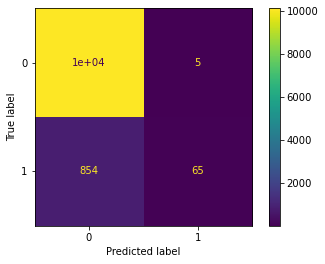

In [37]:
plot_confusion_matrix(KNN_tfidf, X_val_vec, y_val)

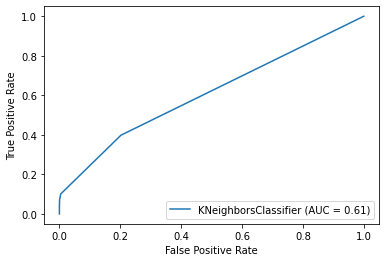

In [38]:
plot_roc_curve(KNN_tfidf, X_val_vec, y_val)

In [39]:
y_hat = KNN_tfidf.predict(X_val_vec)
print(classification_report(y_pred = y_hat, y_true = y_val))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10136
           1       0.93      0.07      0.13       919

    accuracy                           0.92     11055
   macro avg       0.93      0.54      0.55     11055
weighted avg       0.92      0.92      0.89     11055



## Grid Search for TF-IDF on KNN

In [40]:
from sklearn.model_selection import GridSearchCV
grid_params = {'n_neighbors': [3, 5, 11, 19],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan'],
              }

In [41]:
gs = GridSearchCV(KNeighborsClassifier(),
                 grid_params,
                 verbose = 1,
                 cv = 3,
                 n_jobs = -1)

In [ ]:
gs.fit(X_t_vec, y_t)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
gs.best_score_

In [ ]:
gs.best_estimator_

In [ ]:
gs.best_params_